<br><br>
<img src='https://www.riotgames.com/darkroom/1000/fab68f870f6da8998086165e608ea621:659056e32b0511d7f8525348809721ff/tft.jpg' width="700px">  
<br>

# Team Fight Tactics Challengers games analysis

## Game Description
Put your team-building skills to the test in Teamfight Tactics, the ultimate PvP strategy game from the studio behind League of Legends.

The game centers around eight players who construct teams to fight one another and be the last player standing. The battlefield consists of hexagons, where players can strategically place units on the hexagons on their side of the game board between rounds. During each round, a short battle automatically commences, with two players matched randomly for that round, or else paired against computer-controlled enemies. In the rounds against computer-controlled enemies, each enemy has a chance to drop gold, units, or items that the player can use. Health lost from losing a round is calculated with a combination of set damage per round and how many units an opponent had still alive.

## **TLDR**: 8 players poker game that involved probability for data analysis and game meta for predictor feature analysis. ##




## **Objective** of this notebook to analysis the best strategy to use for Team Fight Tactics.

## Datasets

**Target Label**: *placement*
1 is best. Lower is better.

**Set**
Dragonlands 	June 8, 2022 	Dragons

In [639]:
# %pip install git+https://github.com/tensorflow/docs

import requests
import os.path
from datetime import date, datetime
import asyncio
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
# import tensorflow as tf
import time
# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling
from riotwatcher import TftWatcher, ApiError

from utils.configuration import settings
from utils.utils import *
from tft.api import *

pd.options.mode.chained_assignment = None  # default='warn'

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(10, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'


In [640]:
API_KEY = settings.api_key
ASSETS_DIR = settings.assets_dir
MAX_COUNT = settings.max_count

SERVER = 'na1'  # euw1 na1 kr oc1
LEAGUE='challengers'
LATEST_RELEASE = '12.12.450.4196' # '12.12.450.4196'
PATCH = date(2022, 7, 1)

TARGETNAME = 'placement'

# Data Loading

In [641]:
raw_df = pd.read_pickle(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_{PATCH}_matches.pickle'))

In [642]:
raw_df

placement        match_id                          augment0  \
0              3  NA1_4363861621        TFT6_Augment_TargetDummies   
1              7  NA1_4363861621            TFT6_Augment_HyperRoll   
2              2  NA1_4363861621          TFT7_Augment_GuildEmblem   
3              6  NA1_4363861621            TFT6_Augment_TriForce2   
4              1  NA1_4363861621           TFT6_Augment_SalvageBin   
...          ...             ...                               ...   
12771          3  NA1_4359836261            TFT7_Augment_JadeTrait   
12772          7  NA1_4359836261  TFT7_Augment_DragonmancerInspire   
12773          2  NA1_4359836261     TFT6_Augment_ThrillOfTheHunt2   
12774          5  NA1_4359836261       TFT7_Augment_MageConference   
12775          1  NA1_4359836261       TFT7_Augment_AssassinEmblem   

                                   augment1                         augment2  \
0                  TFT6_Augment_Meditation2  TFT6_Augment_CelestialBlessing2   
1           TFT6_Augment_CelestialBlessing2       TFT6_Augment_FuturePeepers   
2                    TFT7_Augment_LastStand           TFT6_Augment_Ascension   
3      TFT7_Augment_BruiserPersonalTraining     TFT7_Augment_SwiftshotEmblem   
4                TFT6_Augment_FuturePeepers   TFT6_Augment_CyberneticUplink2   
...                                     ...                              ...   
12771           TFT7_Augment_DragonAlliance    TFT6_Augment_ThrillOfTheHunt2   
12772            TFT6_Augment_PortableForge       TFT7_Augment_PandorasBench   
12773         TFT6_Augment_ComponentGrabBag         TFT6_Augment_Meditation2   
12774             TFT6_Augment_BlueBattery2      TFT7_Augment_CavalierEmblem   
12775      TFT6_Augment_CyberneticImplants2        TFT7_Augment_BestFriends2   

       Set7_Assassin  Set7_Astral  Set7_Bard  Set7_Bruiser  Set7_Cannoneer  \
0                1.0          NaN        NaN           2.0             NaN   
1                1.0          NaN        NaN           1.0             NaN   
2                1.0          NaN        1.0           NaN             NaN   
3                NaN          1.0        NaN           2.0             NaN   
4                NaN          NaN        1.0           NaN             1.0   
...              ...          ...        ...           ...             ...   
12771            2.0          NaN        NaN           NaN             NaN   
12772            NaN          NaN        NaN           0.0             NaN   
12773            NaN          NaN        NaN           1.0             NaN   
12774            NaN          NaN        NaN           1.0             NaN   
12775            3.0          NaN        1.0           1.0             NaN   

       ...    TFT7_Yasuo_item1  TFT7_Yasuo_item2  TFT7_Yone  TFT7_Yone_item0  \
0      ...                 NaN               NaN        NaN              NaN   
1      ...                 NaN               NaN        NaN              NaN   
2      ...                 NaN               NaN        NaN              NaN   
3      ...                 NaN               NaN        NaN              NaN   
4      ...        InfinityEdge       Quicksilver        NaN              NaN   
...    ...                 ...               ...        ...              ...   
12771  ...        WarmogsArmor      InfinityEdge        NaN              NaN   
12772  ...                 NaN               NaN        NaN              NaN   
12773  ...                 NaN               NaN        NaN              NaN   
12774  ...                 NaN               NaN        NaN              NaN   
12775  ...  AssassinEmblemItem               NaN        NaN              NaN   

       TFT7_Yone_item1  TFT7_Yone_item2  TFT7_Zoe  TFT7_Zoe_item0  \
0                  NaN              NaN       NaN             NaN   
1                  NaN              NaN       NaN             NaN   
2                  NaN              NaN       NaN             NaN   
3                  NaN         

In [643]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
 
    return df

In [644]:
raw_df = reduce_mem_usage(raw_df)

Mem. usage decreased to 21.90 Mb (16.5% reduction)


In [645]:
raw_df[raw_df['match_id'].duplicated()]

placement        match_id                          augment0  \
1              7  NA1_4363861621            TFT6_Augment_HyperRoll   
2              2  NA1_4363861621          TFT7_Augment_GuildEmblem   
3              6  NA1_4363861621            TFT6_Augment_TriForce2   
4              1  NA1_4363861621           TFT6_Augment_SalvageBin   
5              5  NA1_4363861621        TFT6_Augment_FuturePeepers   
...          ...             ...                               ...   
12771          3  NA1_4359836261            TFT7_Augment_JadeTrait   
12772          7  NA1_4359836261  TFT7_Augment_DragonmancerInspire   
12773          2  NA1_4359836261     TFT6_Augment_ThrillOfTheHunt2   
12774          5  NA1_4359836261       TFT7_Augment_MageConference   
12775          1  NA1_4359836261       TFT7_Augment_AssassinEmblem   

                                   augment1                        augment2  \
1           TFT6_Augment_CelestialBlessing2      TFT6_Augment_FuturePeepers   
2                    TFT7_Augment_LastStand          TFT6_Augment_Ascension   
3      TFT7_Augment_BruiserPersonalTraining    TFT7_Augment_SwiftshotEmblem   
4                TFT6_Augment_FuturePeepers  TFT6_Augment_CyberneticUplink2   
5                  TFT6_Augment_LudensEcho2   TFT6_Augment_ComponentGrabBag   
...                                     ...                             ...   
12771           TFT7_Augment_DragonAlliance   TFT6_Augment_ThrillOfTheHunt2   
12772            TFT6_Augment_PortableForge      TFT7_Augment_PandorasBench   
12773         TFT6_Augment_ComponentGrabBag        TFT6_Augment_Meditation2   
12774             TFT6_Augment_BlueBattery2     TFT7_Augment_CavalierEmblem   
12775      TFT6_Augment_CyberneticImplants2       TFT7_Augment_BestFriends2   

       Set7_Assassin  Set7_Astral  Set7_Bard  Set7_Bruiser  Set7_Cannoneer  \
1                1.0          NaN        NaN           1.0             NaN   
2                1.0          NaN        1.0           NaN             NaN   
3                NaN          1.0        NaN           2.0             NaN   
4                NaN          NaN        1.0           NaN             1.0   
5                NaN          1.0        NaN           2.0             NaN   
...              ...          ...        ...           ...             ...   
12771            2.0          NaN        NaN           NaN             NaN   
12772            NaN          NaN        NaN           0.0             NaN   
12773            NaN          NaN        NaN           1.0             NaN   
12774            NaN          NaN        NaN           1.0             NaN   
12775            3.0          NaN        1.0           1.0             NaN   

       ...    TFT7_Yasuo_item1  TFT7_Yasuo_item2  TFT7_Yone  TFT7_Yone_item0  \
1      ...                 NaN               NaN        NaN              NaN   
2      ...                 NaN               NaN        NaN              NaN   
3      ...                 NaN               NaN        NaN              NaN   
4      ...        InfinityEdge       Quicksilver        NaN              NaN   
5      ...                 NaN               NaN        NaN              NaN   
...    ...                 ...               ...        ...              ...   
12771  ...        WarmogsArmor      InfinityEdge        NaN              NaN   
12772  ...                 NaN               NaN        NaN              NaN   
12773  ...                 NaN               NaN        NaN              NaN   
12774  ...                 NaN               NaN        NaN              NaN   
12775  ...  AssassinEmblemItem               NaN        NaN              NaN   

       TFT7_Yone_item1  TFT7_Yone_item2  TFT7_Zoe  TFT7_Zoe_item0  \
1                  NaN              NaN       NaN             NaN   
2                  NaN              NaN       NaN             NaN   
3                  NaN              NaN       NaN             NaN   
4                  NaN              NaN    

# Data Cleanup

In [646]:
def check_NA(df):
    missing_val = df.isnull().sum()
    print(missing_val[missing_val > 0])

In [647]:
# Check NA
check_NA(raw_df)

augment1               5
augment2              40
Set7_Assassin       7056
Set7_Astral        10348
Set7_Bard           8973
                   ...  
TFT7_Yone_item2    12641
TFT7_Zoe           11647
TFT7_Zoe_item0     11957
TFT7_Zoe_item1     12235
TFT7_Zoe_item2     12438
Length: 266, dtype: int64


In [648]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("object"):
        df[name] = df[name].fillna("None")
    return df

In [649]:
raw_df = impute(raw_df)

In [650]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

In [651]:
def check_categorical_cols(df):
    print('Values along with Count in the Categorical Columns','\n')
    for i in categorical_cols:
        print(i)
        print(df[i].value_counts(),'\n')  

In [652]:
check_categorical_cols(raw_df)

Values along with Count in the Categorical Columns 

match_id
NA1_4363861621    8
NA1_4361566323    8
NA1_4362086327    8
NA1_4363093011    8
NA1_4363174907    8
                 ..
NA1_4359880905    8
NA1_4360234981    8
NA1_4361424502    8
NA1_4361596454    8
NA1_4359836261    8
Name: match_id, Length: 1597, dtype: int64 

augment0
TFT6_Augment_PortableForge      533
TFT6_Augment_SecondWind2        394
TFT6_Augment_Electrocharge2     378
TFT6_Augment_Weakspot           378
TFT6_Augment_TradeSector        353
                               ... 
TFT6_Augment_BinaryAirdrop        1
TFT7_Augment_MysticTrait2         1
TFT6_Augment_Diversify3           1
TFT7_Augment_GuardianEmblem2      1
TFT6_Augment_FuturePeepers2       1
Name: augment0, Length: 183, dtype: int64 

augment1
TFT6_Augment_SecondWind1         544
TFT6_Augment_Weakspot            526
TFT6_Augment_TinyTitans          459
TFT6_Augment_Electrocharge1      382
TFT6_Augment_ThrillOfTheHunt1    365
                              

In [653]:
raw_df.describe()

placement  Set7_Assassin   Set7_Astral     Set7_Bard  Set7_Bruiser  \
count  12776.000000   12776.000000  12776.000000  12776.000000  12776.000000   
mean       4.500000       0.399890      0.050016      0.297668      0.703507   
std        2.291378       0.678433      0.248524      0.457250      0.818900   
min        1.000000       0.000000      0.000000      0.000000      0.000000   
25%        2.750000       0.000000      0.000000      0.000000      0.000000   
50%        4.500000       0.000000      0.000000      0.000000      1.000000   
75%        6.250000       1.000000      0.000000      1.000000      1.000000   
max        8.000000       3.000000      3.000000      1.000000      4.000000   

       Set7_Cannoneer  Set7_Cavalier   Set7_Dragon  Set7_Dragonmancer  \
count    12776.000000   12776.000000  12776.000000       12776.000000   
mean         0.176659       0.351049      0.751644           0.147621   
std          0.529097       0.767773      0.510168           0.454212   
min          0.000000       0.000000      0.000000           0.000000   
25%          0.000000       0.000000      0.000000           0.000000   
50%          0.000000       0.000000      1.000000           0.000000   
75%          0.000000       0.000000      1.000000           0.000000   
max          4.000000       4.000000      2.000000           3.000000   

        Set7_Evoker  ...  TFT7_TrainerDragon  TFT7_Tristana   TFT7_Twitch  \
count  12776.000000  ...        12776.000000   12776.000000  12776.000000   
mean       0.239981  ...            0.496086       0.200845      0.354336   
std        0.439375  ...            1.165042       0.587850      0.731667   
min        0.000000  ...            0.000000       0.000000      0.000000   
25%        0.000000  ...            0.000000       0.000000      0.000000   
50%        0.000000  ...            0.000000       0.000000      0.000000   
75%        0.000000  ...            0.000000       0.000000      0.000000   
max        3.000000  ...            4.000000       3.000000      3.000000   

         TFT7_Varus  TFT7_Vladimir  TFT7_Volibear    TFT7_Xayah    TFT7_Yasuo  \
count  12776.000000   12776.000000   12776.000000  12776.000000  12776.000000   
mean       0.123200       0.055182       0.119364      0.366468      0.421493   
std        0.583269       0.362433       0.500408      0.760070      0.700978   
min        0.000000       0.000000       0.000000      0.000000      0.000000   
25%        0.000000       0.000000       0.000000      0.000000      0.000000   
50%        0.000000       0.000000       0.000000      0.000000      0.000000   
75%        0.000000       0.000000       0.000000      0.000000      1.000000   
max        3.000000       3.000000       3.000000      3.000000      3.000000   

          TFT7_Yone      TFT7_Zoe  
count  12776.000000  12776.000000  
mean       0.093926      0.124765  
std        0.418673      0.428635  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        3.000000      3.000000  

[8 rows x 88 columns]

In [654]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12776 entries, 0 to 12775
Columns: 269 entries, placement to TFT7_Zoe_item2
dtypes: float32(87), int8(1), object(181)
memory usage: 21.9+ MB


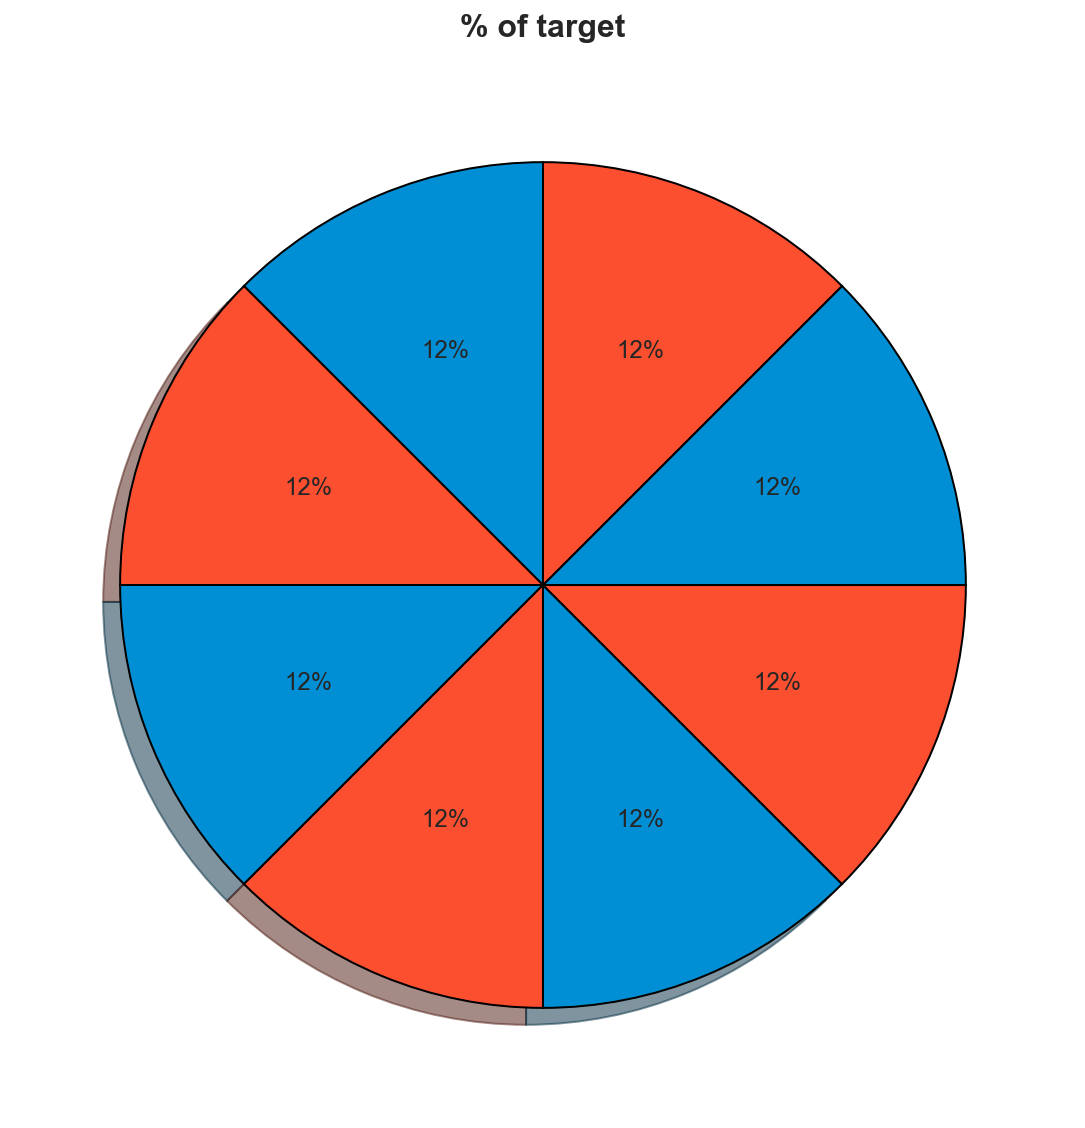

In [655]:
target_count = raw_df[TARGETNAME].value_counts().to_frame().T

colors = ['#008fd5', '#fc4f30']
plt.figure(figsize=(8,8))
plt.title('% of target')
plt.tight_layout()
plt.pie(list(target_count.iloc[0].values), startangle=90, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.f%%', shadow=True)
# plt.legend(loc='best', fontsize='medium')
plt.show()

# Preprocessing

To X, y

In [656]:
match_id_df = raw_df['match_id']
X = raw_df.drop(['match_id'], axis=1)
# X = raw_df.copy()

In [657]:
y = X.pop(TARGETNAME)

In [658]:
X.fillna('', inplace=True)

In [659]:
X.dtypes

augment0            object
augment1            object
augment2            object
Set7_Assassin      float32
Set7_Astral        float32
                    ...   
TFT7_Yone_item2     object
TFT7_Zoe           float32
TFT7_Zoe_item0      object
TFT7_Zoe_item1      object
TFT7_Zoe_item2      object
Length: 267, dtype: object

In [660]:
y.dtypes

dtype('int8')

In [661]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# Feature Engineering

In [662]:
traits_col = [s for s in numeric_cols if "Set7" in s]
units_col = [s for s in numeric_cols if "TFT7" in s]
augments_col = ['augment0', 'augment1', 'augment2']
items_col = [s for s in categorical_cols if s not in augments_col]

In [663]:
df_unique = X.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']

In [664]:
df_unique.to_csv('df_unique.csv')

In [665]:
unique_items_set = {y for col in items_col for y in X[col].unique().tolist()}
unique_augments_set = {y for col in augments_col for y in X[col].unique().tolist()}

In [666]:
X[f'items_count'] = X[items_col].apply(lambda row: sum(x != 'None' for x in row), axis=1)

In [667]:
X[f'traits_sum'] = X[traits_col].sum(axis=1)
X[f'units_sum'] = X[units_col].sum(axis=1)

In [668]:
X.iloc[X[f'units_sum'].idxmax()]

augment0          TFT6_Augment_MakeshiftArmor2
augment1              TFT6_Augment_Meditation1
augment2              TFT6_Augment_Meditation2
Set7_Assassin                              0.0
Set7_Astral                                1.0
                              ...             
TFT7_Zoe_item1                            None
TFT7_Zoe_item2                            None
items_count                                 13
traits_sum                                10.0
units_sum                                 26.0
Name: 9008, Length: 270, dtype: object

In [669]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [670]:
X[numeric_cols] = X[numeric_cols].applymap(np.int64)

In [671]:
matches_df = X.copy()
matches_df[TARGETNAME] = y

In [672]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12776 entries, 0 to 12775
Columns: 270 entries, augment0 to units_sum
dtypes: int64(90), object(180)
memory usage: 26.3+ MB


# Data Analysis

## Traits

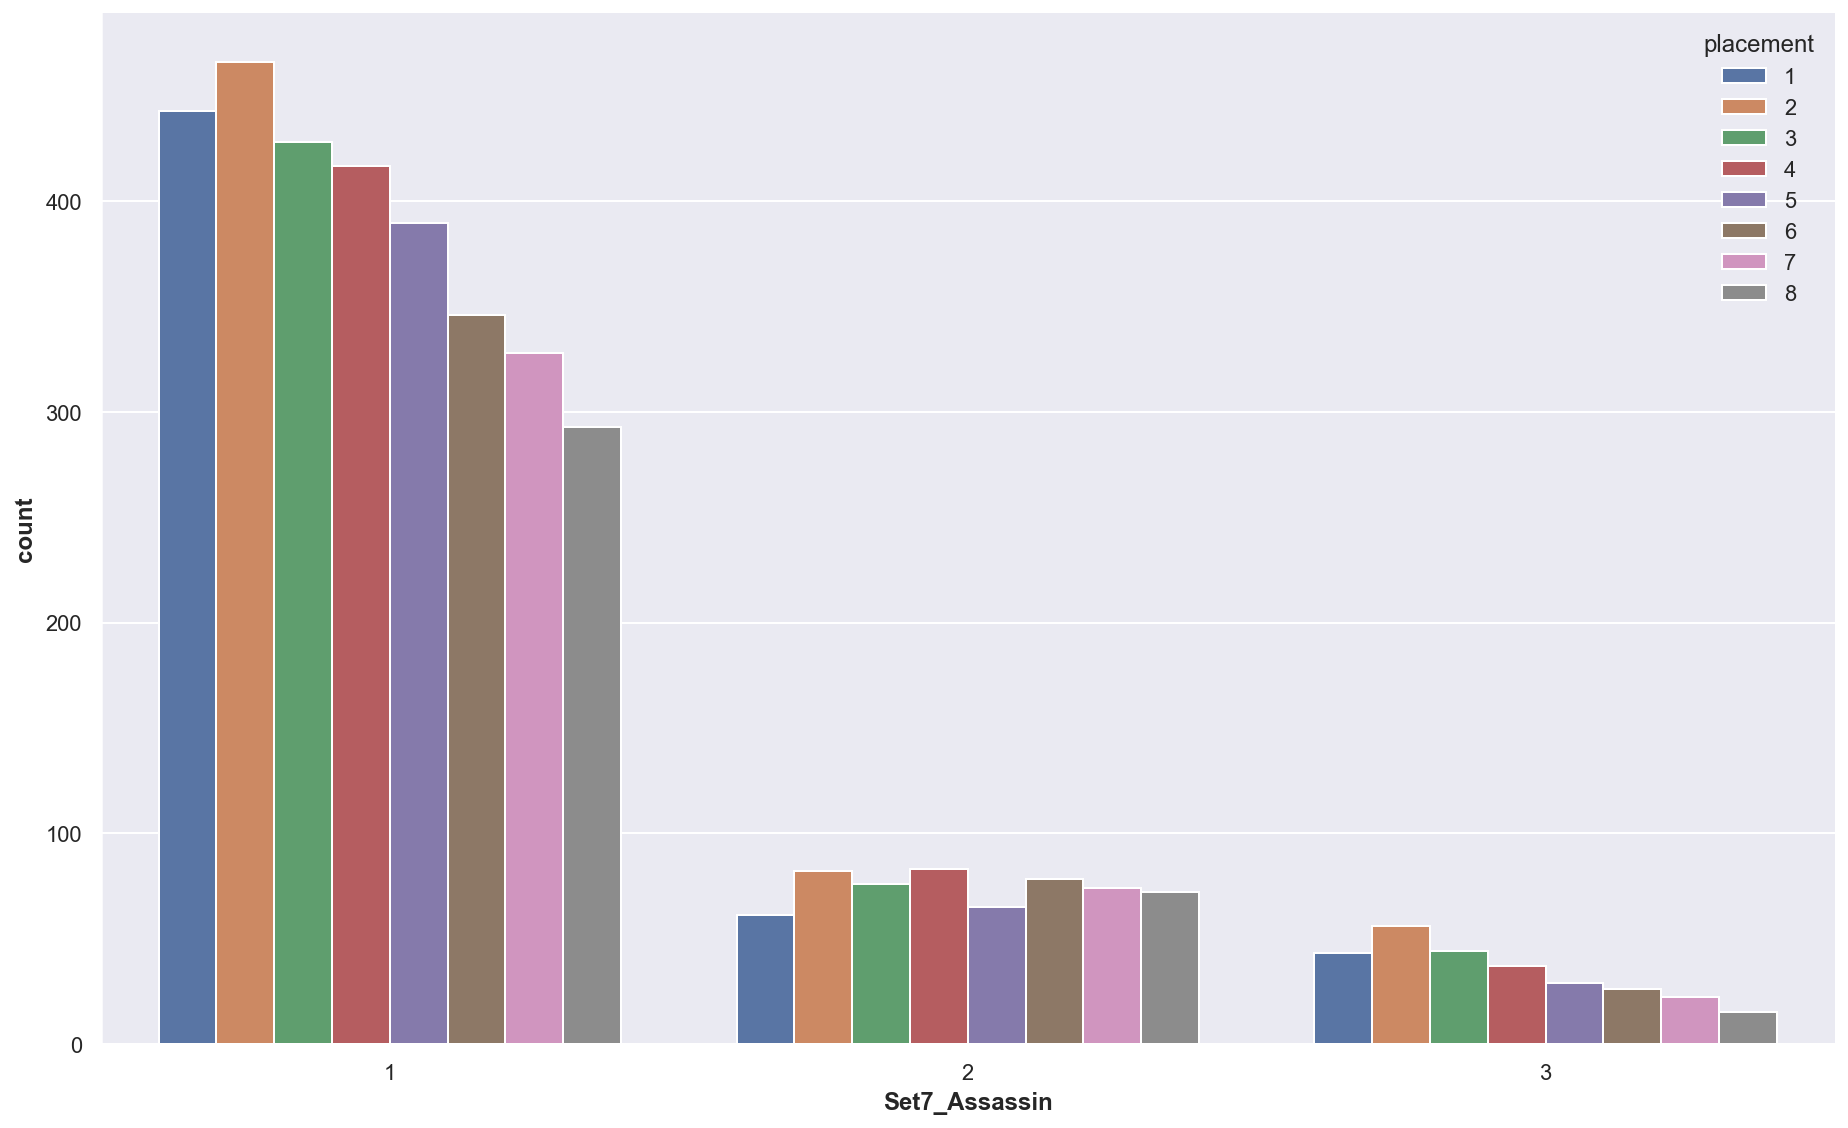

In [673]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Assassin']>0], x='Set7_Assassin', hue=TARGETNAME)
sns.despine()

Worst Trait.

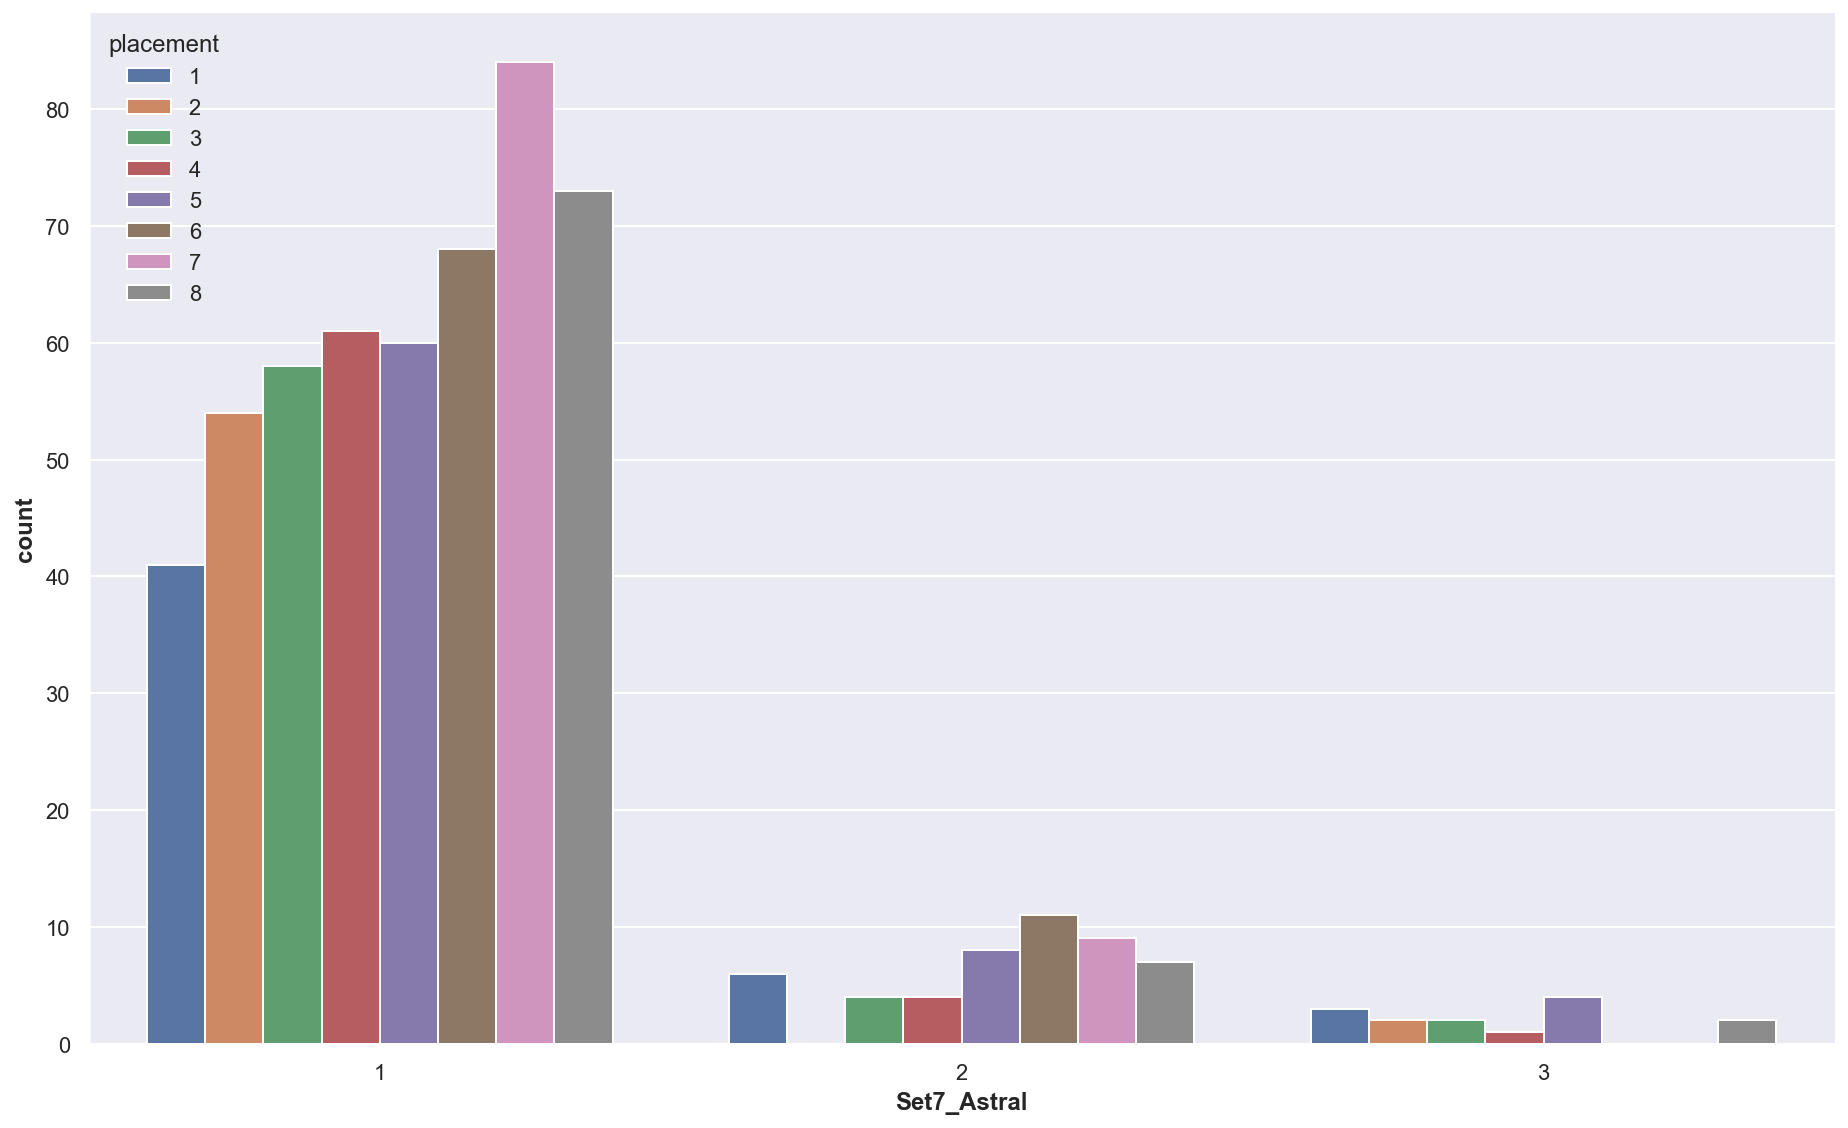

In [674]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Astral']>0], x='Set7_Astral', hue=TARGETNAME)
sns.despine()

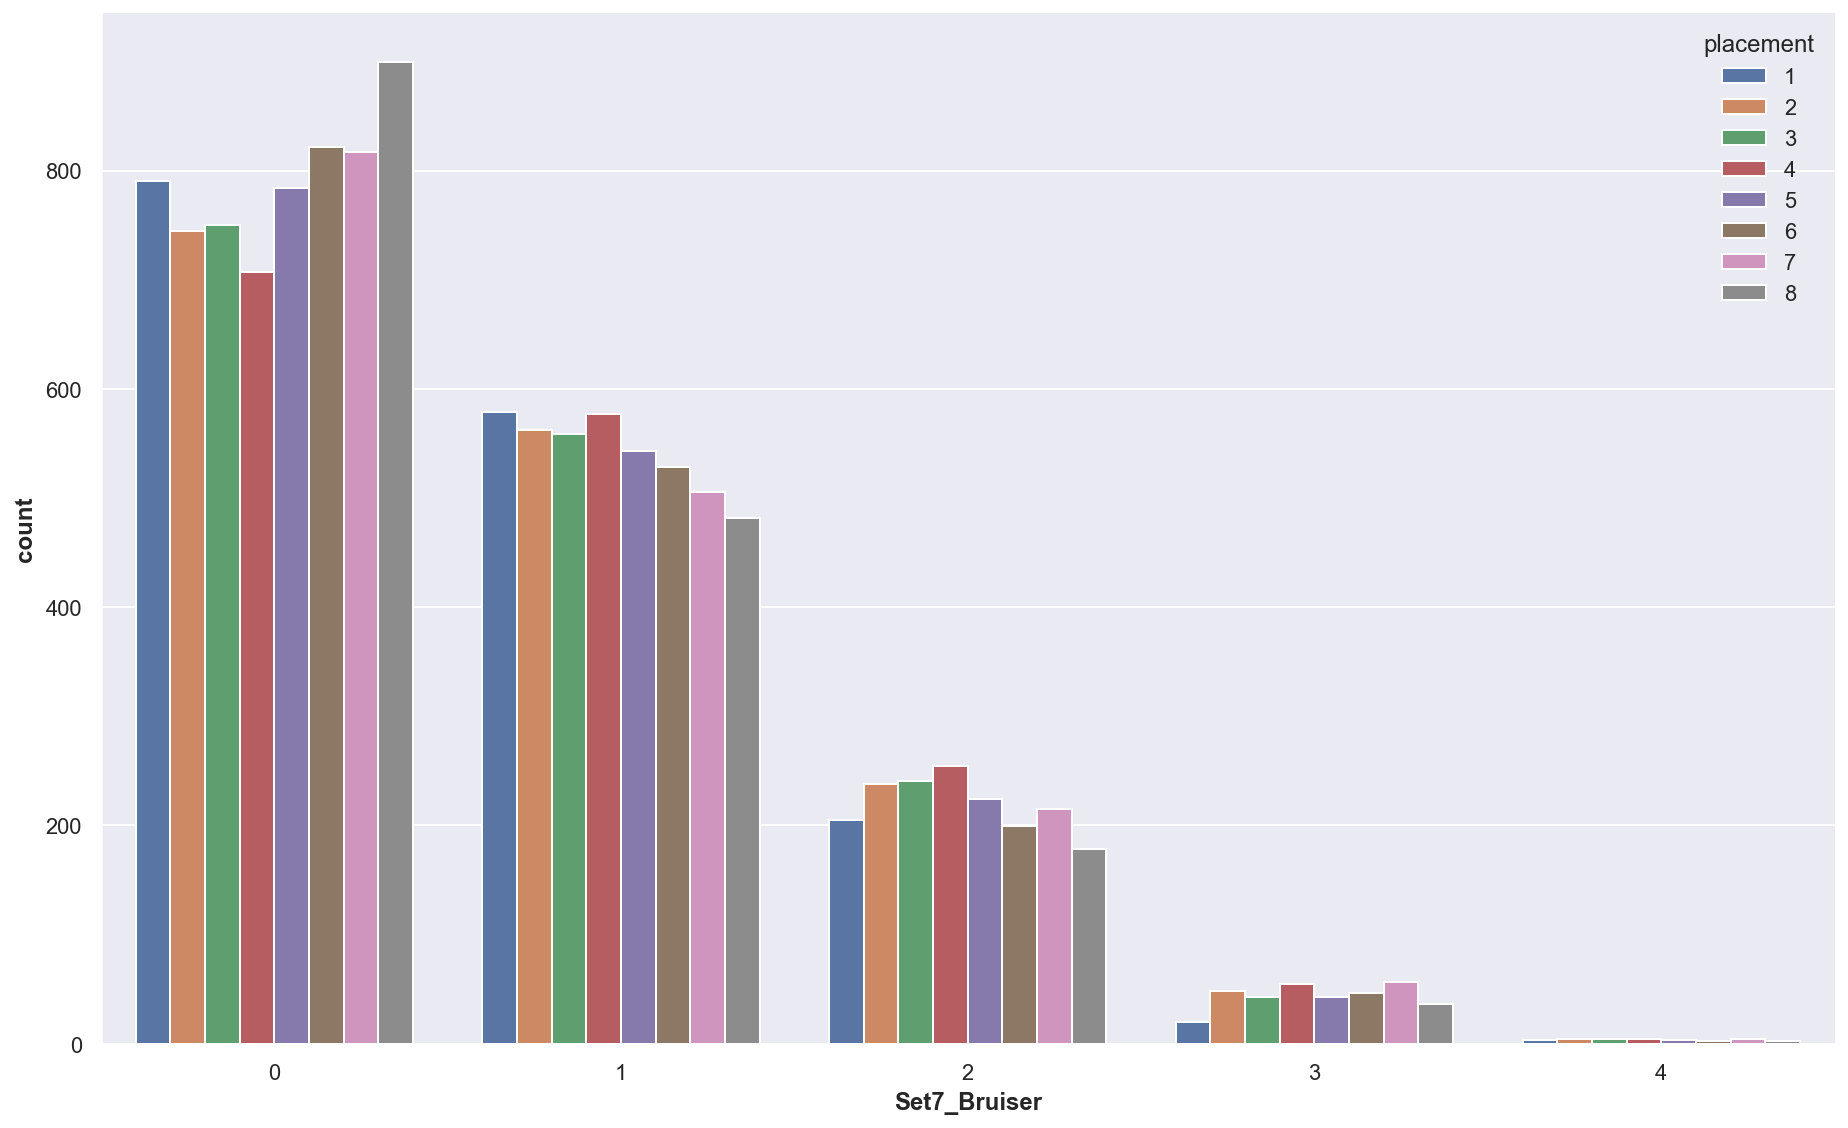

In [675]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Bruiser']>=0], x='Set7_Bruiser', hue=TARGETNAME)
sns.despine()

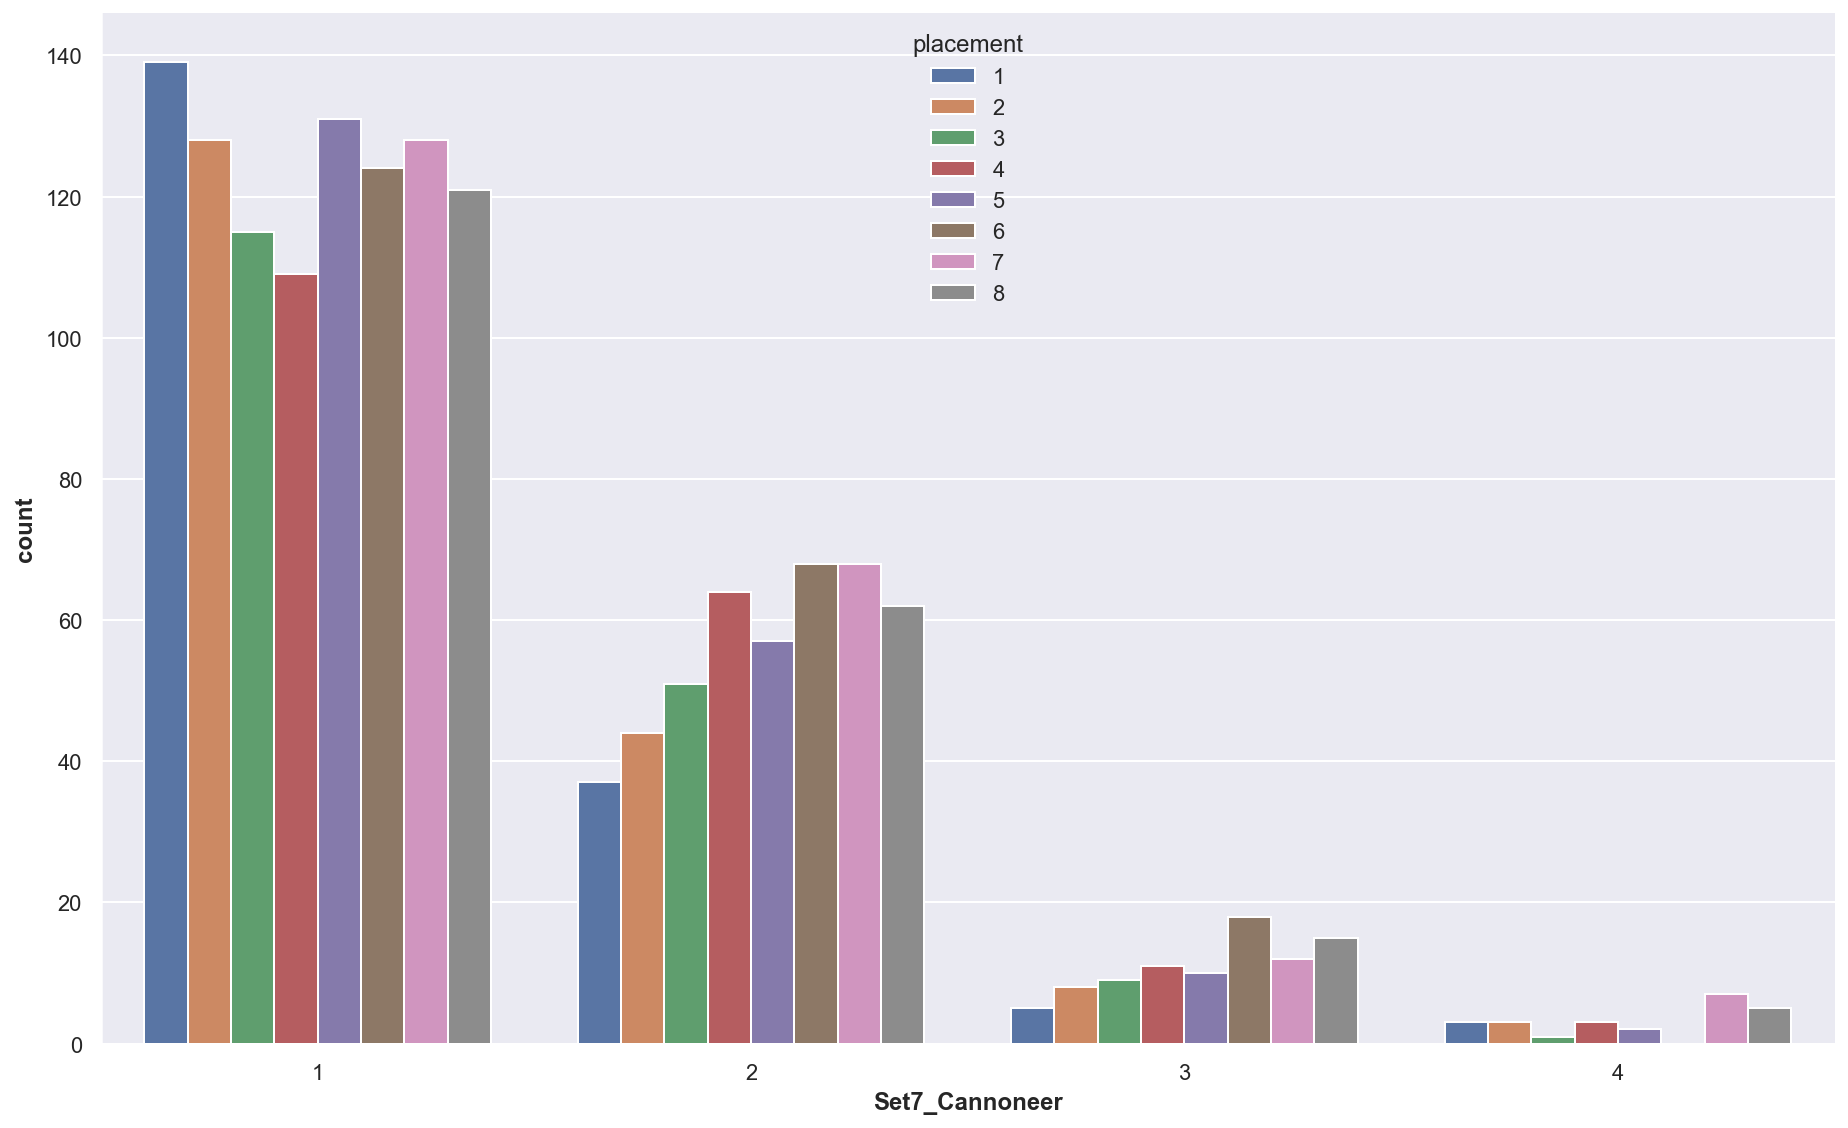

In [676]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cannoneer']>0], x='Set7_Cannoneer', hue=TARGETNAME)
sns.despine()

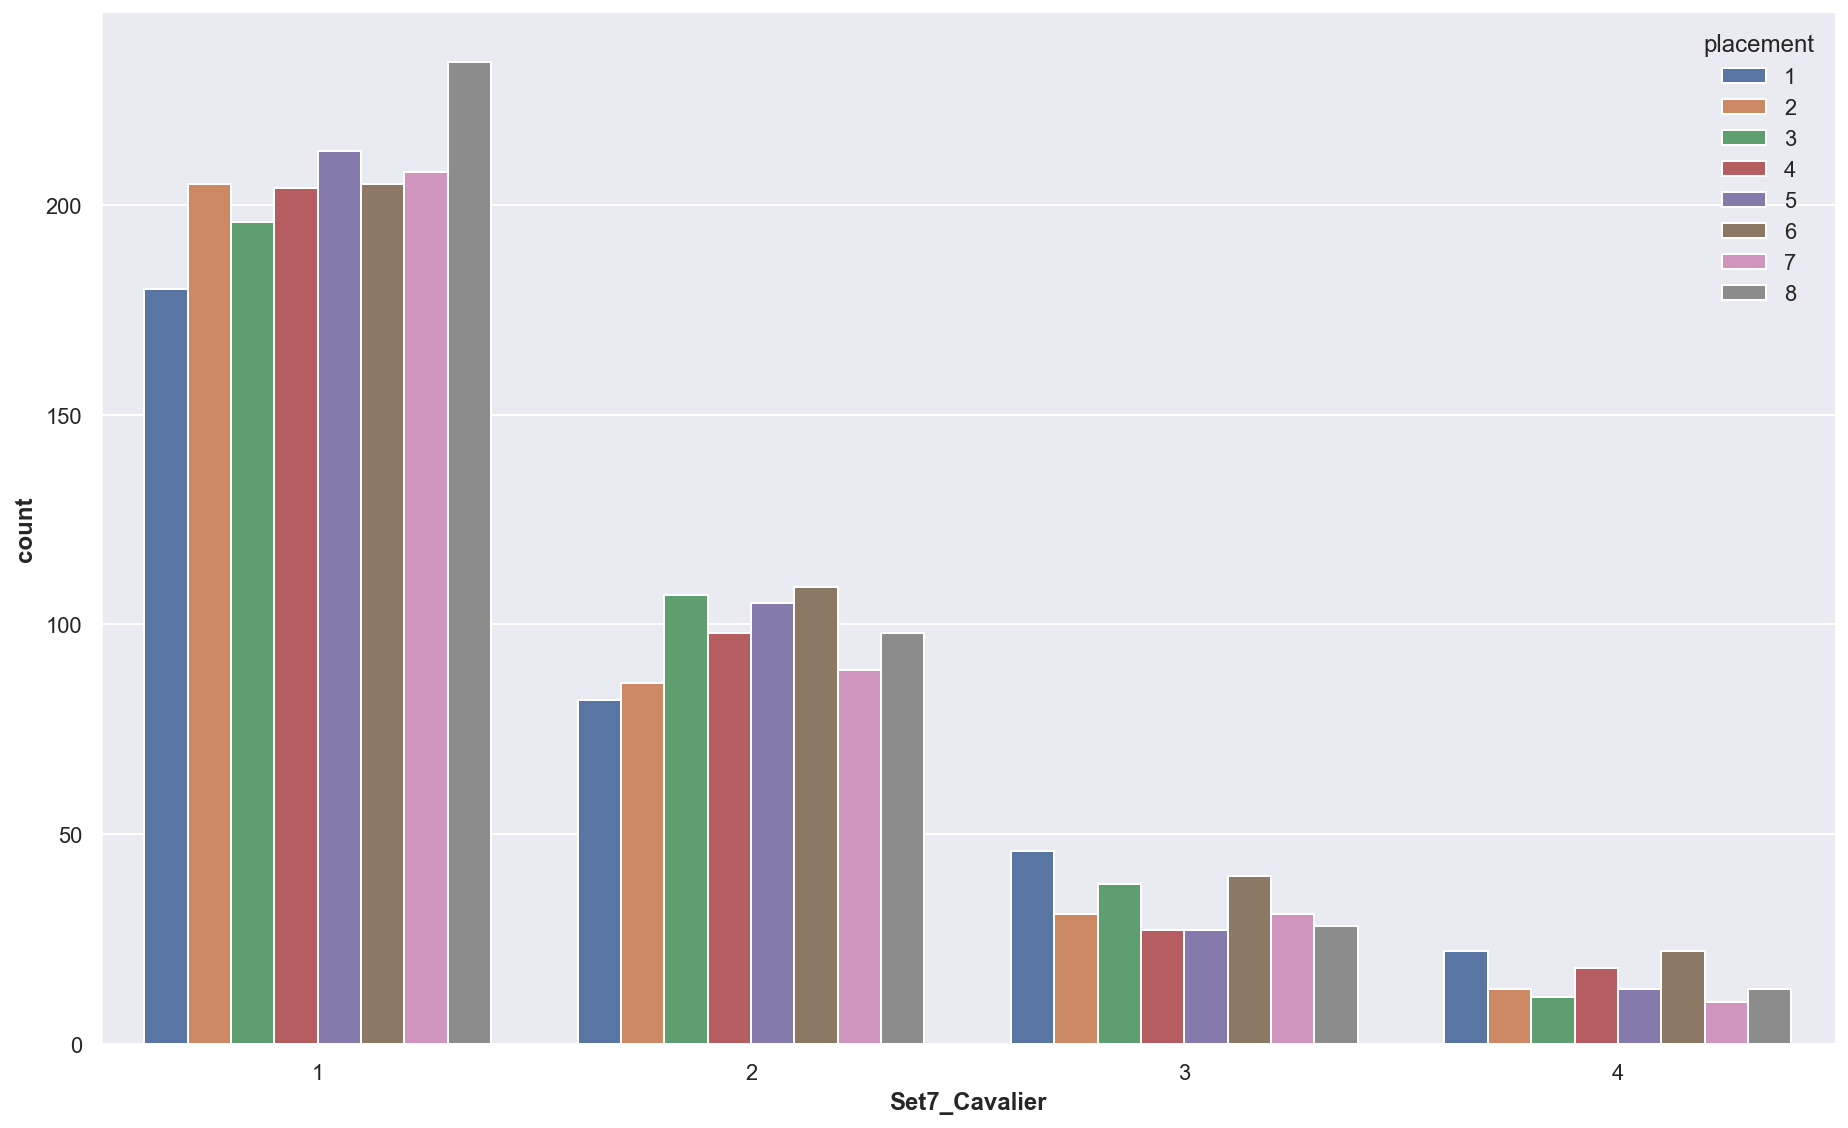

In [677]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cavalier']>0], x='Set7_Cavalier', hue=TARGETNAME)
sns.despine()

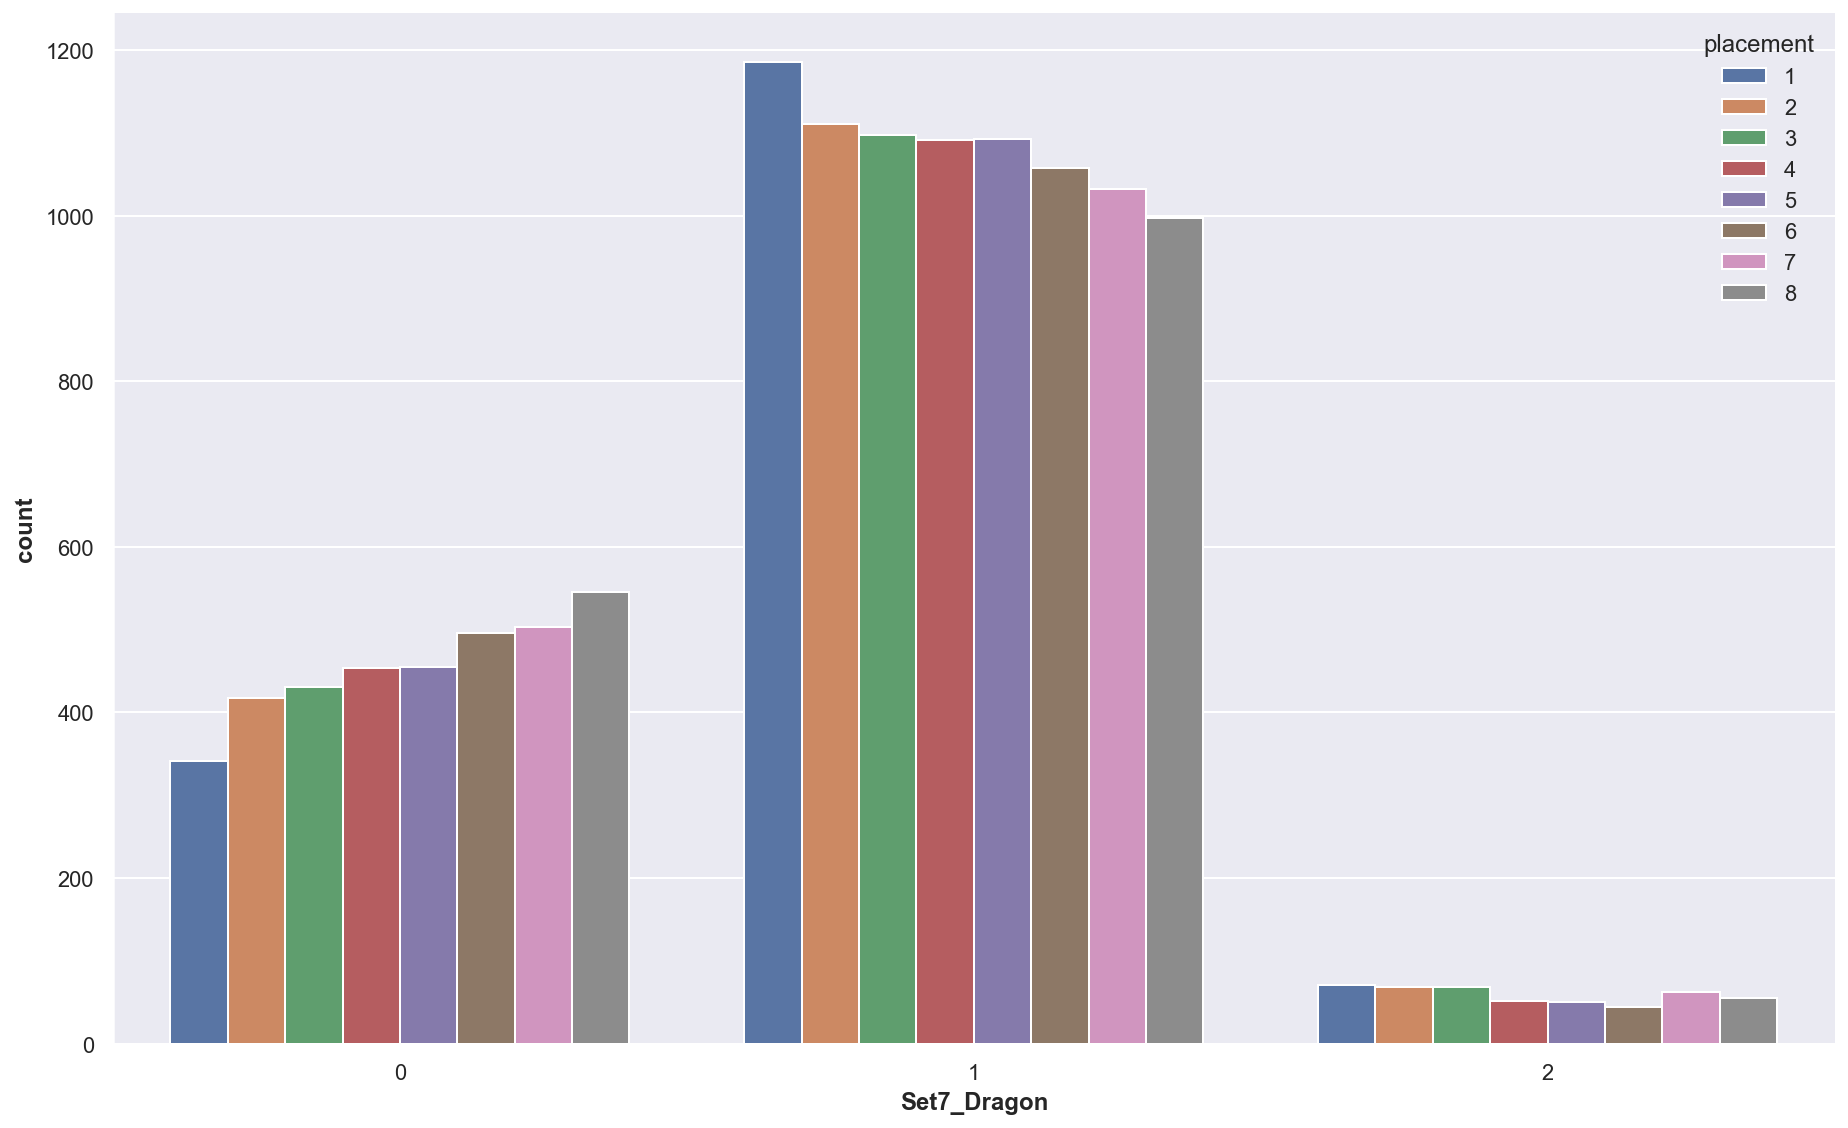

In [678]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragon']>=0], x='Set7_Dragon', hue=TARGETNAME)
sns.despine()

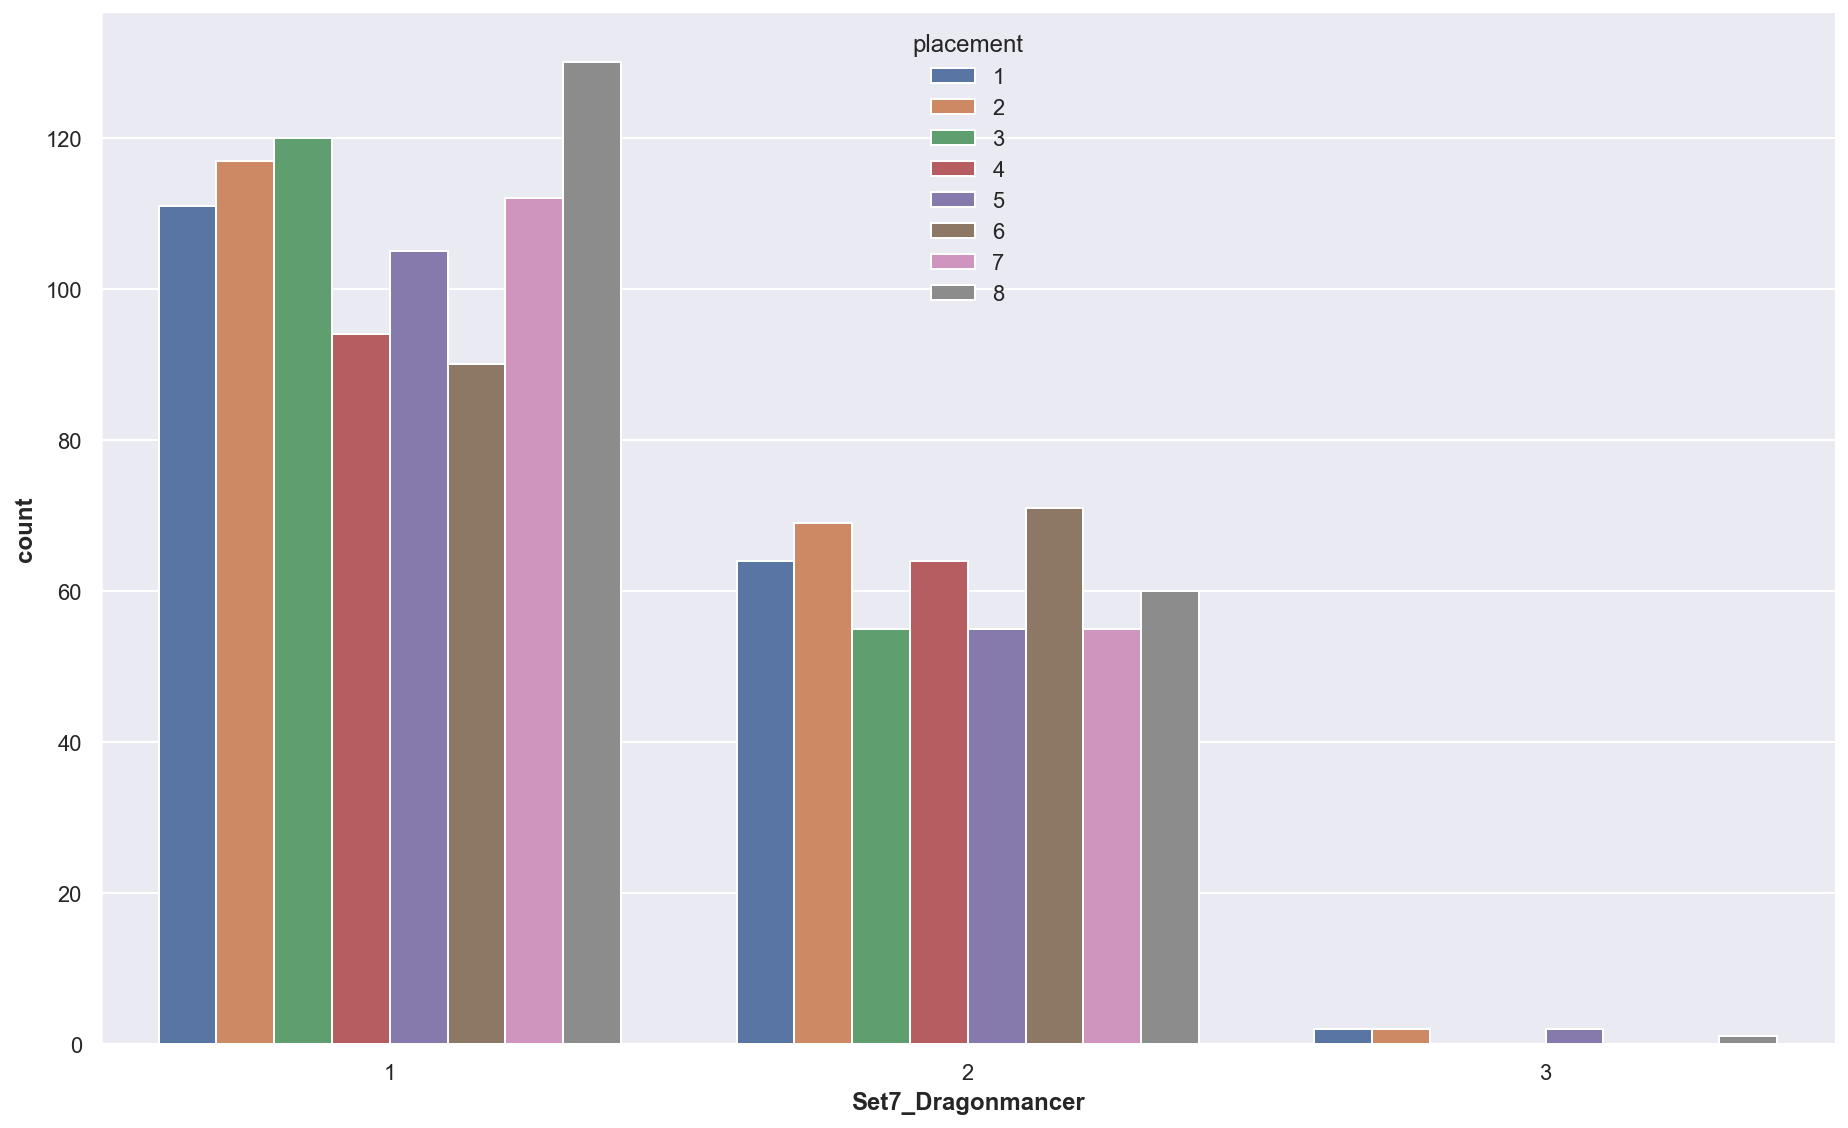

In [679]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragonmancer']>0], x='Set7_Dragonmancer', hue=TARGETNAME)
sns.despine()

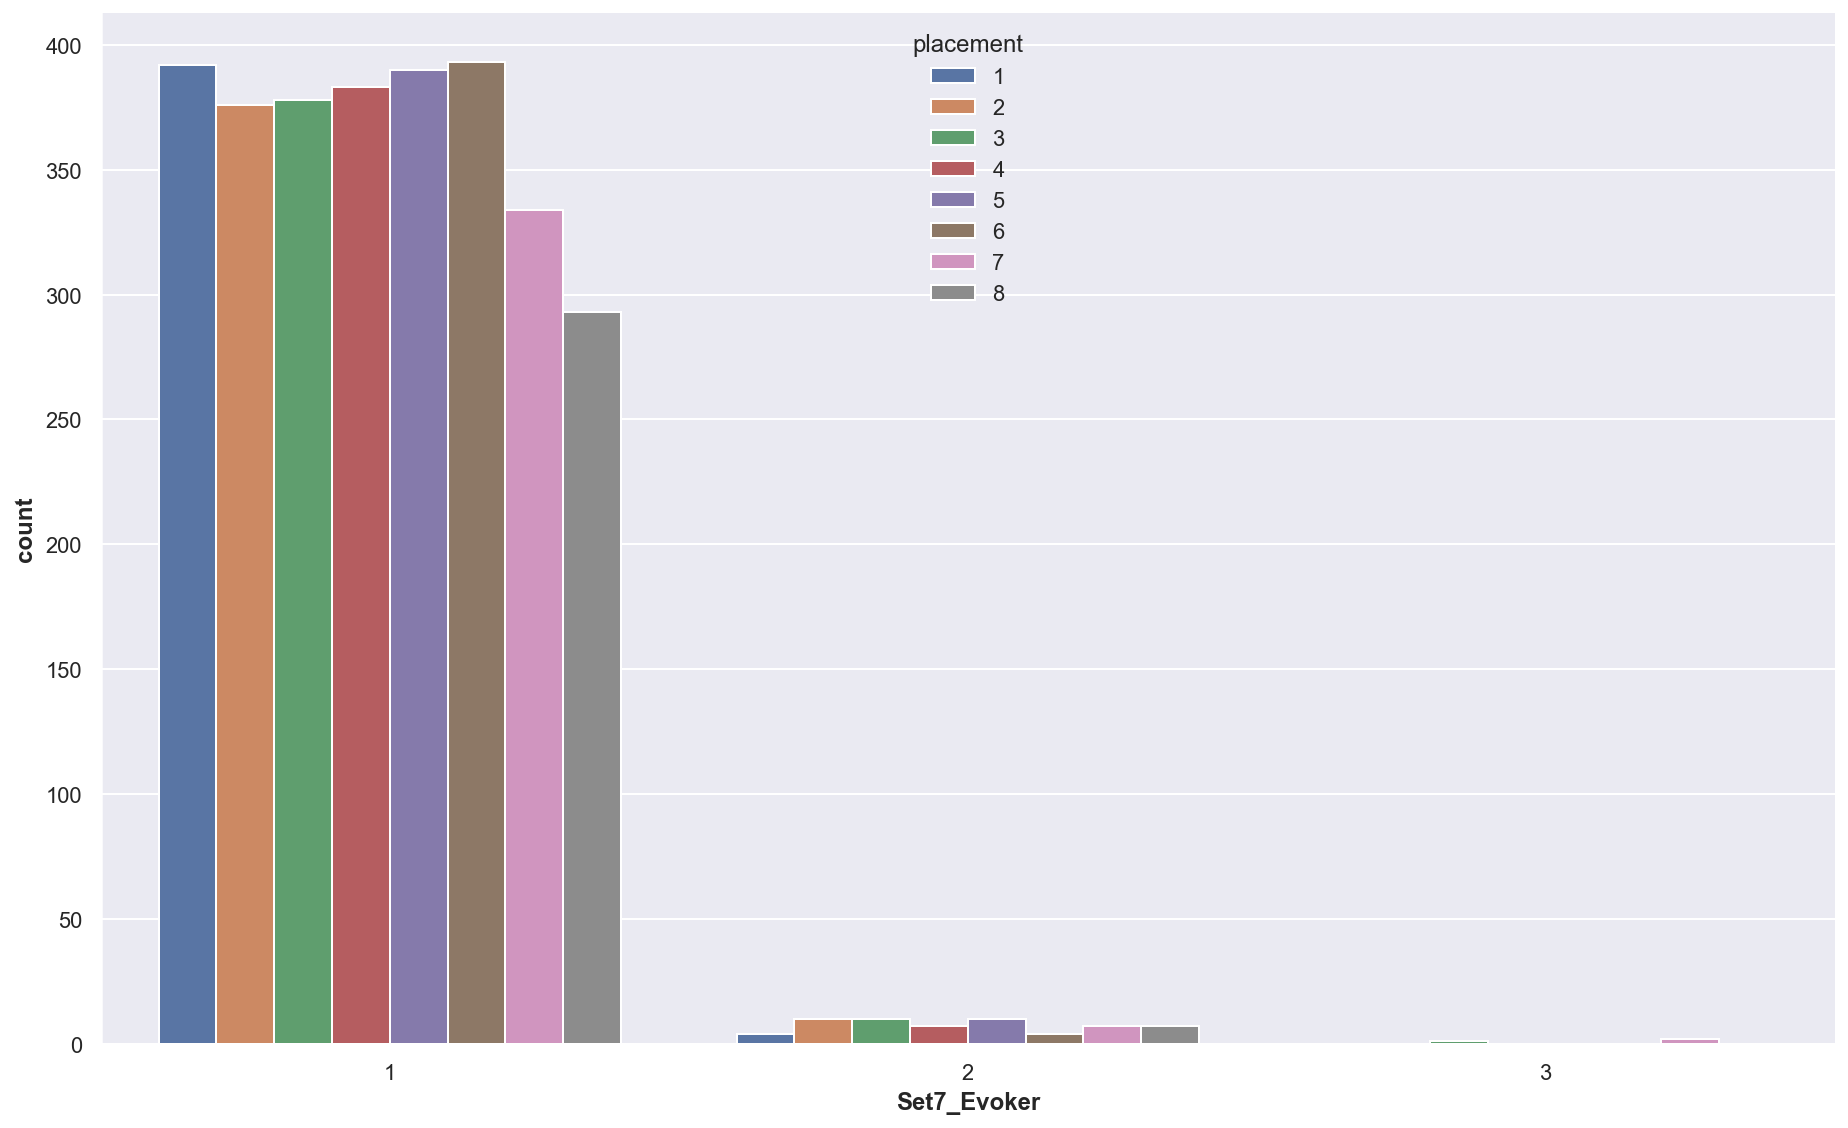

In [680]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Evoker']>0], x='Set7_Evoker', hue=TARGETNAME)
sns.despine()

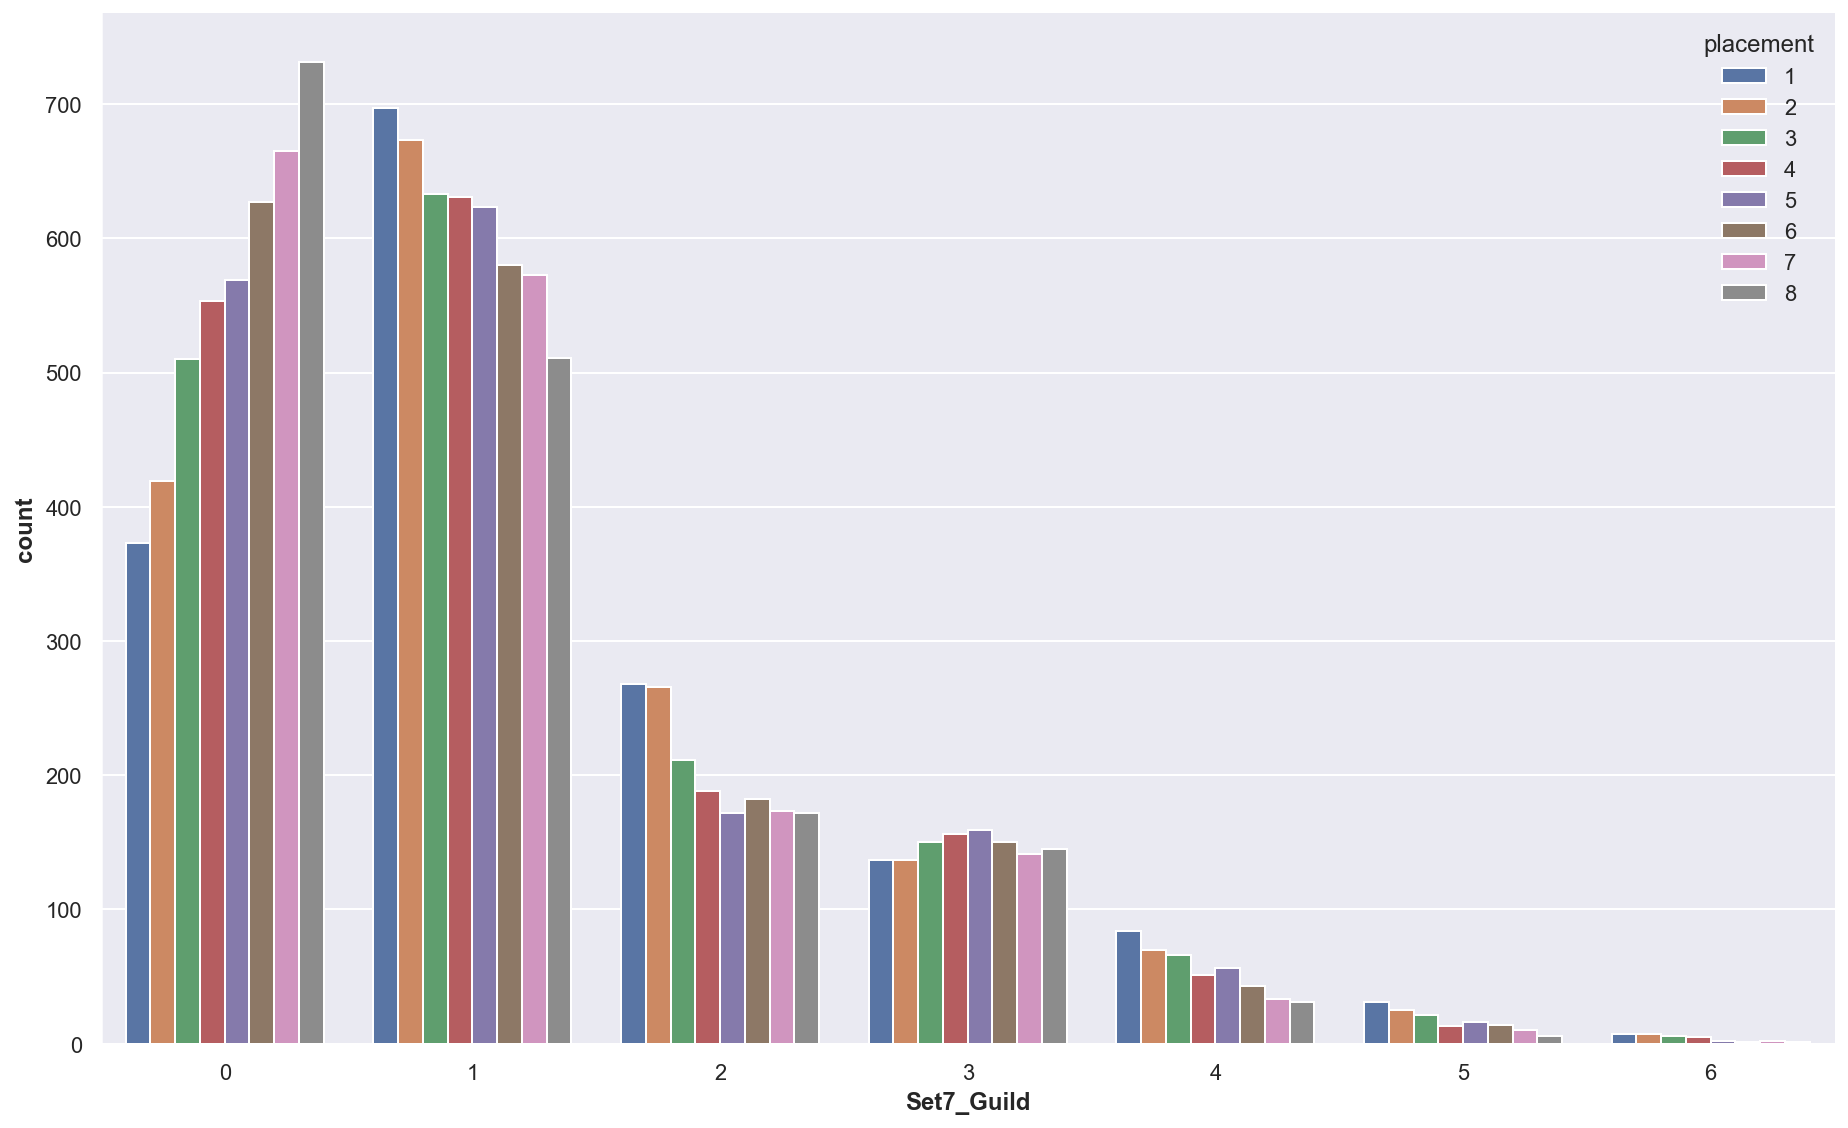

In [681]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='Set7_Guild', hue=TARGETNAME)
sns.despine()

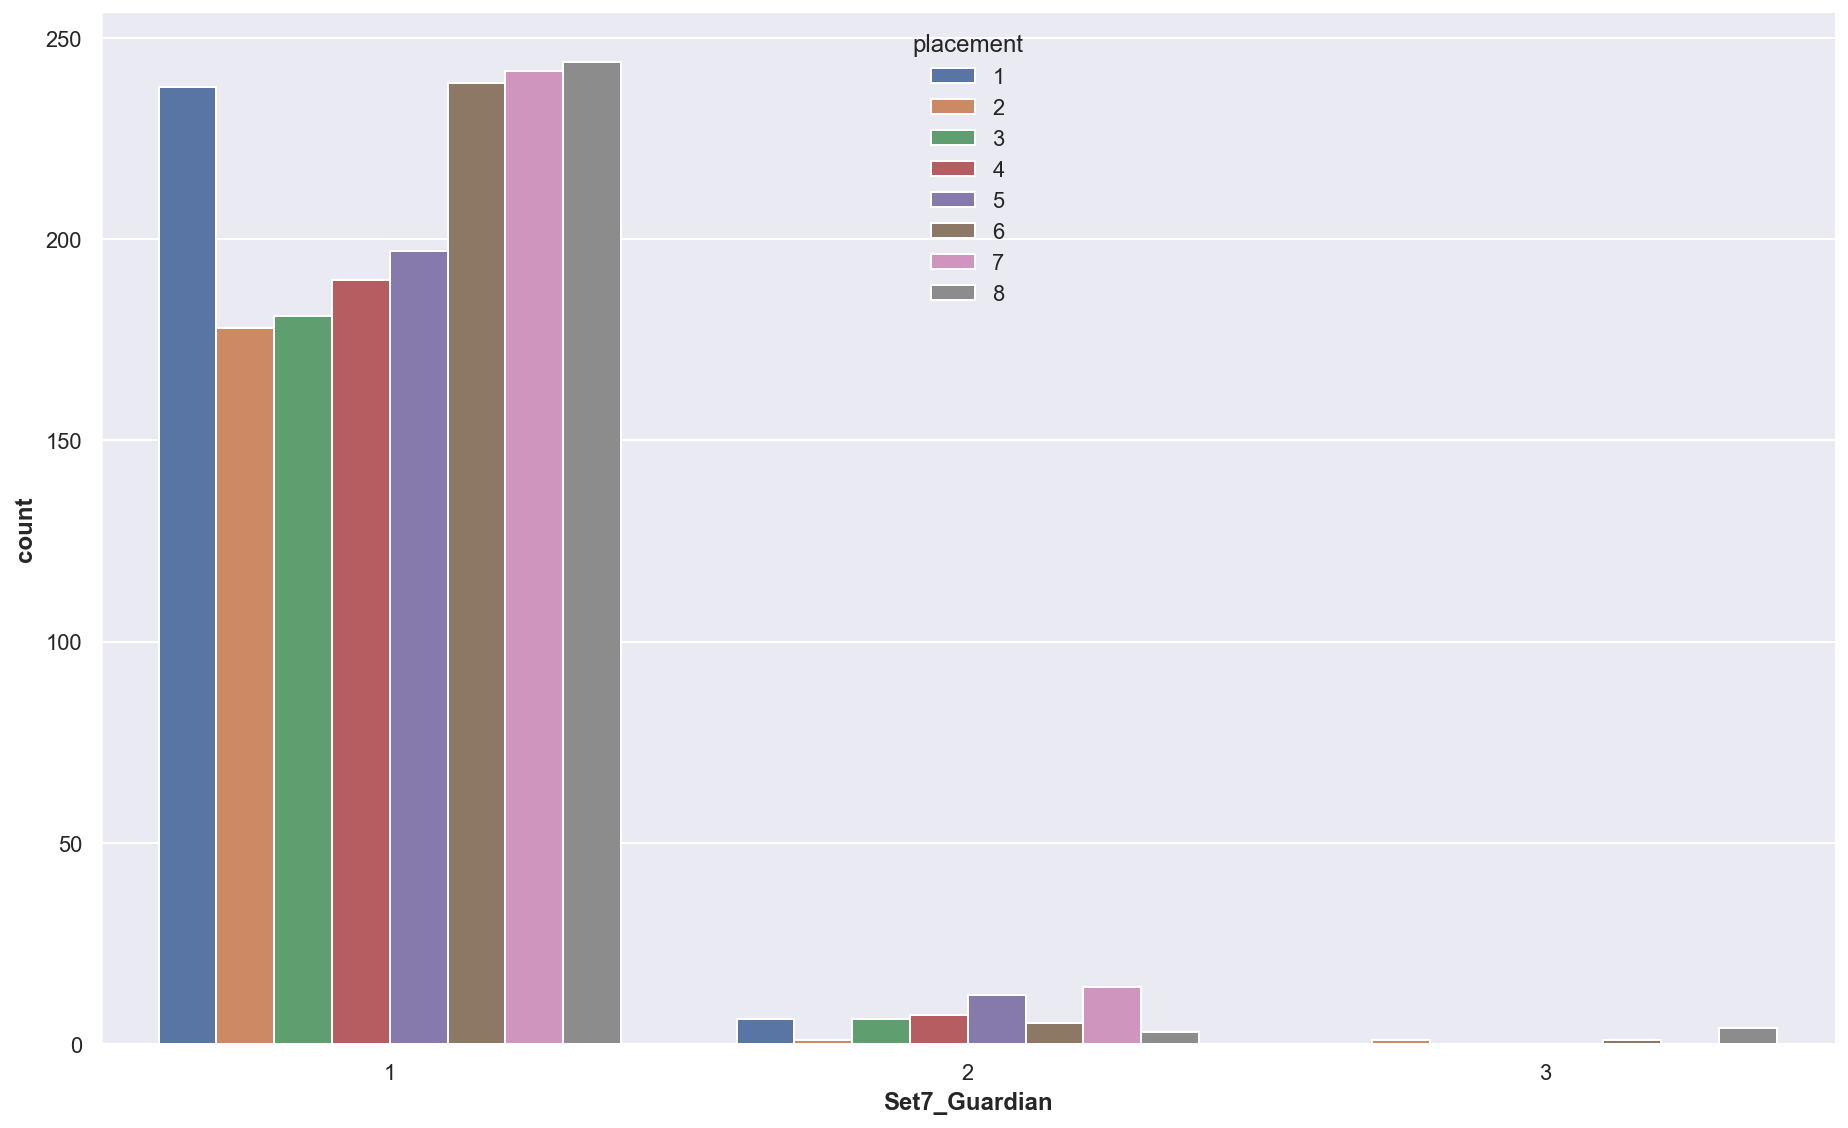

In [682]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Guardian']>0], x='Set7_Guardian', hue=TARGETNAME)
sns.despine()

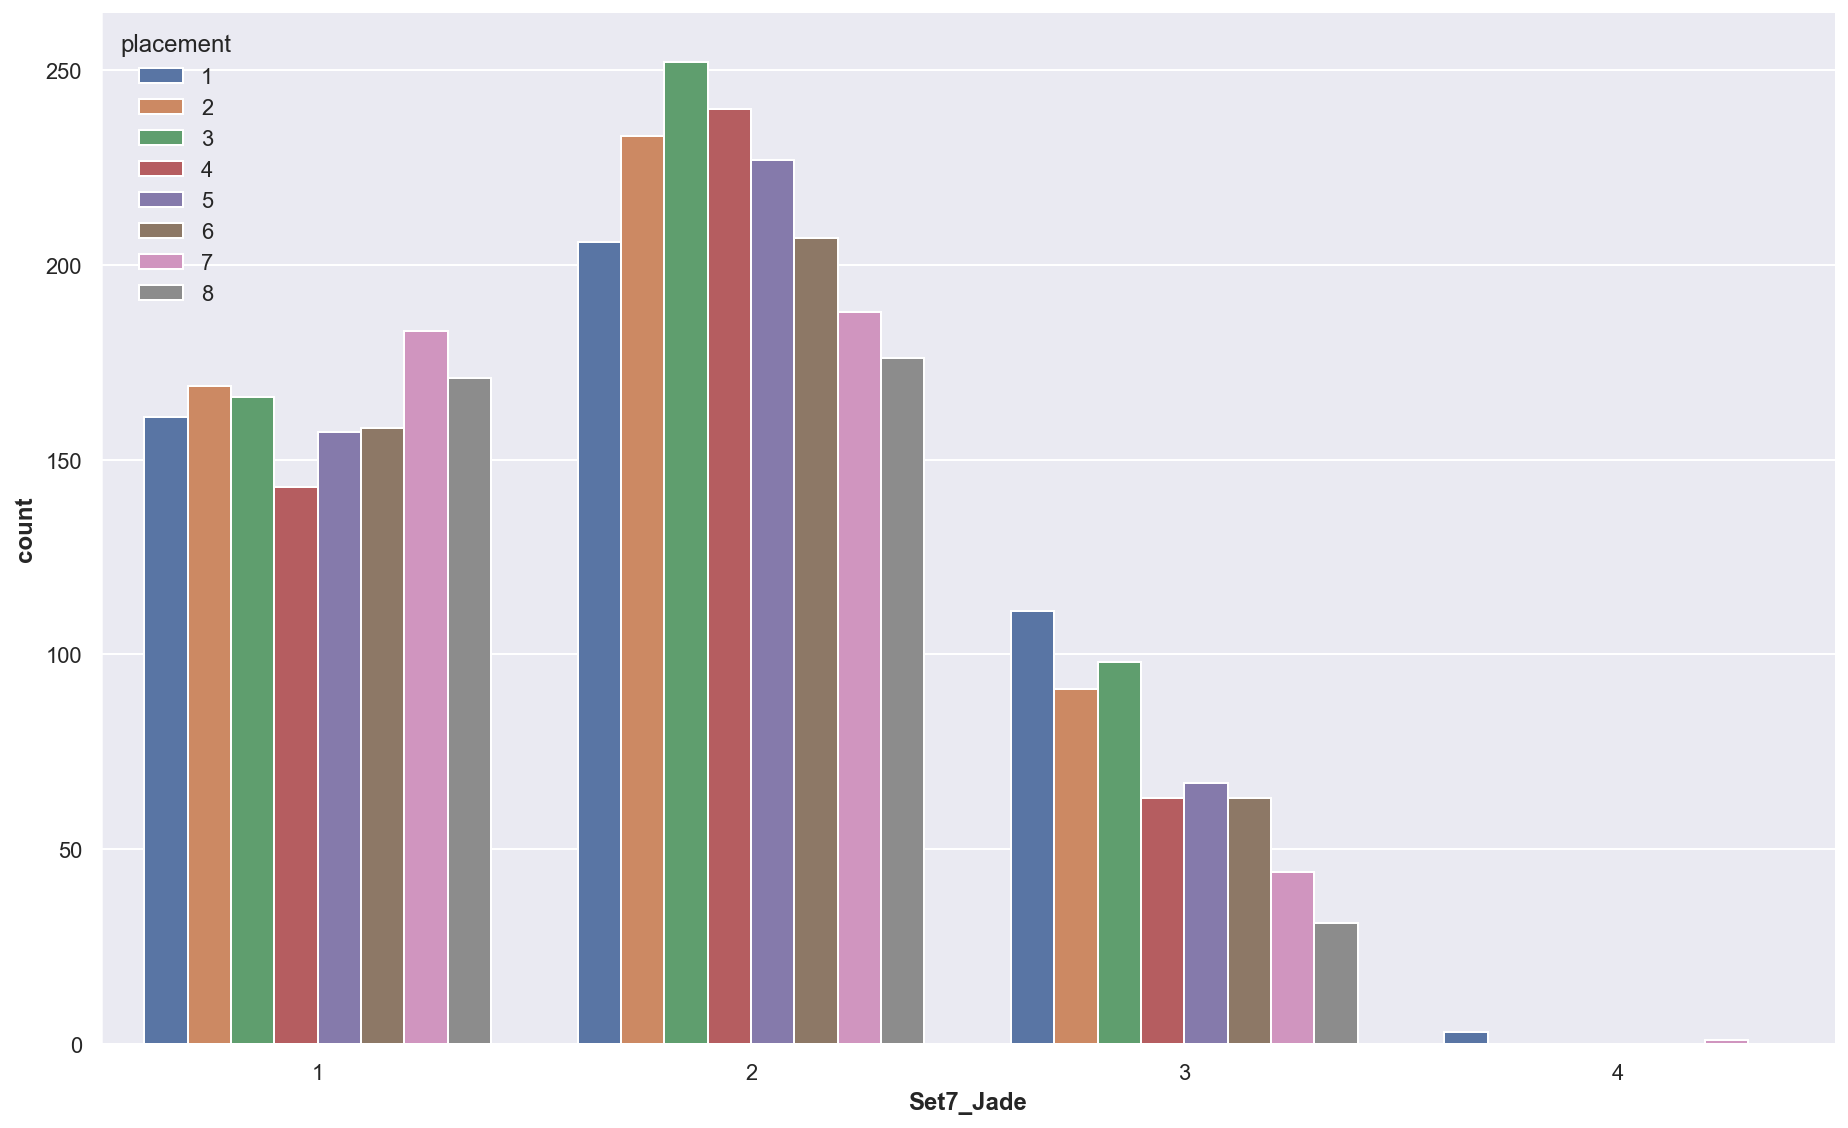

In [683]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Jade']>0], x='Set7_Jade', hue=TARGETNAME)
sns.despine()

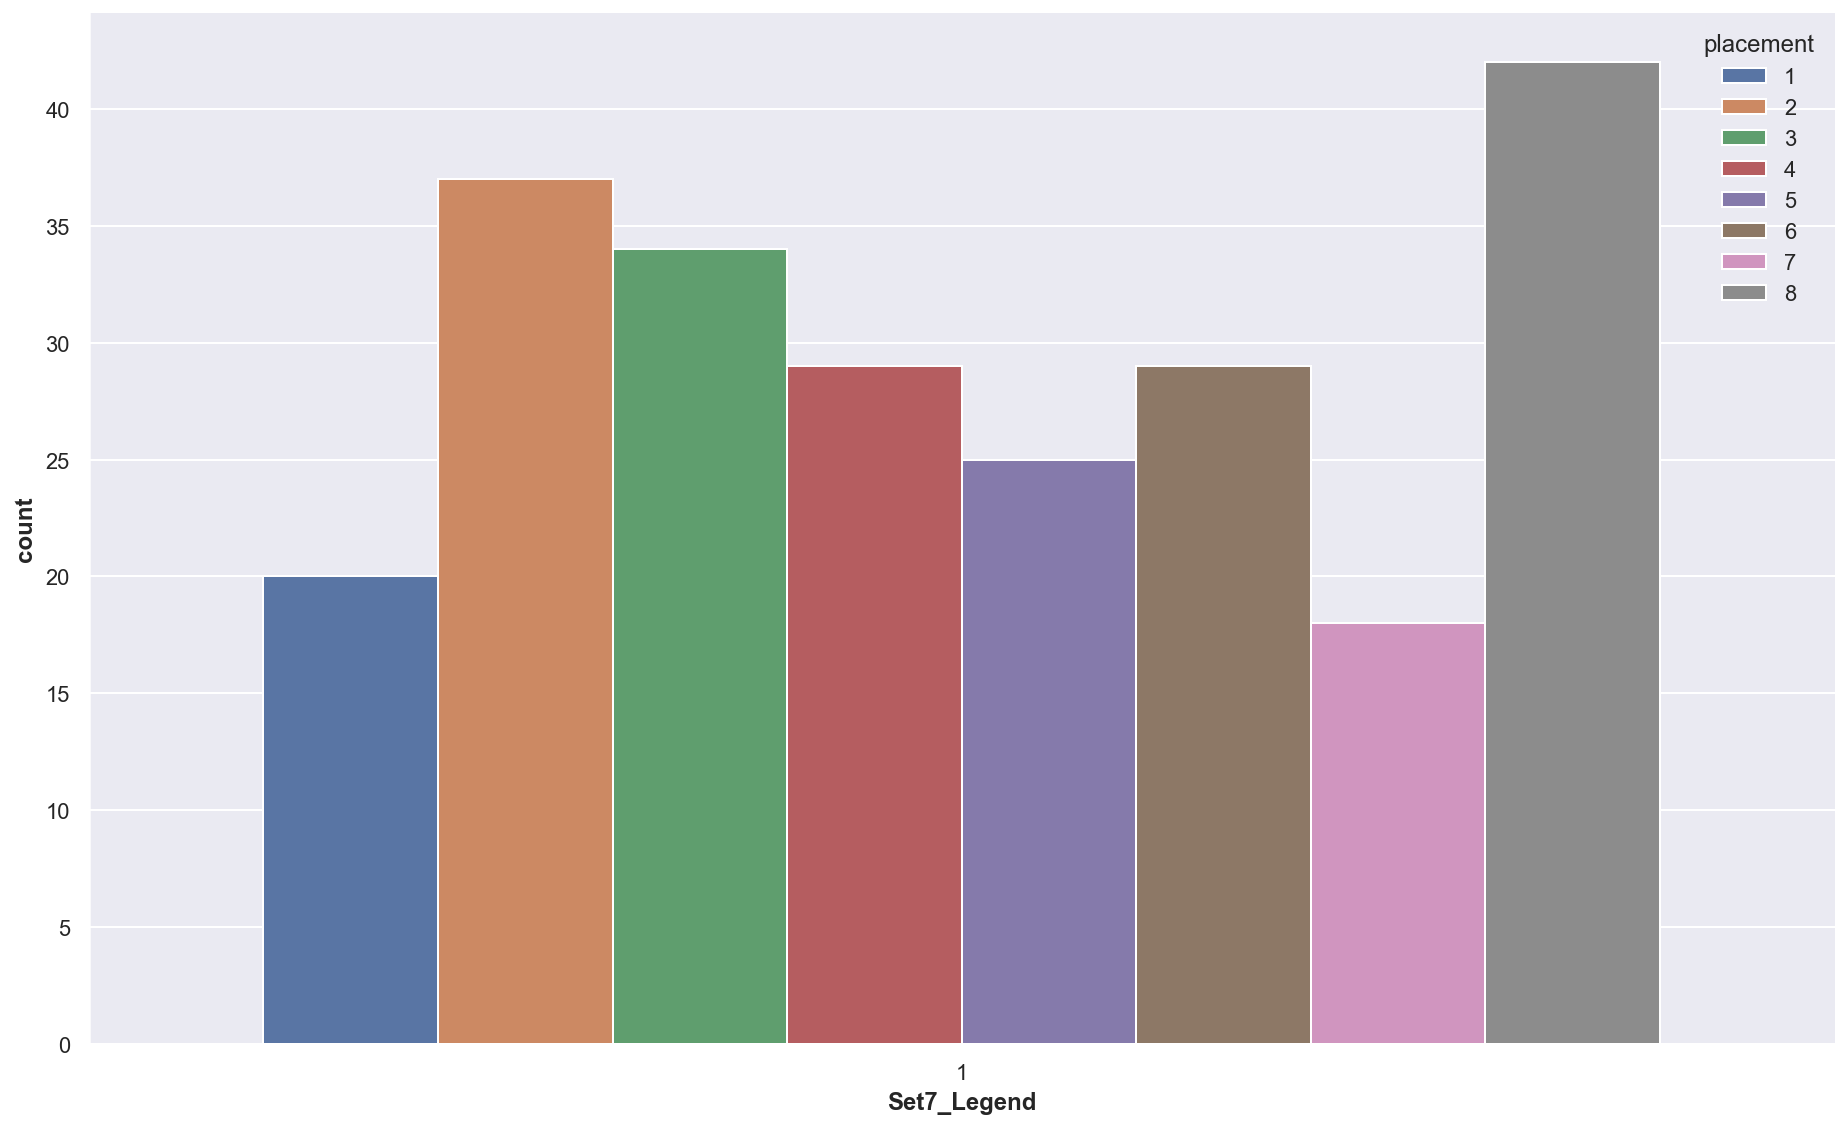

In [684]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Legend']>0], x='Set7_Legend', hue=TARGETNAME)
sns.despine()

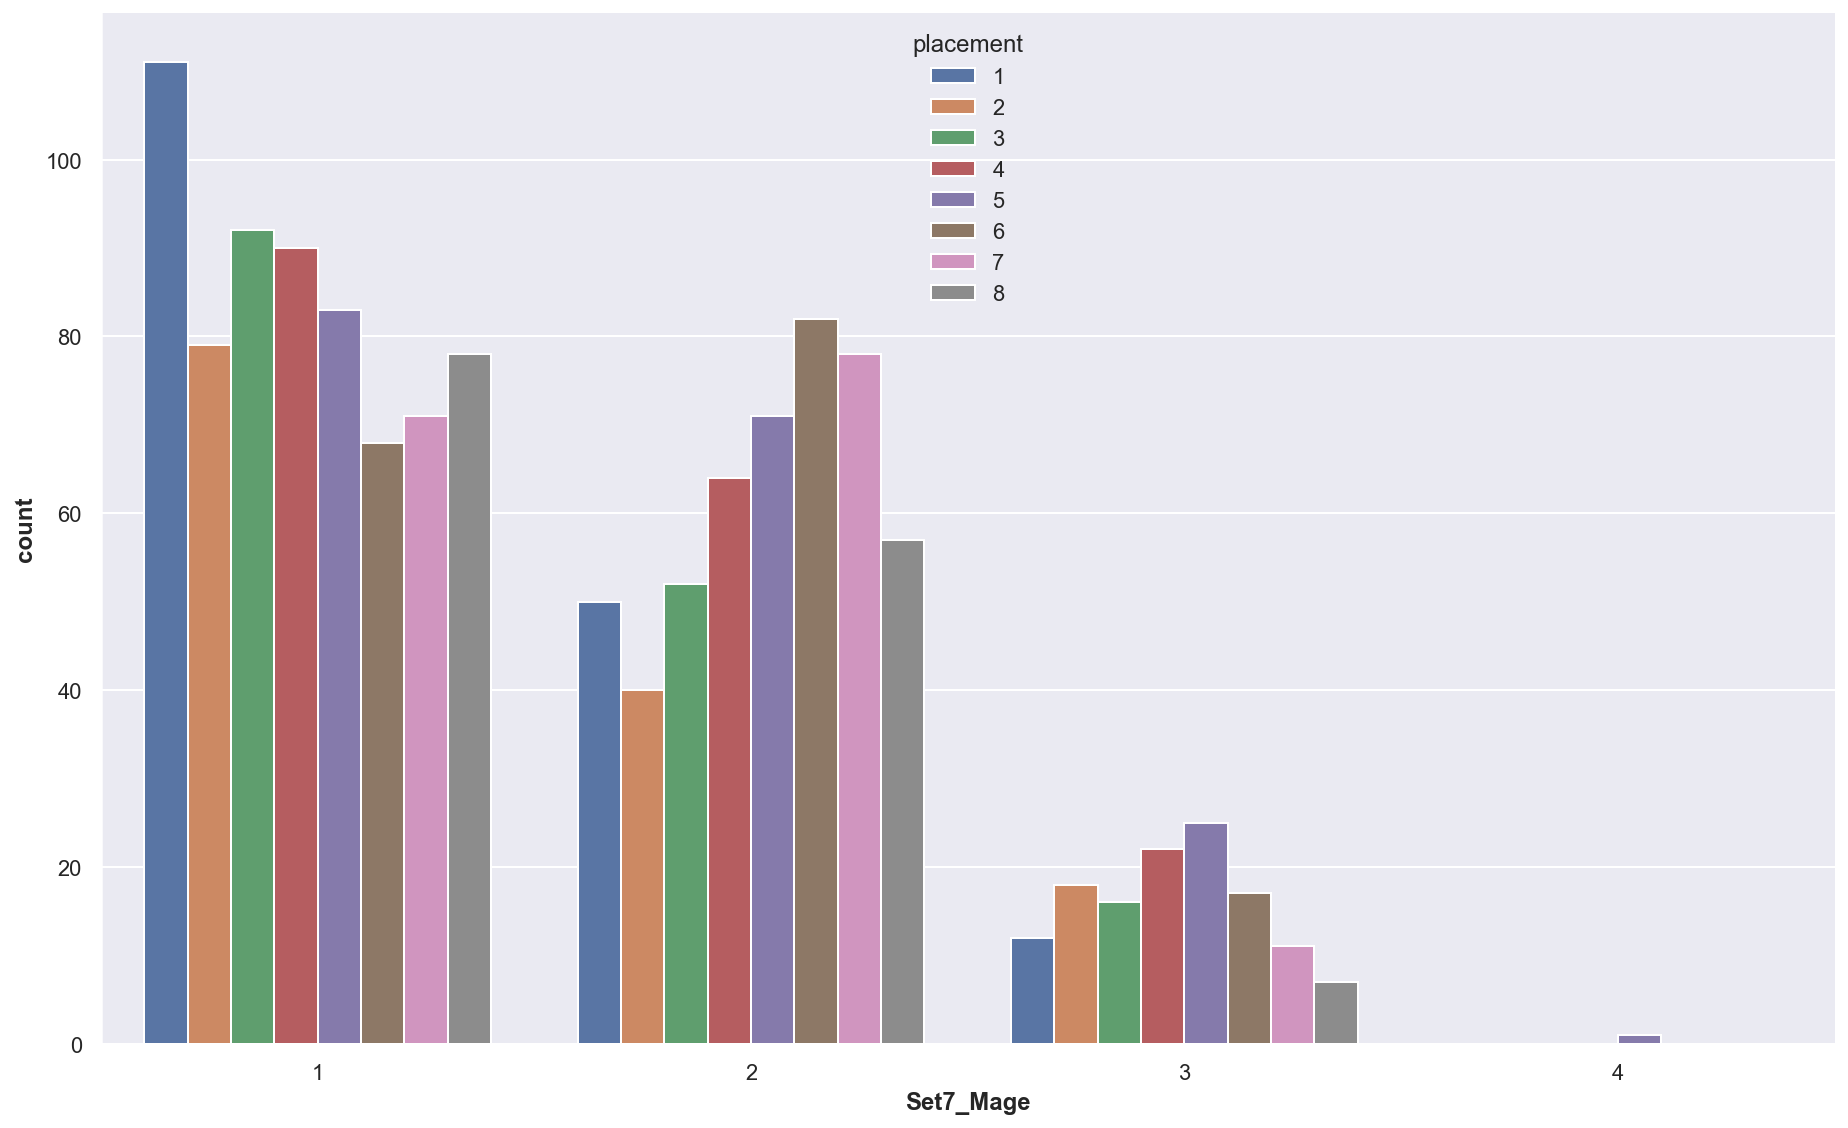

In [685]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='Set7_Mage', hue=TARGETNAME)
sns.despine()

Need Zoe for Mages

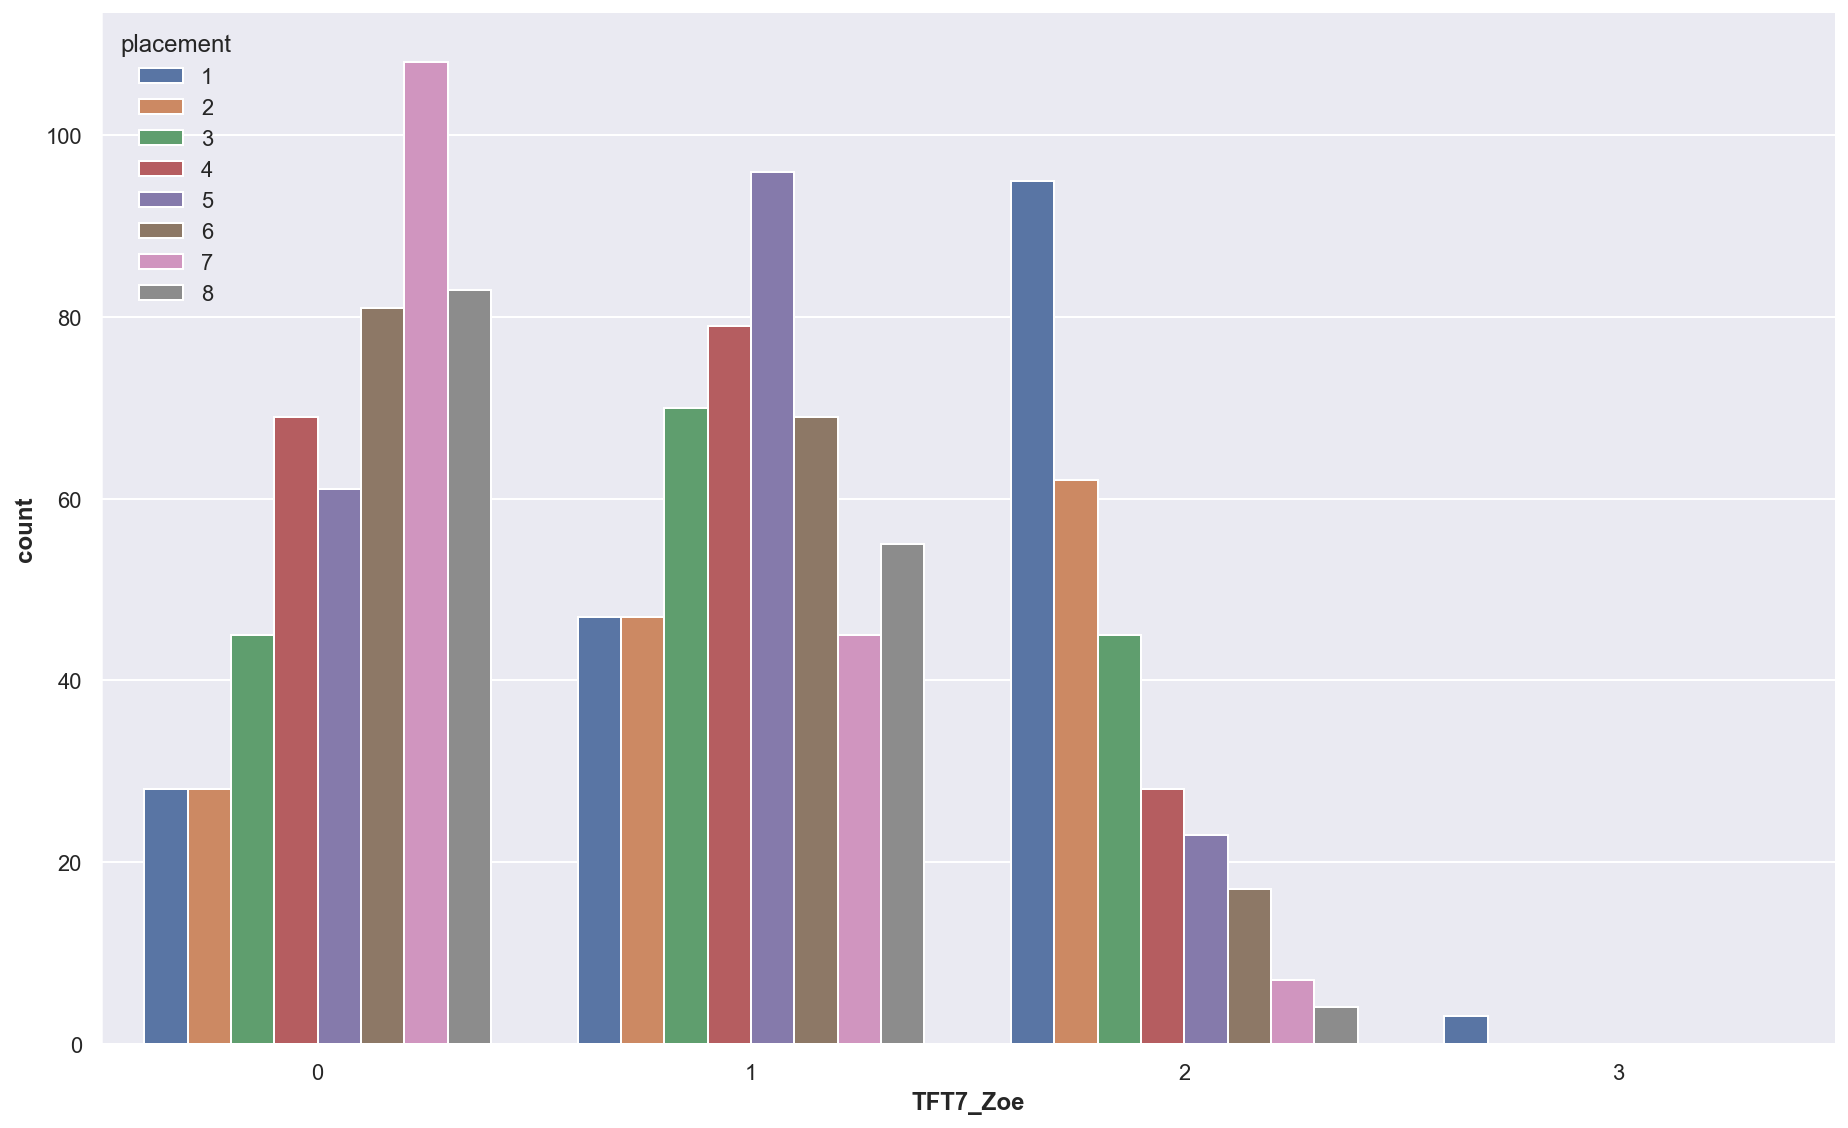

In [686]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='TFT7_Zoe', hue=TARGETNAME)
sns.despine()

Significant correlation with Mystic.

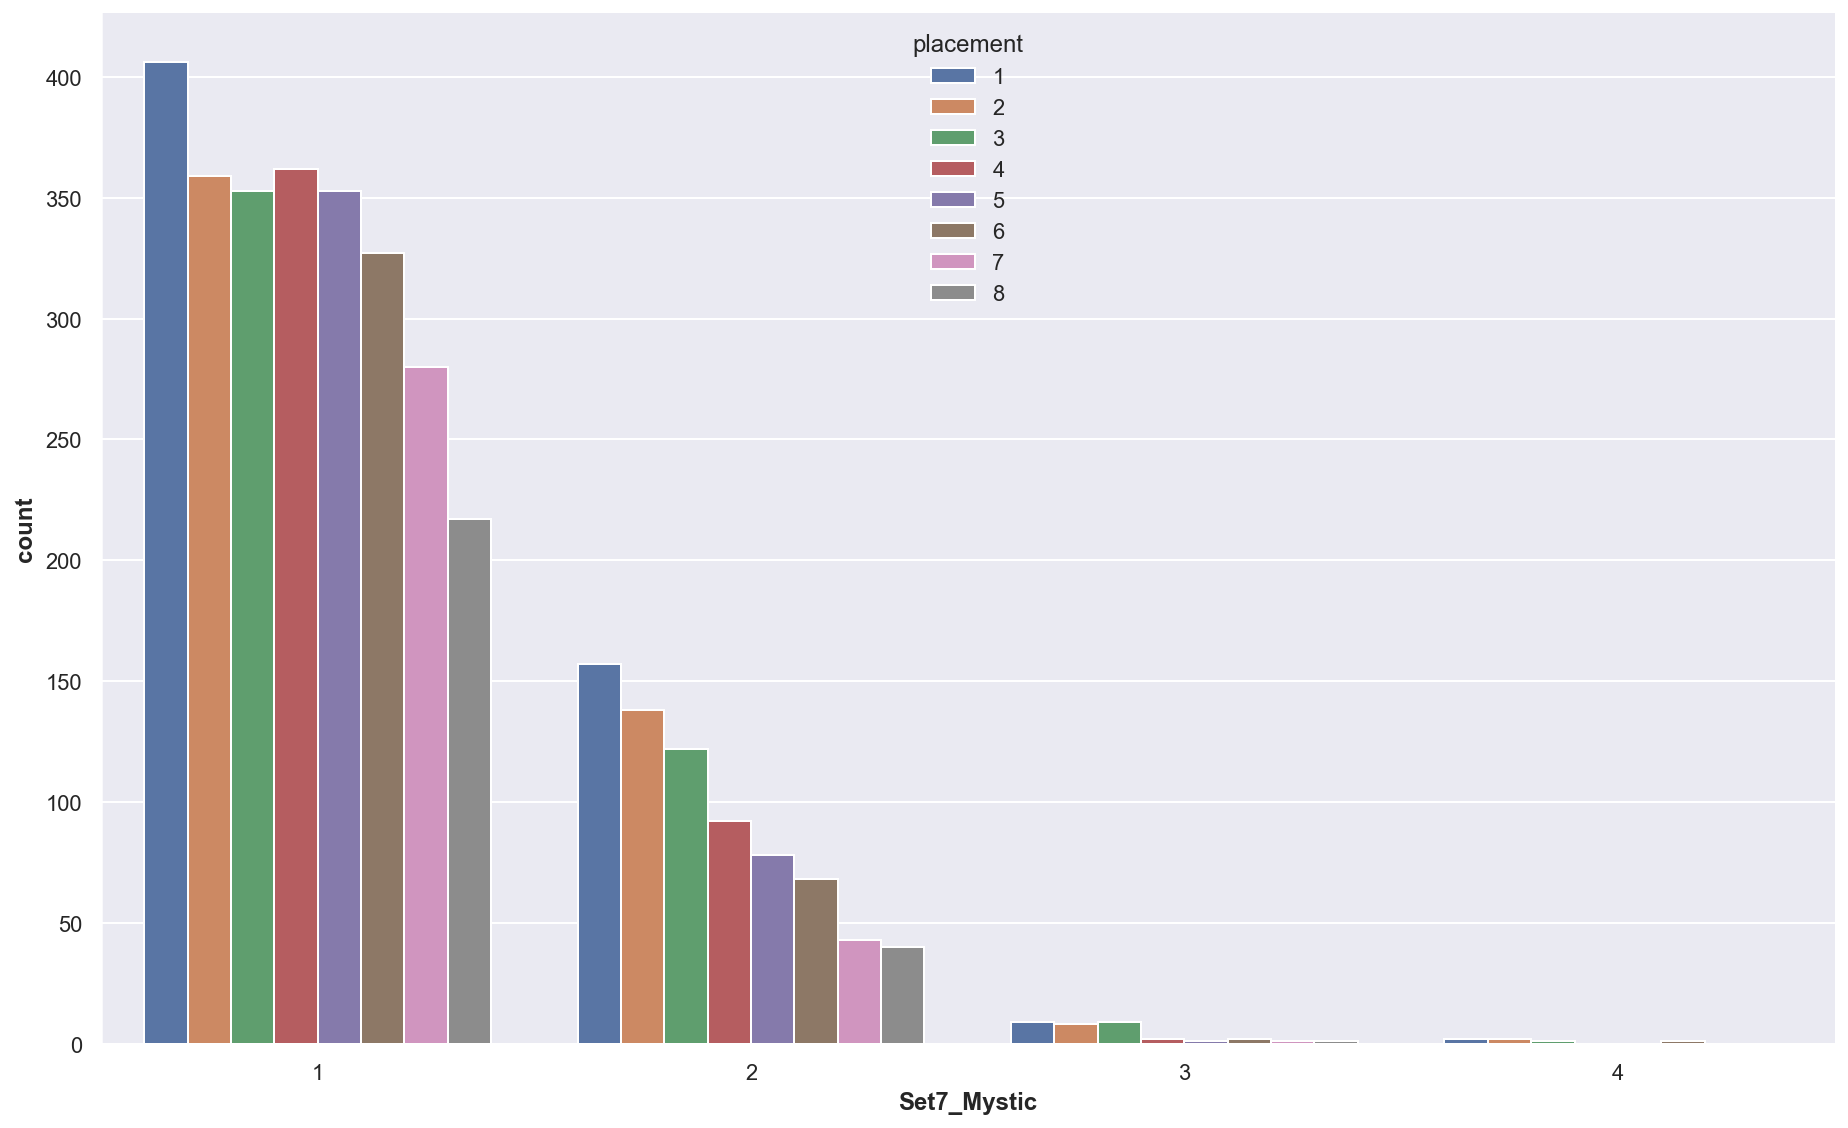

In [687]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mystic']>0], x='Set7_Mystic', hue=TARGETNAME)
sns.despine()

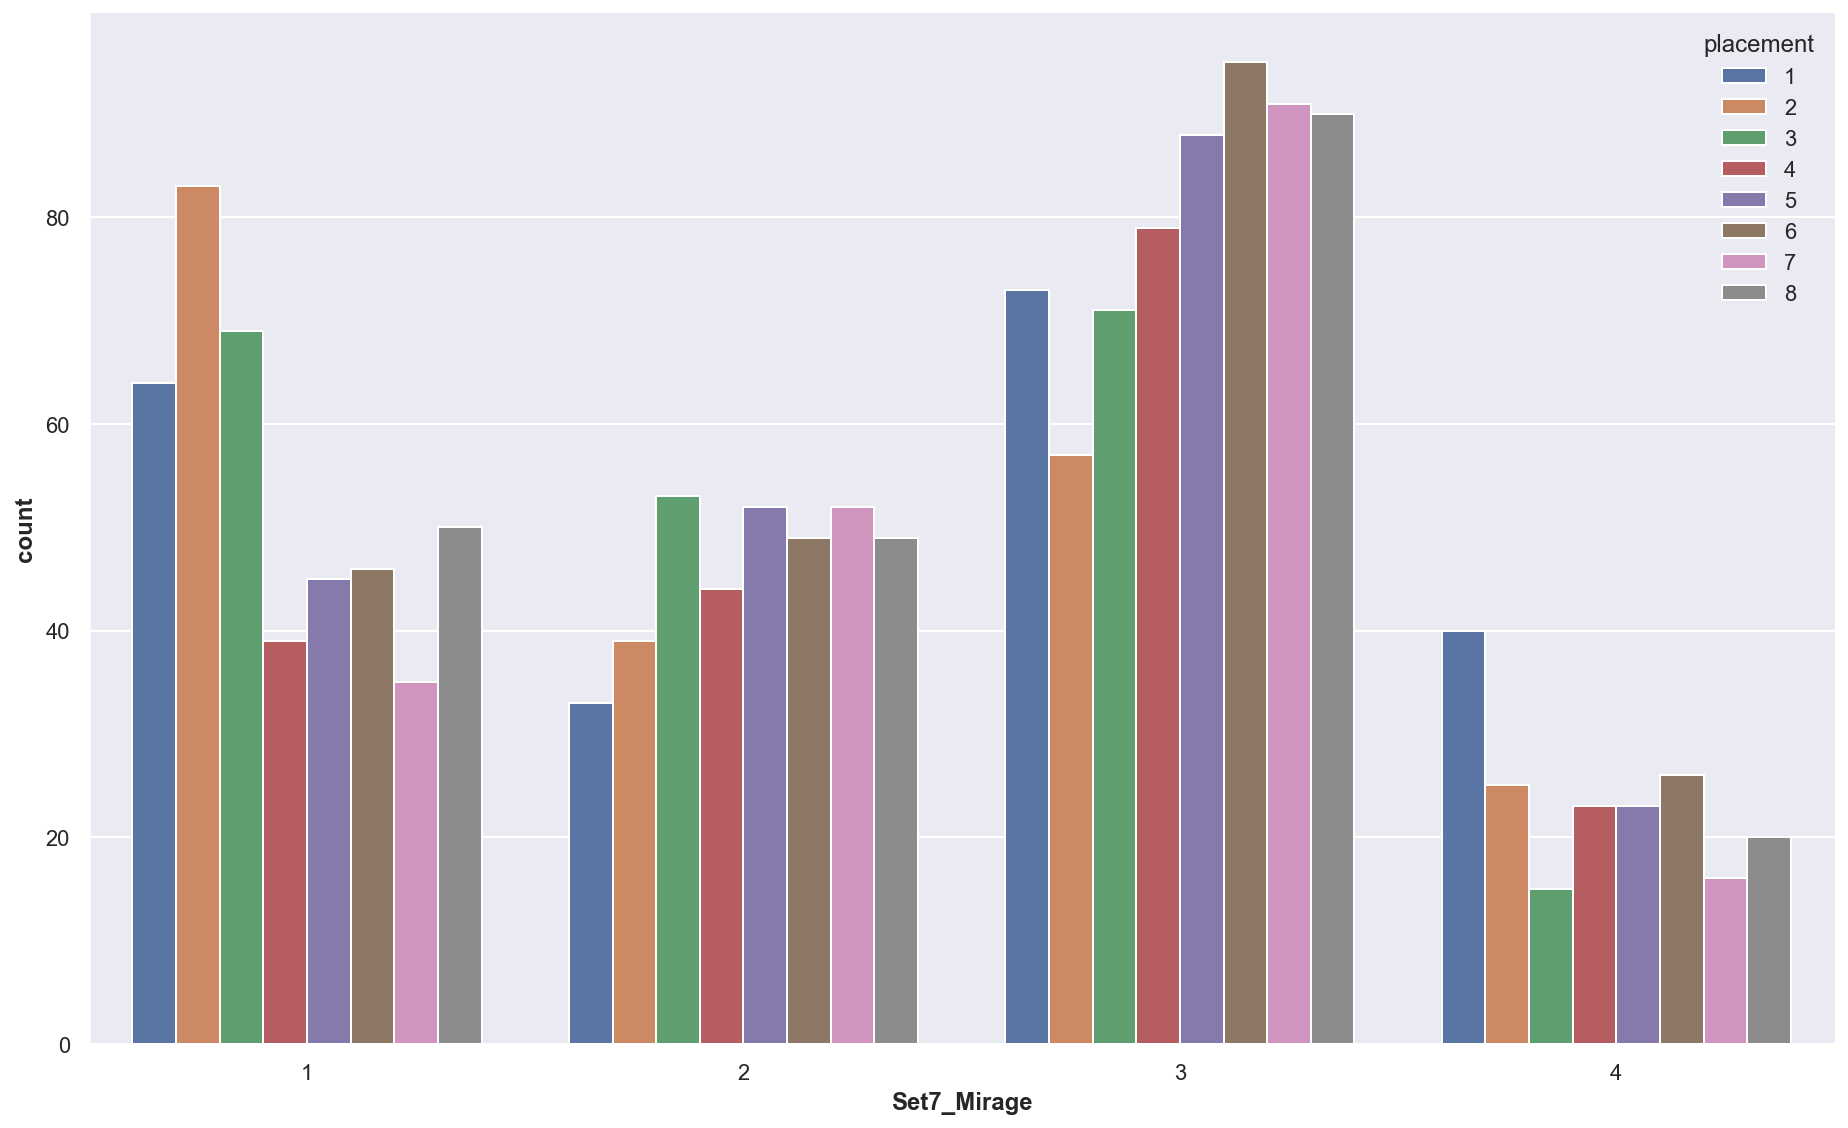

In [688]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mirage']>0], x='Set7_Mirage', hue=TARGETNAME)
sns.despine()

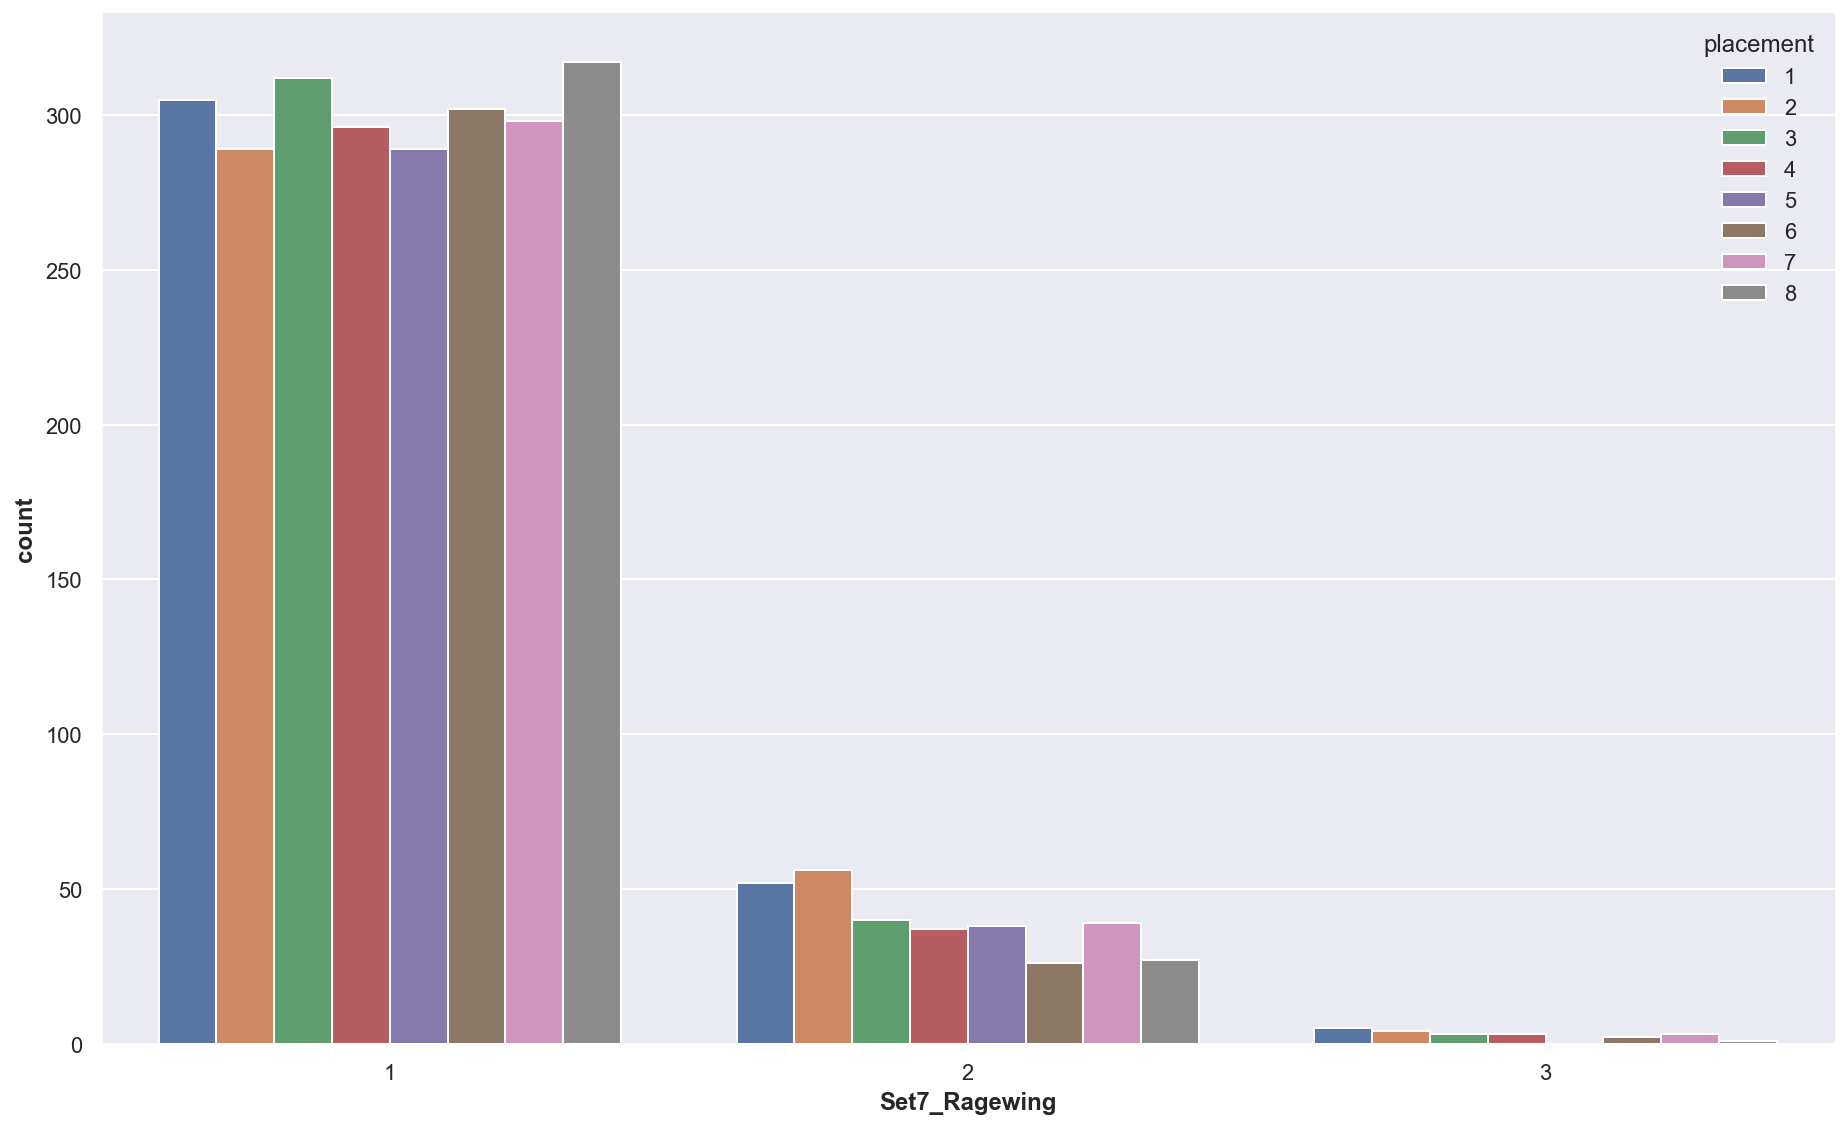

In [689]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Ragewing']>0], x='Set7_Ragewing', hue=TARGETNAME)
sns.despine()

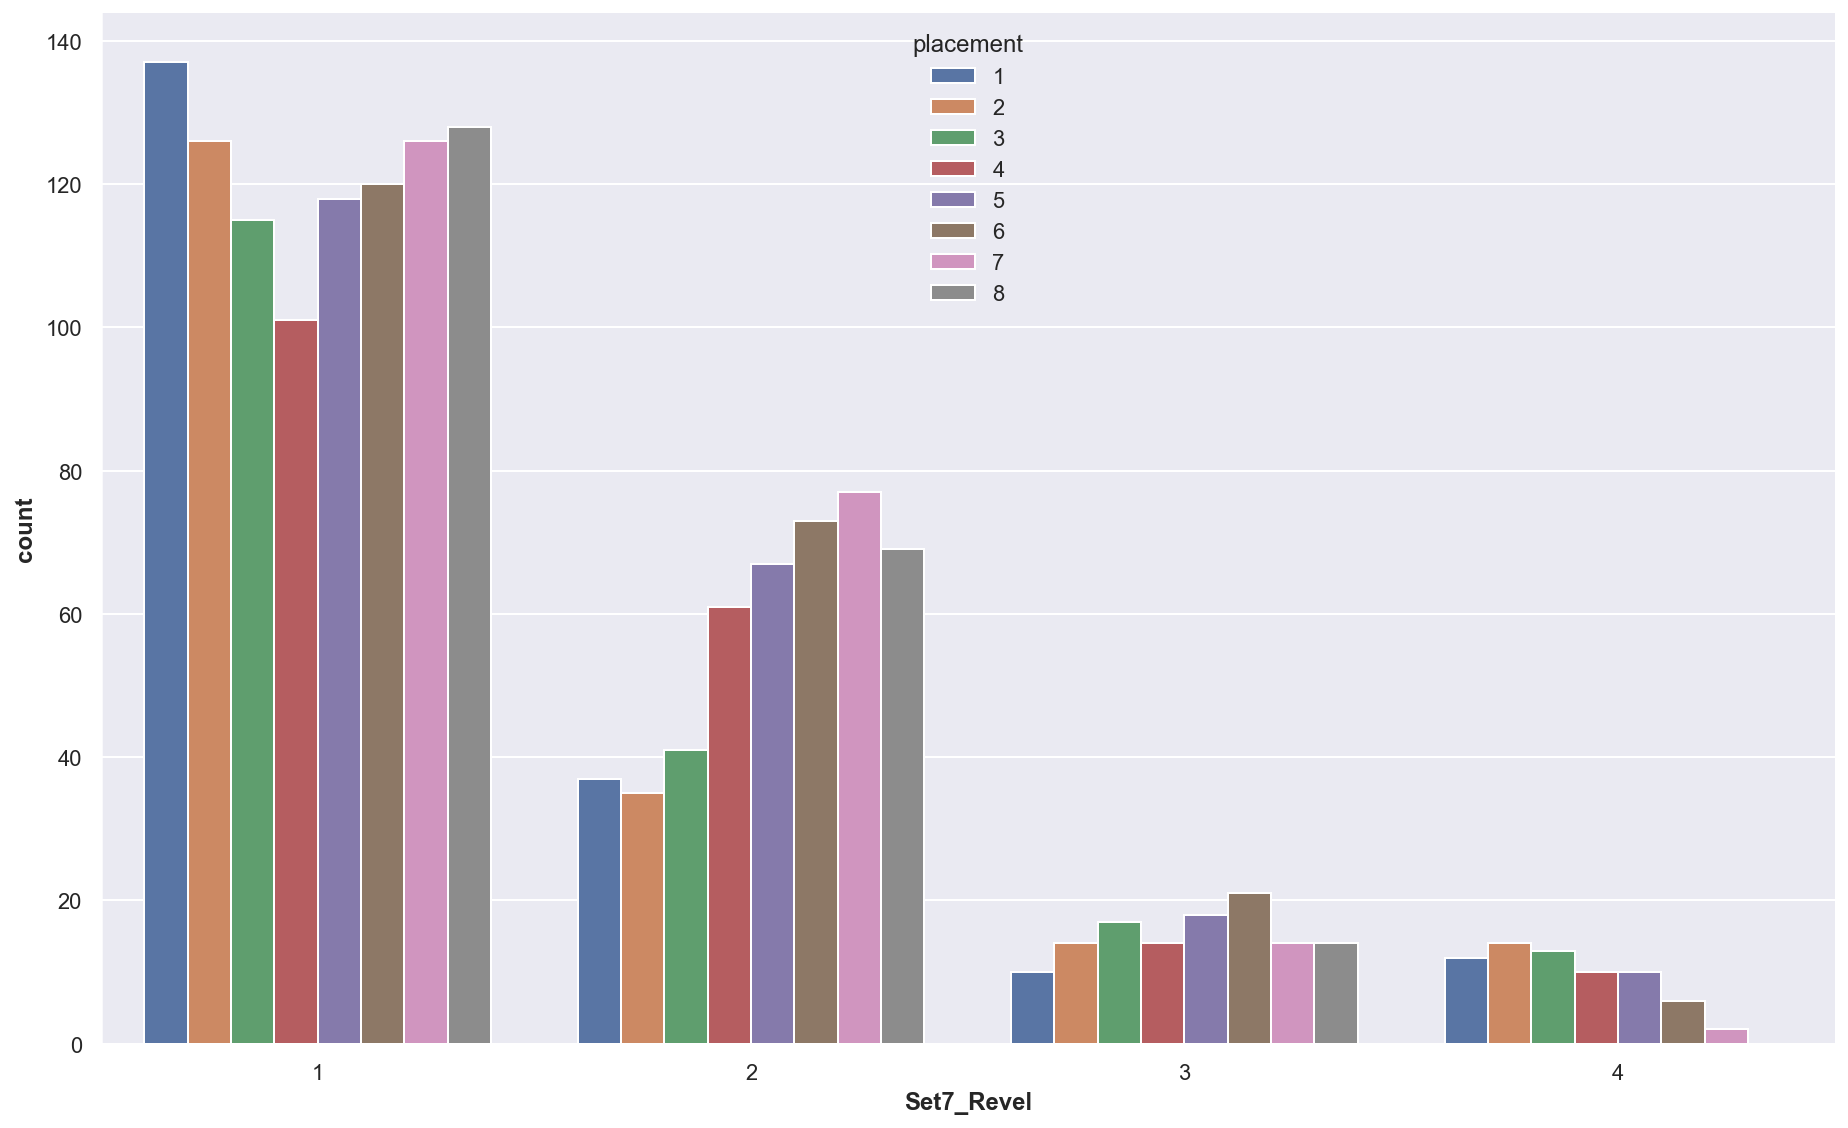

In [690]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Revel']>0], x='Set7_Revel', hue=TARGETNAME)
sns.despine()

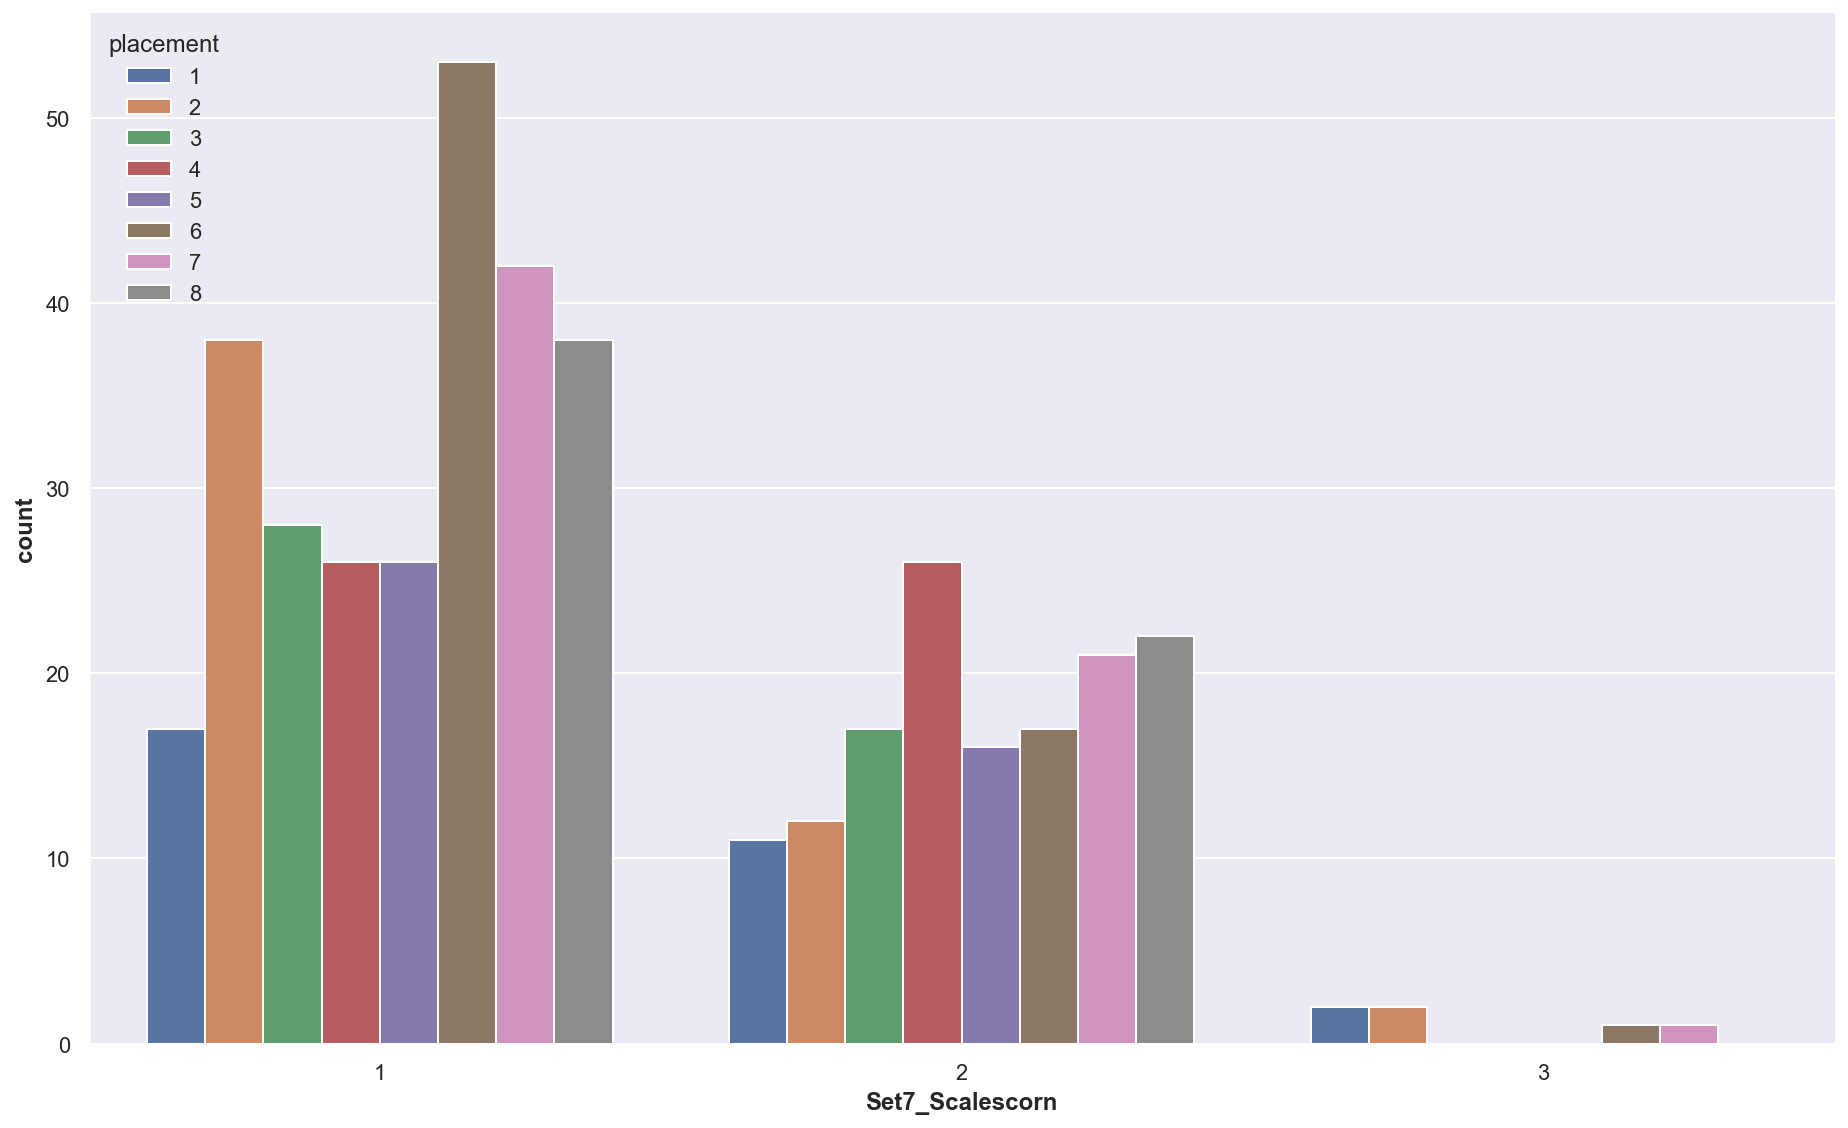

In [691]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Scalescorn']>0], x='Set7_Scalescorn', hue=TARGETNAME)
sns.despine()

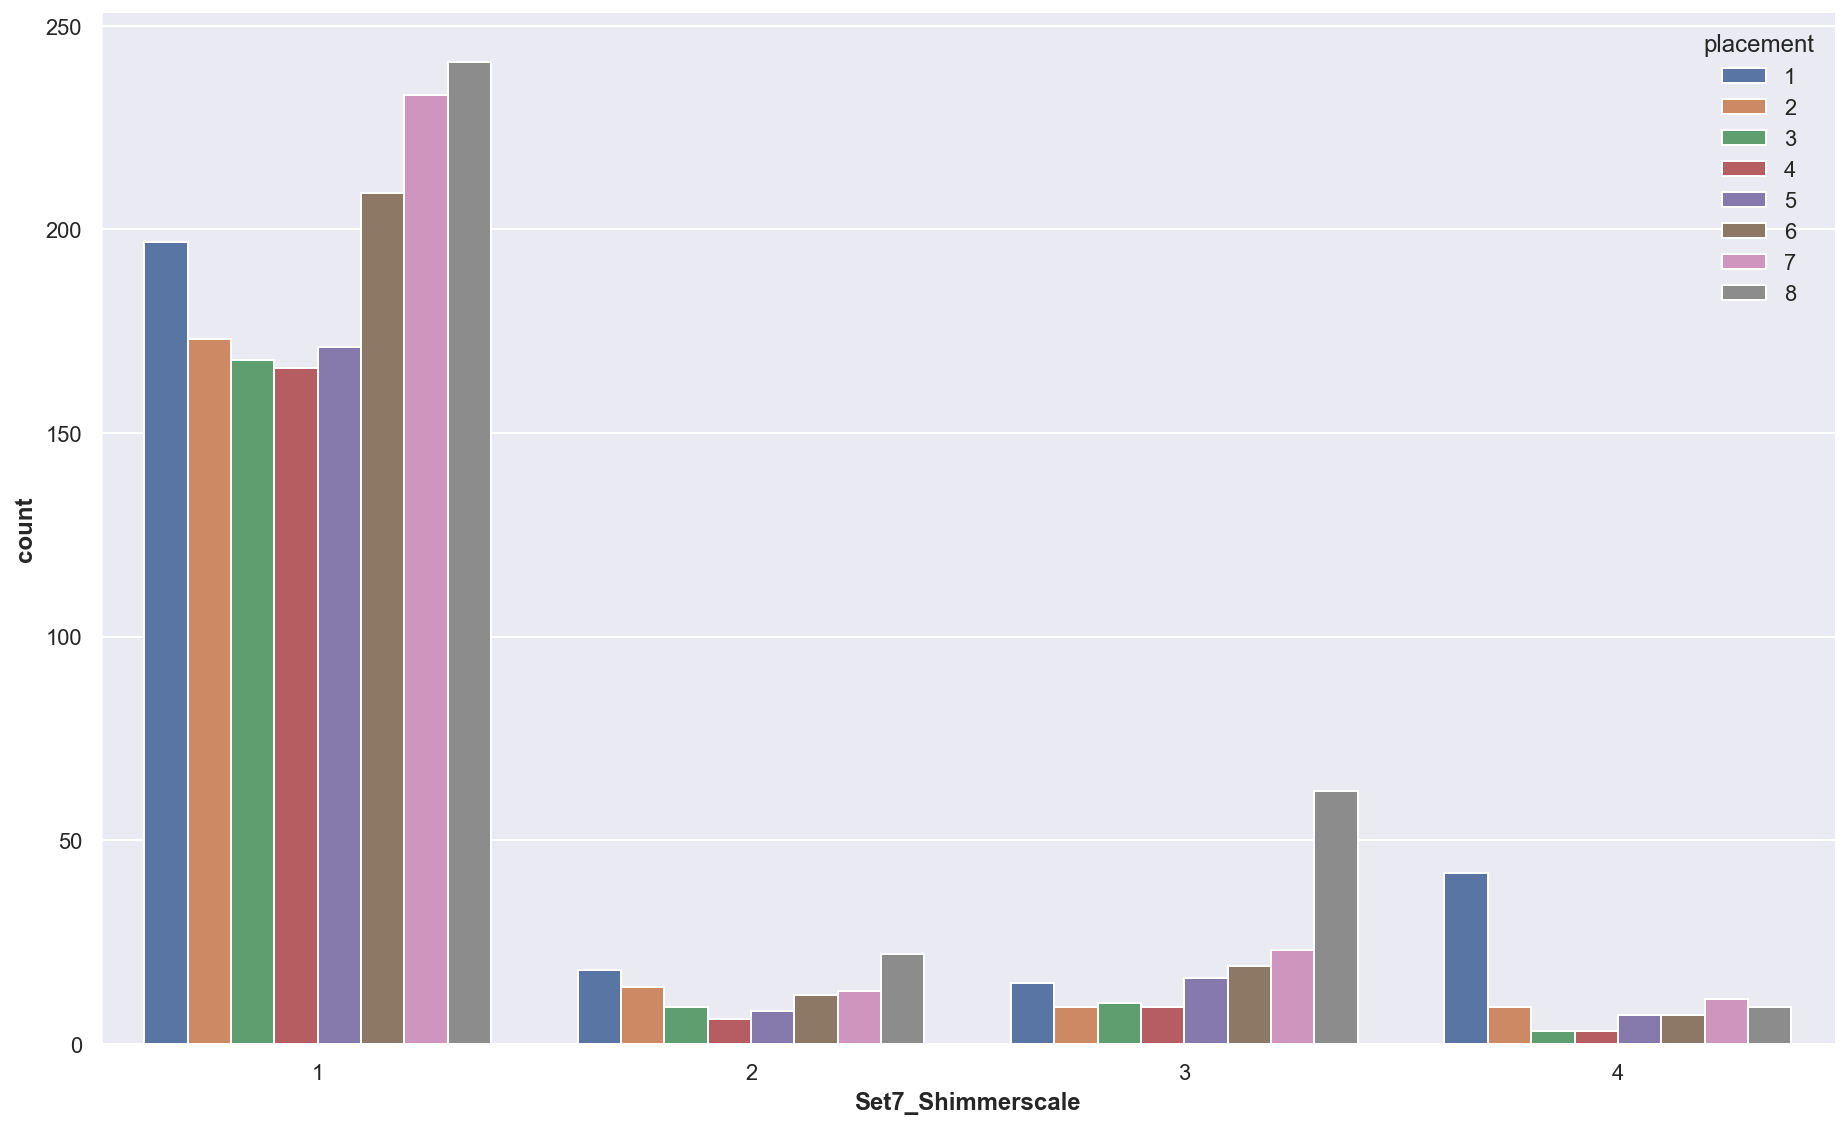

In [692]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shimmerscale']>0], x='Set7_Shimmerscale', hue=TARGETNAME)
sns.despine()

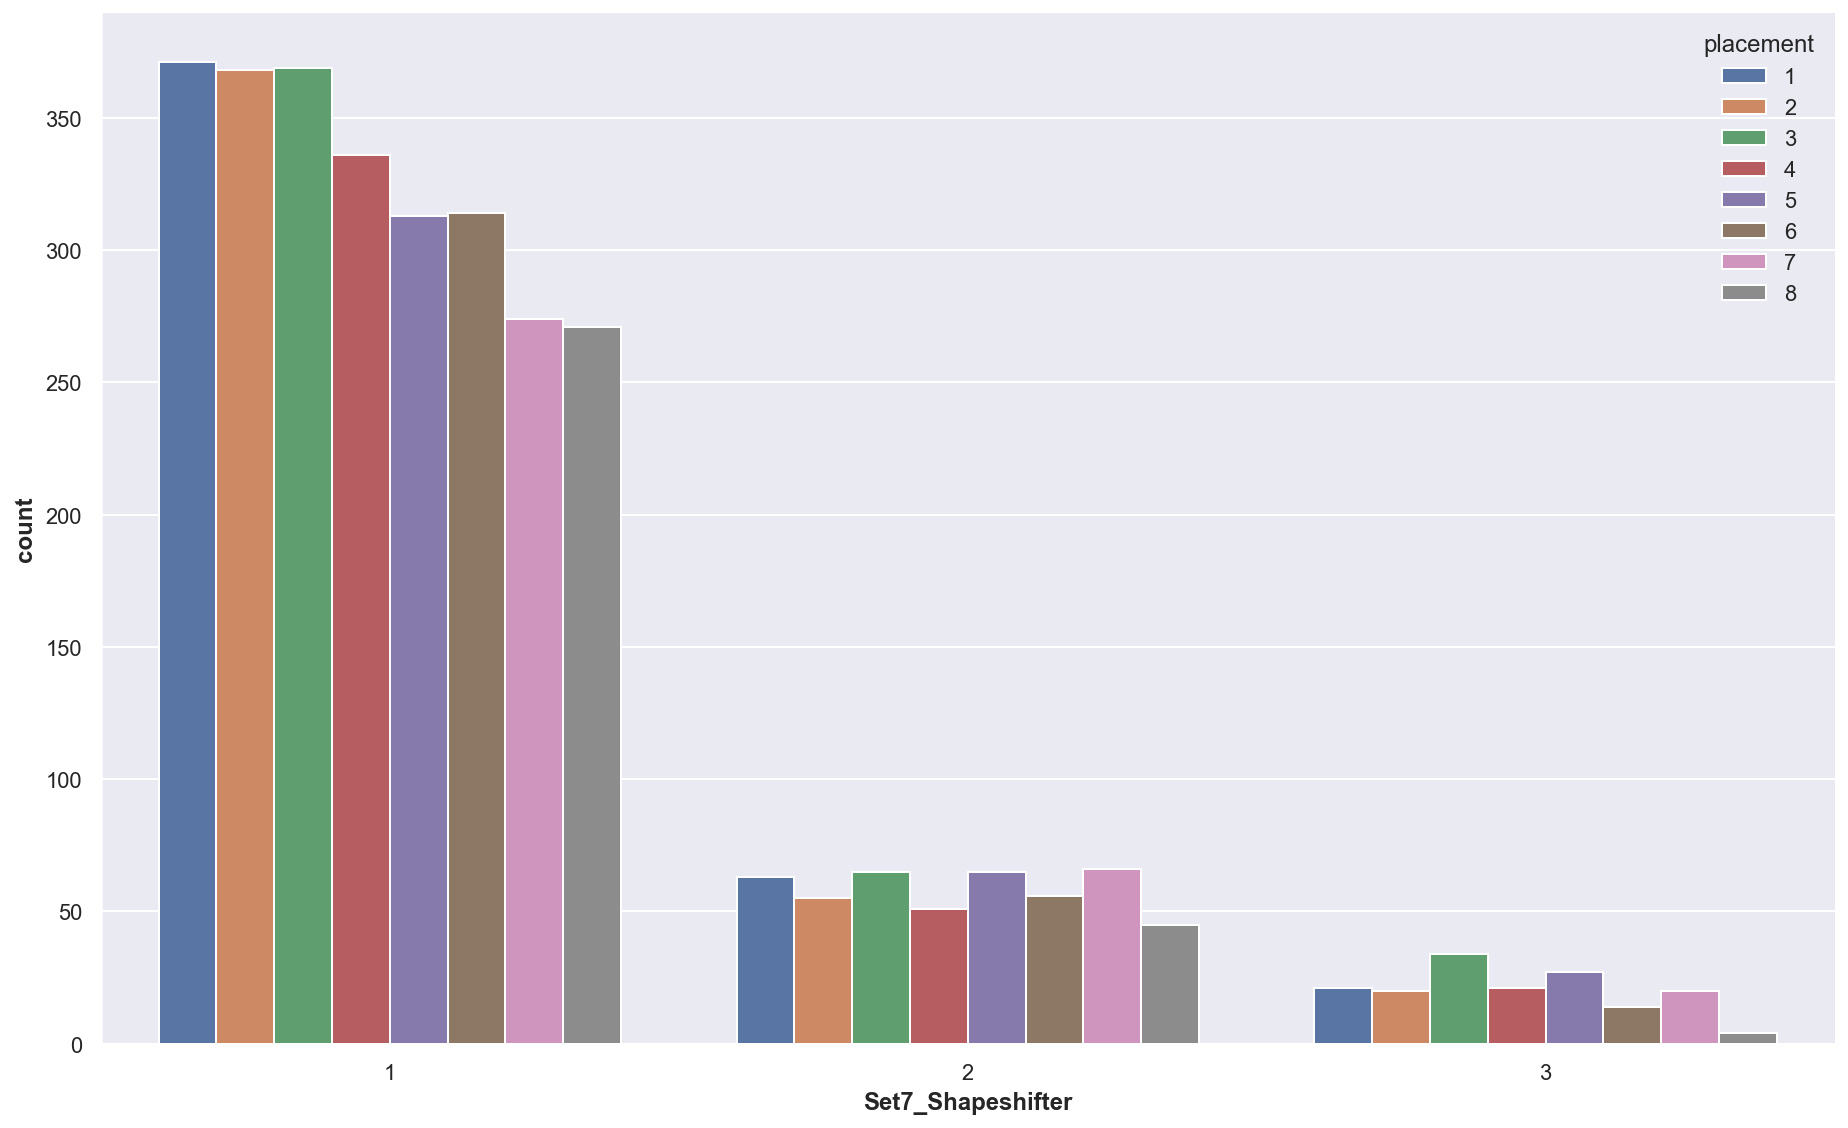

In [693]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shapeshifter']>0], x='Set7_Shapeshifter', hue=TARGETNAME)
sns.despine()

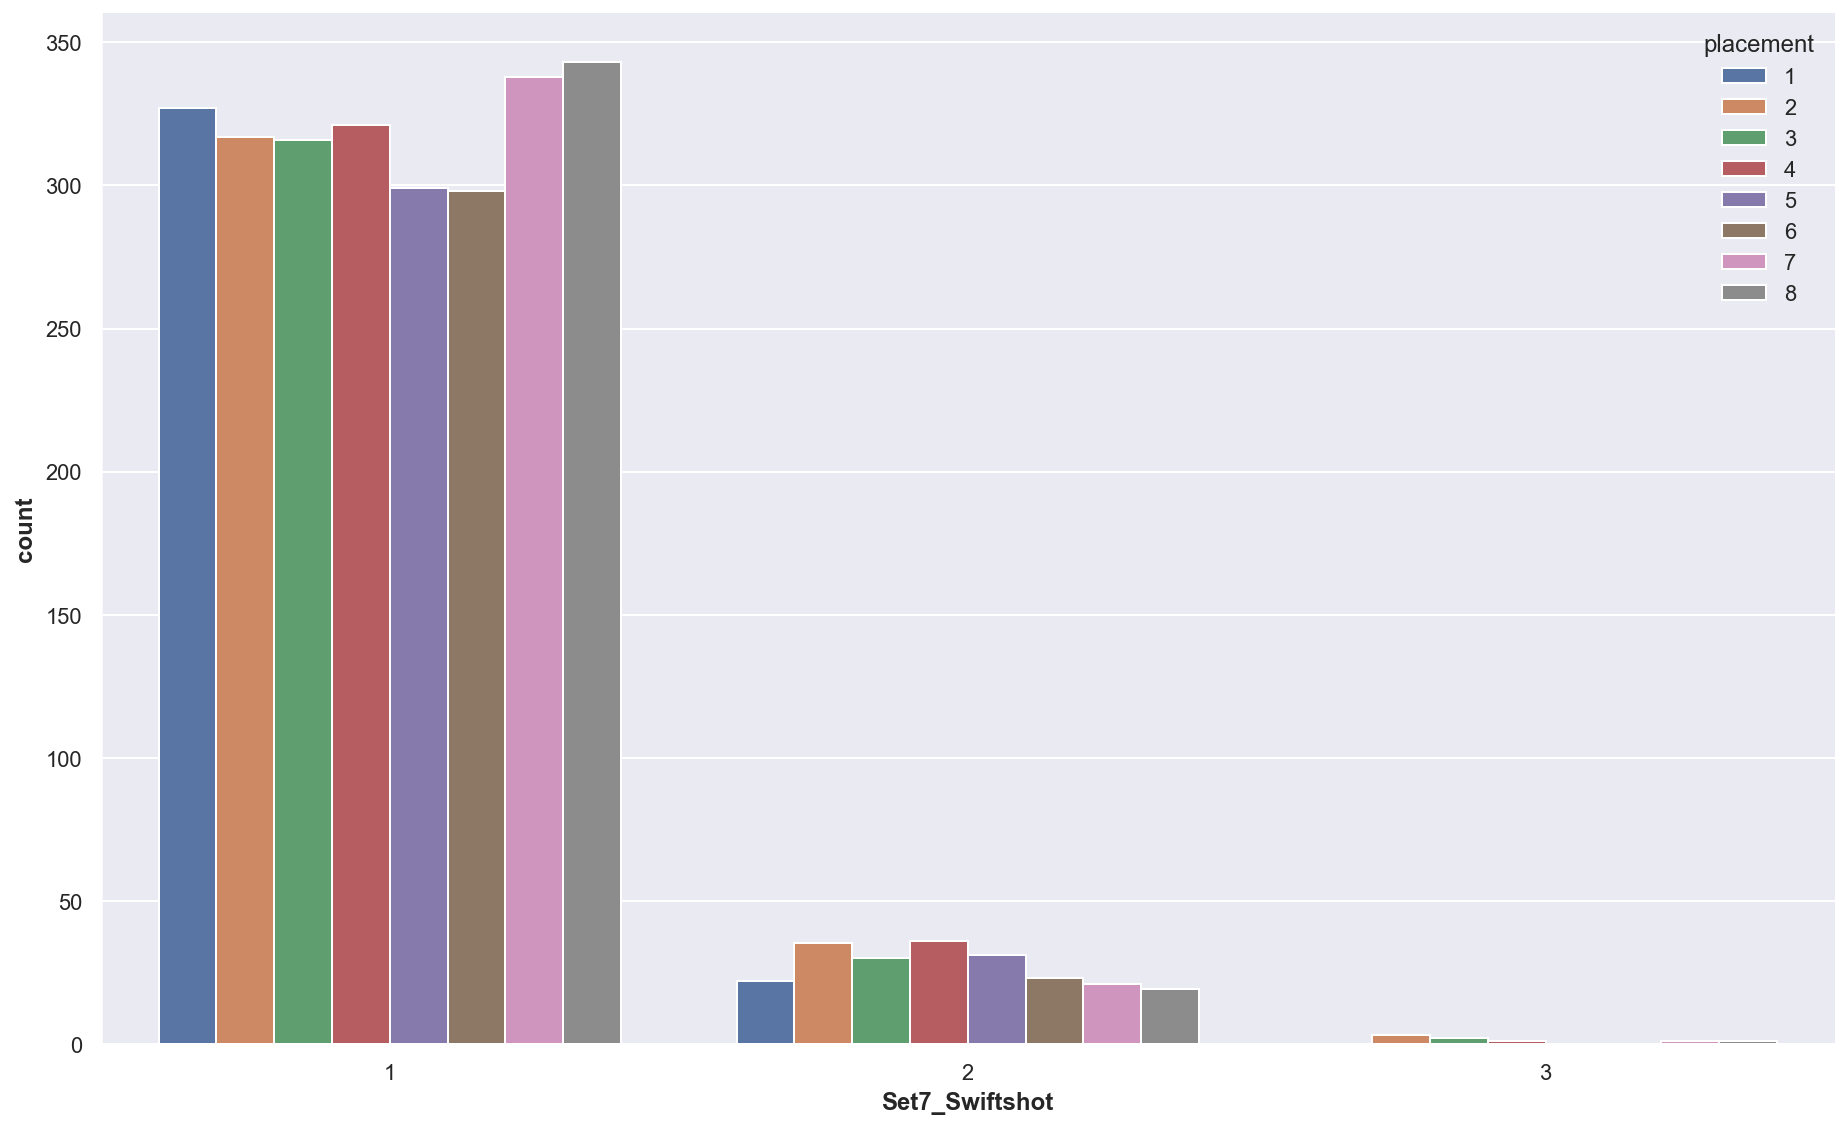

In [694]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Swiftshot']>0], x='Set7_Swiftshot', hue=TARGETNAME)
sns.despine()

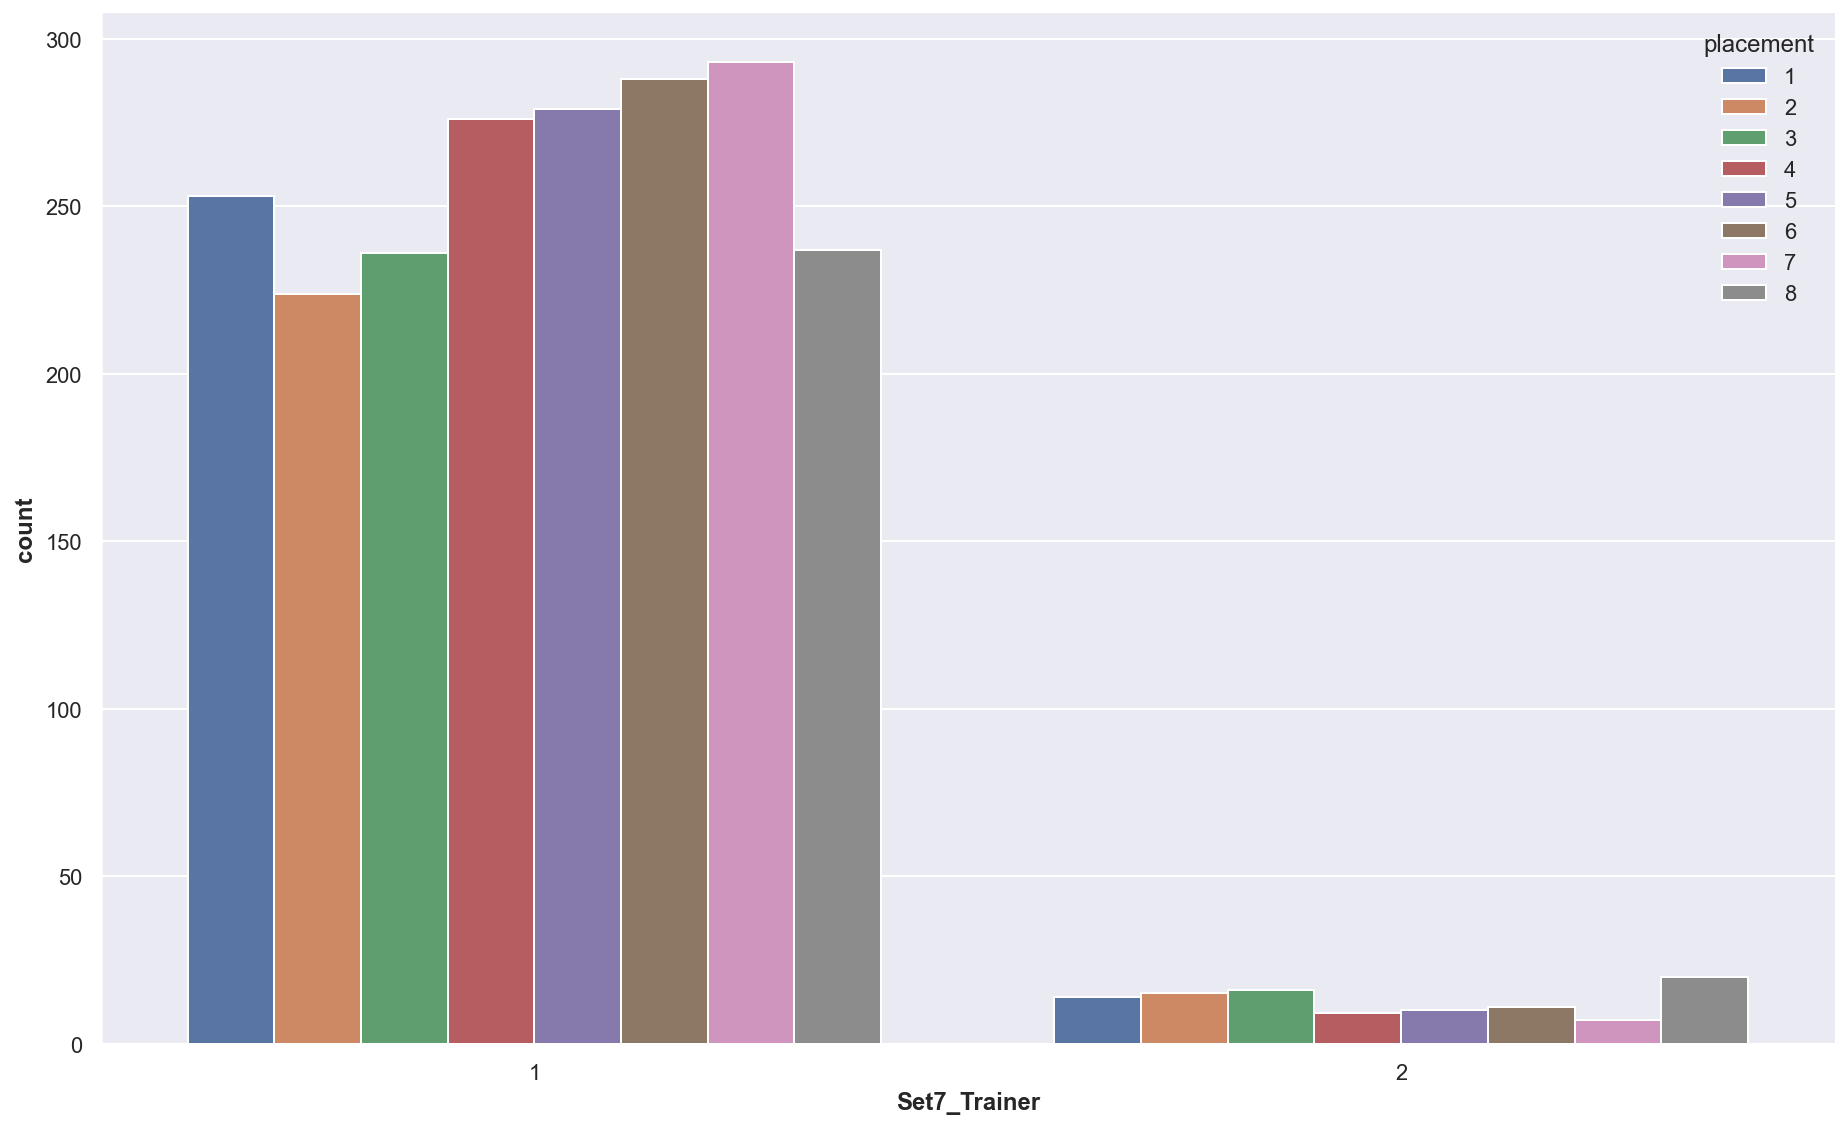

In [695]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Trainer']>0], x='Set7_Trainer', hue=TARGETNAME)
sns.despine()

This trait show the highest correlation in placement.

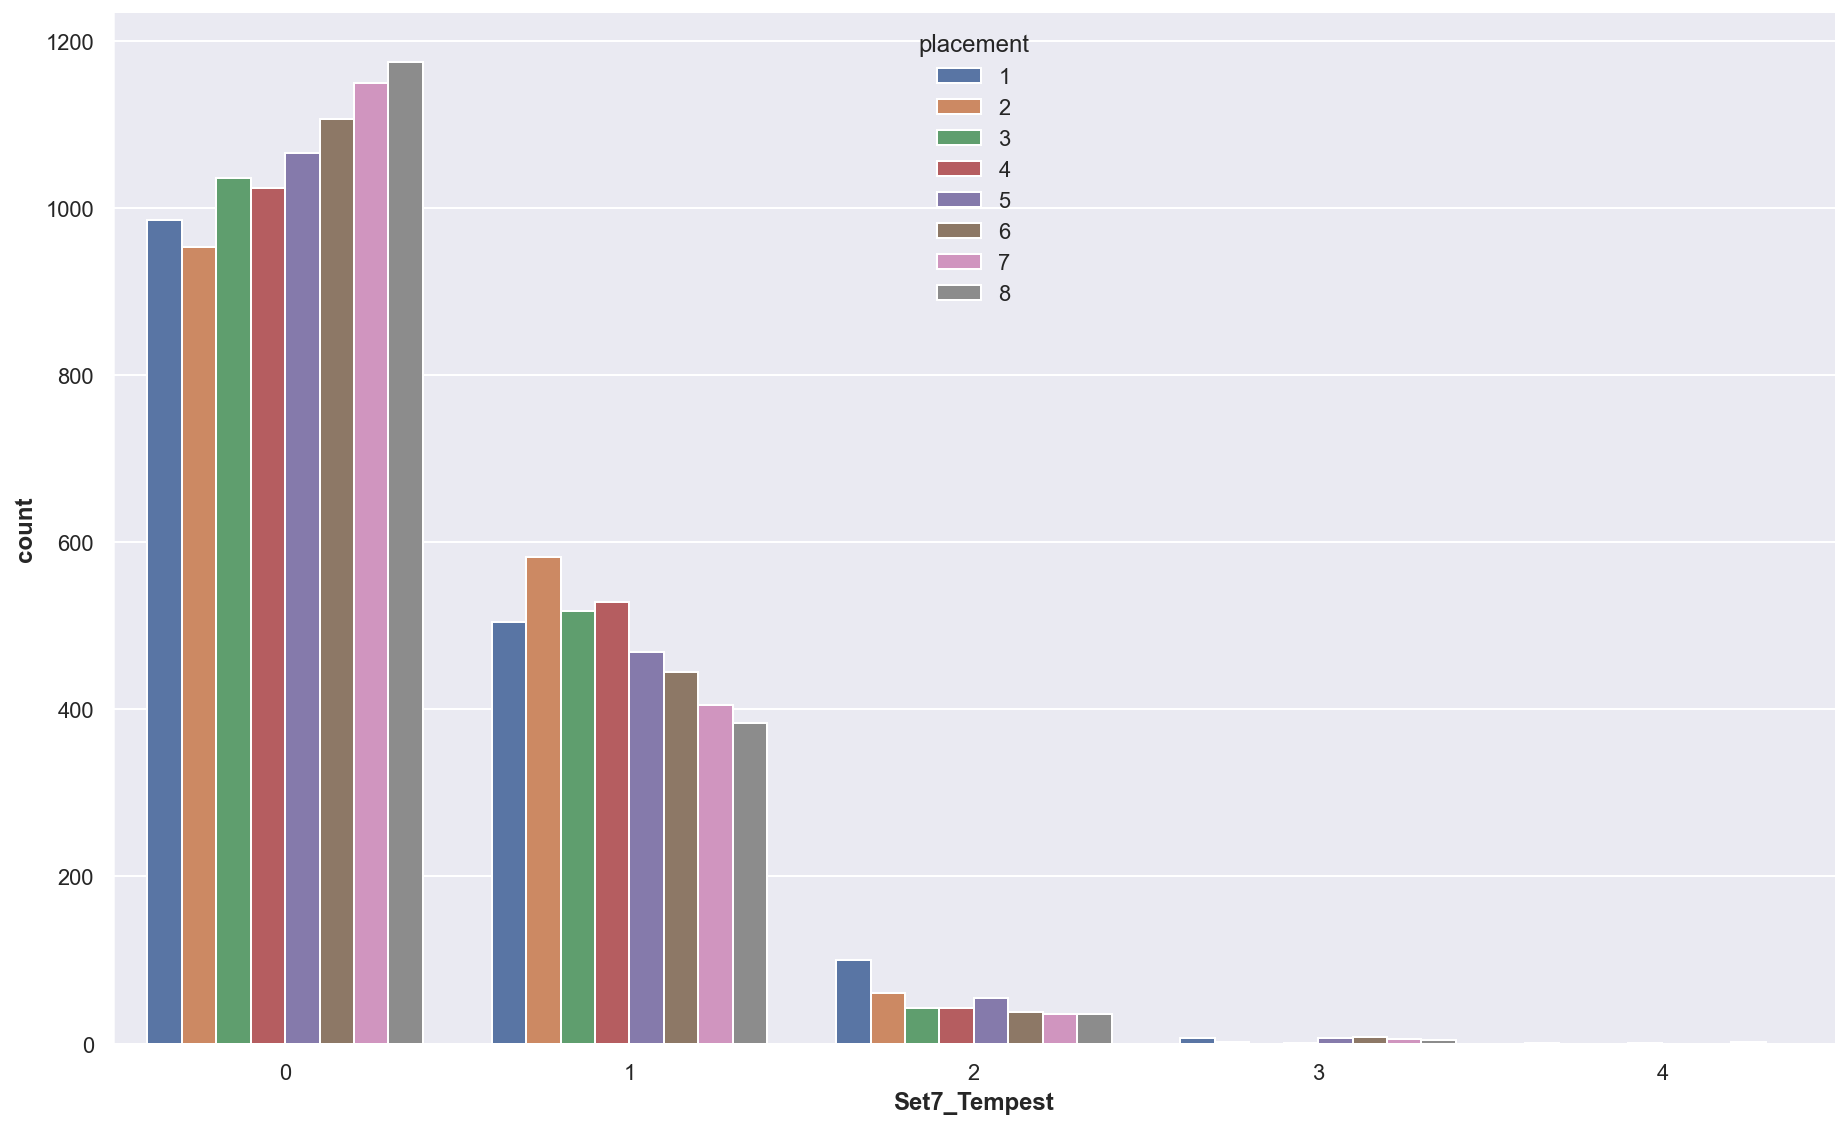

In [696]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Tempest']>=0], x='Set7_Tempest', hue=TARGETNAME)
sns.despine()

Stronger correlation at trait lvl 1.

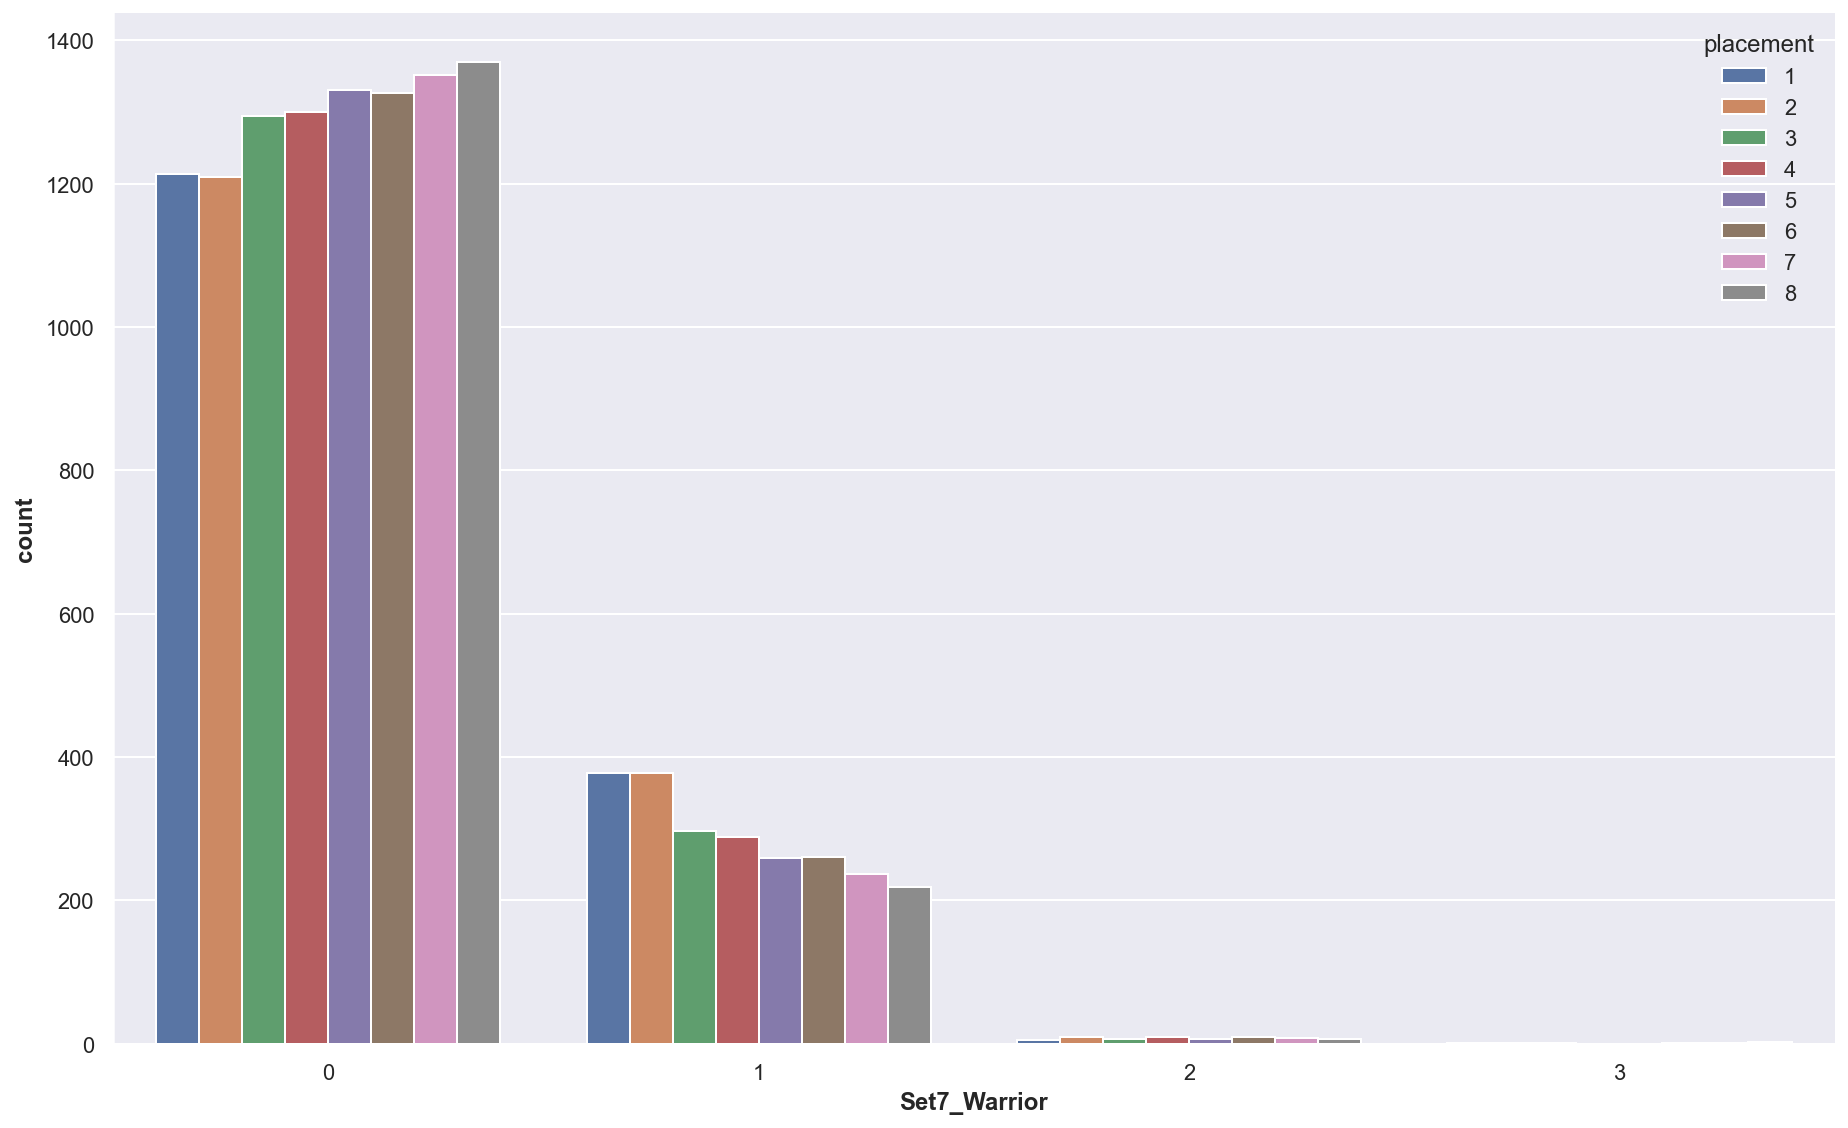

In [697]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Warrior']>=0], x='Set7_Warrior', hue=TARGETNAME)
sns.despine()

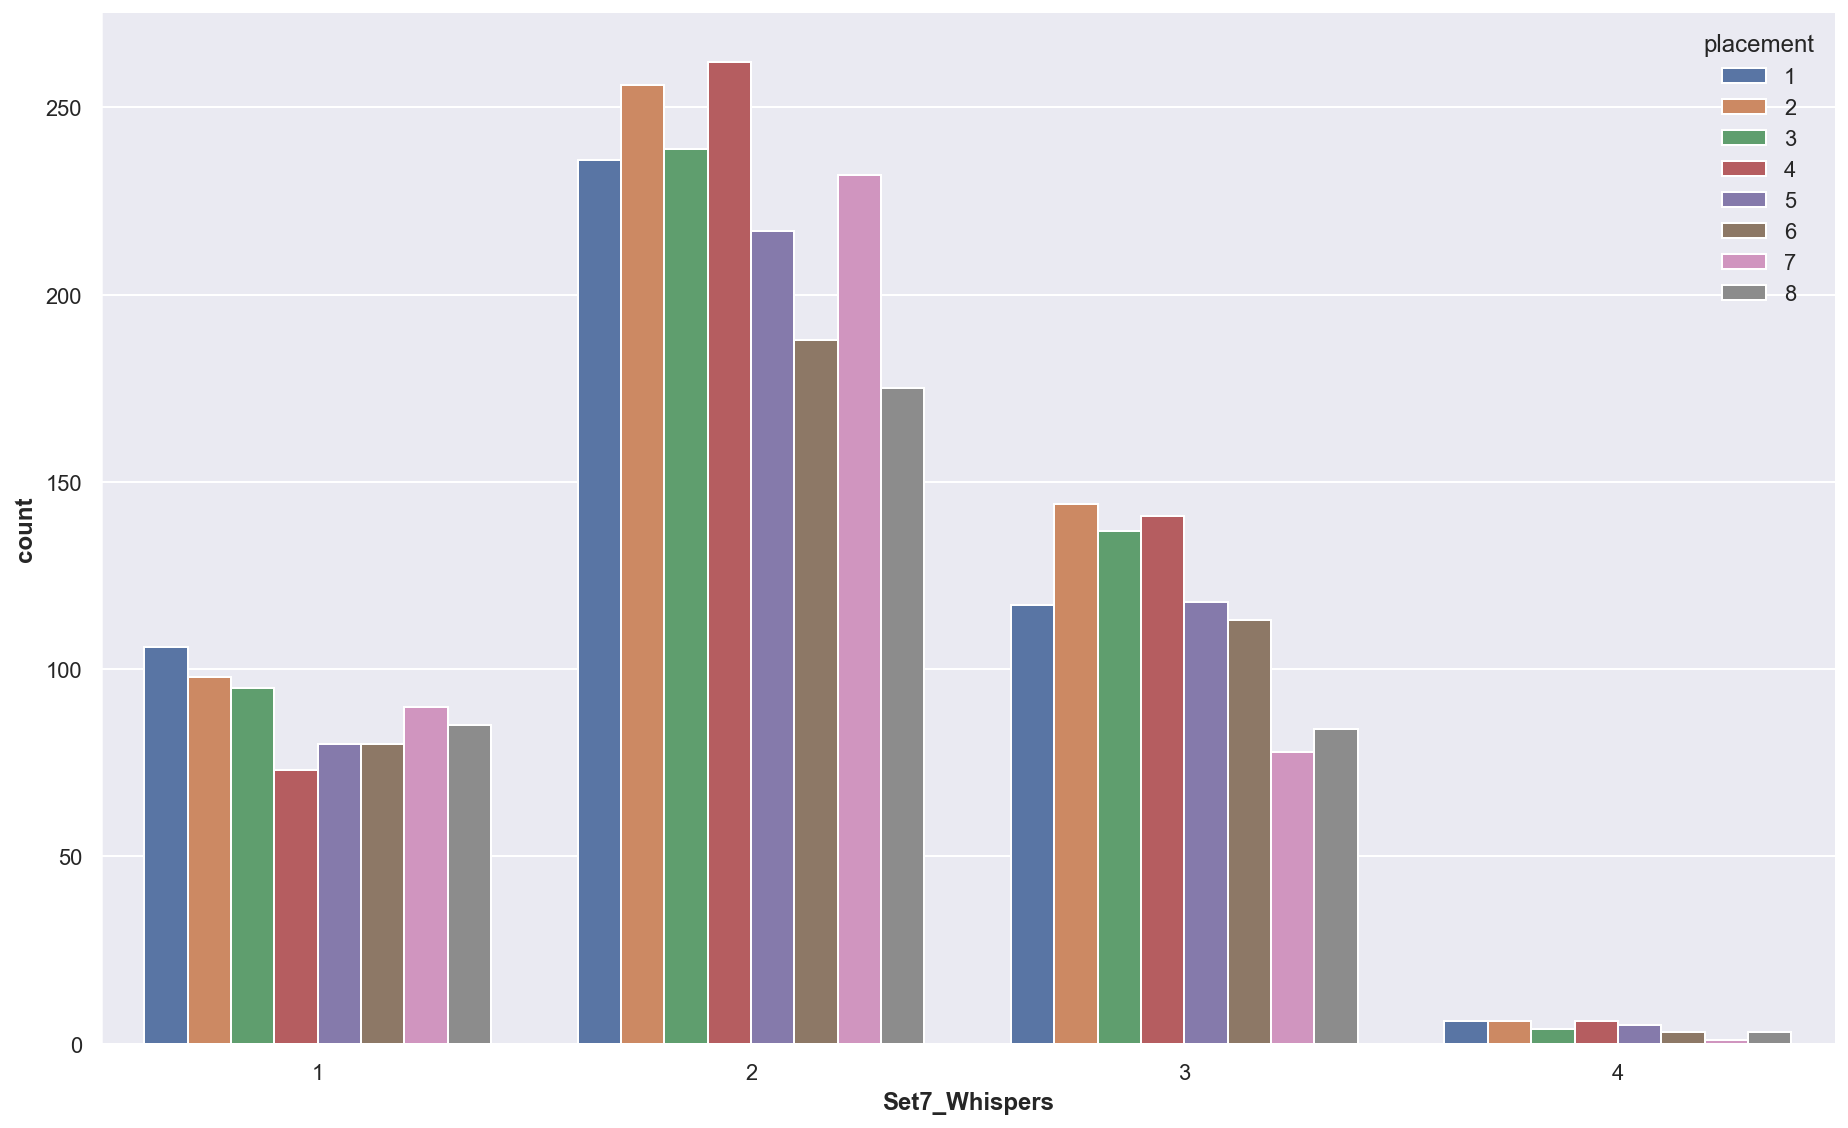

In [698]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Whispers']>0], x='Set7_Whispers', hue=TARGETNAME)
sns.despine()

## Units

Best unit in TFT Yasuo. DIESOFYASUO

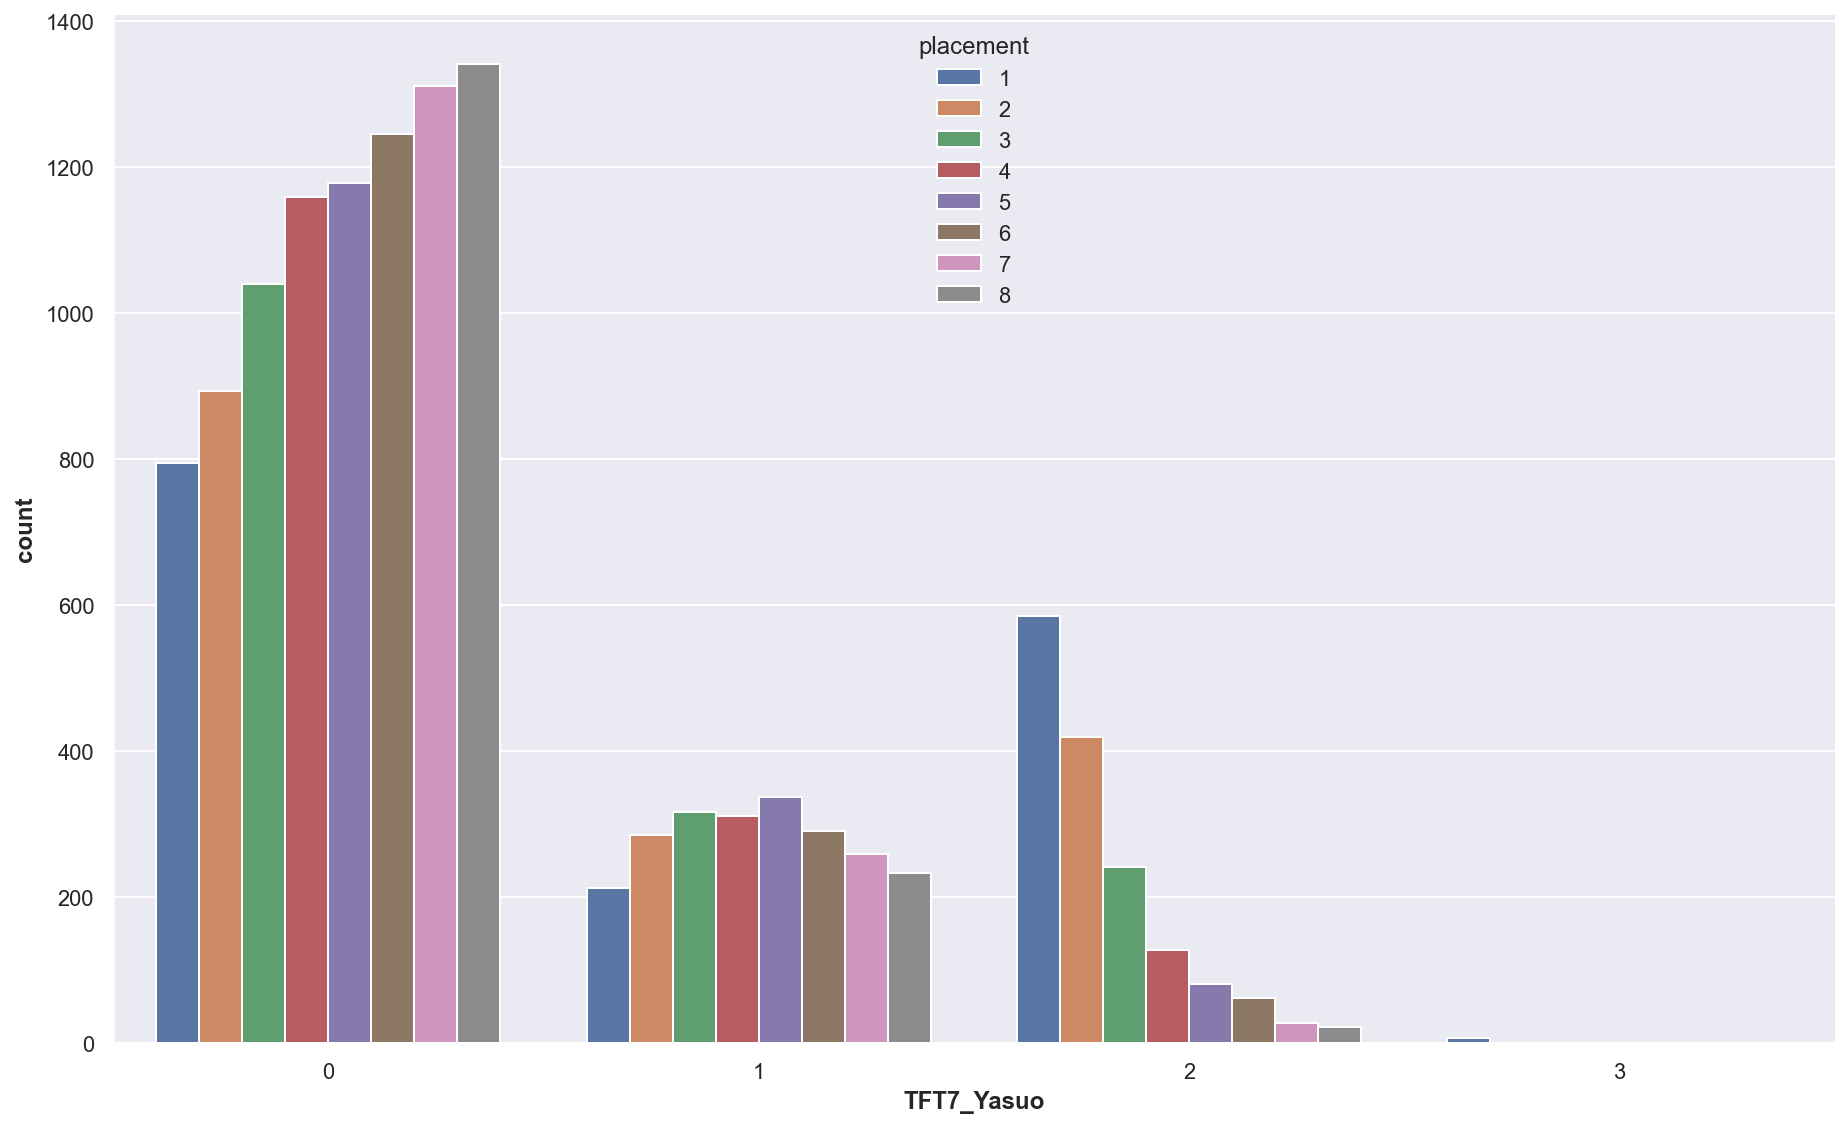

In [699]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Yasuo', hue=TARGETNAME)
sns.despine()

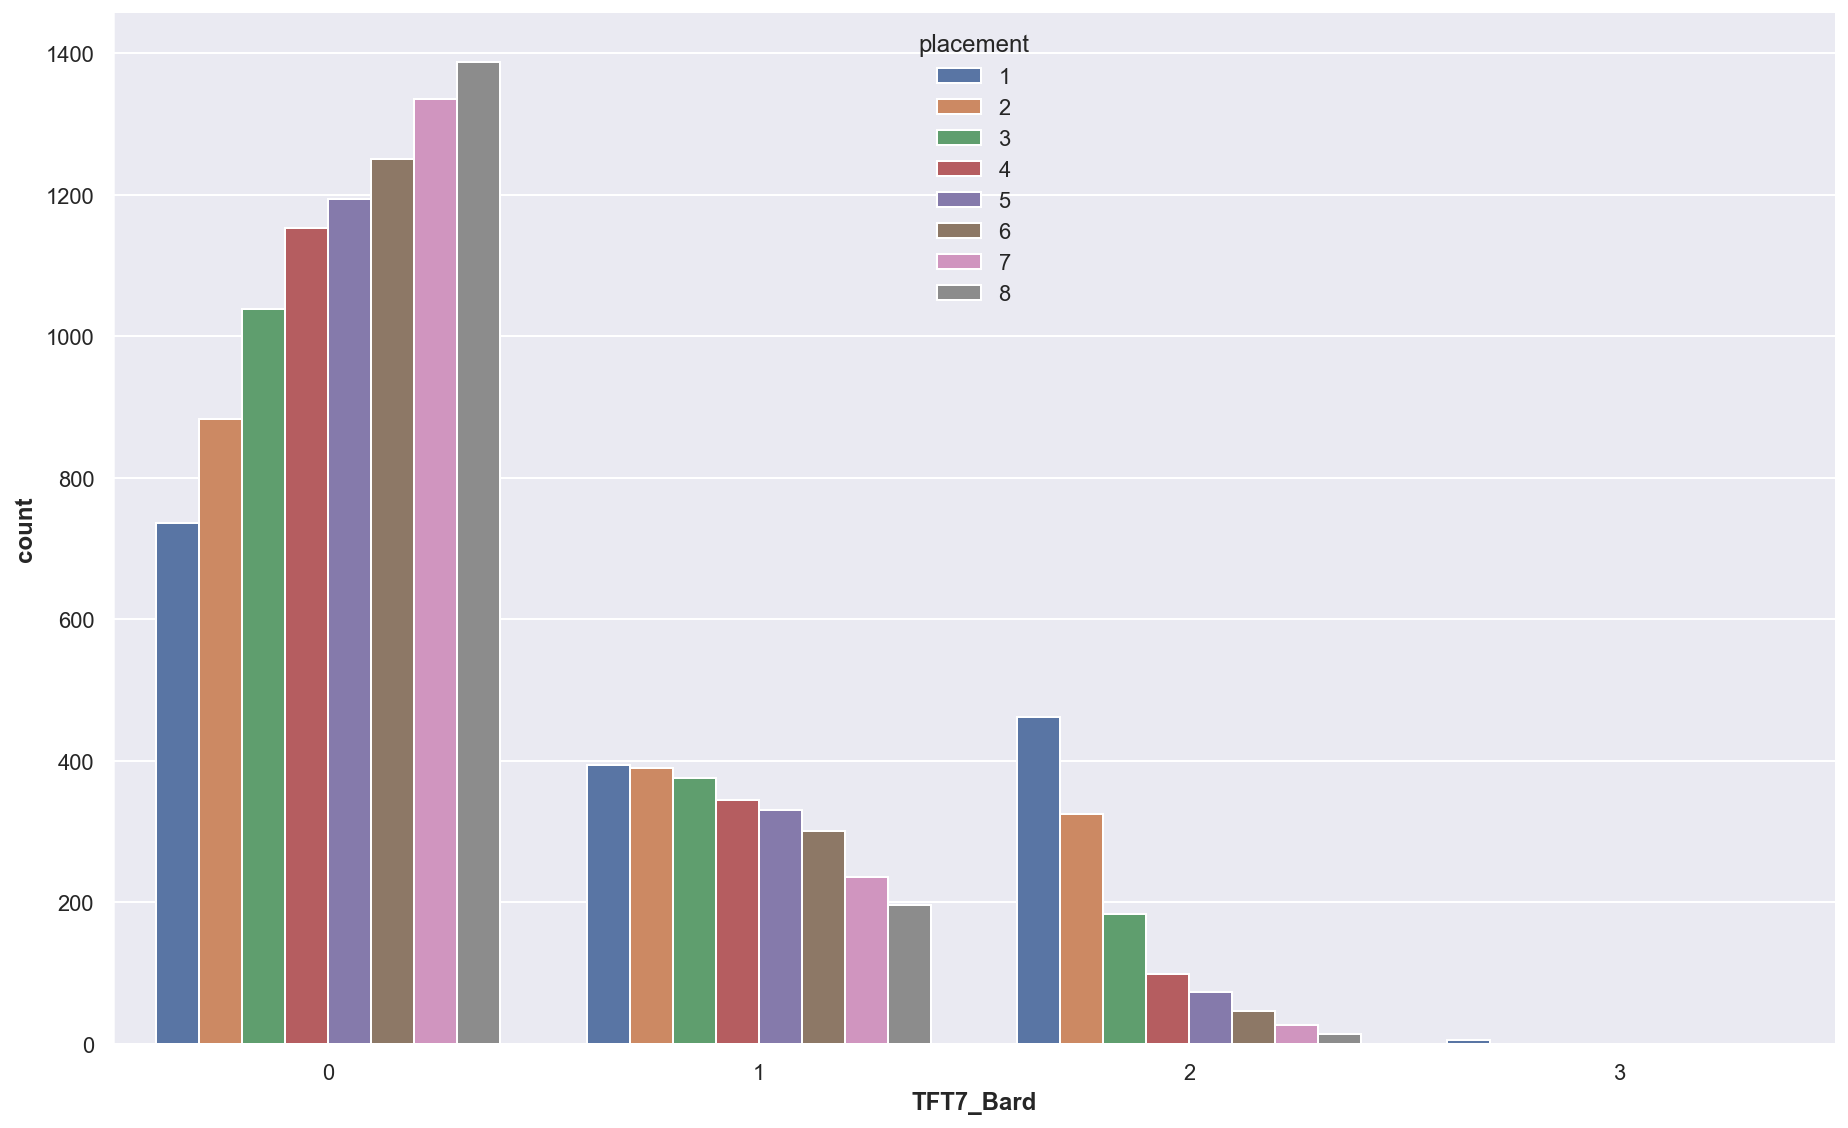

In [700]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Bard', hue=TARGETNAME)
sns.despine()

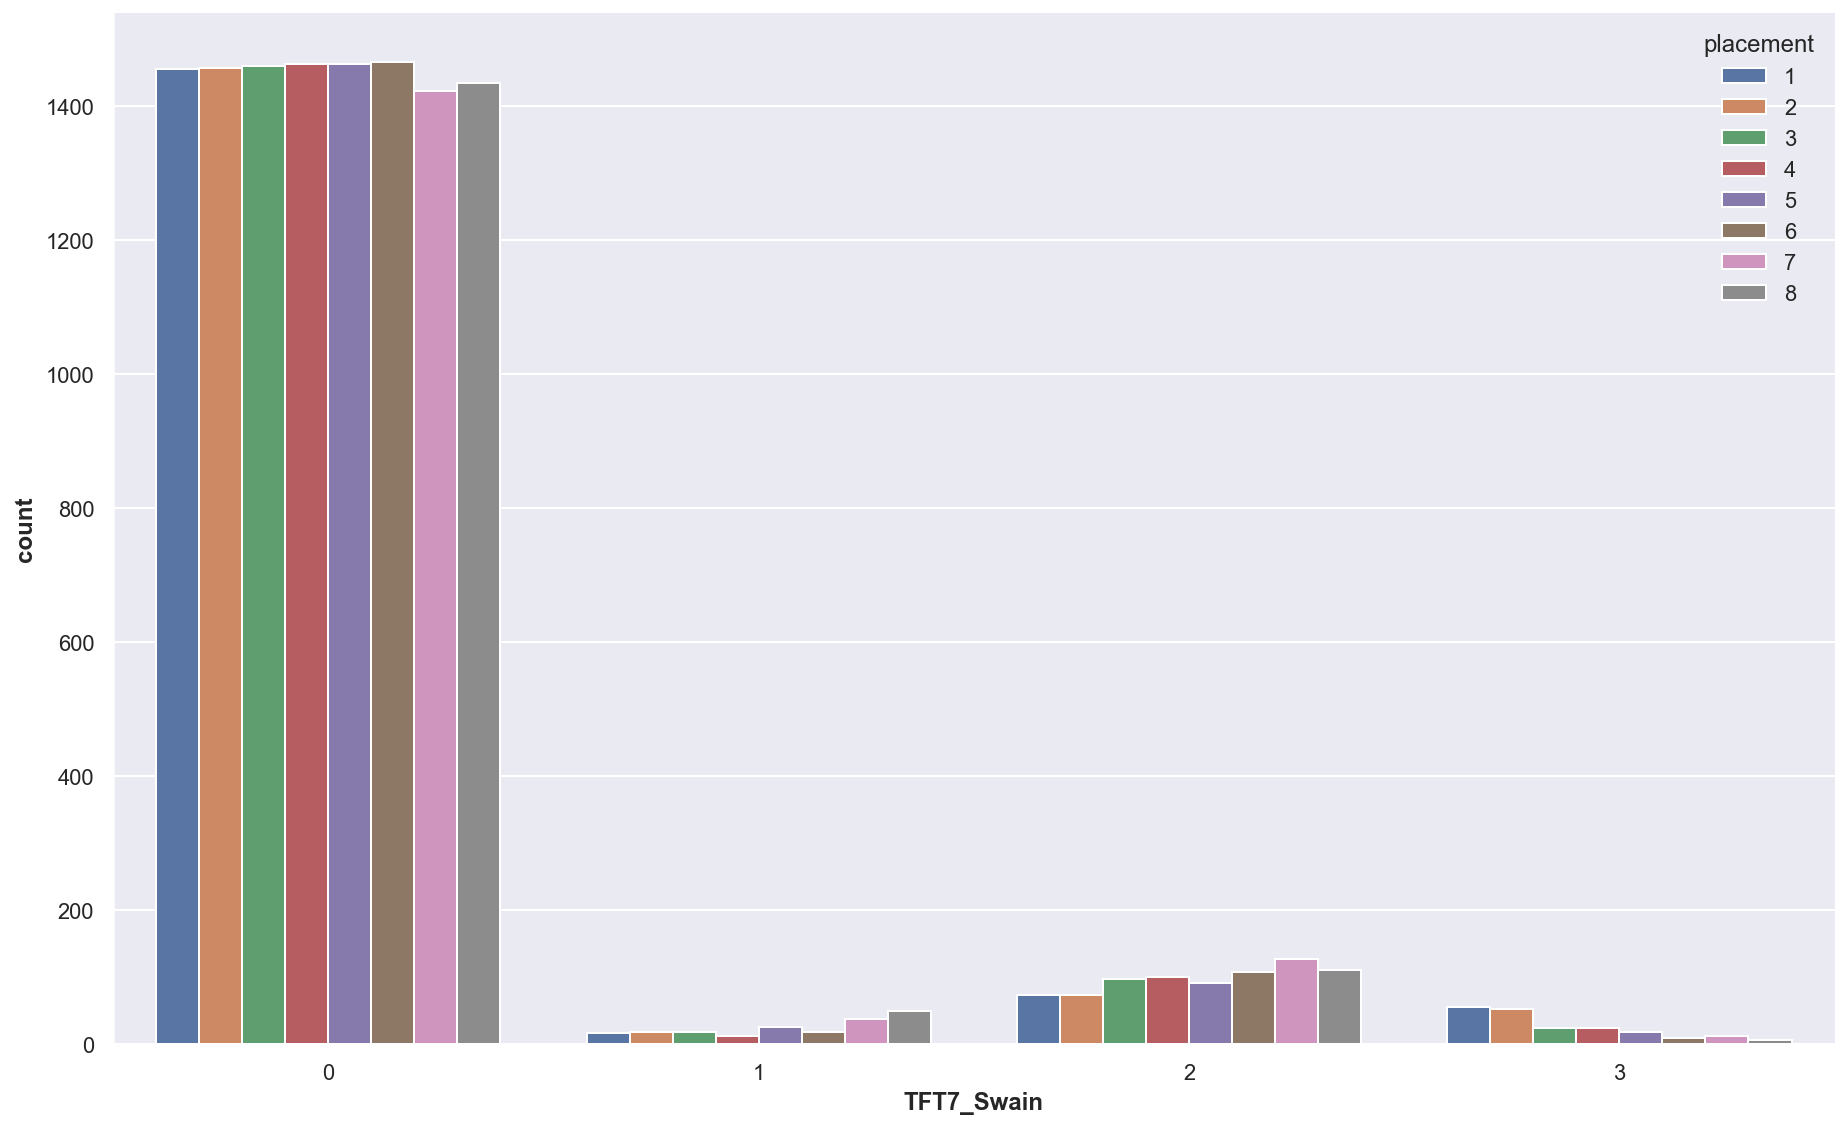

In [701]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Swain', hue=TARGETNAME)
sns.despine()

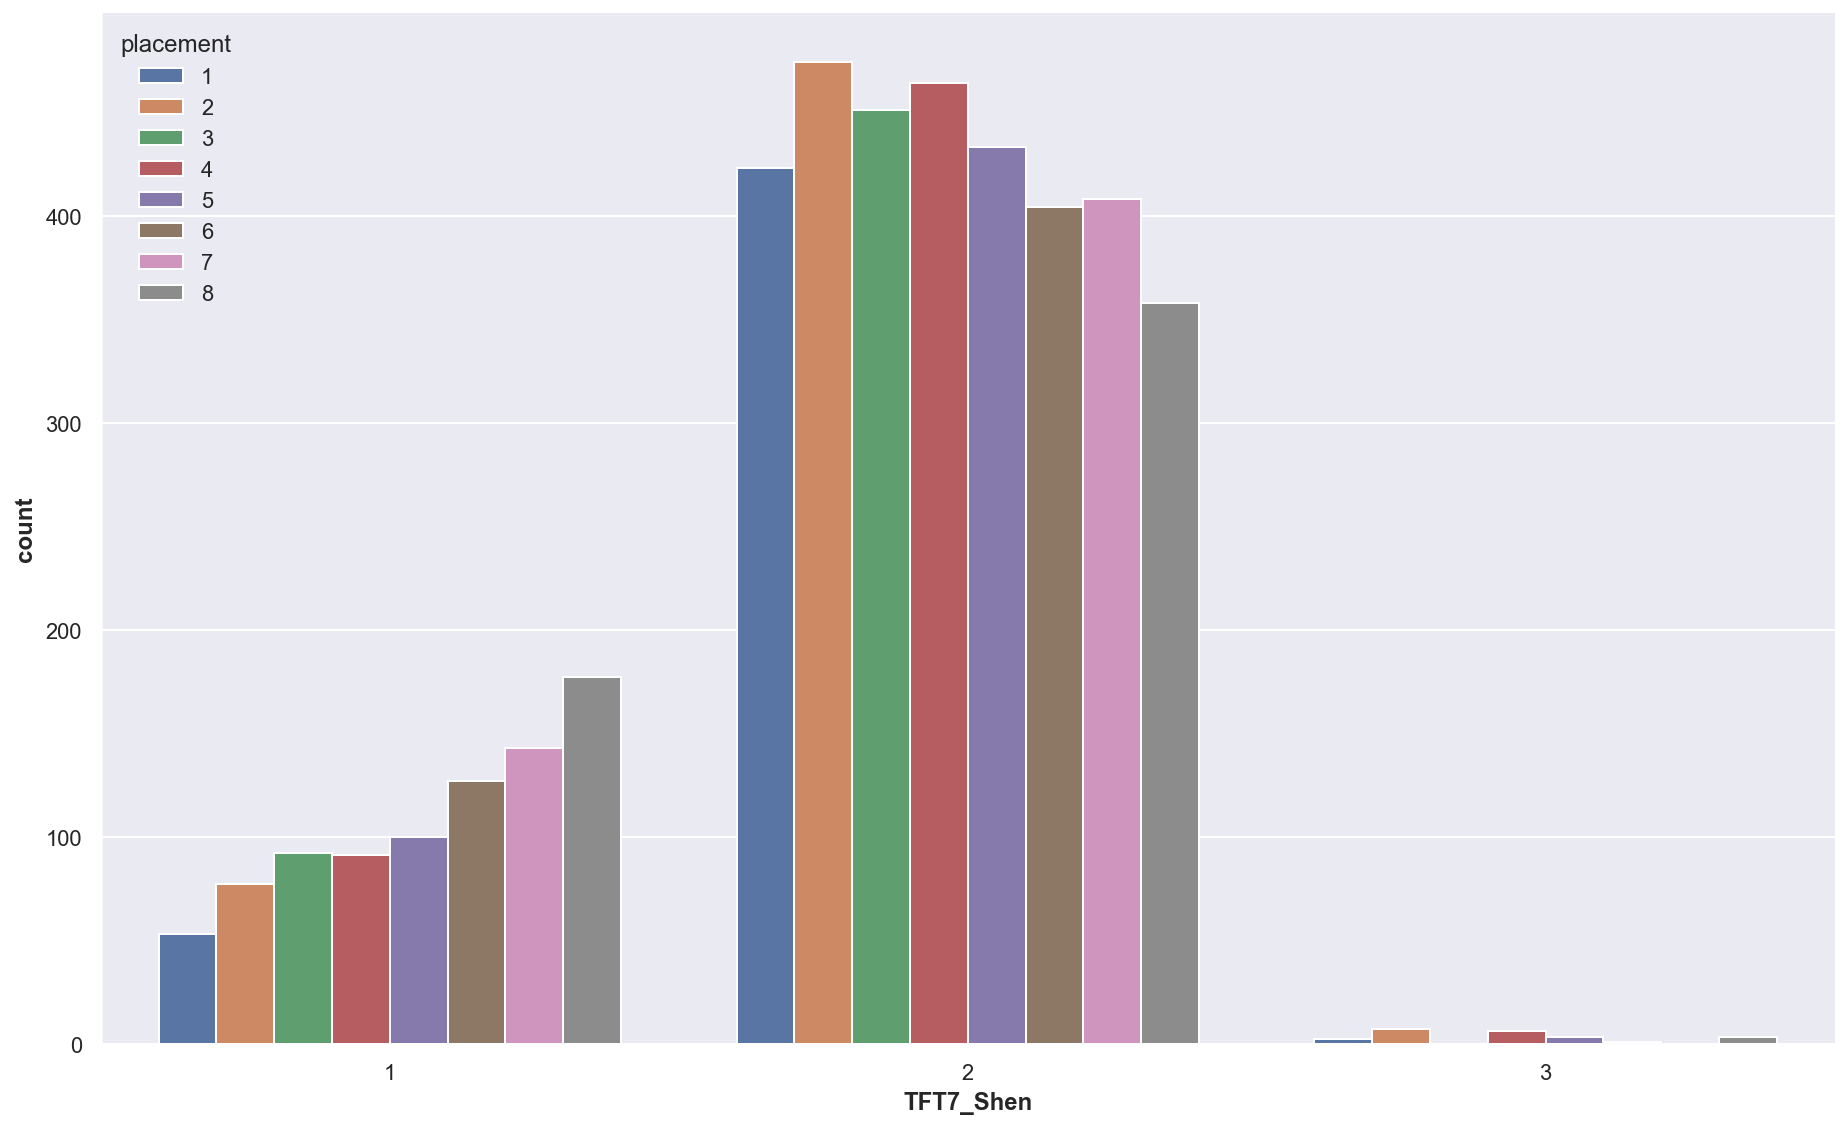

In [702]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shen']>0], x='TFT7_Shen', hue=TARGETNAME)
sns.despine()

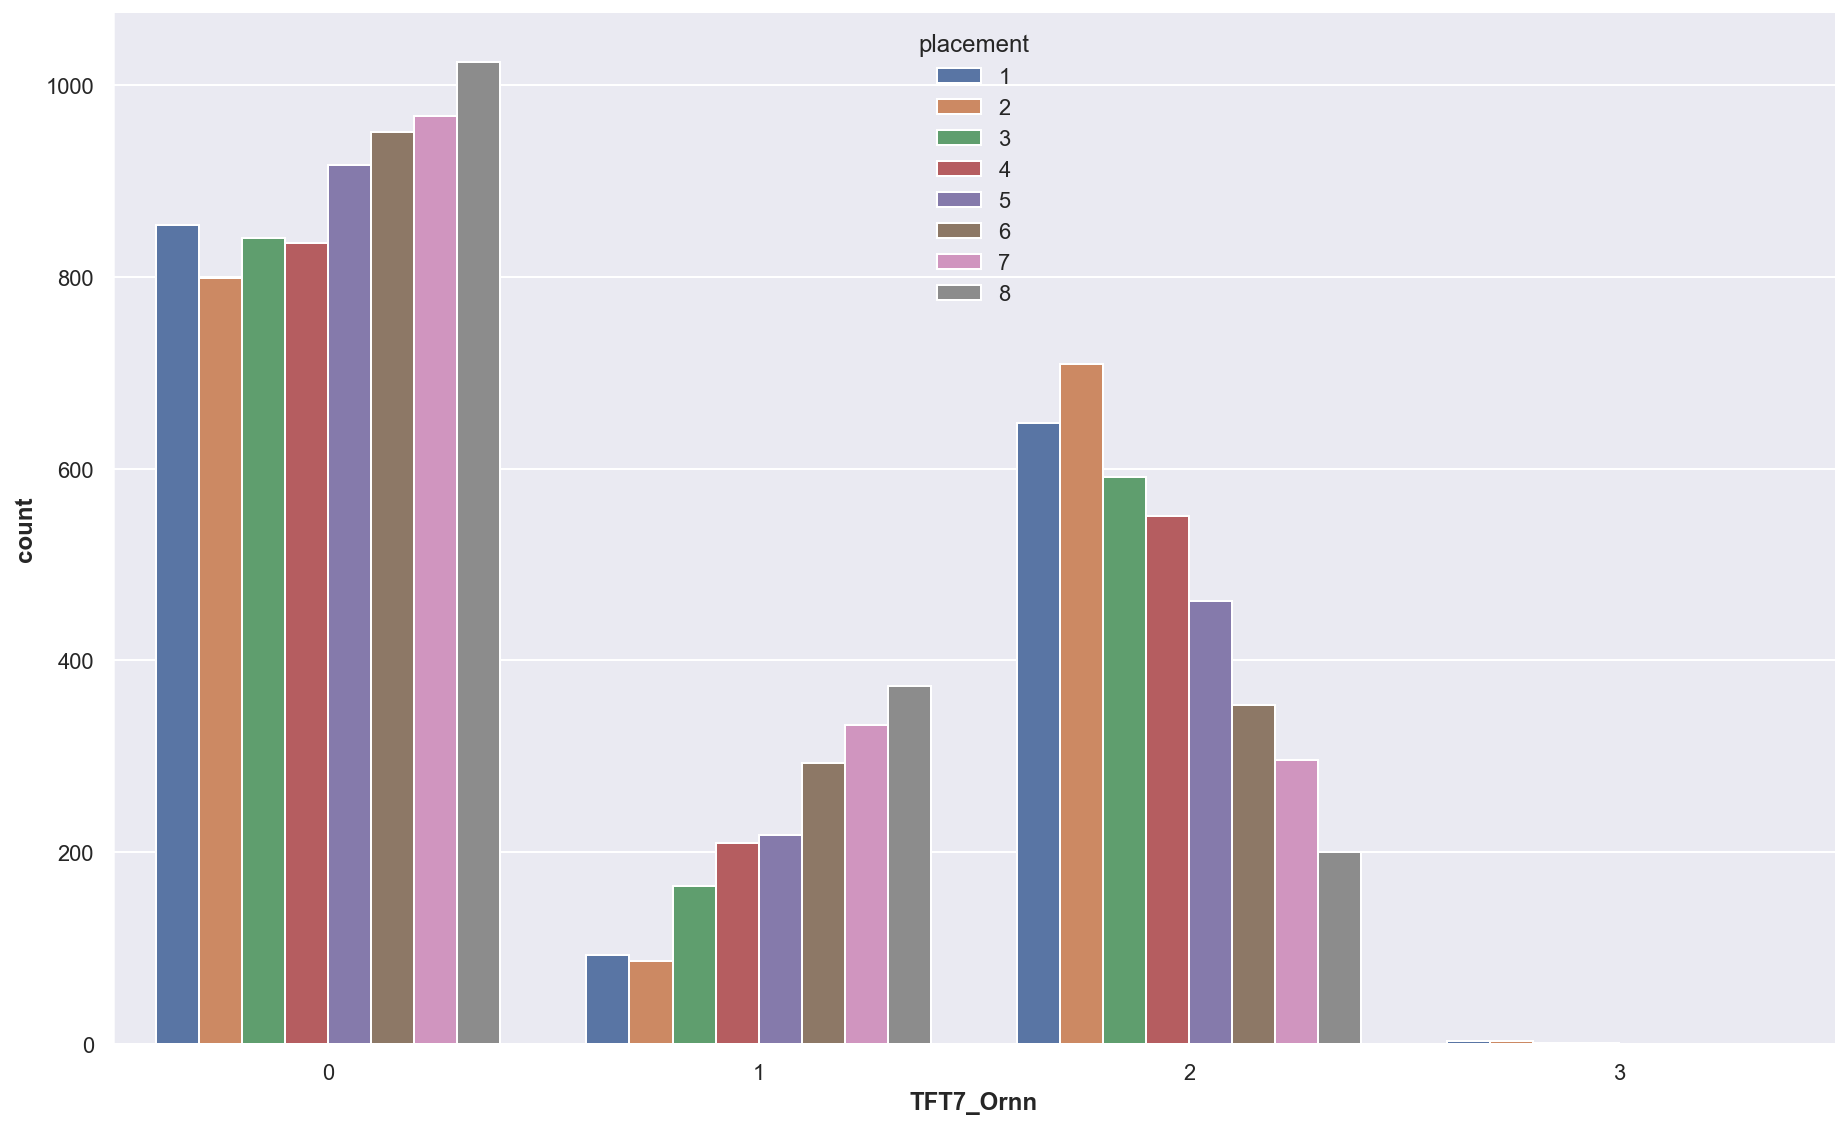

In [703]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ornn']>=0], x='TFT7_Ornn', hue=TARGETNAME)
sns.despine()

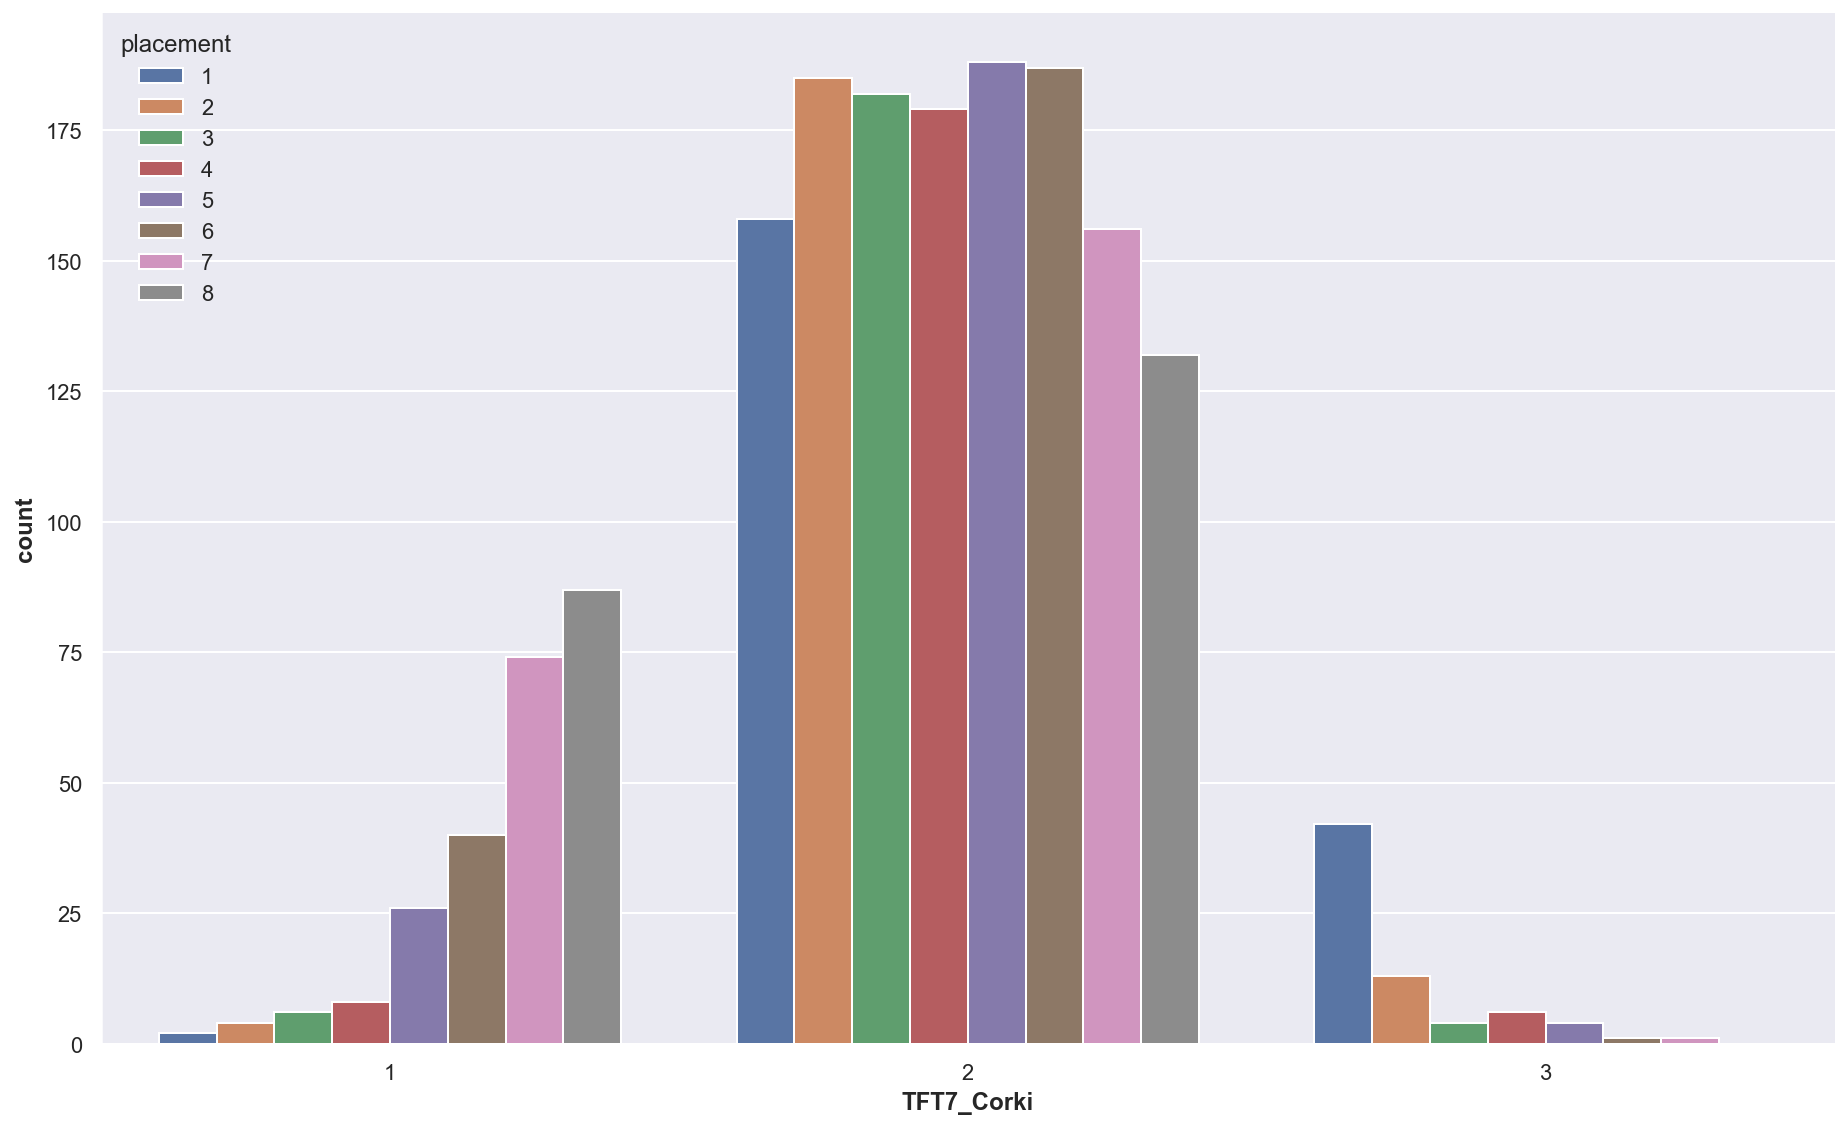

In [704]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Corki']>0], x='TFT7_Corki', hue=TARGETNAME)
sns.despine()

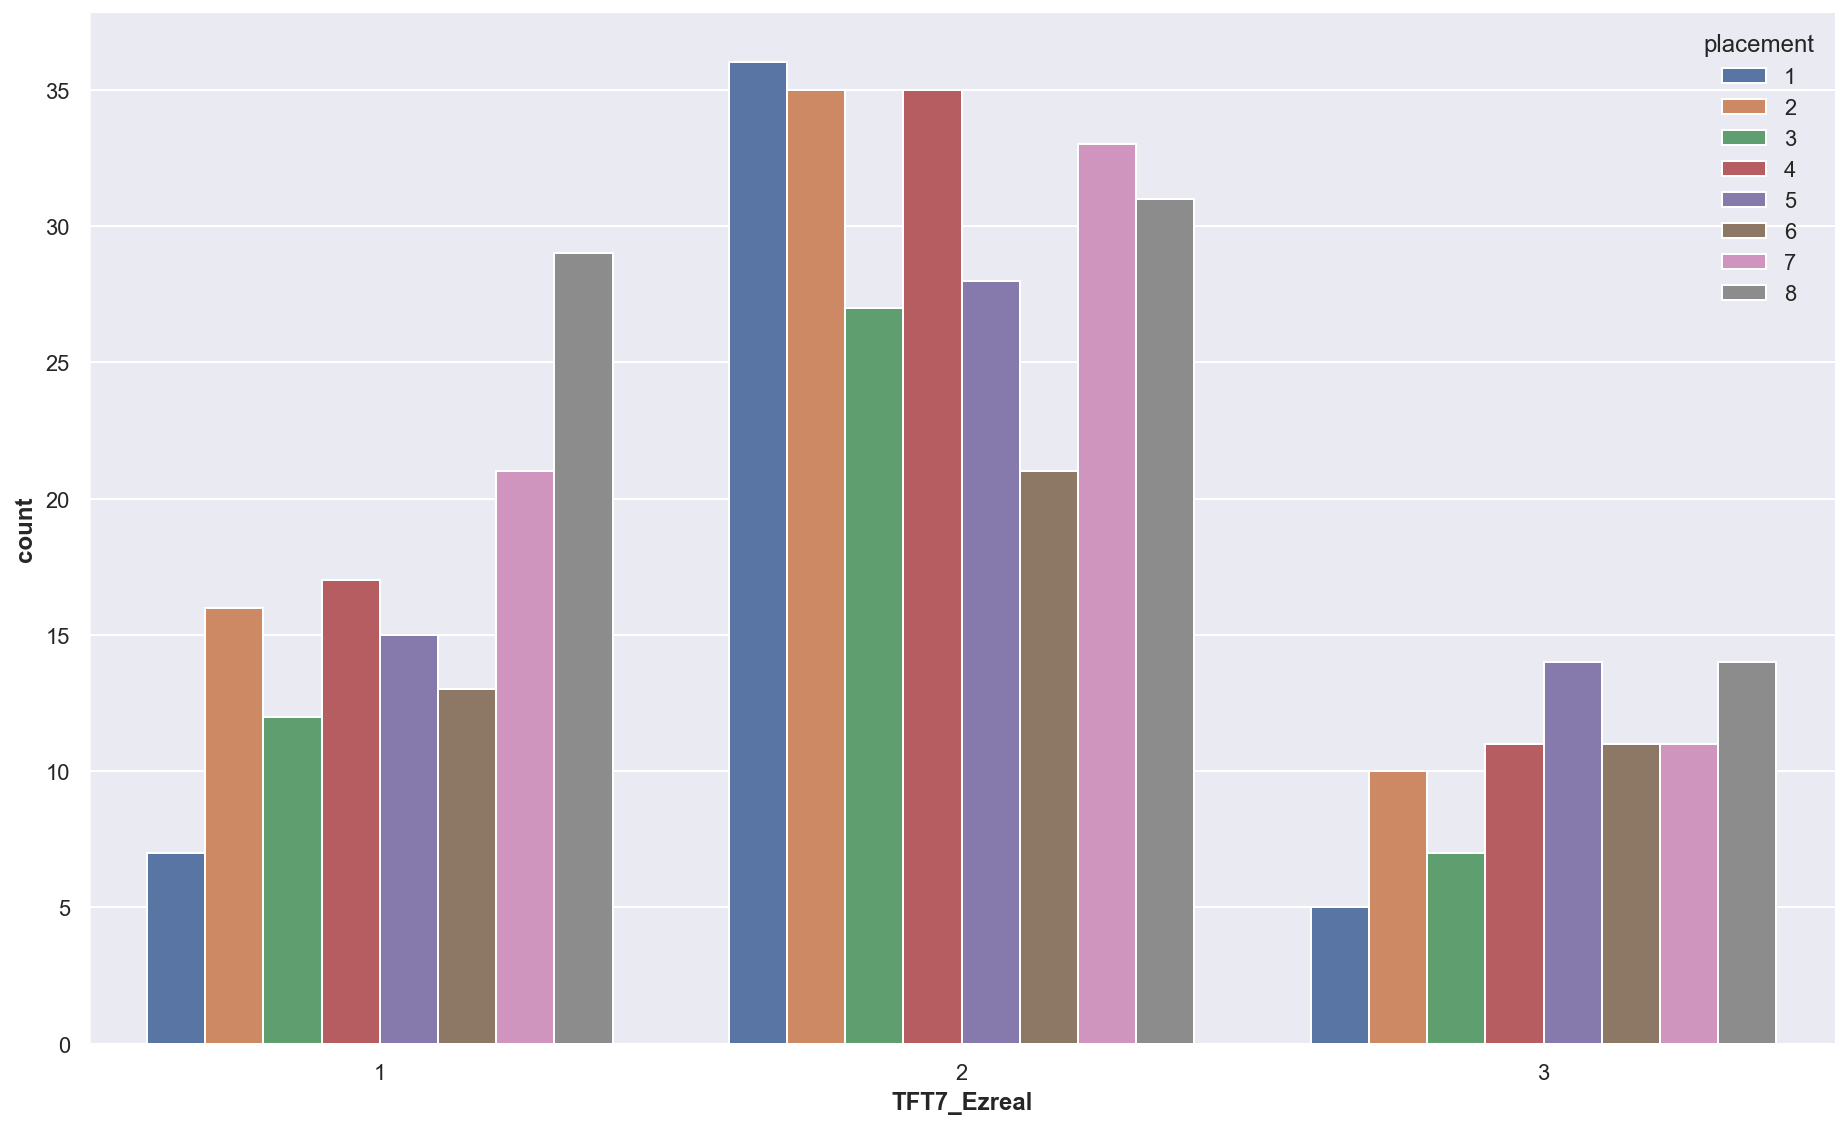

In [705]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ezreal']>0], x='TFT7_Ezreal', hue=TARGETNAME)
sns.despine()

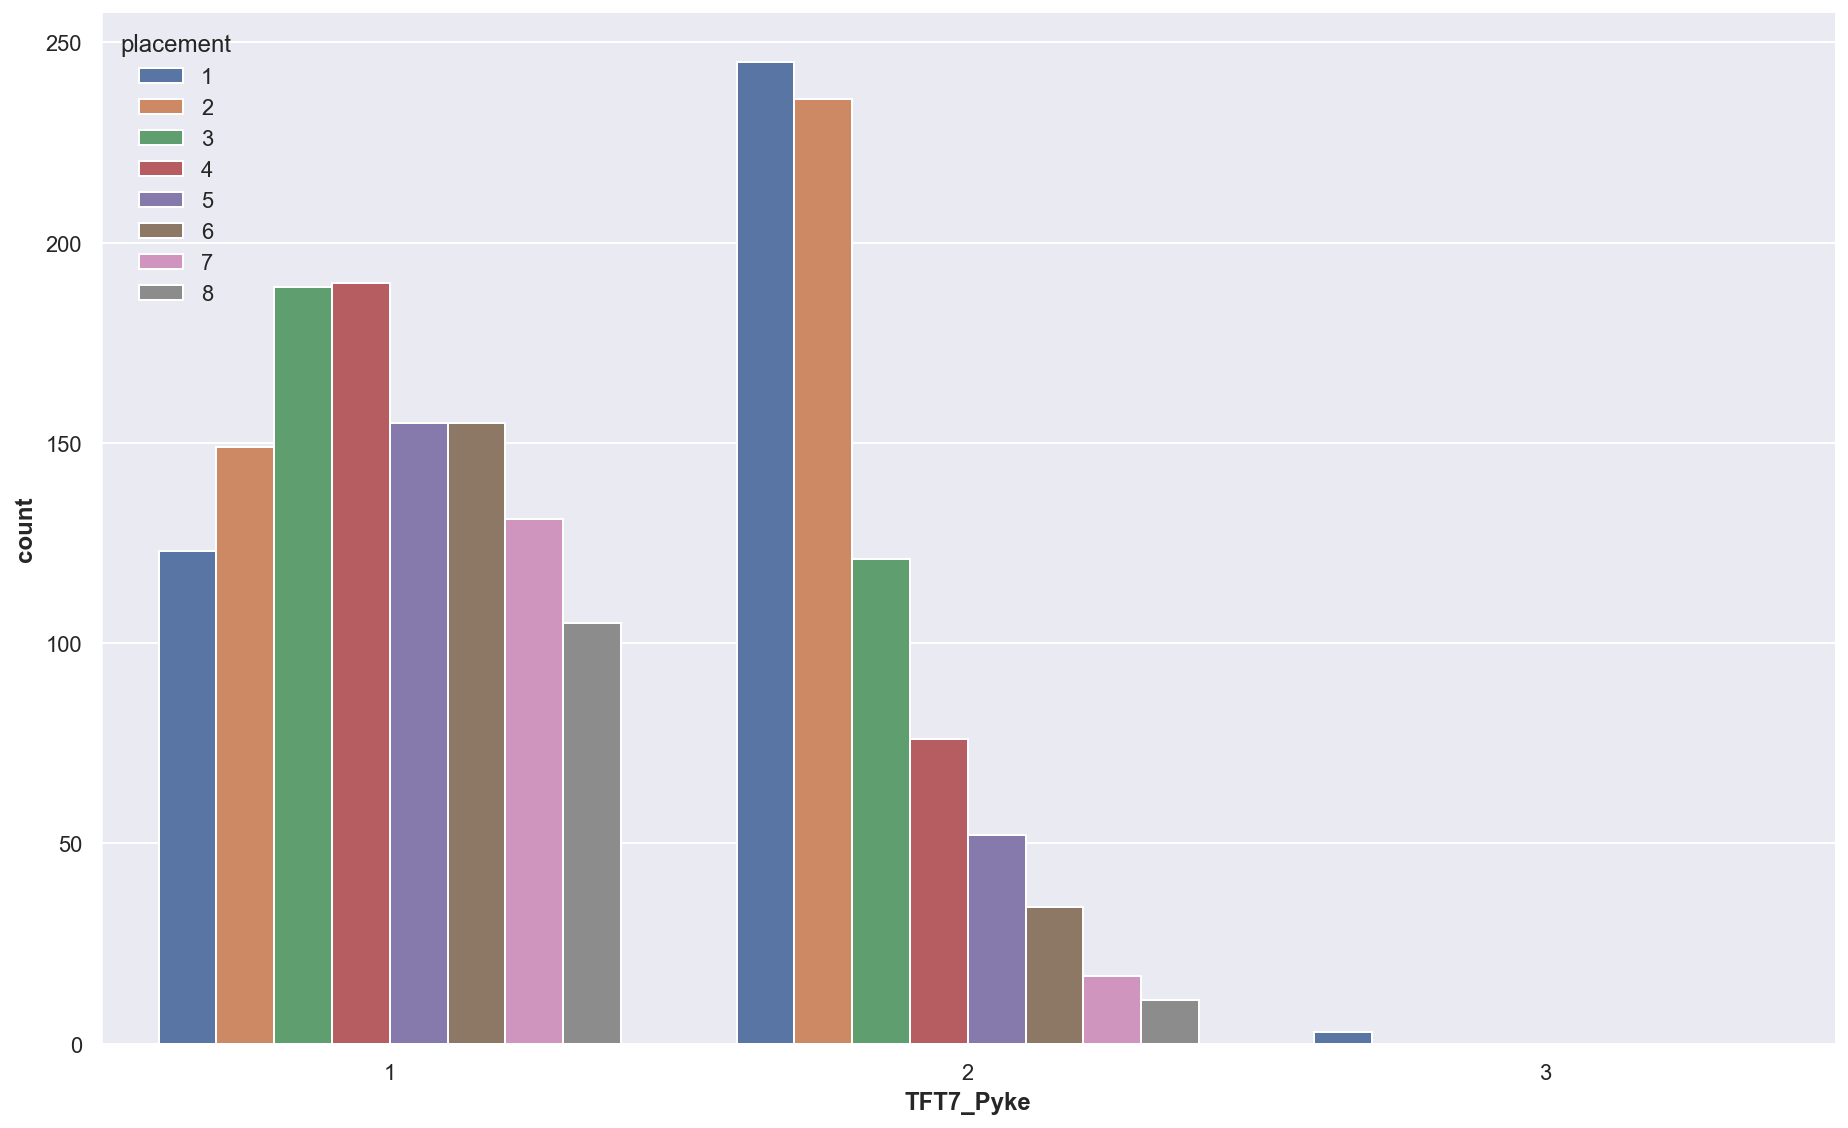

In [706]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Pyke']>0], x='TFT7_Pyke', hue=TARGETNAME)
sns.despine()

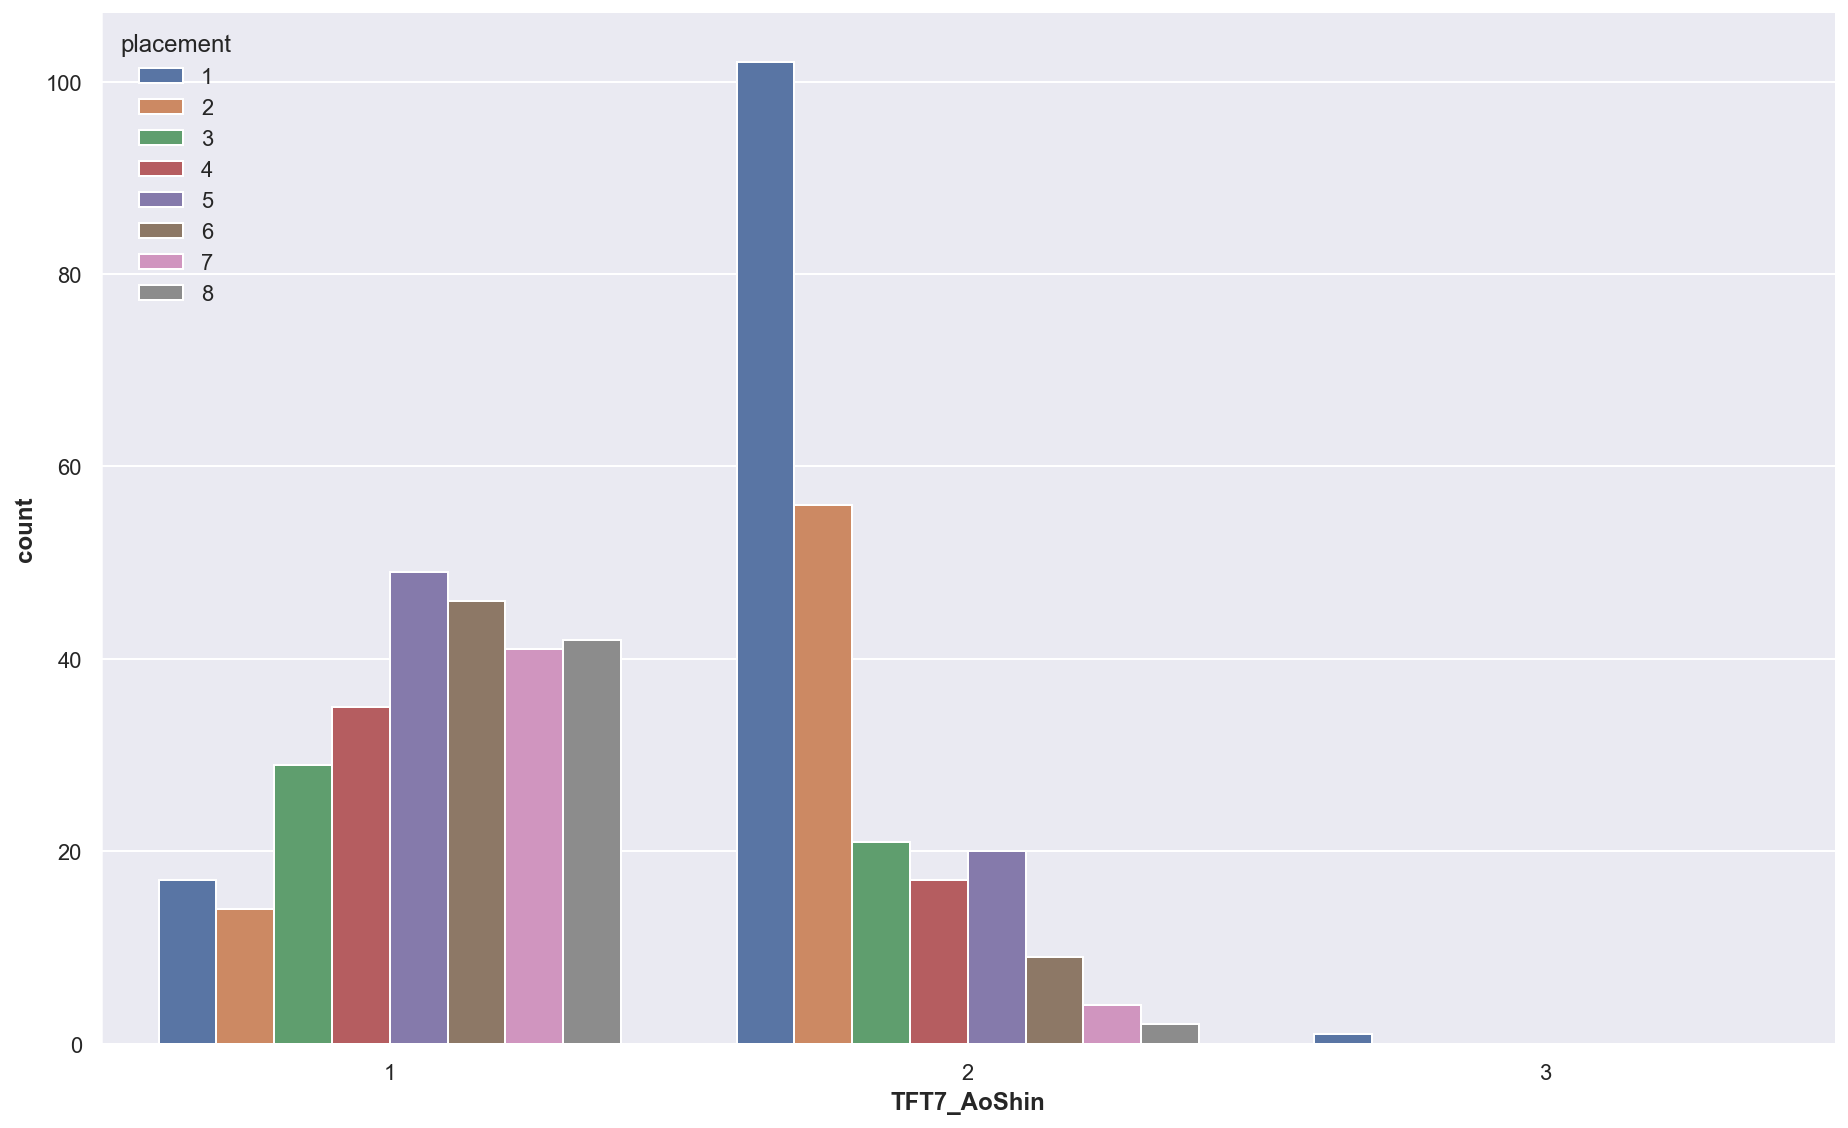

In [707]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_AoShin']>0], x='TFT7_AoShin', hue=TARGETNAME)
sns.despine()

Daeja.


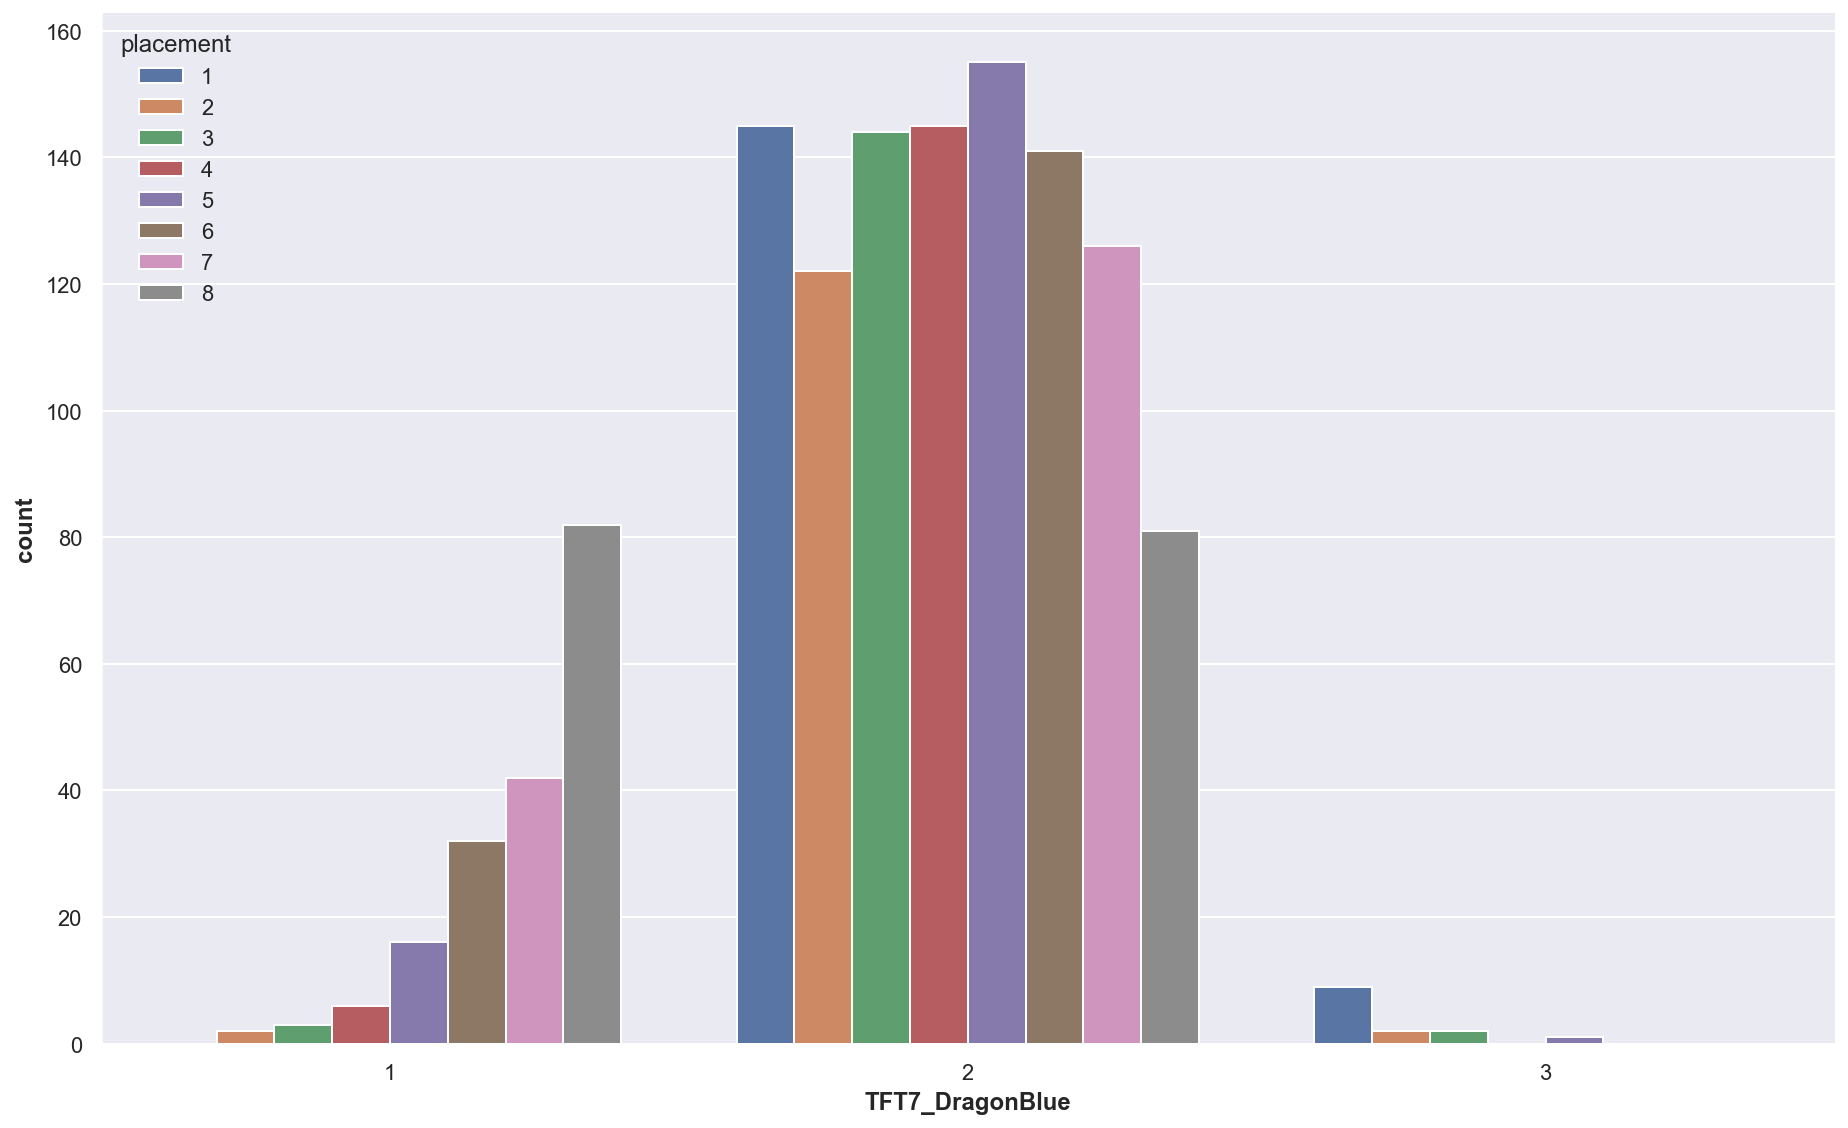

In [708]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonBlue']>0], x='TFT7_DragonBlue', hue=TARGETNAME)
sns.despine()

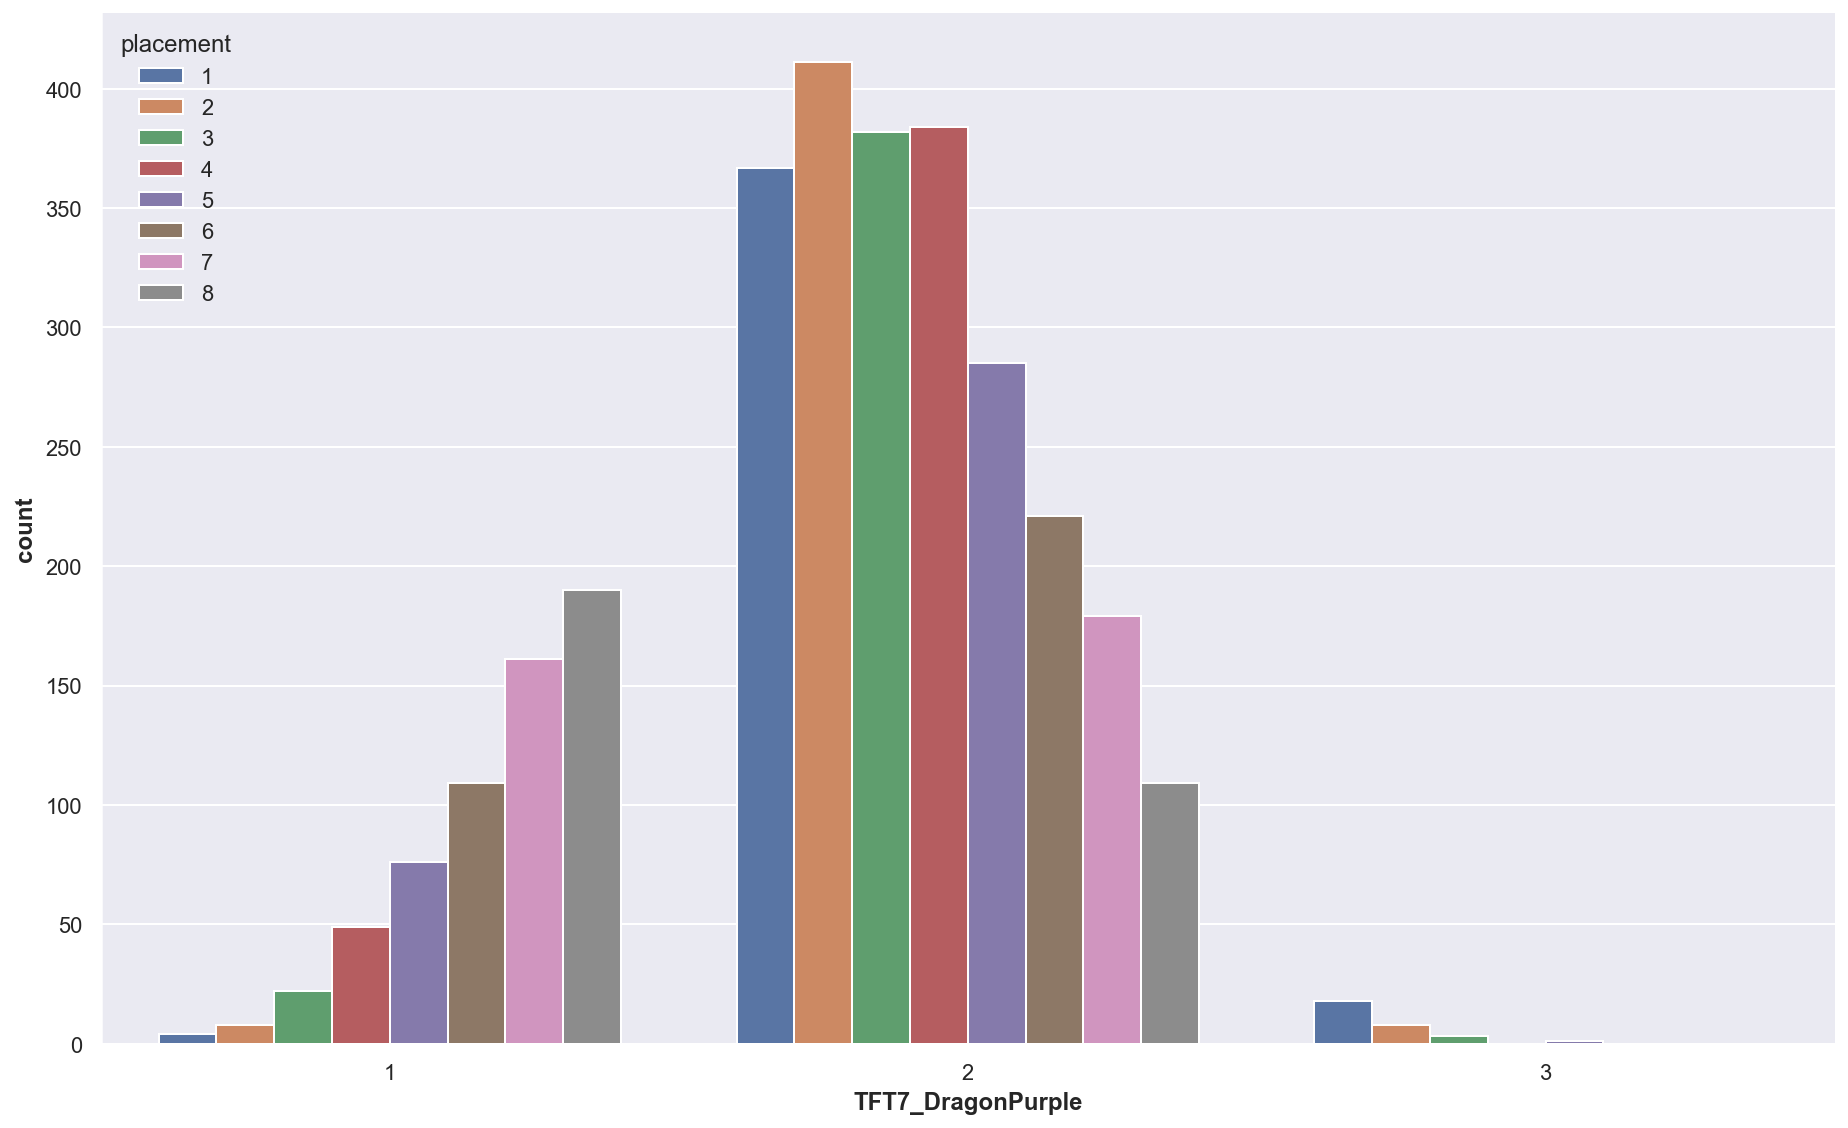

In [709]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonPurple']>0], x='TFT7_DragonPurple', hue=TARGETNAME)
sns.despine()

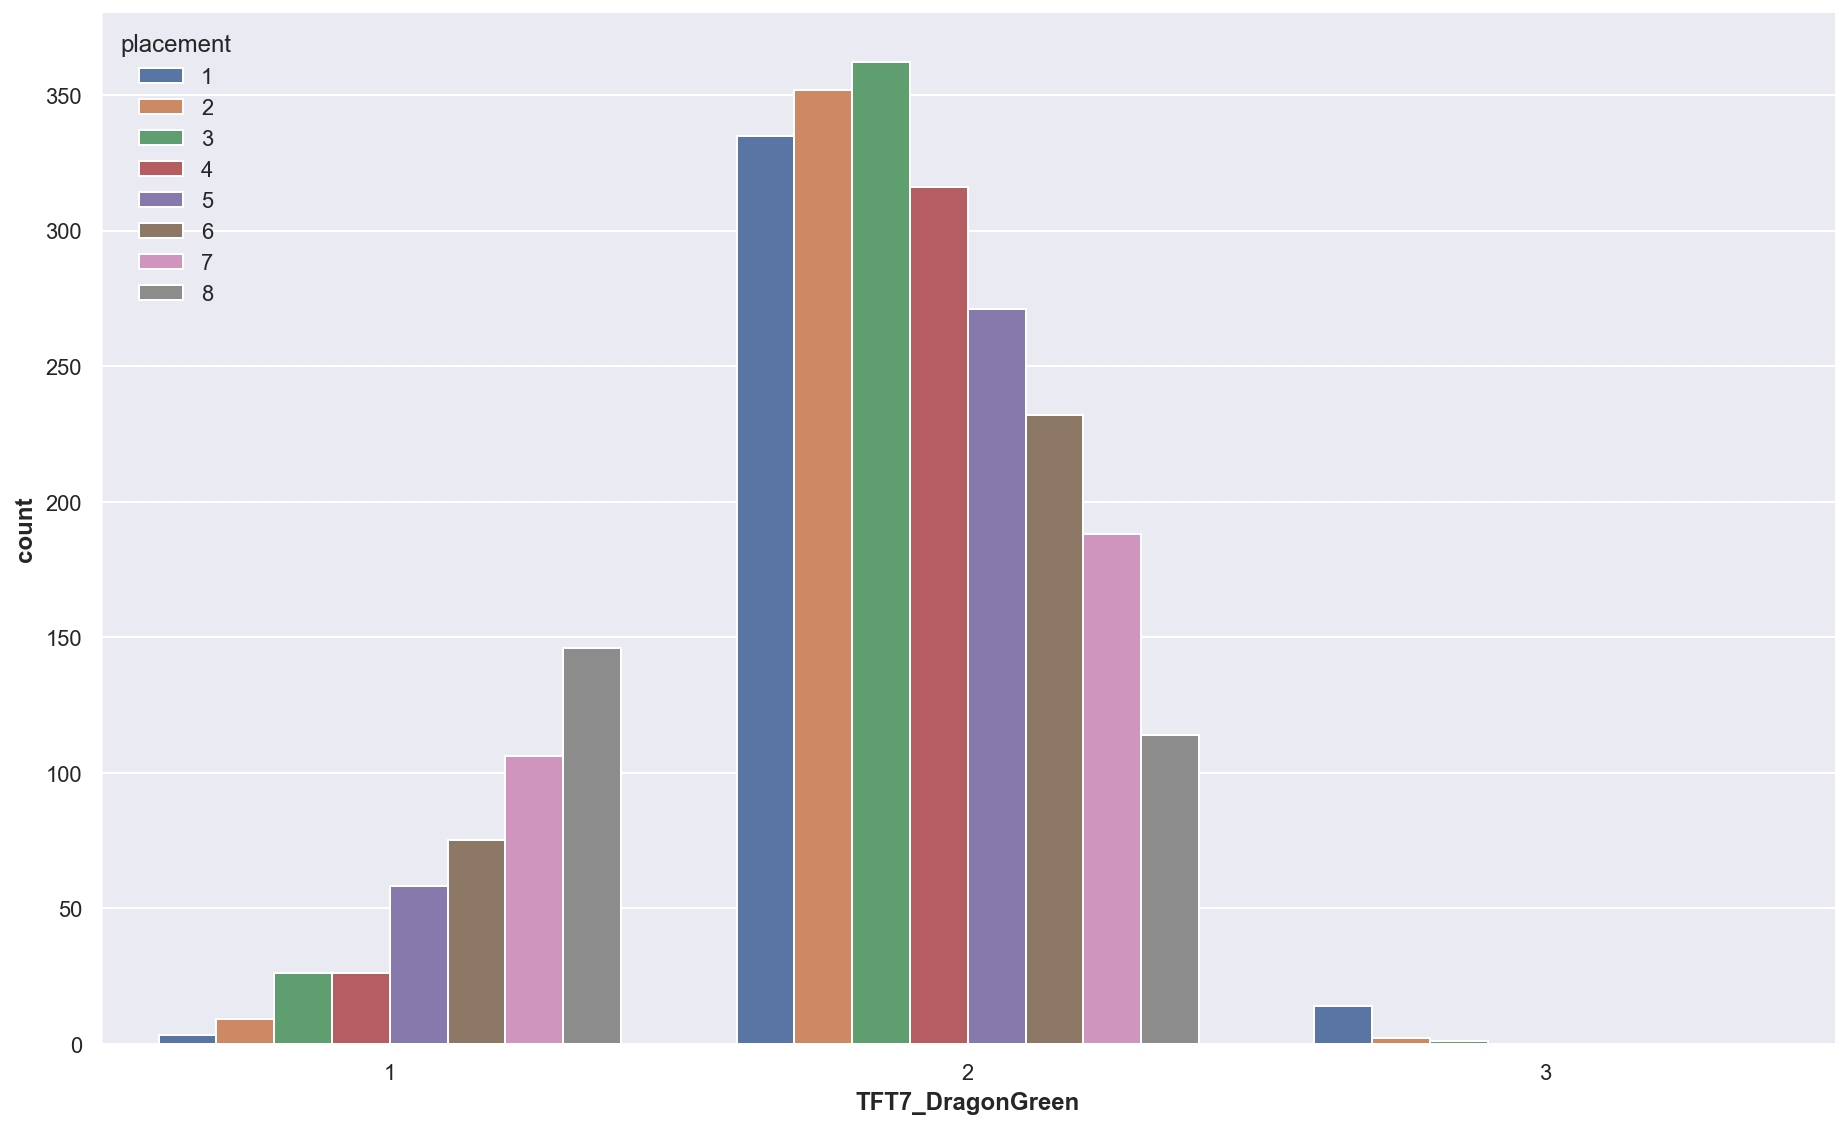

In [710]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGreen']>0], x='TFT7_DragonGreen', hue=TARGETNAME)
sns.despine()

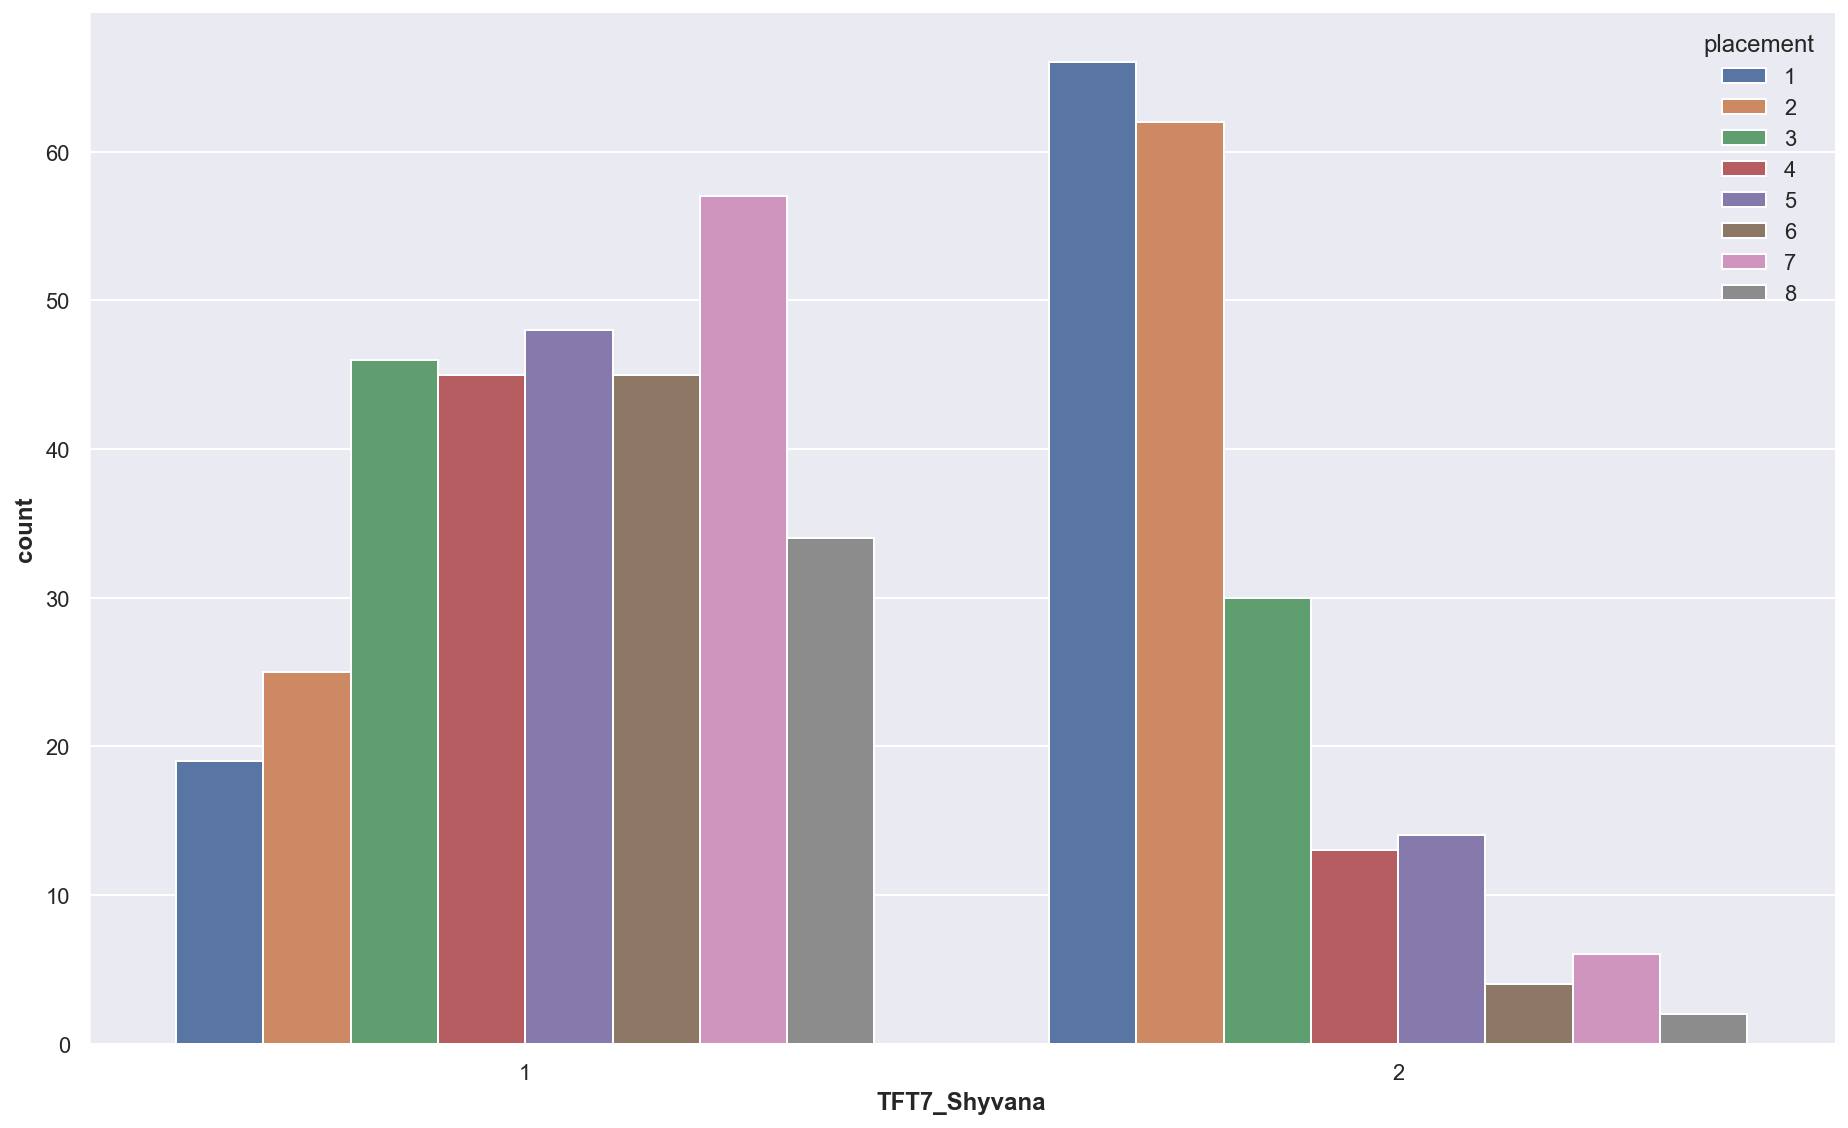

In [711]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shyvana']>0], x='TFT7_Shyvana', hue=TARGETNAME)
sns.despine()

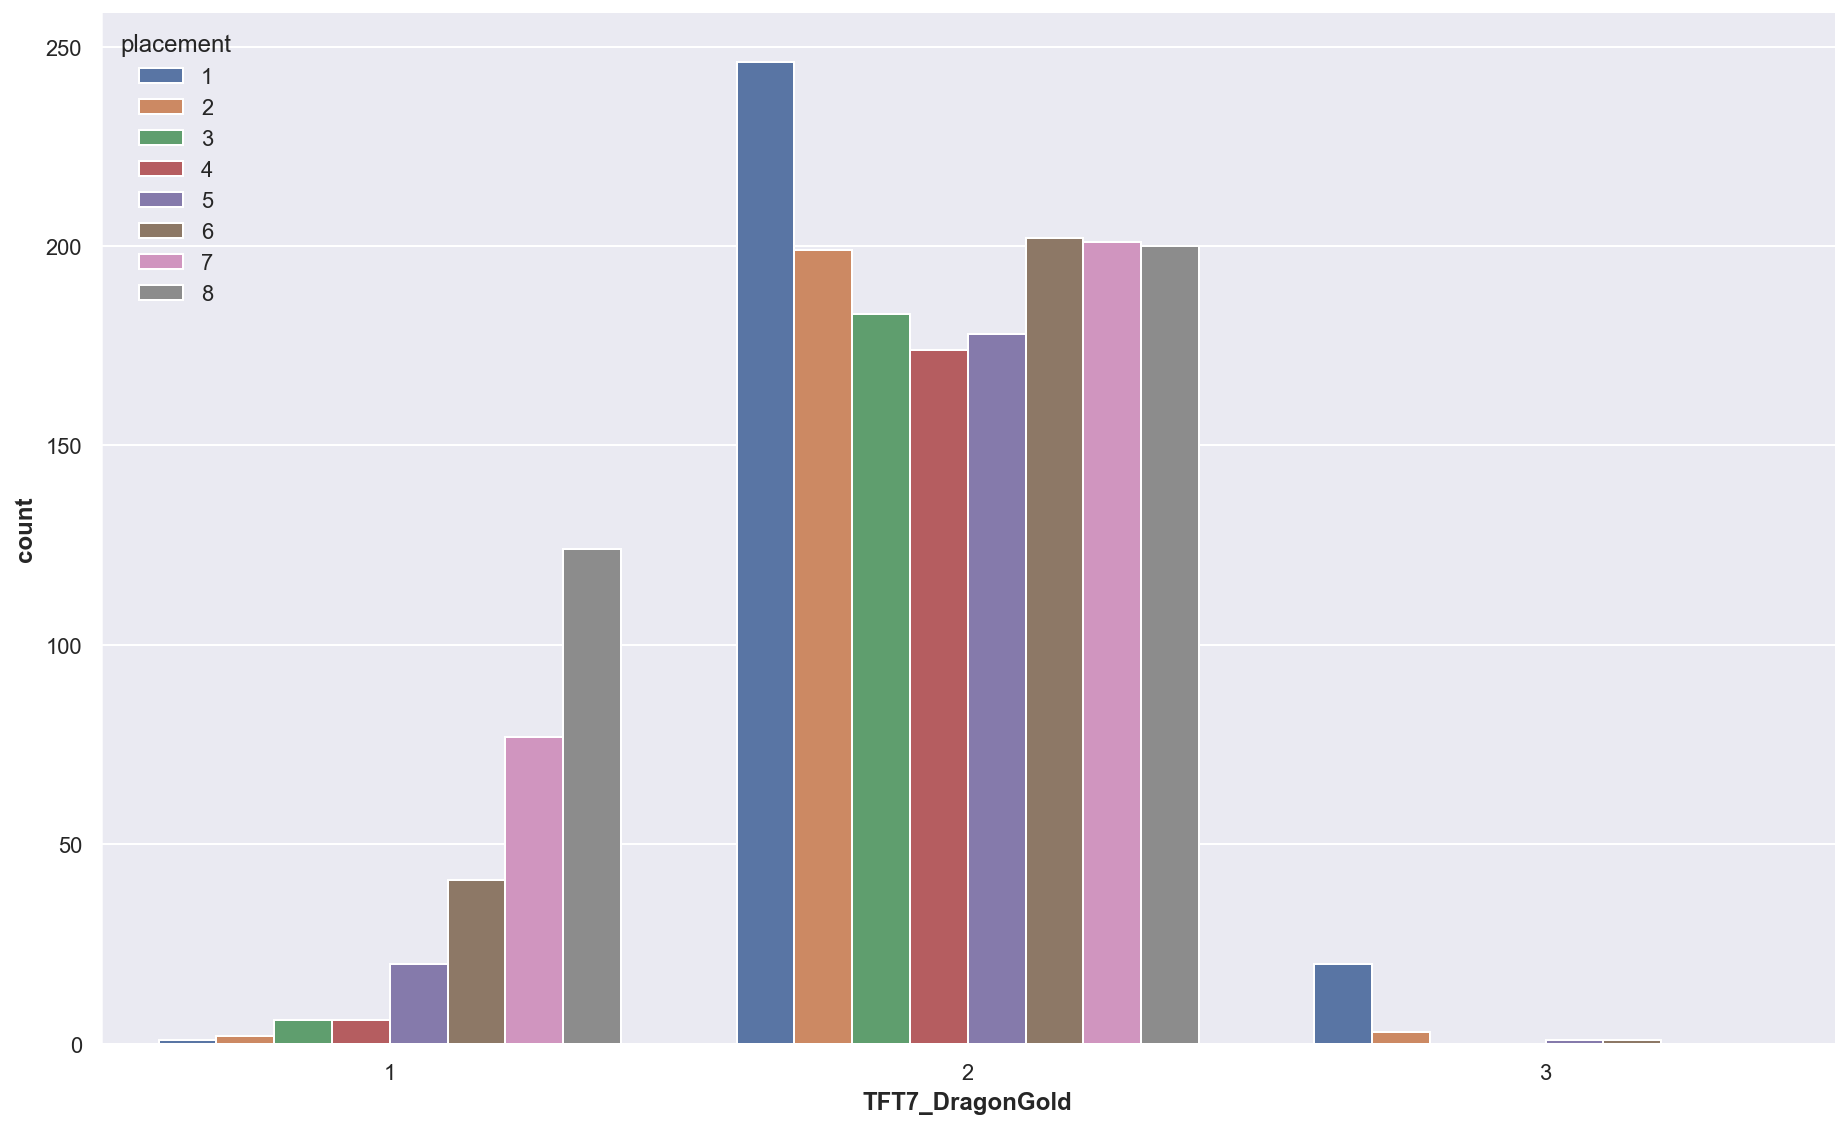

In [712]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGold']>0], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Nomsy best dragon at tier 4.

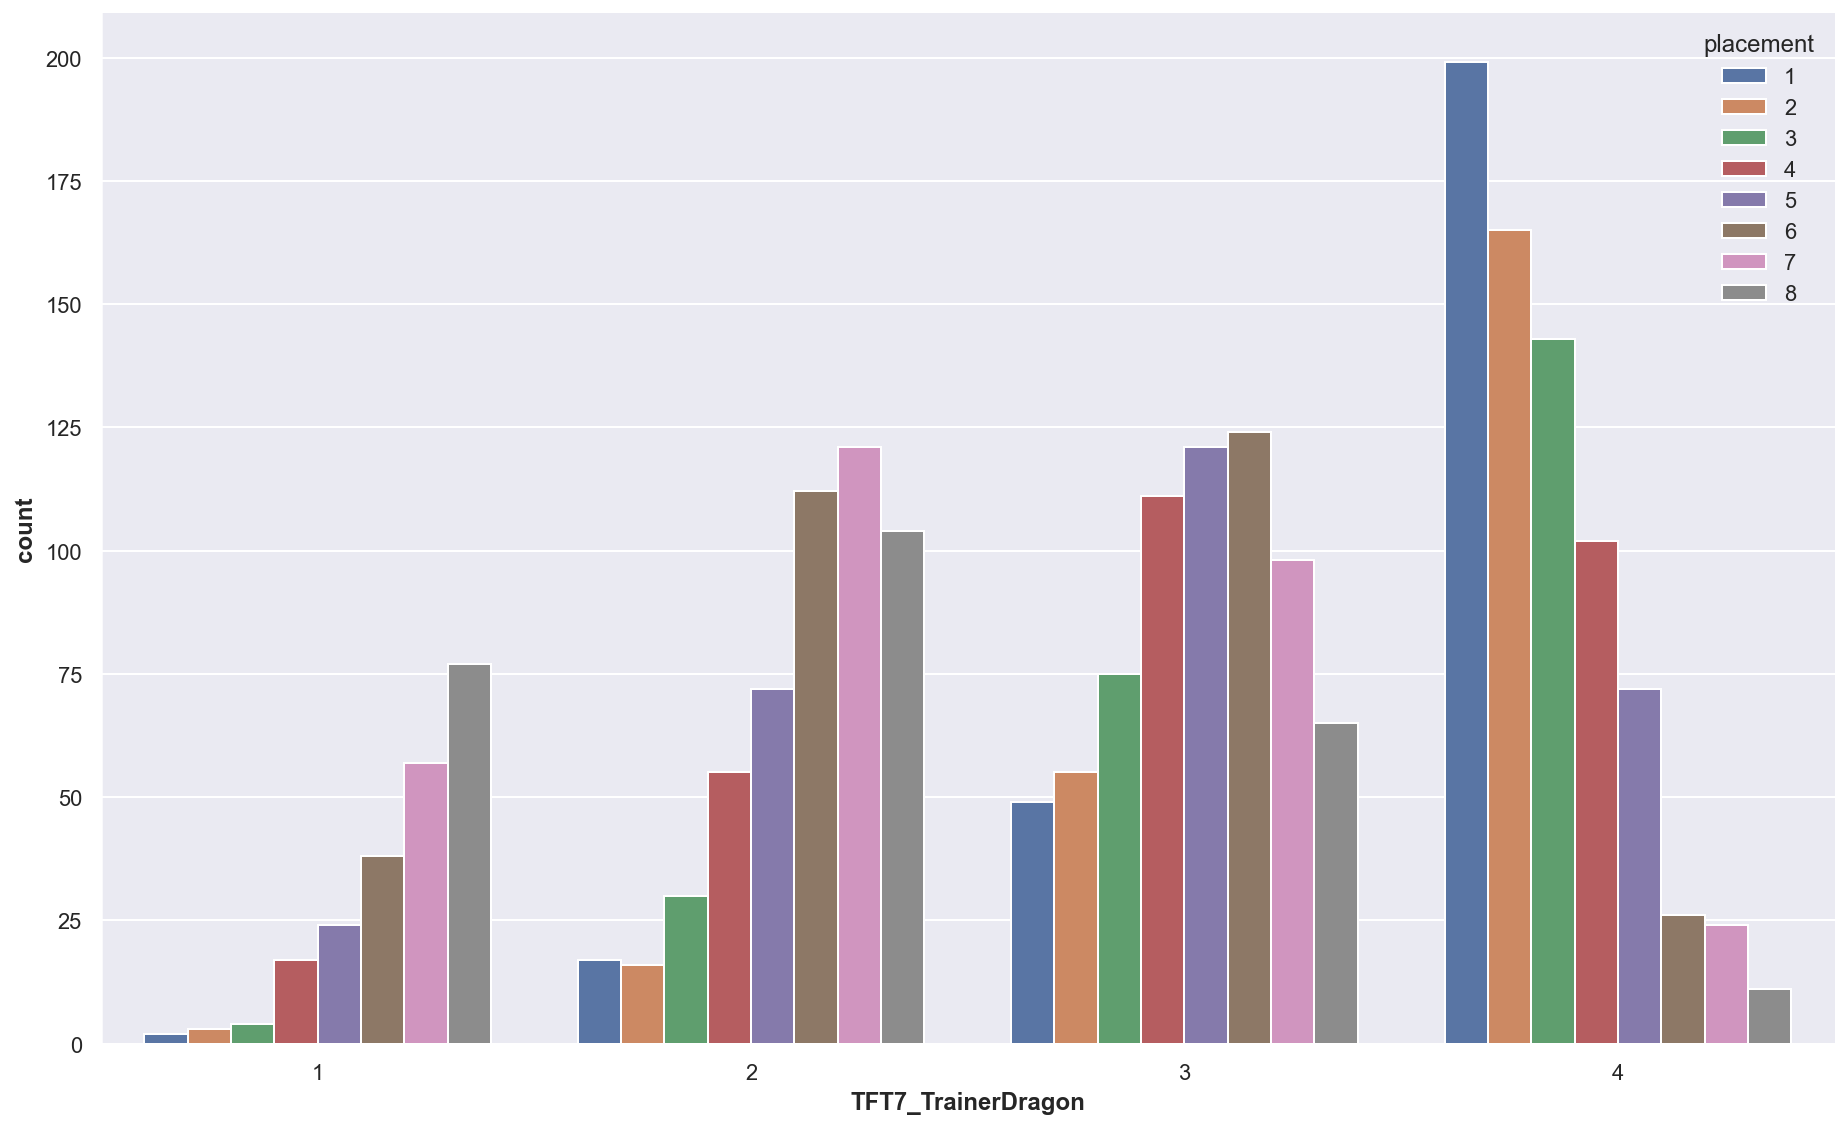

In [713]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_TrainerDragon']>0], x='TFT7_TrainerDragon', hue=TARGETNAME)
sns.despine()

Huge difference between holding Neeko1 and Neeko2.


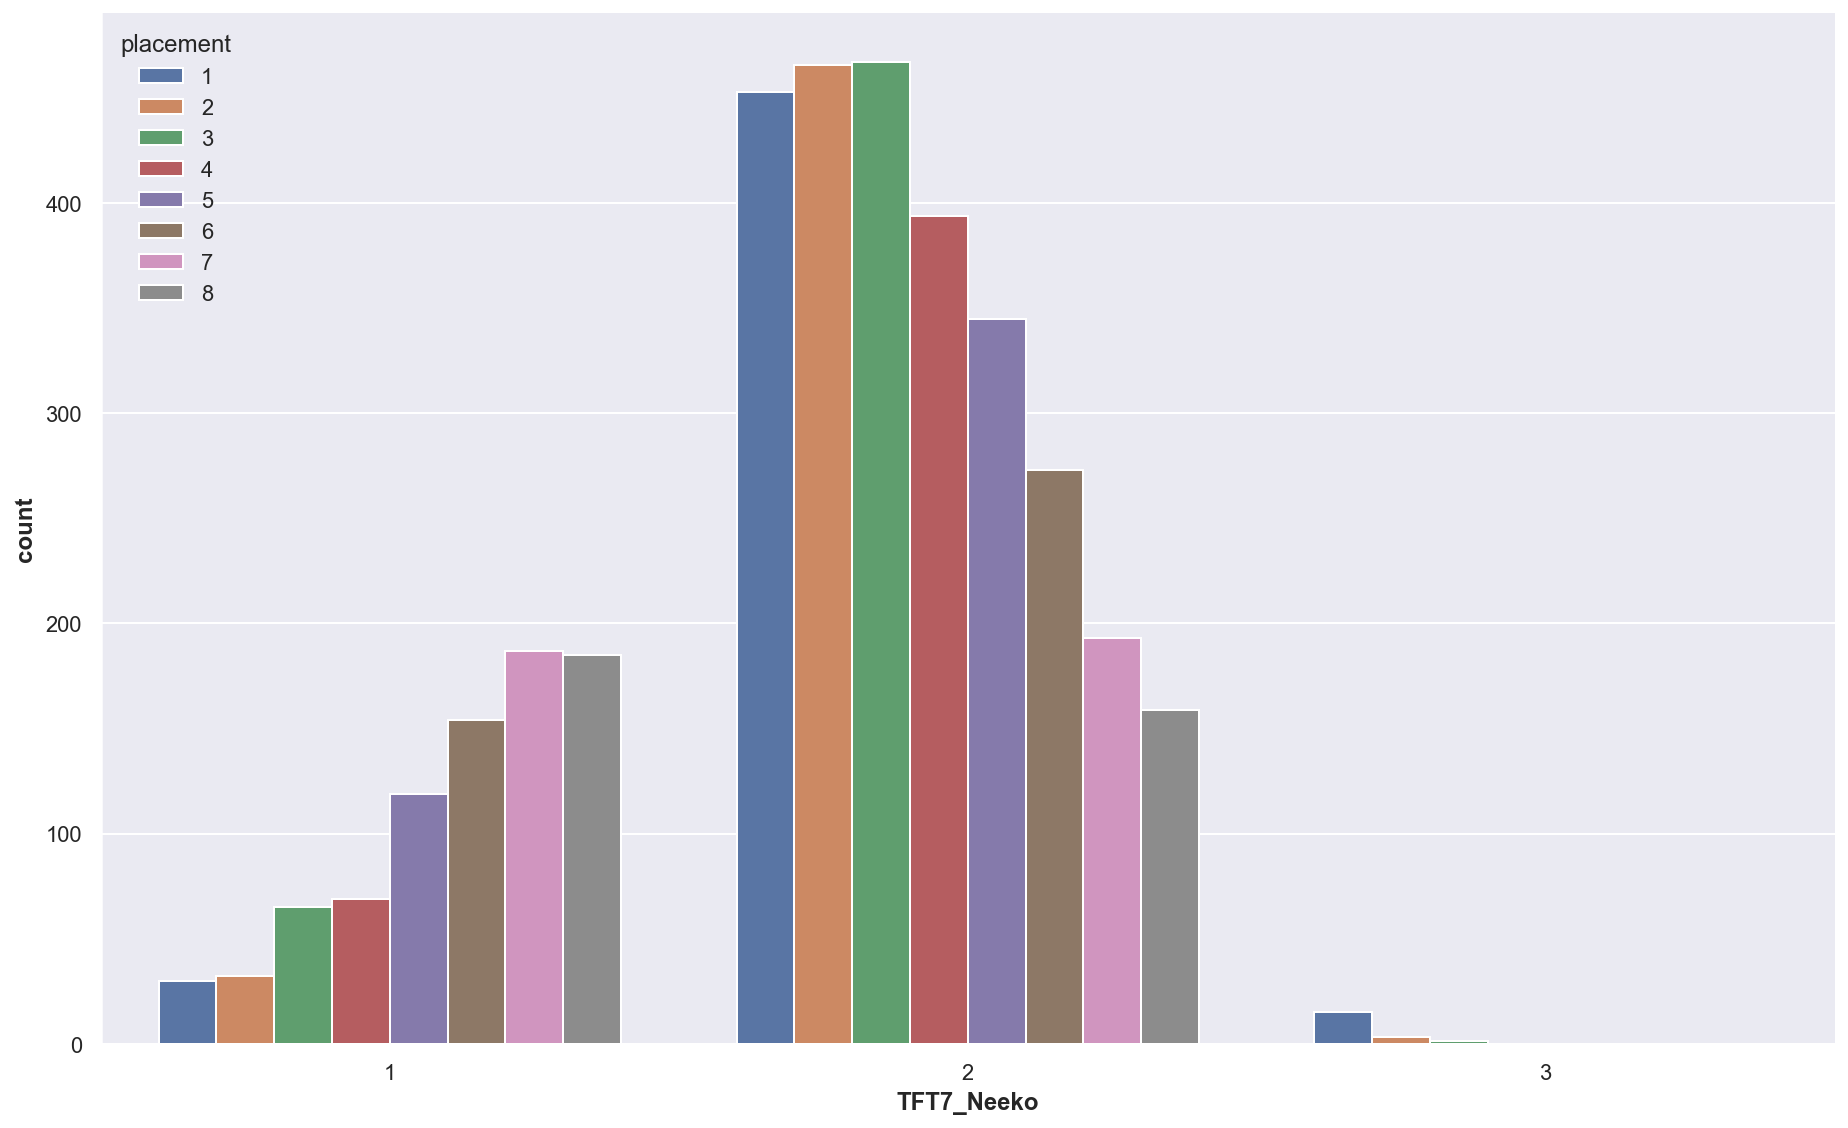

In [714]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Neeko']>0], x='TFT7_Neeko', hue=TARGETNAME)
sns.despine()

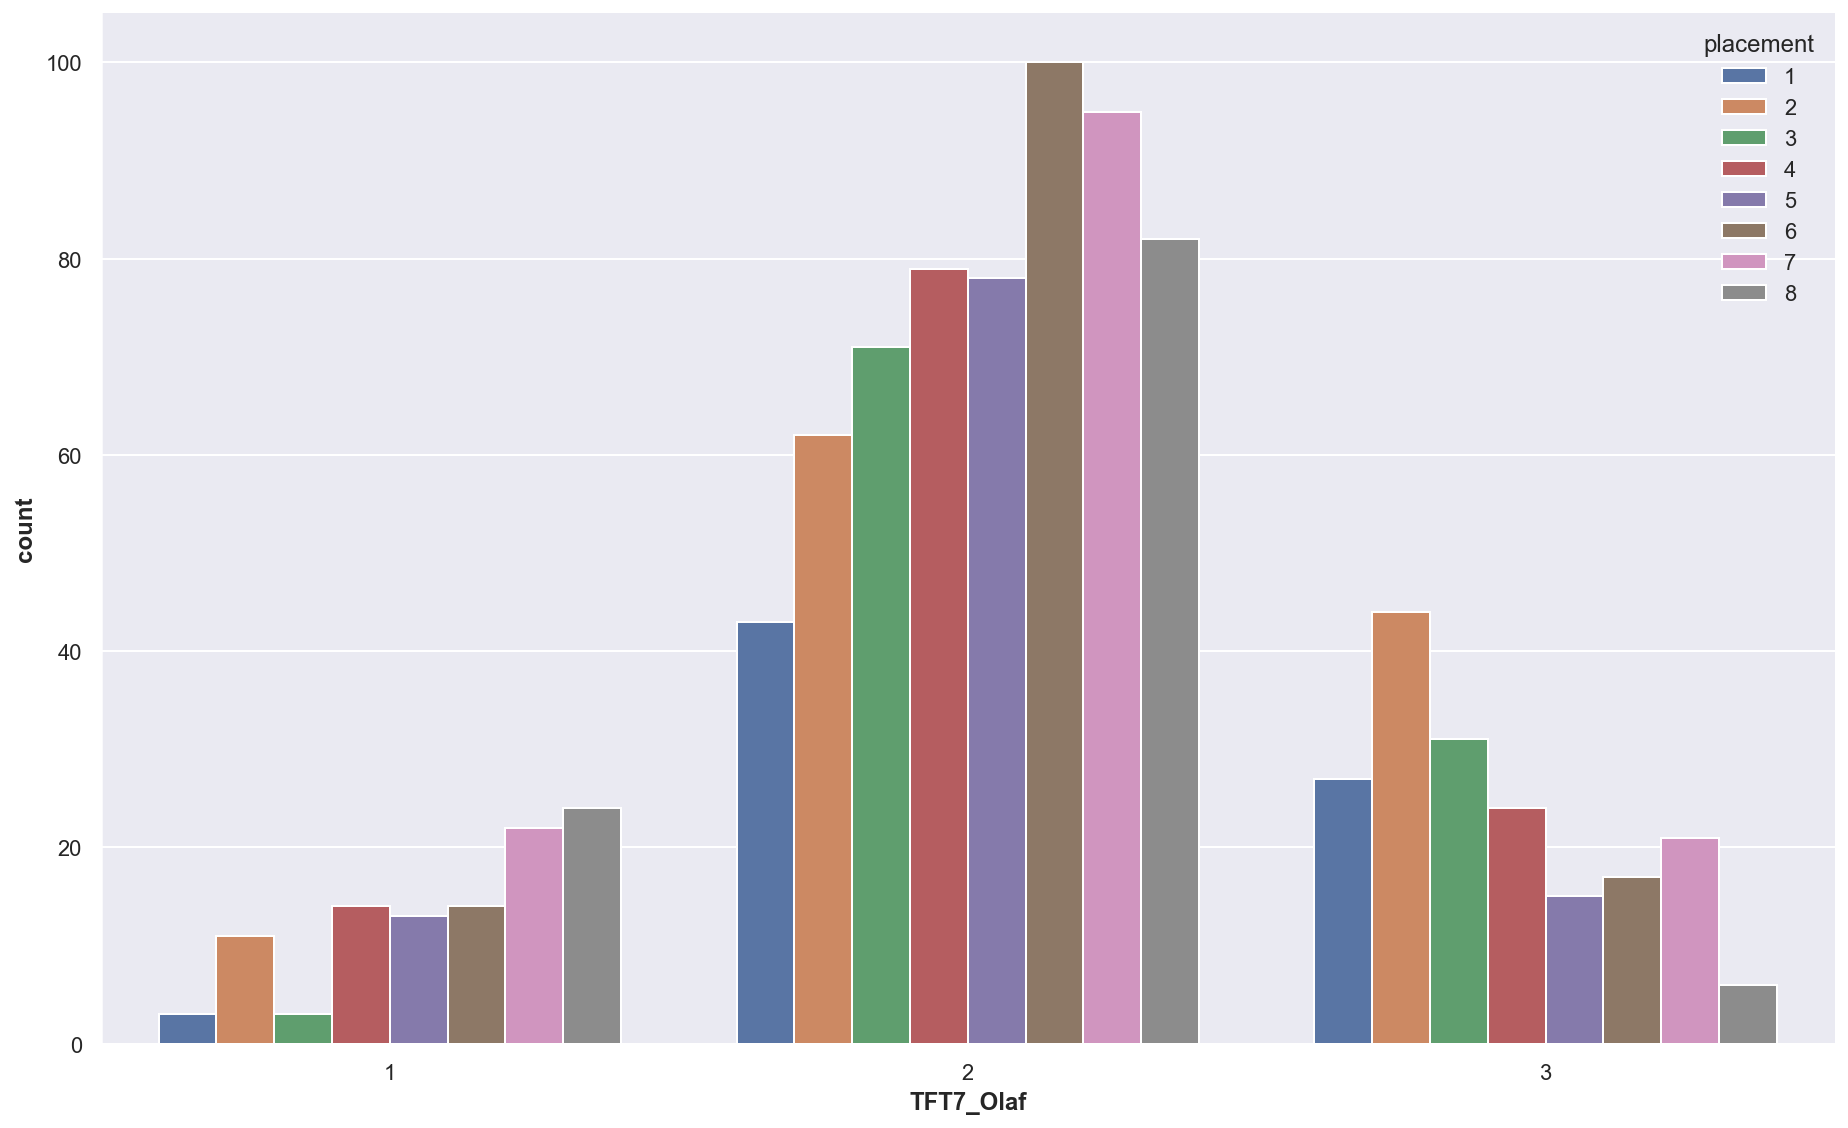

In [715]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Olaf']>0], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units

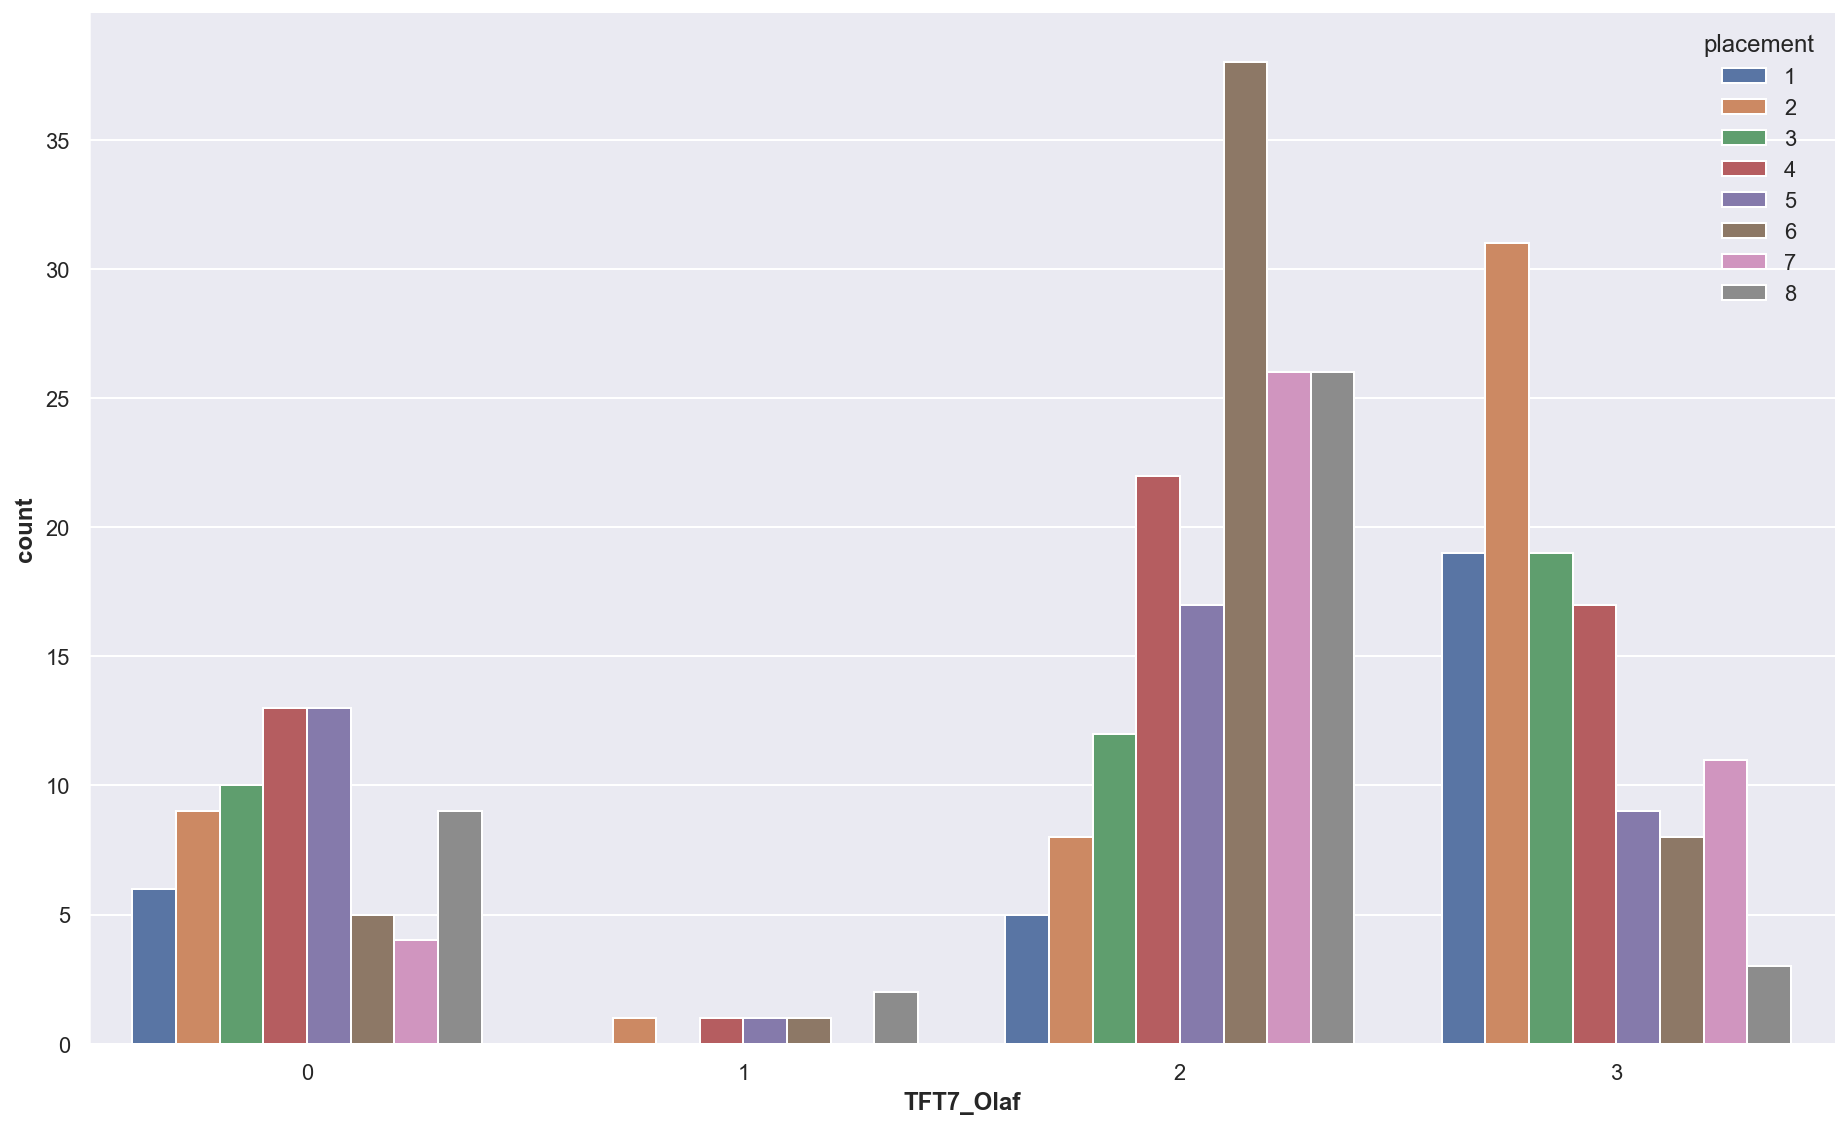

In [716]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Shen']>1) & (matches_df['TFT7_Diana']>1)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units Shen & Diana with Olaf.

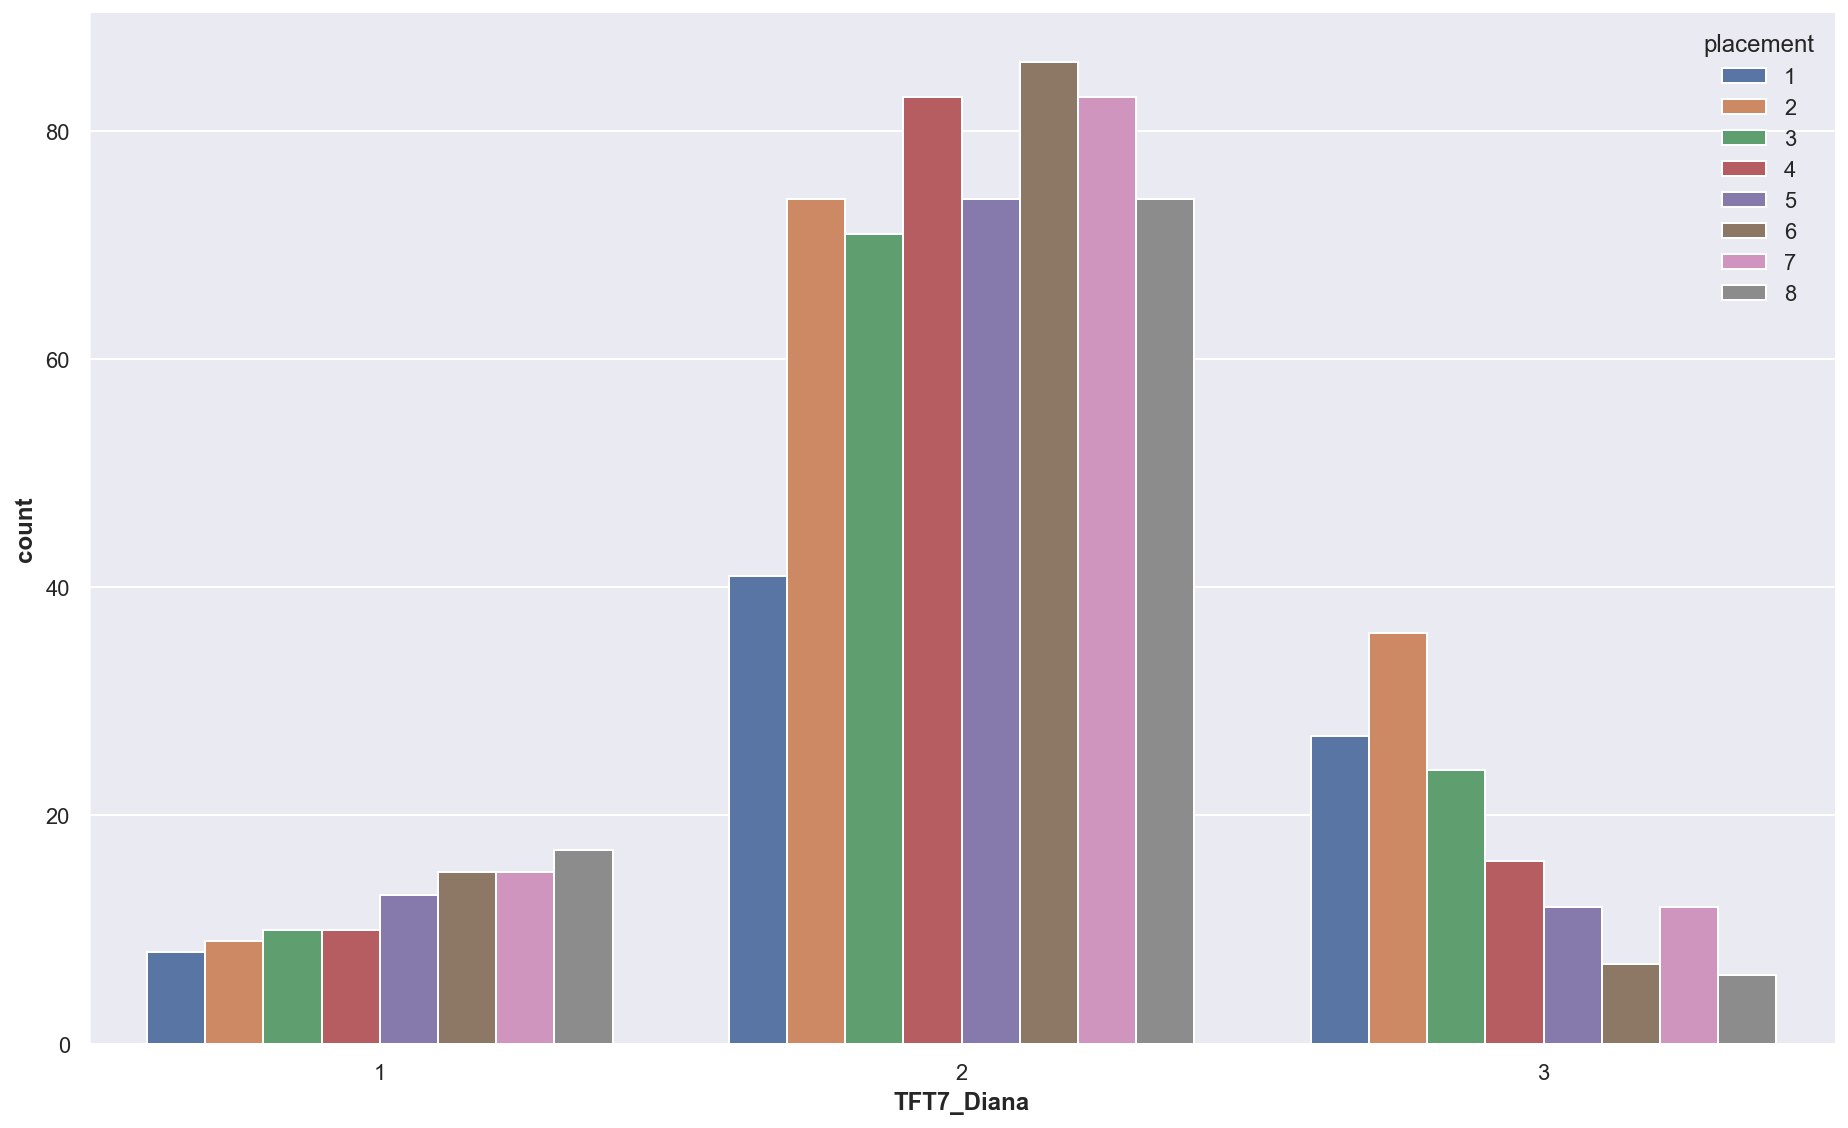

In [717]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Diana']>0], x='TFT7_Diana', hue=TARGETNAME)
sns.despine()

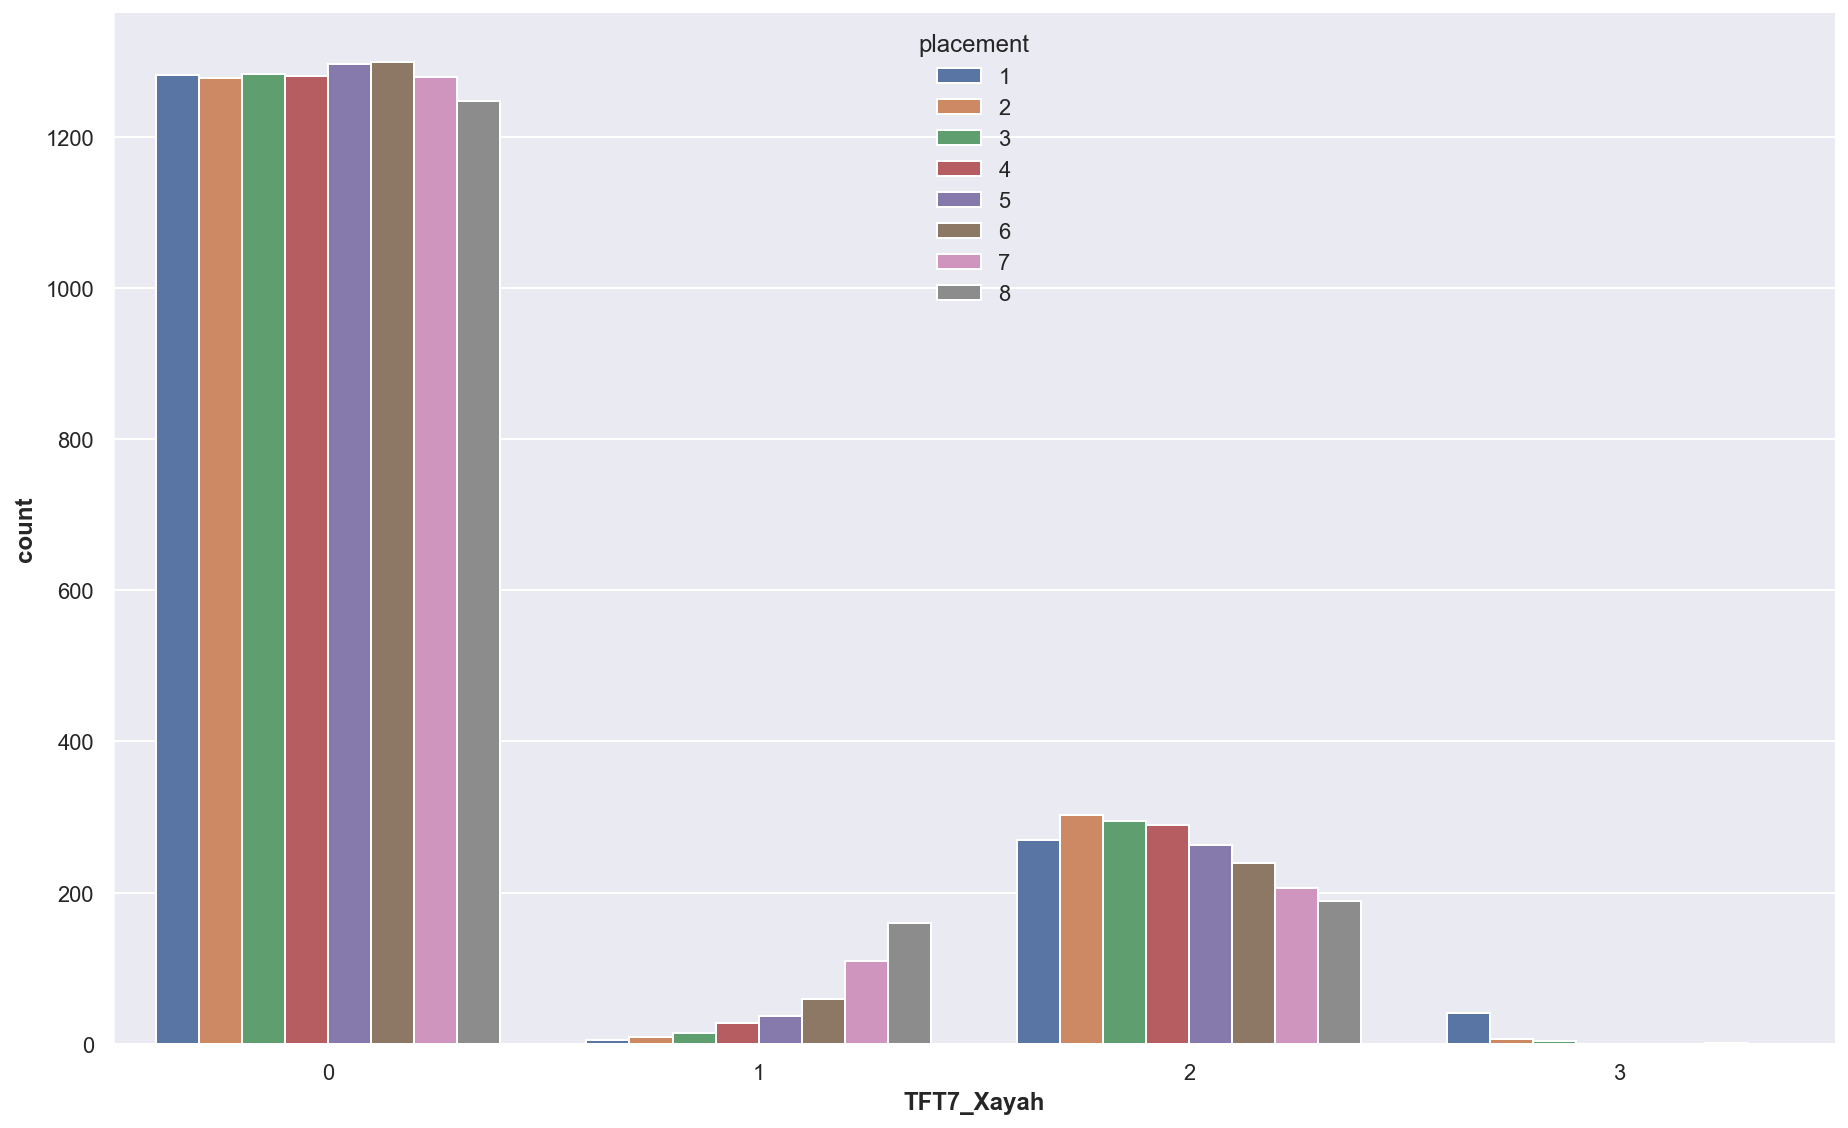

In [718]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Xayah']>=0], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

## Items

When TFT7_DragonGold (Idas) is holding item ShimmerscaleDiamondHands.

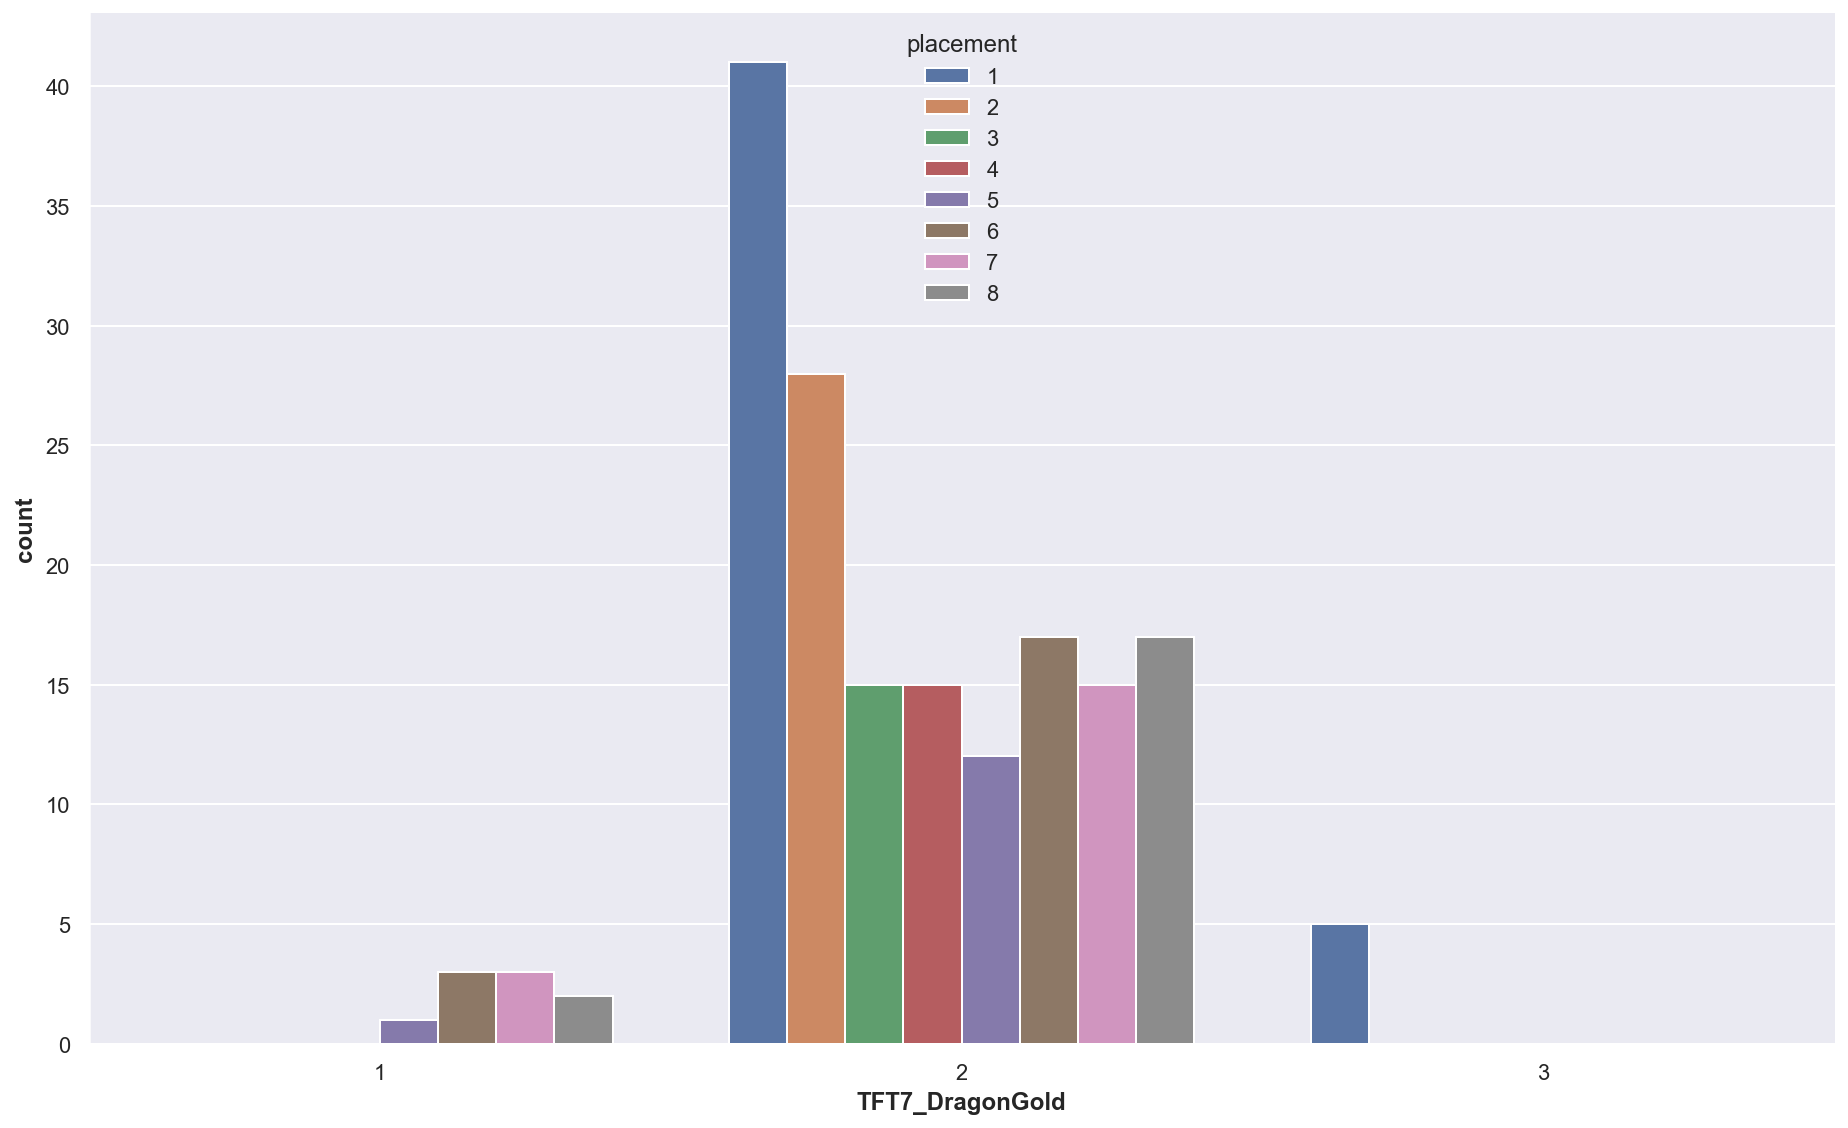

In [719]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']=='ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item1']=='ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item2']=='ShimmerscaleDiamondHands')], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

VS When TFT7_DragonGold (Idas) is **NOT** holding item ShimmerscaleDiamondHands.

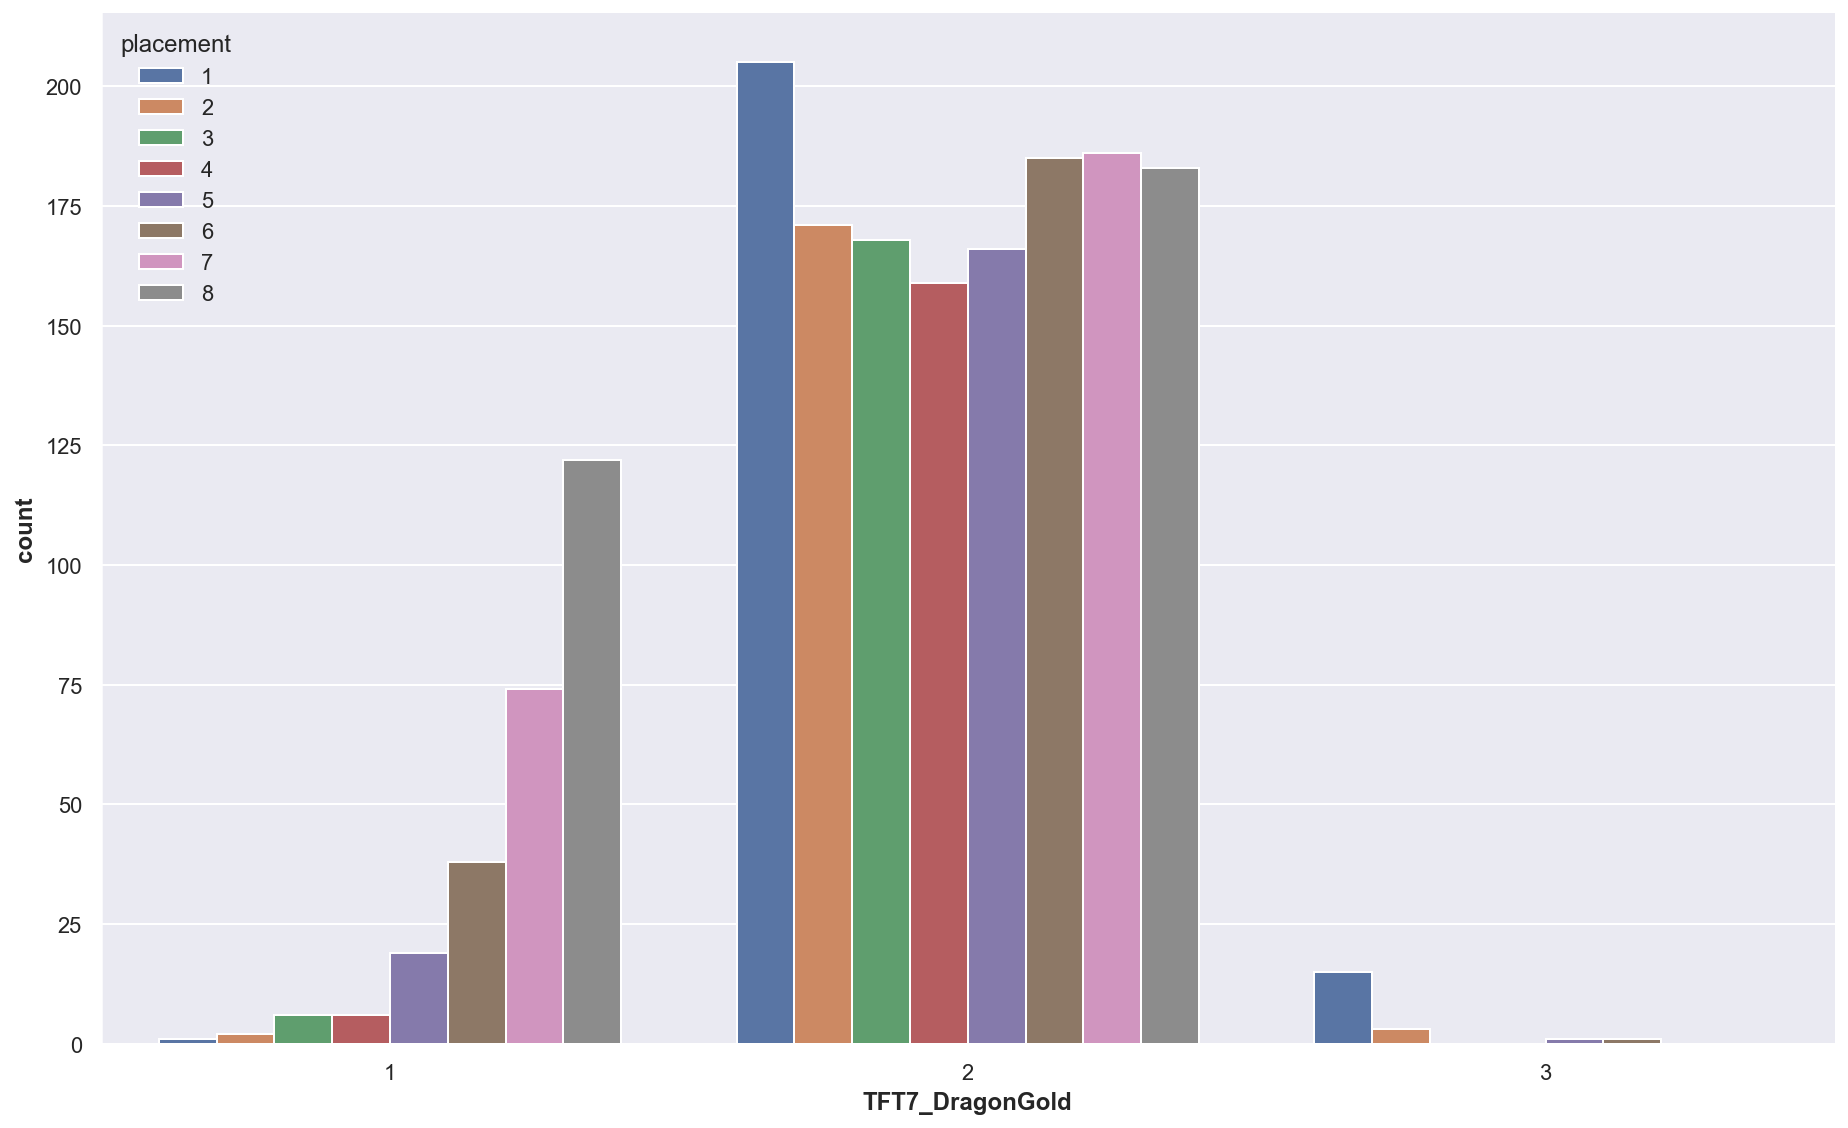

In [720]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']!='ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item1']!='ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item2']!='ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold']>0)], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

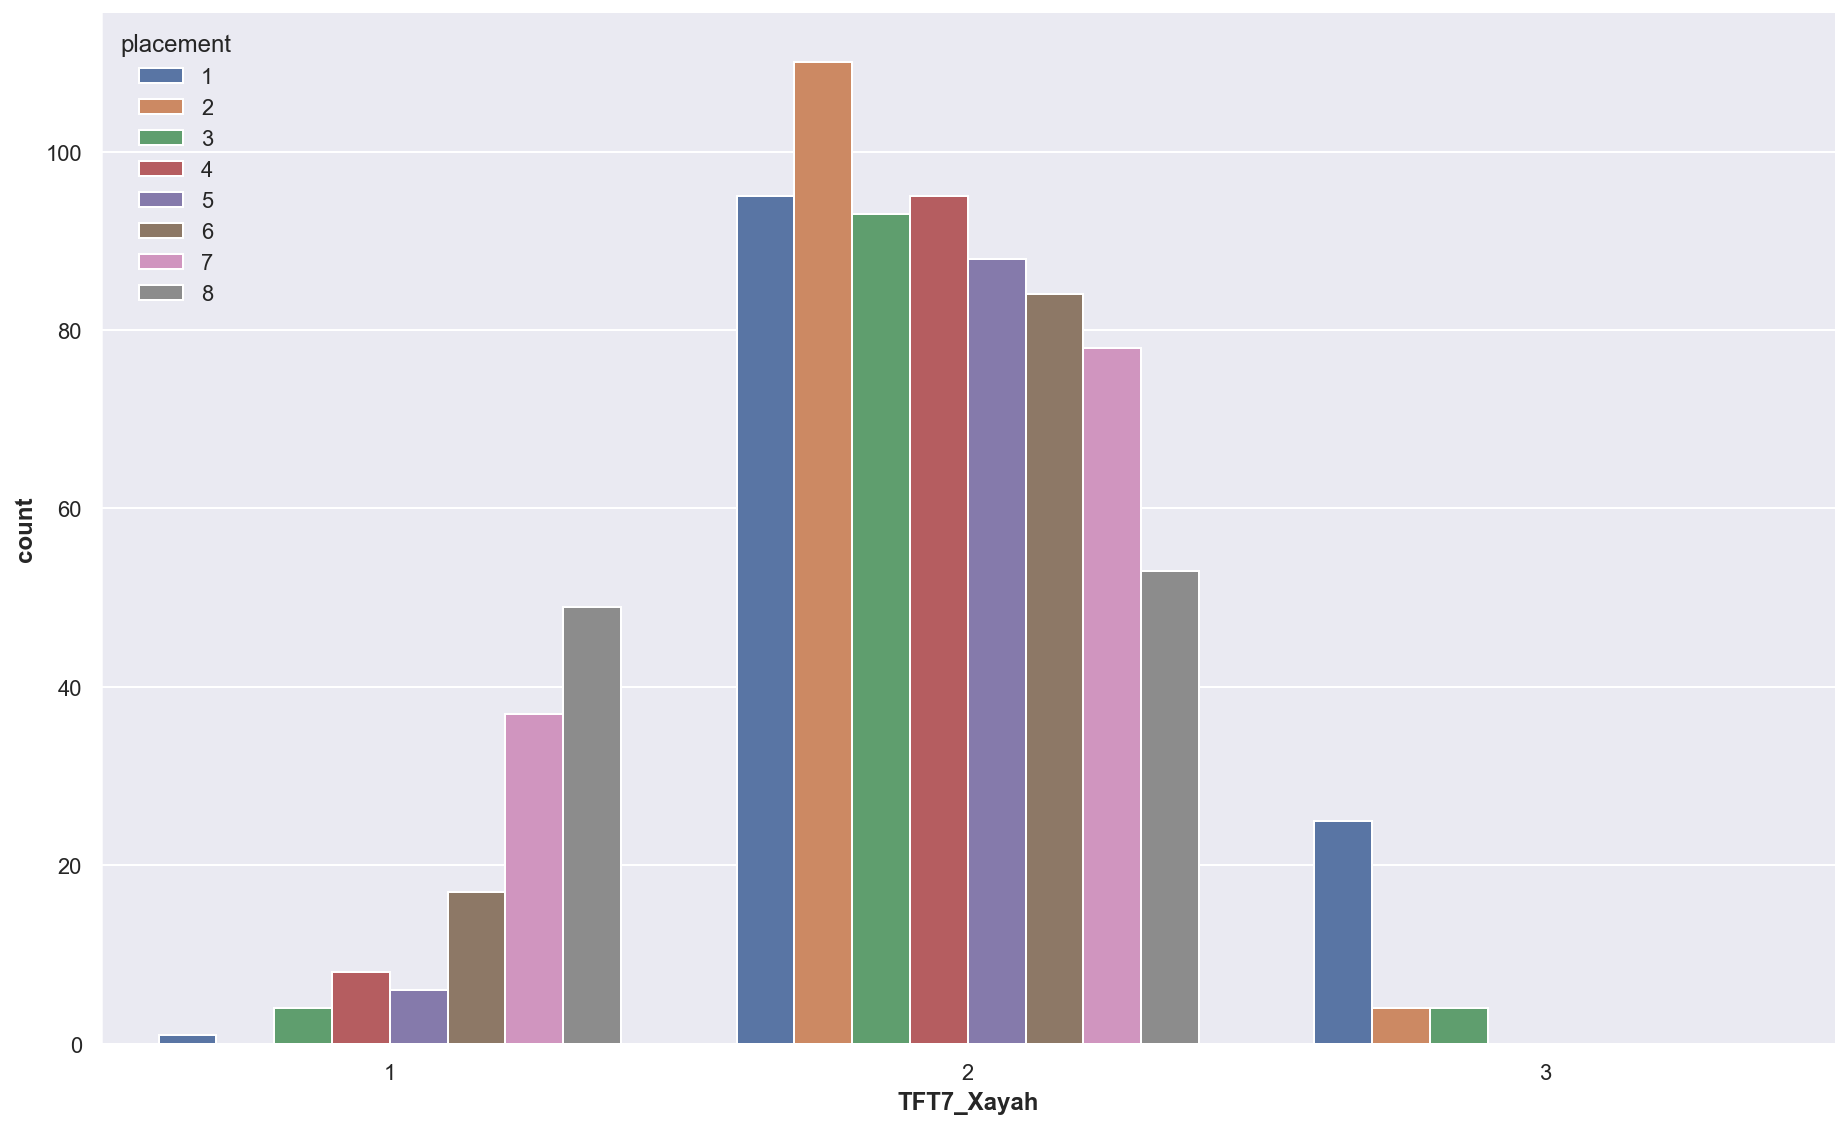

In [721]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']=='Quicksilver') | (matches_df['TFT7_Xayah_item1']=='Quicksilver') | (matches_df['TFT7_Xayah_item2']=='Quicksilver')], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Without Quicksilver.

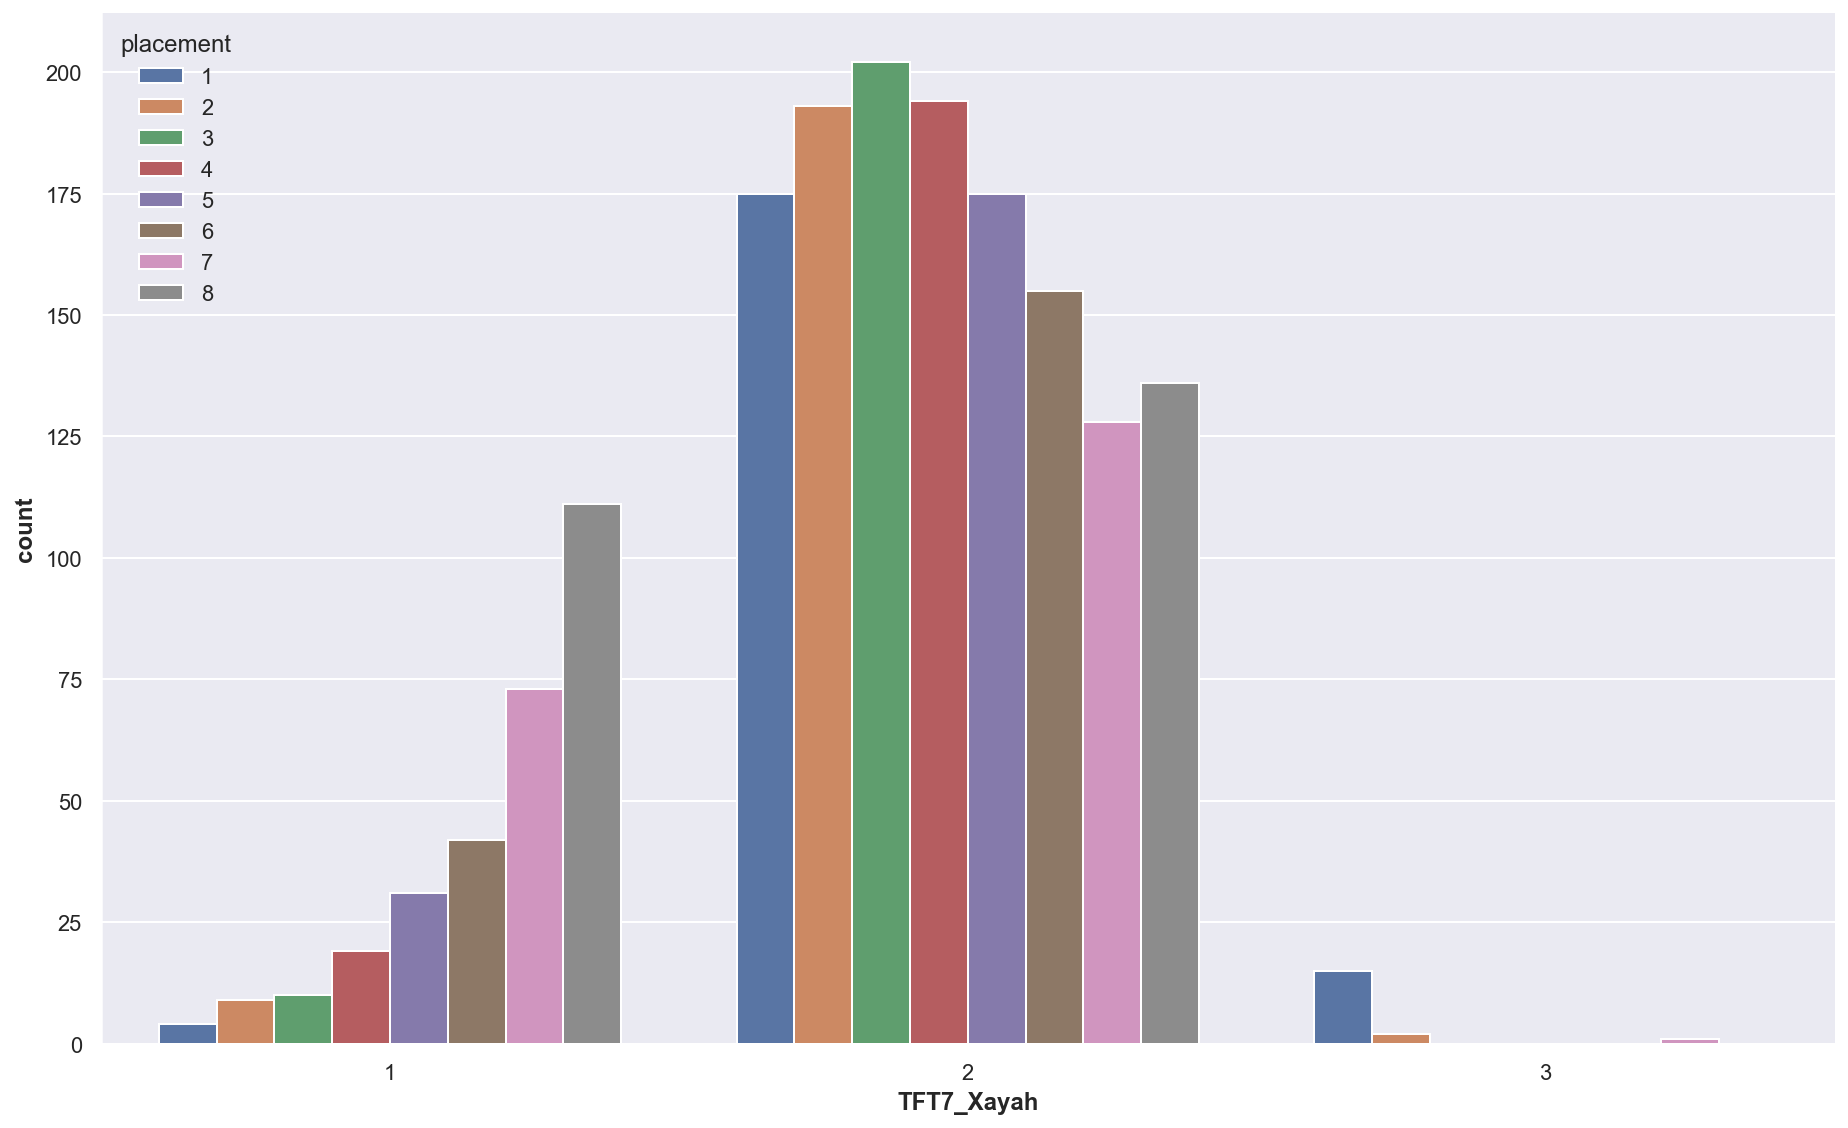

In [722]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']!='Quicksilver') & (matches_df['TFT7_Xayah_item1']!='Quicksilver') & (matches_df['TFT7_Xayah_item2']!='Quicksilver') & (matches_df['TFT7_Xayah']>0)], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

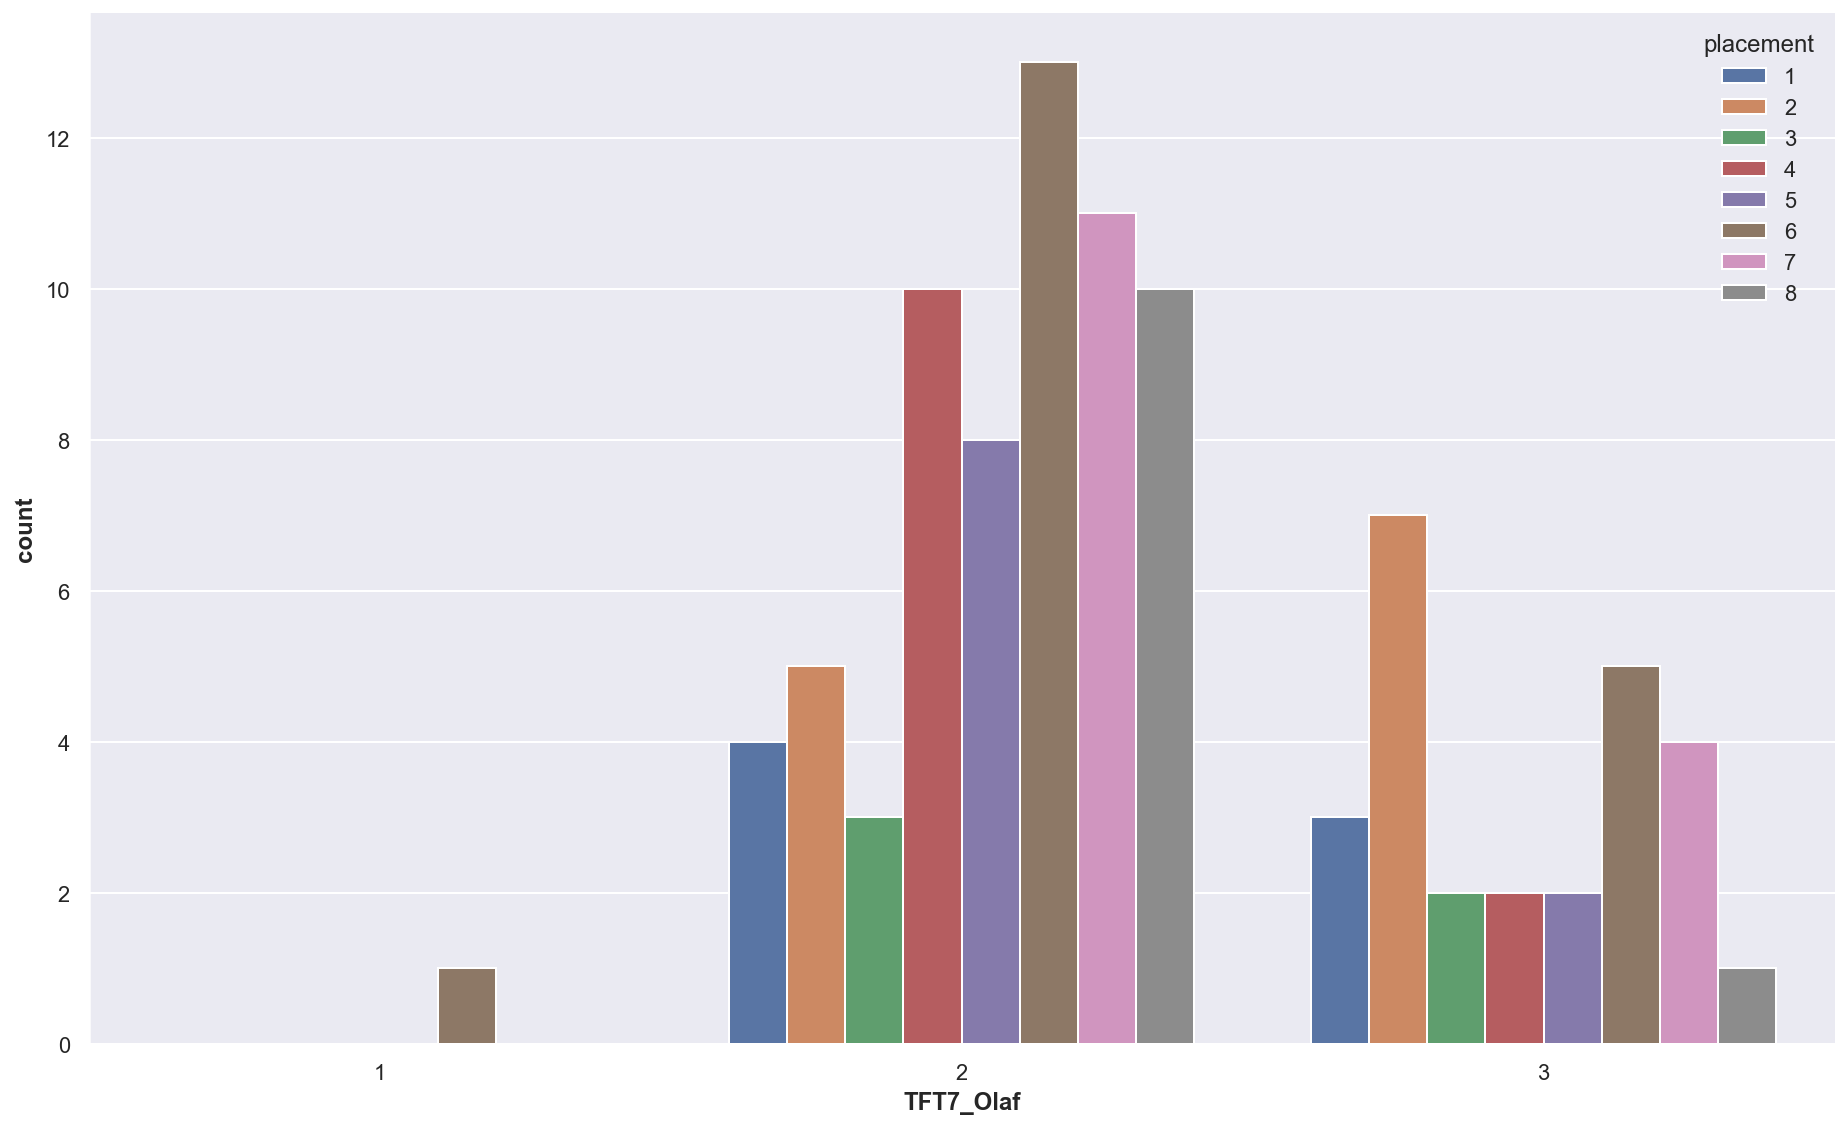

In [723]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']=='GuinsoosRageblade') | (matches_df['TFT7_Olaf_item1']=='GuinsoosRageblade') | (matches_df['TFT7_Olaf_item2']=='GuinsoosRageblade')], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Without GuinsoosRageblade

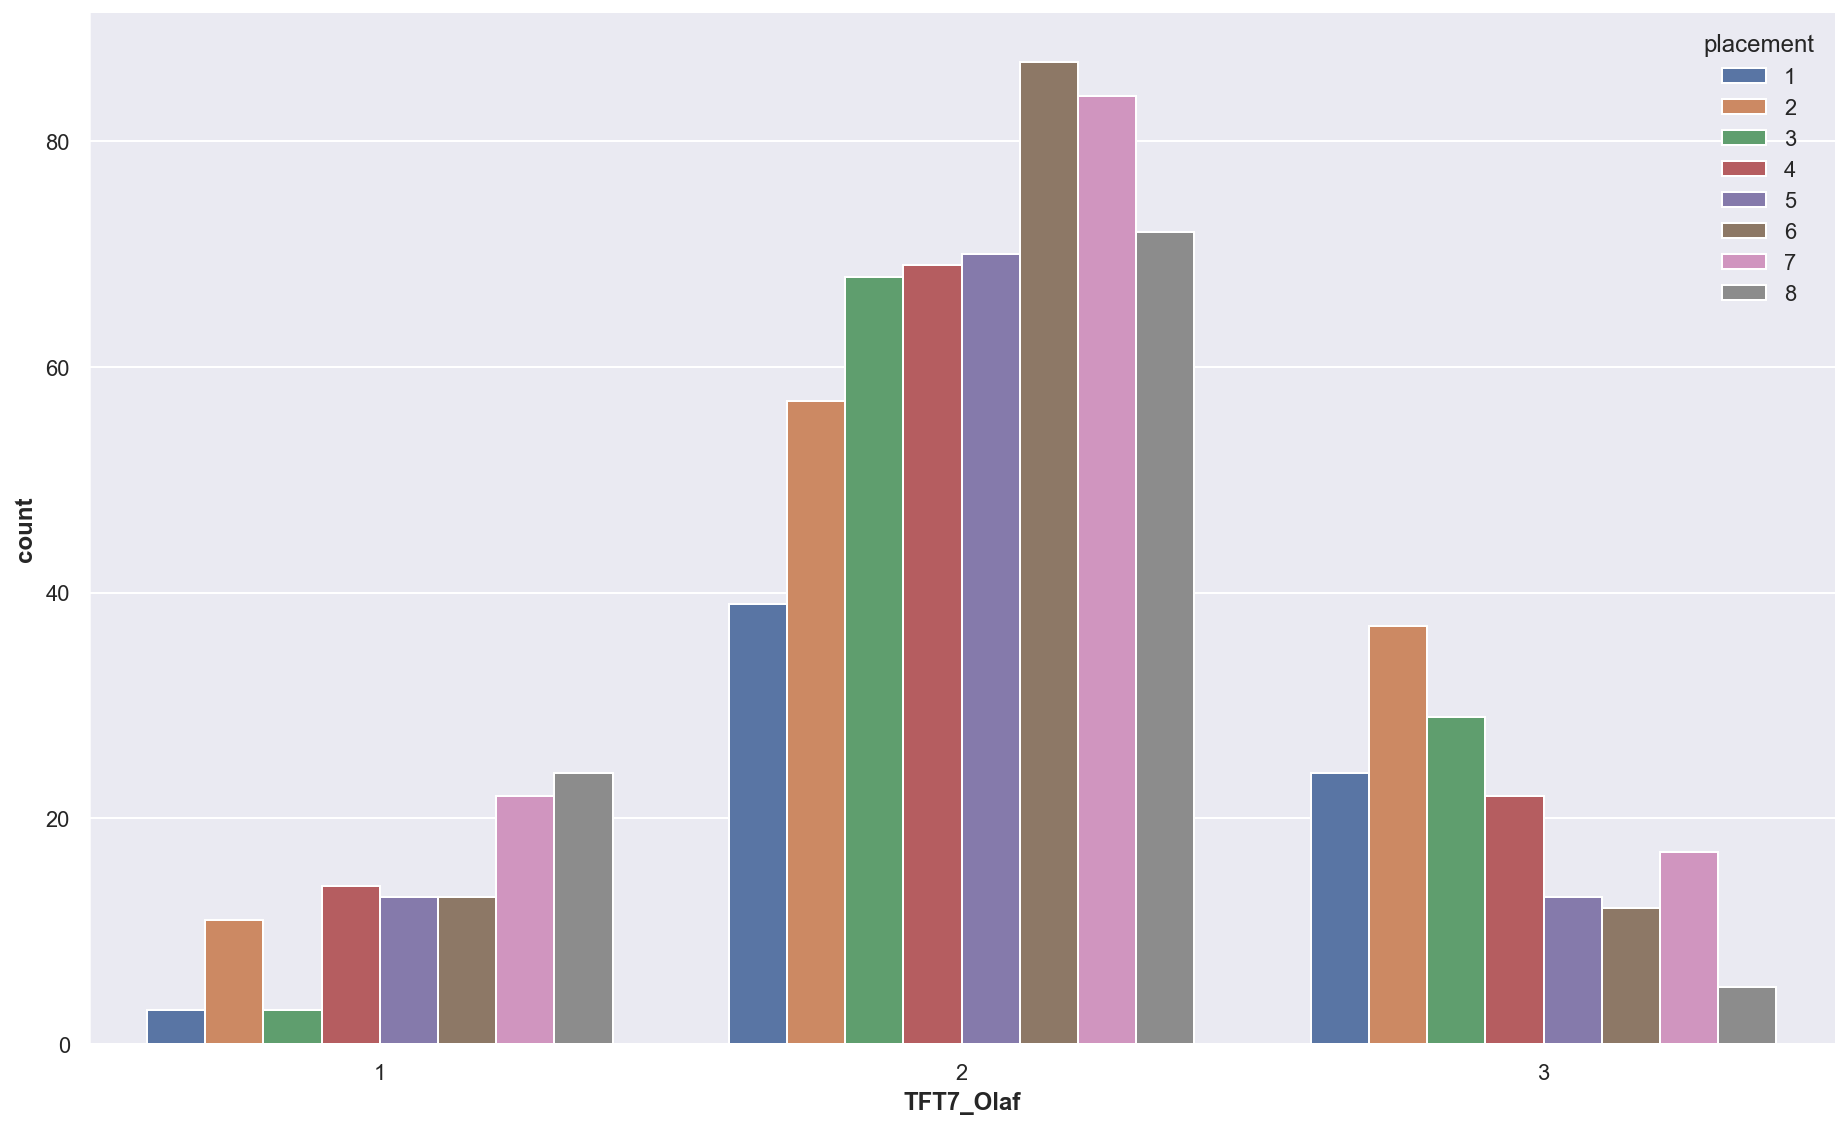

In [724]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']!='GuinsoosRageblade') & (matches_df['TFT7_Olaf_item1']!='GuinsoosRageblade') & (matches_df['TFT7_Olaf_item2']!='GuinsoosRageblade')&(matches_df['TFT7_Olaf']>0)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

In [725]:
def get_unit_item_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    m = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2').melt(
        'placement', value_name=f'{unit}_item')
    # group and aggregate mean/median
    dct = {'value_count': (f'{unit}_item', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby(f'{unit}_item', as_index=False).agg(**dct).sort_values(by='average_placement')


In [726]:
TFT7_Olaf_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Olaf')
TFT7_Olaf_item_merged_df[TFT7_Olaf_item_merged_df['value_count']>=10][:35]

TFT7_Olaf_item  value_count  average_placement
27  LocketOfTheIronSolari           24           3.500000
47                RedBuff           14           3.785714
66          TitansResolve           42           3.880952
59            StatikkShiv           15           4.066667
17          GuardianAngel           29           4.068966
72                 Zephyr           19           4.105263
39          PowerGauntlet           12           4.166667
68     UnstableConcoction           55           4.290909
71            ZekesHerald           39           4.307692
63           ThiefsGloves           29           4.344828
40            Quicksilver           80           4.387500
28      MadredsBloodrazor          112           4.401786
33                   None        36534           4.497181
26            LastWhisper           24           4.500000
50       RunaansHurricane          238           4.512605
10             Deathblade           34           4.588235
1      AssassinEmblemItem          281           4.647687
44        RapidFireCannon          106           4.679245
23           InfinityEdge          244           4.684426
3           Bloodthirster          101           4.742574
20      GuinsoosRageblade           92           4.945652
46             RecurveBow           14           5.214286

In [727]:
TFT7_Xayah_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Xayah')
TFT7_Xayah_item_merged_df[TFT7_Xayah_item_merged_df['value_count']>=20][:35]

TFT7_Xayah_item  value_count  average_placement
79                ZekesHerald           39           3.820513
68                StatikkShiv          107           3.831776
72               ThiefsGloves           20           3.850000
19              GuardianAngel          117           3.957265
25            HextechGunblade           21           4.095238
4               Bloodthirster           56           4.107143
41          OrnnInfinityForce           70           4.142857
44           OrnnTheCollector           33           4.242424
74              TitansResolve           56           4.357143
54           RunaansHurricane          189           4.365079
11                 Deathblade          311           4.382637
75         UnstableConcoction          374           4.390374
47                Quicksilver          851           4.419506
30                LastWhisper          130           4.423077
34          MadredsBloodrazor         1568           4.429209
22          GuinsoosRageblade         1948           4.449692
39                       None        31361           4.510698
21            GuildEmblemItem          170           4.629412
49            RapidFireCannon           54           4.629630
26               InfinityEdge          417           4.647482
60     ShimmerscaleDravensAxe          129           4.883721
62  ShimmerscaleGamblersBlade           49           5.632653

In [728]:
TFT7_Corki_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Corki')
TFT7_Corki_item_merged_df[TFT7_Corki_item_merged_df['value_count']>=20][:35]

TFT7_Corki_item  value_count  average_placement
41        OrnnObsidianCleaver           22           3.772727
67                StatikkShiv          116           3.922414
17              GuardianAngel           54           4.092593
76                ZekesHerald           31           4.096774
53           RunaansHurricane          163           4.122699
29                LastWhisper          300           4.243333
4               Bloodthirster           68           4.352941
25               InfinityEdge          622           4.464630
24            HextechGunblade           73           4.465753
45                Quicksilver          160           4.468750
28            JeweledGauntlet           29           4.482759
37                       None        33583           4.491677
73         UnstableConcoction          456           4.493421
39          OrnnInfinityForce           43           4.511628
71              TitansResolve           27           4.555556
10                 Deathblade          249           4.558233
21          GuinsoosRageblade          884           4.647059
49            RapidFireCannon           34           4.705882
32          MadredsBloodrazor          865           4.747977
59     ShimmerscaleDravensAxe          178           4.786517
42           OrnnTheCollector           29           4.827586
66              SpearOfShojin           39           4.948718
55             SeraphsEmbrace           42           5.142857
61  ShimmerscaleGamblersBlade           66           5.196970

In [729]:
TFT7_Shyvana_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Shyvana')
TFT7_Shyvana_item_merged_df[TFT7_Shyvana_item_merged_df['value_count']>=10][:25]

TFT7_Shyvana_item  value_count  average_placement
41         Quicksilver           26           2.884615
4          BrambleVest           34           3.000000
21          IonicSpark           62           3.080645
63        TitanicHydra           10           3.200000
6   CavalierEmblemItem           11           3.272727
64       TitansResolve           63           3.460317
0      ArchangelsStaff           51           3.509804
29      Morellonomicon           42           3.547619
61        ThiefsGloves           49           3.571429
13         FrozenHeart           78           3.576923
23     JeweledGauntlet           38           3.605263
42    RabadonsDeathcap           44           3.636364
66  UnstableConcoction           63           3.730159
19     HextechGunblade           38           3.736842
18   GuinsoosRageblade           19           3.736842
46          Redemption           37           3.756757
16       GuardianAngel           31           3.806452
20        InfinityEdge           18           3.944444
11         DragonsClaw           53           3.981132
3        Bloodthirster           47           4.085106
14  GargoyleStoneplate           55           4.109091
67        WarmogsArmor           78           4.153846
45             RedBuff           91           4.428571
27   MadredsBloodrazor           31           4.516129
32                None        37092           4.522943

In [730]:
TFT7_DragonBlue_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonBlue')
TFT7_DragonBlue_item_merged_df[TFT7_DragonBlue_item_merged_df['value_count']>=10][:25]

TFT7_DragonBlue_item  value_count  average_placement
68        TitansResolve           22           3.545455
50      RevelEmblemItem           81           3.604938
19      GuildEmblemItem           14           3.785714
41   OrnnZhonyasParadox           14           3.857143
17        GuardianAngel           22           4.136364
44     RabadonsDeathcap          125           4.160000
23      HextechGunblade           73           4.178082
32       Morellonomicon           25           4.200000
37    OrnnInfinityForce           18           4.222222
63          StatikkShiv          195           4.328205
35                 None        34709           4.491112
0       ArchangelsStaff          549           4.508197
43          Quicksilver          151           4.562914
69   UnstableConcoction          206           4.567961
20    GuinsoosRageblade          411           4.574209
30    MadredsBloodrazor          515           4.582524
62        SpearOfShojin           32           4.781250
5         Bloodthirster           28           4.785714
26      JeweledGauntlet          554           4.850181
46      RapidFireCannon           42           4.952381
24         InfinityEdge          399           5.025063

In [731]:
TFT7_DragonPurple_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_item_merged_df[TFT7_DragonPurple_item_merged_df['value_count']>=10][:25]

TFT7_DragonPurple_item  value_count  average_placement
24        GuildEmblemItem           17           3.235294
50      OrnnInfinityForce           58           3.413793
75          SpearOfShojin           11           3.636364
28        HextechGunblade           78           3.666667
84   TitansResolveRadiant           13           3.692308
86           WarmogsArmor           81           3.839506
14            DragonsClaw           95           3.852632
66         SeraphsEmbrace           14           3.857143
77    SwiftshotEmblemItem           24           3.875000
48     OrnnDeathsDefiance           64           3.875000
41         Morellonomicon           10           3.900000
85     UnstableConcoction          626           3.918530
15            FrozenHeart          140           3.957143
57            Quicksilver          621           3.983897
8      CavalierEmblemItem           24           4.000000
6             BrambleVest           64           4.000000
62                RedBuff          181           4.049724
38      MadredsBloodrazor          479           4.089770
35            LastWhisper           22           4.090909
87      WarriorEmblemItem           10           4.100000
64       RunaansHurricane          153           4.104575
47        OrnnAnimaVisage           16           4.125000
83          TitansResolve          870           4.134483
34        JeweledGauntlet           20           4.150000
40       MirageEmblemItem           13           4.153846

In [732]:
pd.options.display.max_colwidth = 100

In [733]:
def get_unit_items_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    df = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')
    df[f'unit'] = f'{unit}' # fill in current unit
    # join 3 items to 1 column
    df[f'{unit}_items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)
    # sort items for unique combination
    df[f'{unit}_items'] = df[f'{unit}_items'].apply(lambda x: ', '.join(sorted(x.split(', '))))
    m = df.melt(
        ['placement',f'unit'], value_name=f'{unit}_items_grp') #, value_vars=[f'{unit}_items', f'{unit}']
    # group and aggregate mean/median average_placement
    dct = {'value_count': (f'{unit}_items_grp', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby([f'unit', f'{unit}_items_grp'], as_index=False).agg(**dct).sort_values(by='average_placement')

In [734]:
# Get top5 
top5_list = []
for unit in units_col:
    df = get_unit_items_ranking(df = matches_df, unit=unit)
    df = df[df['value_count']>=12][:5] #Top 5 with counts >= 12
    top5_list.extend(df.values)

In [735]:
top5_df = pd.DataFrame(top5_list, columns=['unit', 'items',	'value_count',	'average_placement'])

## Top items combination per champion

In [736]:
top5_df.groupby('unit').head(1)

unit  \
0           TFT7_Aatrox   
5           TFT7_Anivia   
10          TFT7_AoShin   
15            TFT7_Ashe   
20     TFT7_AurelionSol   
25            TFT7_Bard   
30           TFT7_Braum   
35           TFT7_Corki   
40           TFT7_Diana   
45      TFT7_DragonBlue   
50      TFT7_DragonGold   
55     TFT7_DragonGreen   
60    TFT7_DragonPurple   
65           TFT7_Elise   
70          TFT7_Ezreal   
75            TFT7_Gnar   
80         TFT7_Hecarim   
85    TFT7_Heimerdinger   
90          TFT7_Illaoi   
95            TFT7_Jinx   
100          TFT7_Karma   
105           TFT7_Kayn   
110         TFT7_LeeSin   
115          TFT7_Leona   
120         TFT7_Lillia   
125           TFT7_Lulu   
130           TFT7_Nami   
135          TFT7_Neeko   
140        TFT7_Nidalee   
145           TFT7_Nunu   
150           TFT7_Olaf   
155           TFT7_Ornn   
160           TFT7_Pyke   
165         TFT7_Qiyana   
170           TFT7_Ryze   
175        TFT7_Sejuani   
180          TFT7_Senna   
182           TFT7_Sett   
187           TFT7_Shen   
192        TFT7_Shyvana   
197        TFT7_Skarner   
202           TFT7_Sona   
207         TFT7_Soraka   
212          TFT7_Swain   
217          TFT7_Sylas   
222      TFT7_TahmKench   
227          TFT7_Talon   
232          TFT7_Taric   
237         TFT7_Thresh   
242  TFT7_TrainerDragon   
246       TFT7_Tristana   
251         TFT7_Twitch   
256          TFT7_Varus   
261       TFT7_Vladimir   
266       TFT7_Volibear   
271          TFT7_Xayah   
276          TFT7_Yasuo   
281           TFT7_Yone   
286            TFT7_Zoe   

                                                     items  value_count  \
0                                             TitanicHydra           13   
5                                            Bloodthirster           13   
10                            ShimmerscaleGoldmancersStaff           12   
15                                                  Shroud           29   
20                                                    None        38184   
25                                              Redemption           19   
30                                        MirageEmblemItem           18   
35                                            ThiefsGloves           12   
40                                           PowerGauntlet           18   
45         GuinsoosRageblade, Quicksilver, RevelEmblemItem           13   
50   GargoyleStoneplate, RedBuff, ShimmerscaleDiamondHands           24   
55    GuardianAngel, MadredsBloodrazor, UnstableConcoction           25   
60    MadredsBloodrazor, TitansResolve, UnstableConcoction           19   
65                                           PowerGauntlet           14   
70                                             ZekesHerald           15   
75                            MysticEmblemItem, None, None           14   
80                                      UnstableConcoction           25   
85                                      None, None, Shroud           19   
90                                       OrnnEternalWinter           18   
95                                 None, None, StatikkShiv           12   
100                                            StatikkShiv           21   
105                                  LocketOfTheIronSolari           16   
110                                          SpearOfShojin           12   
115                                                 Shroud           25   
120                                                 Zephyr           12   
125                                           WarmogsArmor           12   
130                                        HextechGunblade           24   
135                        IonicSpark, RedBuff, Redemption           17   
140        Deathblade, GuinsoosRageblade, RunaansHurricane           13   
145                     DragonsClaw, RedBuff, WarmogsArmor           14   
150                                  LocketOfTheIronSolari           24  

In [737]:
TFT7_Corki_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Corki')
TFT7_Corki_items_merged_df[TFT7_Corki_items_merged_df['value_count']>4][:20]

unit                                       TFT7_Corki_items_grp  \
117  TFT7_Corki               Deathblade, InfinityEdge, UnstableConcoction   
84   TFT7_Corki                 Deathblade, GuinsoosRageblade, LastWhisper   
323  TFT7_Corki           GuinsoosRageblade, Quicksilver, RunaansHurricane   
265  TFT7_Corki           GuinsoosRageblade, LastWhisper, RunaansHurricane   
648  TFT7_Corki                                               ThiefsGloves   
27   TFT7_Corki             Bloodthirster, GuinsoosRageblade, InfinityEdge   
279  TFT7_Corki  GuinsoosRageblade, MadredsBloodrazor, OrnnObsidianCleaver   
267  TFT7_Corki     GuinsoosRageblade, LastWhisper, ShimmerscaleDravensAxe   
224  TFT7_Corki      GuinsoosRageblade, HextechGunblade, MadredsBloodrazor   
335  TFT7_Corki    GuinsoosRageblade, RunaansHurricane, UnstableConcoction   
399  TFT7_Corki          InfinityEdge, LastWhisper, ShimmerscaleDravensAxe   
108  TFT7_Corki                Deathblade, InfinityEdge, MadredsBloodrazor   
243  TFT7_Corki          GuinsoosRageblade, InfinityEdge, RunaansHurricane   
127  TFT7_Corki            Deathblade, MadredsBloodrazor, RunaansHurricane   
592  TFT7_Corki                                        OrnnObsidianCleaver   
118  TFT7_Corki                 Deathblade, LastWhisper, MadredsBloodrazor   
249  TFT7_Corki               GuinsoosRageblade, InfinityEdge, StatikkShiv   
643  TFT7_Corki                                                StatikkShiv   
95   TFT7_Corki      Deathblade, GuinsoosRageblade, ShimmerscaleDravensAxe   
90   TFT7_Corki                 Deathblade, GuinsoosRageblade, Quicksilver   

     value_count  average_placement  
117            7           2.285714  
84             5           2.400000  
323            5           2.600000  
265            5           2.800000  
648           12           2.916667  
27             8           3.125000  
279            7           3.142857  
267            6           3.500000  
224           13           3.538462  
335            7           3.571429  
399            9           3.666667  
108           13           3.692308  
243           10           3.700000  
127            7           3.714286  
592           22           3.772727  
118            5           3.800000  
249            6           3.833333  
643          116           3.922414  
95             6           4.000000  
90             5           4.000000

In [738]:
TFT7_Xayah_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Xayah')
TFT7_Xayah_items_merged_df[TFT7_Xayah_items_merged_df['value_count']>4][:20]

unit                                      TFT7_Xayah_items_grp  \
66   TFT7_Xayah                                                   Chalice   
281  TFT7_Xayah  GuinsoosRageblade, MadredsBloodrazor, OrnnDeathsDefiance   
167  TFT7_Xayah            GuardianAngel, GuinsoosRageblade, InfinityEdge   
464  TFT7_Xayah         MadredsBloodrazor, MadredsBloodrazor, Quicksilver   
236  TFT7_Xayah         GuinsoosRageblade, GuinsoosRageblade, Quicksilver   
320  TFT7_Xayah         GuinsoosRageblade, OrnnInfinityForce, Quicksilver   
143  TFT7_Xayah                                    DragonmancerEmblemItem   
120  TFT7_Xayah                Deathblade, MadredsBloodrazor, Quicksilver   
549  TFT7_Xayah                                        OrnnDeathsDefiance   
327  TFT7_Xayah          GuinsoosRageblade, OrnnTheCollector, Quicksilver   
271  TFT7_Xayah               GuinsoosRageblade, LastWhisper, Quicksilver   
349  TFT7_Xayah   GuinsoosRageblade, RunaansHurricane, UnstableConcoction   
251  TFT7_Xayah         GuinsoosRageblade, InfinityEdge, OrnnTheCollector   
78   TFT7_Xayah              Deathblade, GuardianAngel, GuinsoosRageblade   
269  TFT7_Xayah         GuinsoosRageblade, LastWhisper, MadredsBloodrazor   
333  TFT7_Xayah    GuinsoosRageblade, Quicksilver, ShimmerscaleDravensAxe   
617  TFT7_Xayah                                               ZekesHerald   
601  TFT7_Xayah                                               StatikkShiv   
221  TFT7_Xayah           GuildEmblemItem, MadredsBloodrazor, Quicksilver   
608  TFT7_Xayah                                              ThiefsGloves   

     value_count  average_placement  
66             8           2.125000  
281            6           2.500000  
167            9           2.777778  
464            6           3.166667  
236            5           3.200000  
320           12           3.250000  
143           10           3.300000  
120            9           3.333333  
549            8           3.375000  
327            9           3.444444  
271           10           3.500000  
349            7           3.571429  
251            5           3.600000  
78             5           3.600000  
269           25           3.720000  
333           21           3.809524  
617           39           3.820513  
601          107           3.831776  
221            6           3.833333  
608           20           3.850000

In [739]:
TFT7_DragonPurple_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_items_merged_df[TFT7_DragonPurple_items_merged_df['value_count']>4][:20]

unit  \
26    TFT7_DragonPurple   
327   TFT7_DragonPurple   
897   TFT7_DragonPurple   
249   TFT7_DragonPurple   
313   TFT7_DragonPurple   
334   TFT7_DragonPurple   
310   TFT7_DragonPurple   
617   TFT7_DragonPurple   
256   TFT7_DragonPurple   
353   TFT7_DragonPurple   
1056  TFT7_DragonPurple   
176   TFT7_DragonPurple   
283   TFT7_DragonPurple   
879   TFT7_DragonPurple   
667   TFT7_DragonPurple   
702   TFT7_DragonPurple   
223   TFT7_DragonPurple   
194   TFT7_DragonPurple   
644   TFT7_DragonPurple   
258   TFT7_DragonPurple   

                                TFT7_DragonPurple_items_grp  value_count  \
26    AssassinEmblemItem, Bloodthirster, UnstableConcoction            5   
327          Bloodthirster, Quicksilver, UnstableConcoction            5   
897    MadredsBloodrazor, TitansResolve, UnstableConcoction           19   
249          Bloodthirster, InfinityEdge, OrnnInfinityForce            5   
313         Bloodthirster, OrnnInfinityForce, TitansResolve            5   
334      Bloodthirster, RapidFireCannon, UnstableConcoction            6   
310           Bloodthirster, OrnnInfinityForce, Quicksilver            9   
617                                      GiantSlayerRadiant            6   
256           Bloodthirster, InfinityEdge, RunaansHurricane            5   
353        Bloodthirster, TitansResolve, UnstableConcoction           21   
1056                                            StatikkShiv            6   
176                     Bloodthirster, FrozenHeart, RedBuff            6   
283       Bloodthirster, MadredsBloodrazor, RapidFireCannon            6   
879      MadredsBloodrazor, Quicksilver, UnstableConcoction           10   
667                                         GuildEmblemItem           17   
702       GuinsoosRageblade, MadredsBloodrazor, Quicksilver            9   
223      Bloodthirster, GuinsoosRageblade, RunaansHurricane            6   
194         Bloodthirster, GuardianAngel, GuinsoosRageblade           11   
644         GuardianAngel, InfinityEdge, UnstableConcoction            5   
258         Bloodthirster, InfinityEdge, UnstableConcoction           15   

      average_placement  
26             2.200000  
327            2.400000  
897            2.736842  
249            2.800000  
313            2.800000  
334            2.833333  
310            2.888889  
617            3.000000  
256            3.000000  
353            3.047619  
1056           3.166667  
176            3.166667  
283            3.166667  
879            3.200000  
667            3.235294  
702            3.333333  
223            3.333333  
194            3.363636  
644            3.400000  
258            3.400000

In [740]:
TFT7_DragonBlue_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonBlue')
TFT7_DragonBlue_items_merged_df[TFT7_DragonBlue_items_merged_df['value_count']>4][:20]

unit                               TFT7_DragonBlue_items_grp  \
341  TFT7_DragonBlue   JeweledGauntlet, MadredsBloodrazor, MadredsBloodrazor   
253  TFT7_DragonBlue         GuinsoosRageblade, Quicksilver, RevelEmblemItem   
480  TFT7_DragonBlue                                      WhispersEmblemItem   
81   TFT7_DragonBlue    ArchangelsStaff, MadredsBloodrazor, RabadonsDeathcap   
453  TFT7_DragonBlue                                        RunaansHurricane   
231  TFT7_DragonBlue  GuinsoosRageblade, MadredsBloodrazor, RabadonsDeathcap   
263  TFT7_DragonBlue         GuinsoosRageblade, RevelEmblemItem, StatikkShiv   
309  TFT7_DragonBlue       InfinityEdge, JeweledGauntlet, OrnnZhonyasParadox   
76   TFT7_DragonBlue   ArchangelsStaff, MadredsBloodrazor, MadredsBloodrazor   
476  TFT7_DragonBlue                                           TitansResolve   
450  TFT7_DragonBlue                                         RevelEmblemItem   
67   TFT7_DragonBlue      ArchangelsStaff, JeweledGauntlet, RabadonsDeathcap   
181  TFT7_DragonBlue                                         GuildEmblemItem   
117  TFT7_DragonBlue                                      AssassinEmblemItem   
38   TFT7_DragonBlue     ArchangelsStaff, GuinsoosRageblade, RevelEmblemItem   
7    TFT7_DragonBlue     ArchangelsStaff, ArchangelsStaff, MadredsBloodrazor   
429  TFT7_DragonBlue                                        OrnnTheCollector   
431  TFT7_DragonBlue                                      OrnnZhonyasParadox   
88   TFT7_DragonBlue  ArchangelsStaff, MadredsBloodrazor, UnstableConcoction   
216  TFT7_DragonBlue    GuinsoosRageblade, JeweledGauntlet, RabadonsDeathcap   

     value_count  average_placement  
341            5           2.600000  
253           13           2.923077  
480            8           3.000000  
81             9           3.000000  
453            5           3.200000  
231            9           3.333333  
263           18           3.388889  
309            5           3.400000  
76             5           3.400000  
476           22           3.545455  
450           81           3.604938  
67             8           3.750000  
181           14           3.785714  
117            5           3.800000  
38             5           3.800000  
7             20           3.850000  
429            7           3.857143  
431           14           3.857143  
88            10           3.900000  
216            5           4.000000

In [741]:
TFT7_DragonGreen_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonGreen')
TFT7_DragonGreen_items_merged_df[TFT7_DragonGreen_items_merged_df['value_count']>4][:20]

unit                            TFT7_DragonGreen_items_grp  \
147  TFT7_DragonGreen             Bloodthirster, GuardianAngel, LastWhisper   
667  TFT7_DragonGreen        InfinityEdge, MadredsBloodrazor, TitansResolve   
47   TFT7_DragonGreen   AssassinEmblemItem, InfinityEdge, MadredsBloodrazor   
87   TFT7_DragonGreen             Bloodthirster, BrambleVest, TitansResolve   
562  TFT7_DragonGreen                                  GuardianAngelRadiant   
528  TFT7_DragonGreen  GuardianAngel, MadredsBloodrazor, UnstableConcoction   
219  TFT7_DragonGreen   Bloodthirster, MadredsBloodrazor, OrnnInfinityForce   
573  TFT7_DragonGreen                                       GuildEmblemItem   
53   TFT7_DragonGreen       AssassinEmblemItem, InfinityEdge, TitansResolve   
100  TFT7_DragonGreen               Bloodthirster, Deathblade, InfinityEdge   
928  TFT7_DragonGreen      TitansResolve, TitansResolve, UnstableConcoction   
556  TFT7_DragonGreen      GuardianAngel, TitansResolve, UnstableConcoction   
668  TFT7_DragonGreen   InfinityEdge, MadredsBloodrazor, UnstableConcoction   
939  TFT7_DragonGreen                                                Zephyr   
848  TFT7_DragonGreen                               OrnnRocketPropelledFist   
210  TFT7_DragonGreen             Bloodthirster, LastWhisper, TitansResolve   
278  TFT7_DragonGreen           Bloodthirster, TitansResolve, TitansResolve   
900  TFT7_DragonGreen                              ShimmerscaleDiamondHands   
109  TFT7_DragonGreen  Bloodthirster, DragonmancerEmblemItem, GuardianAngel   
98   TFT7_DragonGreen              Bloodthirster, Deathblade, GuardianAngel   

     value_count  average_placement  
147            7           2.714286  
667            6           2.833333  
47             6           3.000000  
87             6           3.000000  
562            8           3.000000  
528           25           3.080000  
219            7           3.142857  
573           13           3.153846  
53            12           3.166667  
100            6           3.166667  
928           15           3.200000  
556           44           3.204545  
668            9           3.222222  
939            6           3.333333  
848            6           3.333333  
210            9           3.333333  
278           42           3.357143  
900            5           3.400000  
109            5           3.400000  
98             5           3.400000

In [742]:
TFT7_Varus_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Varus')
TFT7_Varus_items_merged_df[TFT7_Varus_items_merged_df['value_count']>4][:20]

unit                                      TFT7_Varus_items_grp  \
76   TFT7_Varus                                             GuardianAngel   
151  TFT7_Varus                                           HextechGunblade   
9    TFT7_Varus                                             Bloodthirster   
217  TFT7_Varus                                           RapidFireCannon   
172  TFT7_Varus                                               LastWhisper   
145  TFT7_Varus   GuinsoosRageblade, RunaansHurricane, UnstableConcoction   
35   TFT7_Varus               Deathblade, GuinsoosRageblade, InfinityEdge   
46   TFT7_Varus         Deathblade, GuinsoosRageblade, UnstableConcoction   
119  TFT7_Varus    GuinsoosRageblade, MadredsBloodrazor, RunaansHurricane   
43   TFT7_Varus           Deathblade, GuinsoosRageblade, RunaansHurricane   
116  TFT7_Varus         GuinsoosRageblade, MadredsBloodrazor, Quicksilver   
55   TFT7_Varus           Deathblade, MadredsBloodrazor, RunaansHurricane   
231  TFT7_Varus                                             SpearOfShojin   
242  TFT7_Varus                                        UnstableConcoction   
221  TFT7_Varus                                          RunaansHurricane   
232  TFT7_Varus                                               StatikkShiv   
27   TFT7_Varus                                                Deathblade   
124  TFT7_Varus  GuinsoosRageblade, MadredsBloodrazor, UnstableConcoction   
86   TFT7_Varus                                         GuinsoosRageblade   
177  TFT7_Varus                                         MadredsBloodrazor   

     value_count  average_placement  
76             9           3.111111  
151           15           3.266667  
9              9           3.444444  
217            8           3.500000  
172           18           3.500000  
145           17           3.529412  
35             9           3.666667  
46            13           3.692308  
119           44           3.772727  
43            87           3.839080  
116           15           3.866667  
55             8           3.875000  
231           19           4.000000  
242           82           4.048780  
221          249           4.060241  
232           31           4.096774  
27           211           4.104265  
124           21           4.190476  
86           445           4.213483  
177          200           4.235000

In [743]:
TFT7_Yasuo_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Yasuo')
TFT7_Yasuo_items_merged_df[TFT7_Yasuo_items_merged_df['value_count']>4][:20]

unit                                   TFT7_Yasuo_items_grp  \
1671  TFT7_Yasuo                               None, None, ThiefsGloves   
138   TFT7_Yasuo               AssassinEmblemItem, None, SeraphsEmbrace   
268   TFT7_Yasuo                     Bloodthirster, GuardianAngel, None   
784   TFT7_Yasuo                  Deathblade, StatikkShiv, ThiefsGloves   
1127  TFT7_Yasuo           GuardianAngel, SeraphsEmbrace, TitansResolve   
1071  TFT7_Yasuo       GuardianAngel, MadredsBloodrazor, SeraphsEmbrace   
1816  TFT7_Yasuo         Quicksilver, TitansResolve, UnstableConcoction   
270   TFT7_Yasuo                  Bloodthirster, GuardianAngel, RedBuff   
386   TFT7_Yasuo              Bloodthirster, Quicksilver, TitansResolve   
1081  TFT7_Yasuo                       GuardianAngel, None, Quicksilver   
1914  TFT7_Yasuo                           ShimmerscaleCrownOfChampions   
132   TFT7_Yasuo                         AssassinEmblemItem, None, None   
641   TFT7_Yasuo                CavalierEmblemItem, None, TitansResolve   
1878  TFT7_Yasuo                                        RevelEmblemItem   
1586  TFT7_Yasuo  MadredsBloodrazor, SeraphsEmbrace, UnstableConcoction   
1630  TFT7_Yasuo                                       MysticEmblemItem   
657   TFT7_Yasuo      CavalierEmblemItem, SeraphsEmbrace, TitansResolve   
1647  TFT7_Yasuo                              None, None, PowerGauntlet   
1769  TFT7_Yasuo                                      OrnnInfinityForce   
1780  TFT7_Yasuo                                          PowerGauntlet   

      value_count  average_placement  
1671           12           1.000000  
138             5           1.200000  
268             5           1.800000  
784             5           1.800000  
1127            6           1.833333  
1071            7           1.857143  
1816            6           2.000000  
270             5           2.000000  
386             5           2.000000  
1081            6           2.166667  
1914            5           2.200000  
132            16           2.375000  
641             5           2.400000  
1878            8           2.500000  
1586            7           2.714286  
1630            9           2.777778  
657             6           2.833333  
1647           14           2.928571  
1769           15           2.933333  
1780           65           2.938462

In [744]:
TFT7_Nidalee_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Nidalee')
TFT7_Nidalee_items_merged_df[TFT7_Nidalee_items_merged_df['value_count']>4][:20]

unit                              TFT7_Nidalee_items_grp  \
119  TFT7_Nidalee   GuinsoosRageblade, OrnnInfinityForce, Quicksilver   
169  TFT7_Nidalee                                  OrnnDeathsDefiance   
170  TFT7_Nidalee                                   OrnnInfinityForce   
144  TFT7_Nidalee                                         LastWhisper   
124  TFT7_Nidalee  GuinsoosRageblade, Quicksilver, UnstableConcoction   
154  TFT7_Nidalee    MadredsBloodrazor, Quicksilver, RunaansHurricane   
51   TFT7_Nidalee     Deathblade, GuinsoosRageblade, RunaansHurricane   
188  TFT7_Nidalee                                    RunaansHurricane   
197  TFT7_Nidalee                                       TitansResolve   
68   TFT7_Nidalee           Deathblade, Quicksilver, RunaansHurricane   
121  TFT7_Nidalee    GuinsoosRageblade, Quicksilver, RunaansHurricane   
86   TFT7_Nidalee                                       GuardianAngel   
201  TFT7_Nidalee                                  WhispersEmblemItem   
21   TFT7_Nidalee       Bloodthirster, GuinsoosRageblade, Quicksilver   
49   TFT7_Nidalee          Deathblade, GuinsoosRageblade, Quicksilver   
98   TFT7_Nidalee                                   GuinsoosRageblade   
173  TFT7_Nidalee                                         Quicksilver   
146  TFT7_Nidalee                                   MadredsBloodrazor   
41   TFT7_Nidalee                                          Deathblade   
161  TFT7_Nidalee                                    None, None, None   

     value_count  average_placement  
119            5           3.200000  
169            5           3.600000  
170           11           3.636364  
144            7           3.714286  
124            7           4.000000  
154            9           4.000000  
51            13           4.000000  
188           78           4.064103  
197           31           4.064516  
68            18           4.111111  
121            6           4.166667  
86            17           4.176471  
201            9           4.222222  
21             6           4.333333  
49           136           4.360294  
98           377           4.403183  
173          374           4.411765  
146          195           4.435897  
41           272           4.492647  
161        12231           4.501349

In [745]:
TFT7_AoShin_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_AoShin')
TFT7_AoShin_items_merged_df[TFT7_AoShin_items_merged_df['value_count']>4][:20]

unit                              TFT7_AoShin_items_grp  \
75   TFT7_AoShin        ArchangelsStaff, Quicksilver, SpearOfShojin   
273  TFT7_AoShin                       ShimmerscaleGoldmancersStaff   
173  TFT7_AoShin  HextechGunblade, MadredsBloodrazor, SpearOfShojin   
61   TFT7_AoShin  ArchangelsStaff, MadredsBloodrazor, SpearOfShojin   
247  TFT7_AoShin                                       OrnnMuramana   
231  TFT7_AoShin                                     Morellonomicon   
252  TFT7_AoShin                                        Quicksilver   
263  TFT7_AoShin                                    RapidFireCannon   
65   TFT7_AoShin     ArchangelsStaff, MageEmblemItem, SpearOfShojin   
109  TFT7_AoShin                             DragonmancerEmblemItem   
9    TFT7_AoShin    ArchangelsStaff, ArchangelsStaff, SpearOfShojin   
178  TFT7_AoShin   HextechGunblade, RabadonsDeathcap, SpearOfShojin   
284  TFT7_AoShin                                      TitansResolve   
51   TFT7_AoShin    ArchangelsStaff, JeweledGauntlet, SpearOfShojin   
79   TFT7_AoShin   ArchangelsStaff, RabadonsDeathcap, SpearOfShojin   
35   TFT7_AoShin  ArchangelsStaff, GuinsoosRageblade, SpearOfShojin   
194  TFT7_AoShin                                    JeweledGauntlet   
43   TFT7_AoShin    ArchangelsStaff, HextechGunblade, SpearOfShojin   
0    TFT7_AoShin                                    ArchangelsStaff   
209  TFT7_AoShin                                  MadredsBloodrazor   

     value_count  average_placement  
75             9           2.000000  
273           12           2.666667  
173            5           3.000000  
61            27           3.111111  
247            7           3.142857  
231            5           3.200000  
252           35           3.200000  
263            8           3.375000  
65            25           3.440000  
109           13           3.461538  
9             10           3.600000  
178            5           3.600000  
284            5           3.600000  
51            24           3.625000  
79             9           3.666667  
35            11           3.727273  
194          100           3.750000  
43            29           3.758621  
0            290           3.768966  
209           96           3.791667

In [746]:
TFT7_Swain_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Swain')
TFT7_Swain_items_merged_df[TFT7_Swain_items_merged_df['value_count']>4][:20]

unit                                   TFT7_Swain_items_grp  \
266  TFT7_Swain                                None, None, ZekesHerald   
217  TFT7_Swain                                  LocketOfTheIronSolari   
311  TFT7_Swain                                       RunaansHurricane   
41   TFT7_Swain              ArchangelsStaff, Quicksilver, StatikkShiv   
71   TFT7_Swain                                                Chalice   
94   TFT7_Swain                                          GuardianAngel   
195  TFT7_Swain                                           InfinityEdge   
123  TFT7_Swain           GuinsoosRageblade, InfinityEdge, StatikkShiv   
23   TFT7_Swain        ArchangelsStaff, GuinsoosRageblade, StatikkShiv   
233  TFT7_Swain                                         Morellonomicon   
336  TFT7_Swain                                          TitansResolve   
341  TFT7_Swain                                            ZekesHerald   
166  TFT7_Swain            GuinsoosRageblade, Quicksilver, StatikkShiv   
303  TFT7_Swain                                        RapidFireCannon   
291  TFT7_Swain                                      OrnnInfinityForce   
210  TFT7_Swain                                            LastWhisper   
324  TFT7_Swain                                                 Shroud   
19   TFT7_Swain        ArchangelsStaff, GuinsoosRageblade, Quicksilver   
342  TFT7_Swain                                                 Zephyr   
15   TFT7_Swain  ArchangelsStaff, GuinsoosRageblade, MadredsBloodrazor   

     value_count  average_placement  
266            6           2.500000  
217            9           3.111111  
311            5           3.200000  
41             5           3.400000  
71            12           3.416667  
94            12           3.416667  
195           12           3.500000  
123            5           3.600000  
23            32           3.656250  
233            6           3.666667  
336            7           3.714286  
341           23           3.782609  
166          103           3.786408  
303           18           3.833333  
291            8           3.875000  
210            8           3.875000  
324           12           3.916667  
19            84           3.964286  
342           18           4.000000  
15            11           4.090909

In [747]:
TFT7_Ryze_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Ryze')
TFT7_Ryze_items_merged_df[TFT7_Ryze_items_merged_df['value_count']>4][:20]

unit                                TFT7_Ryze_items_grp  \
247  TFT7_Ryze                                   MirageEmblemItem   
176  TFT7_Ryze      HextechGunblade, SpearOfShojin, SpearOfShojin   
318  TFT7_Ryze                                    RapidFireCannon   
132  TFT7_Ryze                                      GuardianAngel   
226  TFT7_Ryze                              LocketOfTheIronSolari   
264  TFT7_Ryze                          None, None, PowerGauntlet   
67   TFT7_Ryze        ArchangelsStaff, SpearOfShojin, StatikkShiv   
280  TFT7_Ryze                     None, None, UnstableConcoction   
353  TFT7_Ryze                                        ZekesHerald   
305  TFT7_Ryze                                      PowerGauntlet   
328  TFT7_Ryze                                     SeraphsEmbrace   
50   TFT7_Ryze                        ArchangelsStaff, None, None   
162  TFT7_Ryze  HextechGunblade, MadredsBloodrazor, SpearOfShojin   
282  TFT7_Ryze                                 None, None, Zephyr   
354  TFT7_Ryze                                             Zephyr   
36   TFT7_Ryze    ArchangelsStaff, HextechGunblade, SpearOfShojin   
341  TFT7_Ryze                                        StatikkShiv   
263  TFT7_Ryze                                   None, None, None   
262  TFT7_Ryze                                               None   
160  TFT7_Ryze    HextechGunblade, JeweledGauntlet, SpearOfShojin   

     value_count  average_placement  
247            6           3.000000  
176            5           3.600000  
318            9           3.666667  
132           12           3.666667  
226            6           3.666667  
264            6           3.833333  
67             6           3.833333  
280            5           4.000000  
353            9           4.000000  
305           11           4.090909  
328           19           4.105263  
50             8           4.125000  
162            7           4.142857  
282            7           4.142857  
354            8           4.250000  
36            62           4.354839  
341           43           4.465116  
263        12191           4.485358  
262        36883           4.488518  
160           16           4.562500

In [748]:
TFT7_Karma_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Karma')
TFT7_Karma_items_merged_df[TFT7_Karma_items_merged_df['value_count']>4][:20]

unit                                TFT7_Karma_items_grp  \
46   TFT7_Karma                          Chalice, None, ZekesHerald   
149  TFT7_Karma                             None, None, StatikkShiv   
191  TFT7_Karma                                         StatikkShiv   
202  TFT7_Karma                                              Zephyr   
128  TFT7_Karma                      NeedlesslyLargeRod, None, None   
155  TFT7_Karma                                  None, None, Zephyr   
187  TFT7_Karma                                              Shroud   
36   TFT7_Karma                                             Chalice   
196  TFT7_Karma                                        ThiefsGloves   
170  TFT7_Karma                                       PowerGauntlet   
146  TFT7_Karma                                  None, None, Shroud   
43   TFT7_Karma                                 Chalice, None, None   
176  TFT7_Karma                                  RagewingEmblemItem   
13   TFT7_Karma  ArchangelsStaff, MadredsBloodrazor, SeraphsEmbrace   
201  TFT7_Karma                                         ZekesHerald   
145  TFT7_Karma                          None, None, SeraphsEmbrace   
141  TFT7_Karma                      None, None, RagewingEmblemItem   
83   TFT7_Karma                                        InfinityEdge   
127  TFT7_Karma                                  NeedlesslyLargeRod   
0    TFT7_Karma                                     ArchangelsStaff   

     value_count  average_placement  
46             5           2.200000  
149            7           2.857143  
191           21           3.190476  
202           31           3.451613  
128           10           3.500000  
155           29           3.517241  
187           32           3.562500  
36            34           3.588235  
196           15           3.600000  
170           11           3.636364  
146           30           3.700000  
43            11           3.818182  
176            7           3.857143  
13            15           3.866667  
201           34           4.117647  
145            8           4.125000  
141            5           4.200000  
83            28           4.214286  
127           13           4.307692  
0             41           4.341463

In [749]:
TFT7_Ezreal_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Ezreal')
TFT7_Ezreal_items_merged_df[TFT7_Ezreal_items_merged_df['value_count']>4][:20]

unit                          TFT7_Ezreal_items_grp  value_count  \
163  TFT7_Ezreal                                    ZekesHerald           15   
128  TFT7_Ezreal                             None, None, Zephyr            6   
10   TFT7_Ezreal  ArchangelsStaff, InfinityEdge, SeraphsEmbrace            5   
127  TFT7_Ezreal                        None, None, ZekesHerald            6   
164  TFT7_Ezreal                                         Zephyr            7   
152  TFT7_Ezreal                                         Shroud            6   
123  TFT7_Ezreal                             None, None, Shroud            6   
92   TFT7_Ezreal                                    LastWhisper            5   
137  TFT7_Ezreal                                  PowerGauntlet           18   
139  TFT7_Ezreal                               RabadonsDeathcap           11   
116  TFT7_Ezreal                      None, None, PowerGauntlet            9   
43   TFT7_Ezreal                                     Deathblade            8   
34   TFT7_Ezreal                                        Chalice           11   
155  TFT7_Ezreal                                    StatikkShiv           32   
113  TFT7_Ezreal                                           None        37905   
114  TFT7_Ezreal                               None, None, None        12570   
80   TFT7_Ezreal                                   InfinityEdge           24   
29   TFT7_Ezreal                              BruiserEmblemItem           12   
147  TFT7_Ezreal                                 SeraphsEmbrace           57   
82   TFT7_Ezreal  InfinityEdge, JeweledGauntlet, SeraphsEmbrace           13   

     average_placement  
163           3.133333  
128           3.166667  
10            3.200000  
127           3.333333  
164           3.428571  
152           3.500000  
123           3.500000  
92            3.600000  
137           3.944444  
139           4.090909  
116           4.222222  
43            4.250000  
34            4.363636  
155           4.437500  
113           4.498378  
114           4.498568  
80            4.500000  
29            4.666667  
147           4.736842  
82            4.846154

In [750]:
# from itertools import chain, combinations

# def powerset(iterable):
#     s = [iterate for iterate in iterable if iterate != 'None']
#     print(s)
#     return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# dfe =pd.DataFrame()
# for perm in powerset(df.columns[:-1]):
#     features =list(perm)
#     if len(features) != 0 and f'{unit}_item0' in features:
#         dfe = pd.concat([dfe,df.groupby(features,as_index=False).agg({'placement':'mean'})],axis=0)
        
# # result_df = dfe.fillna('all').sort_values([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'],ascending=False)

# Augment

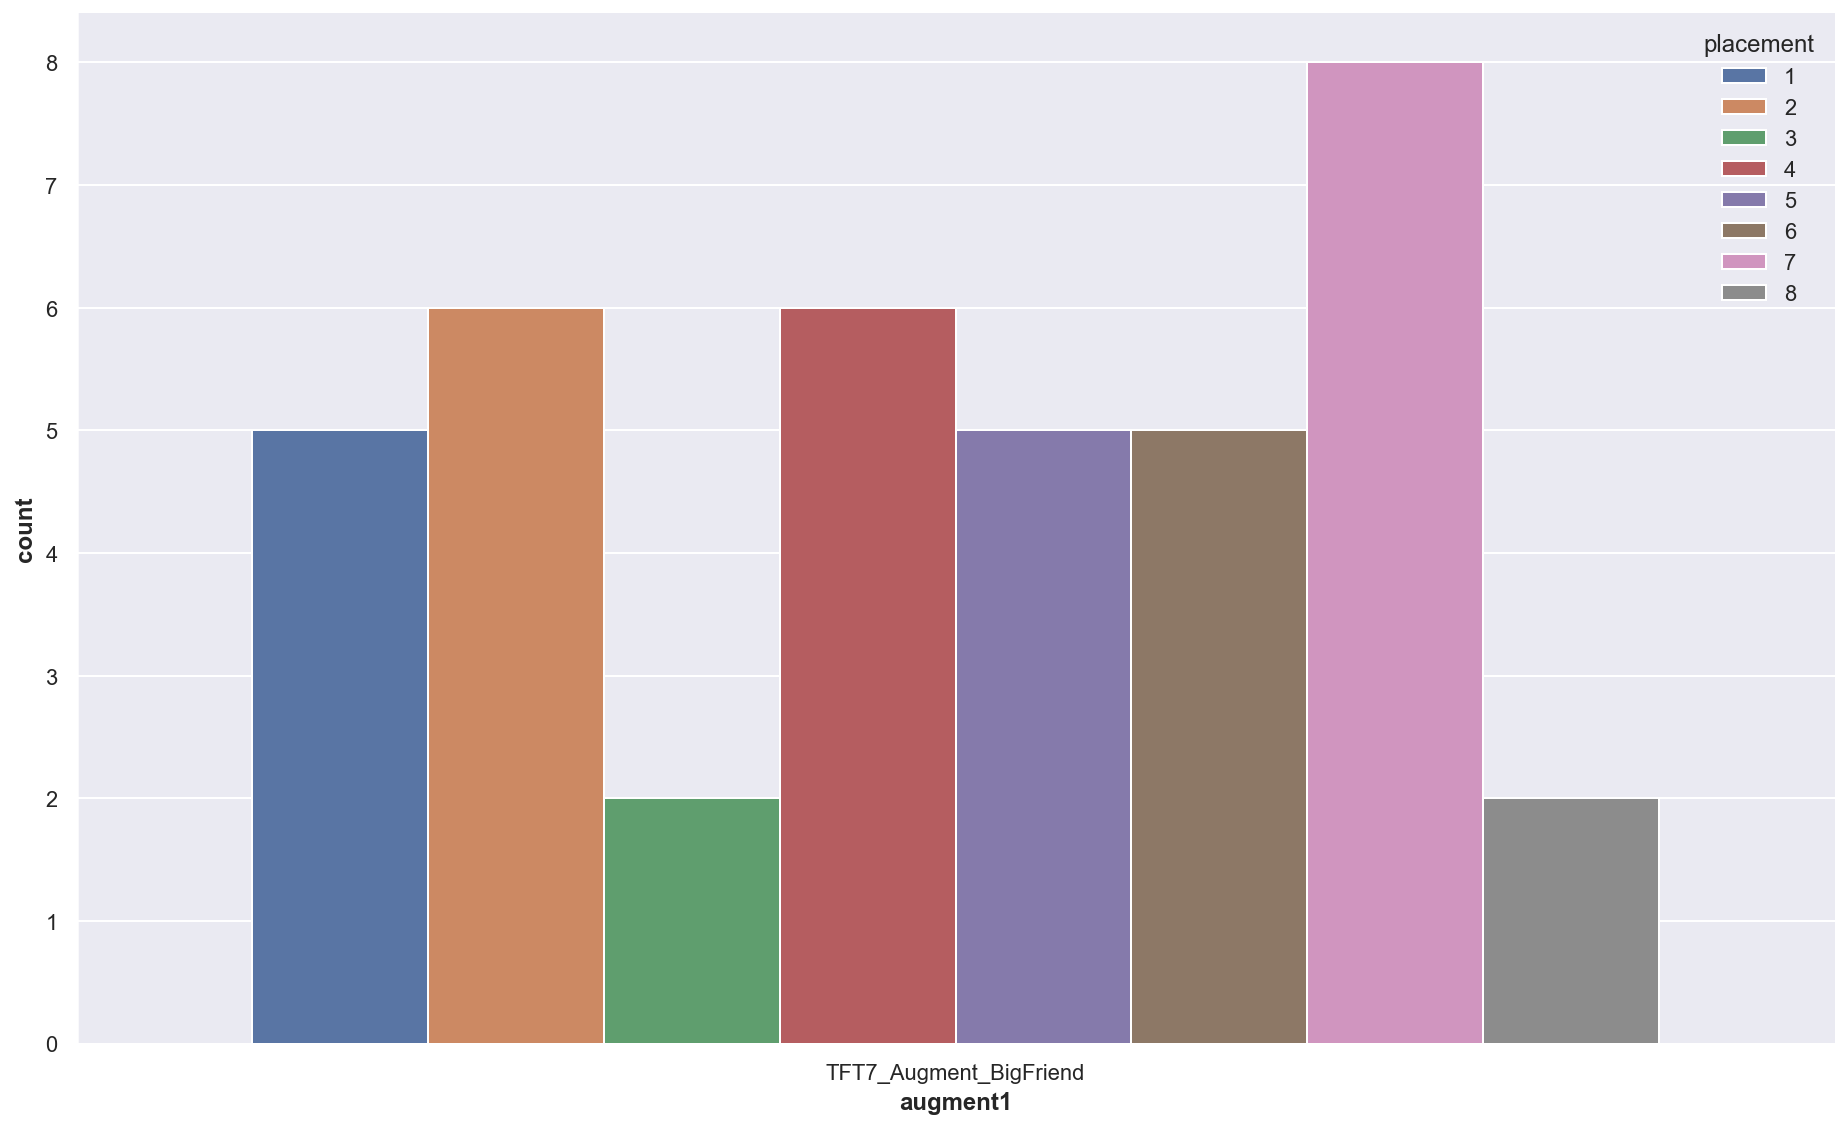

In [751]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment1']=='TFT7_Augment_BigFriend'], x='augment1', hue=TARGETNAME)
sns.despine()

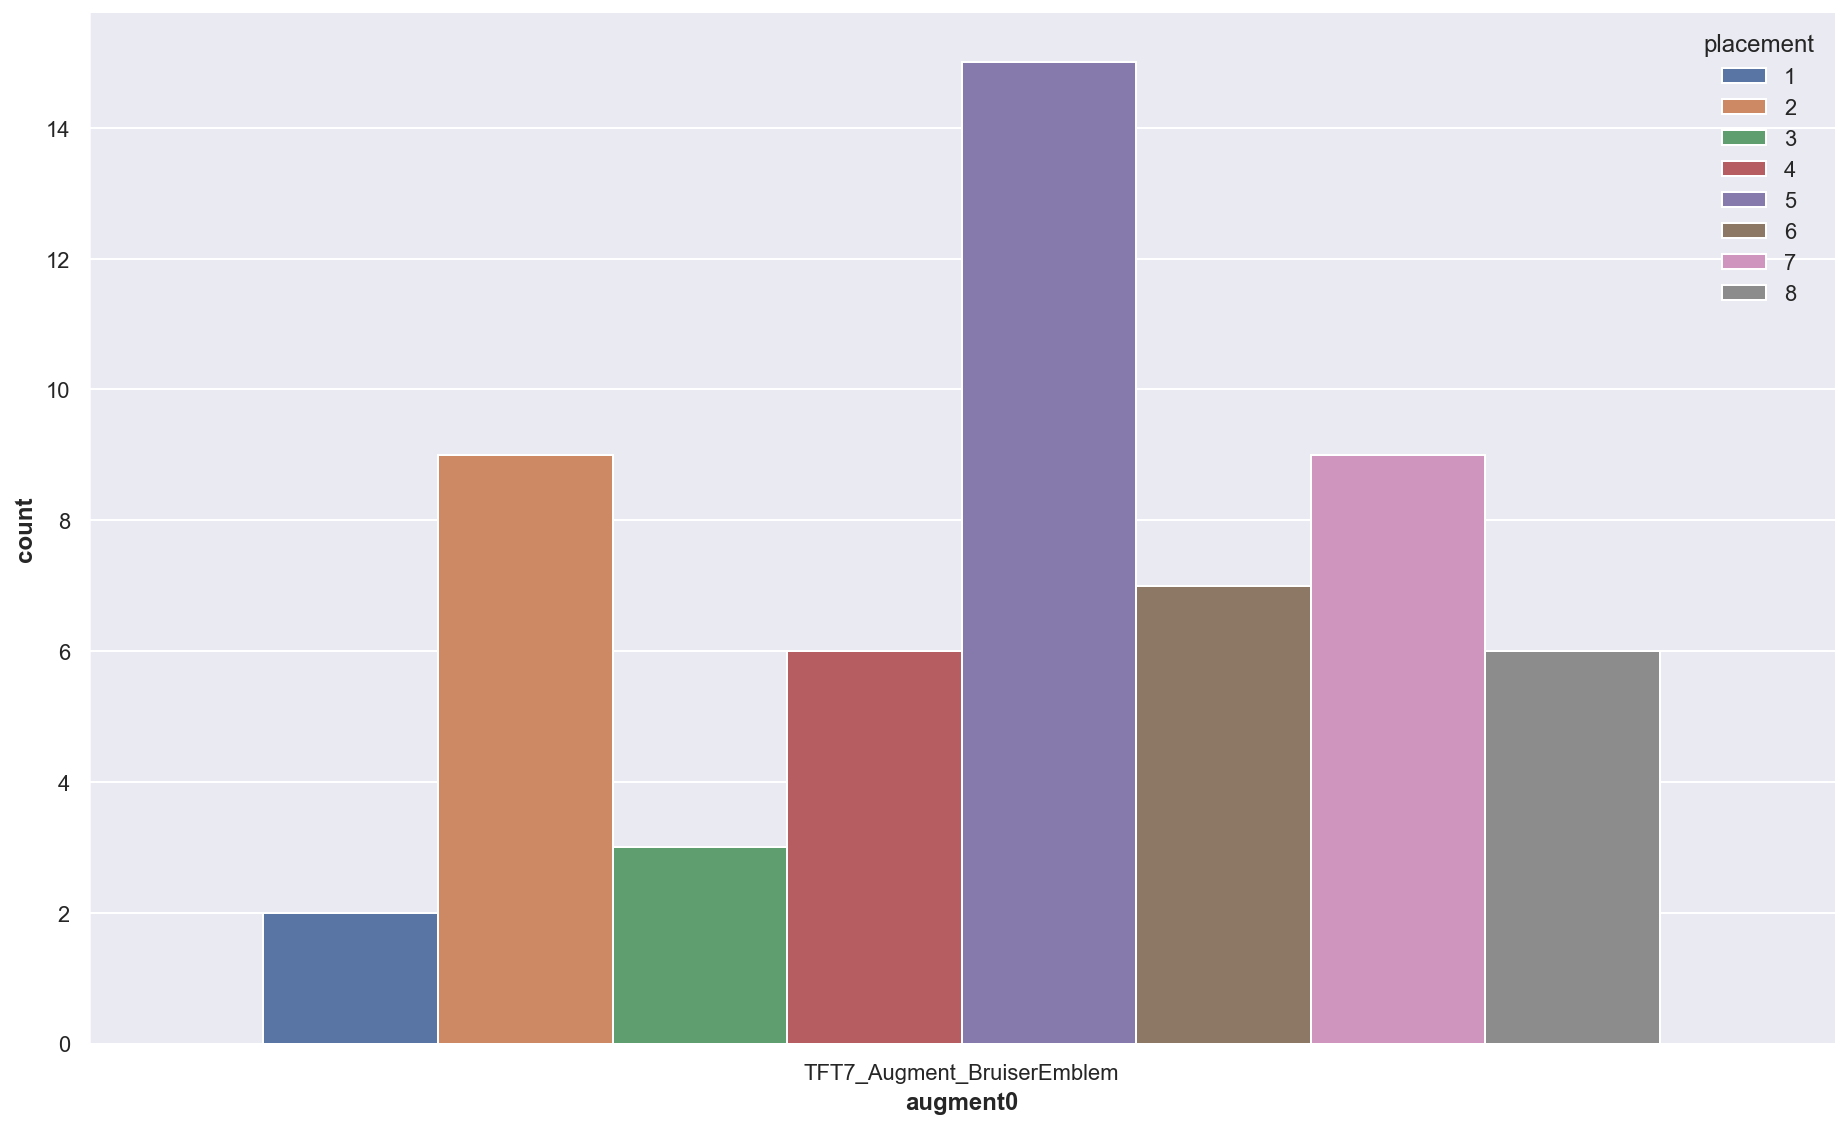

In [752]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserEmblem'], x='augment0', hue=TARGETNAME)
sns.despine()

Do not pick TFT6_Augment_WindfallPlusPlus.

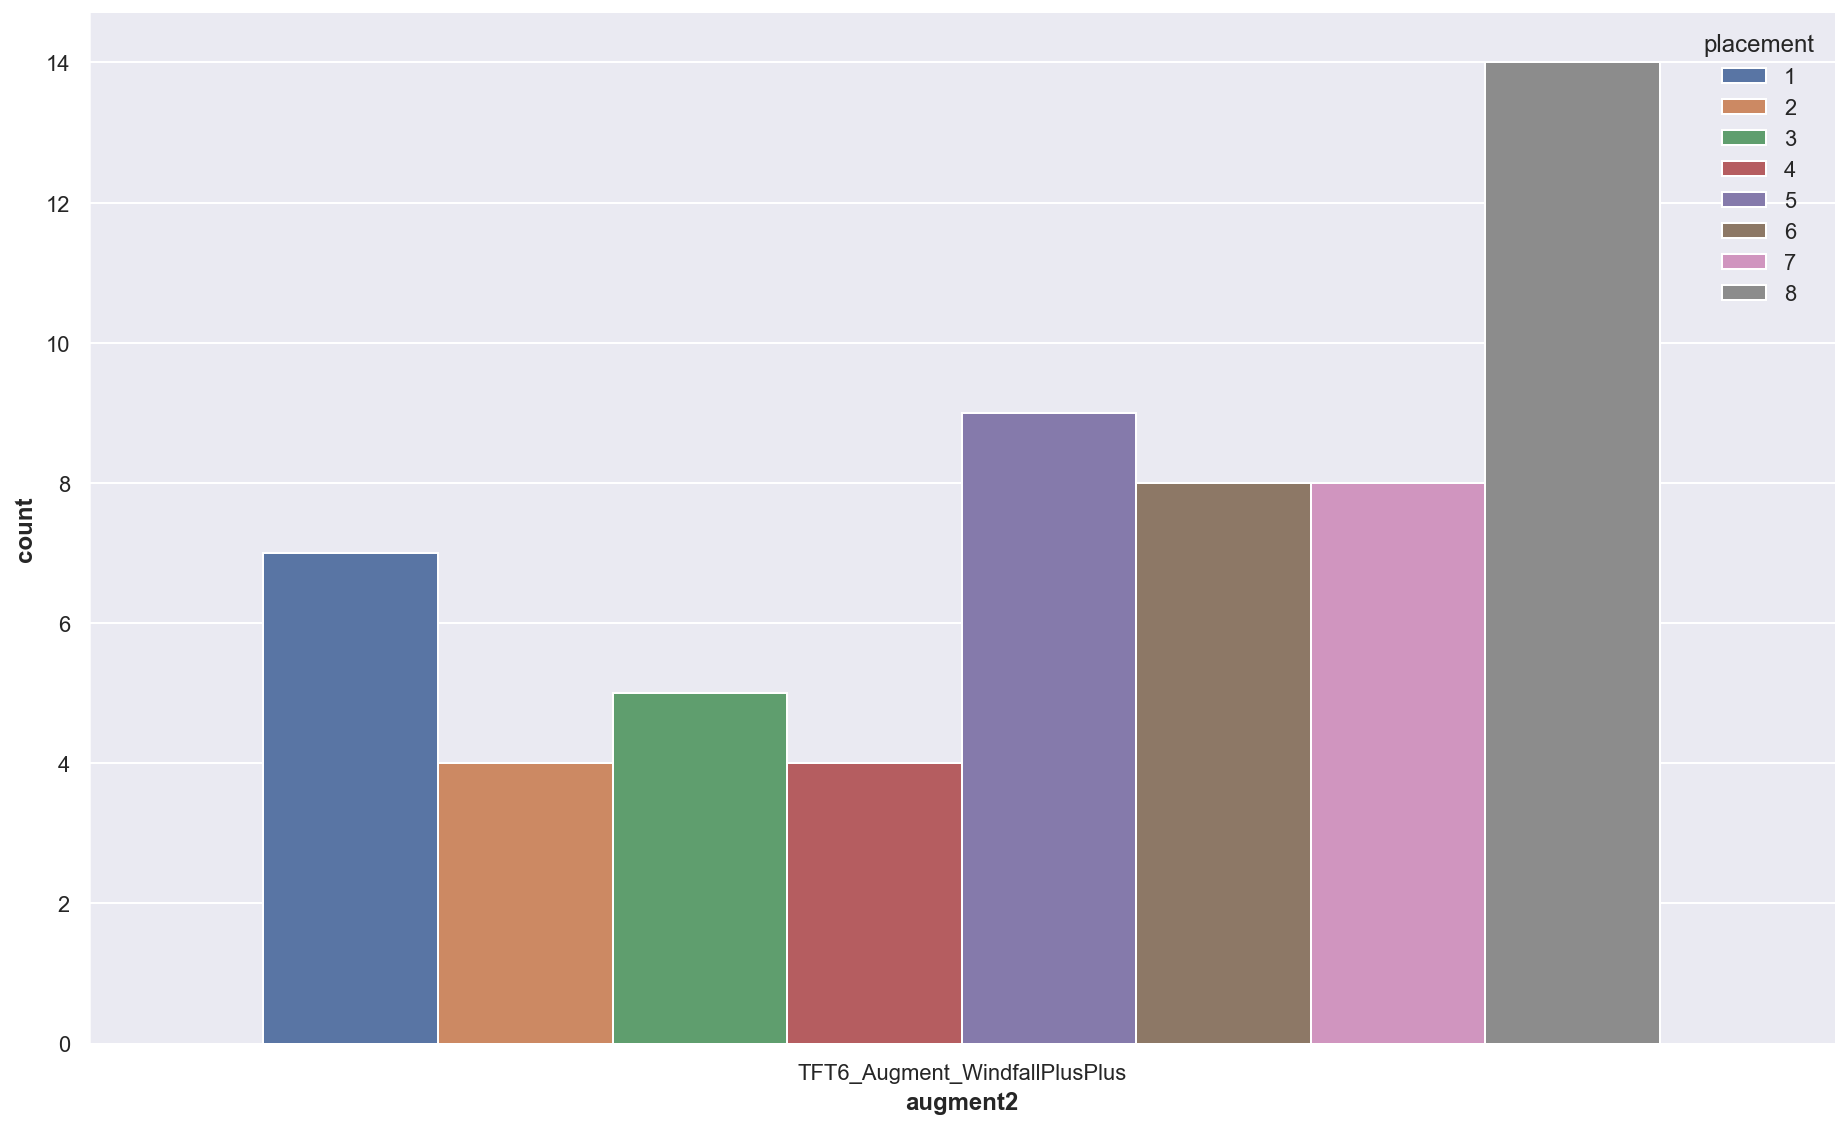

In [753]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_WindfallPlusPlus'], x='augment2', hue=TARGETNAME)
sns.despine()

Augment TFT6_Augment_CyberneticImplants2 is a good pick.

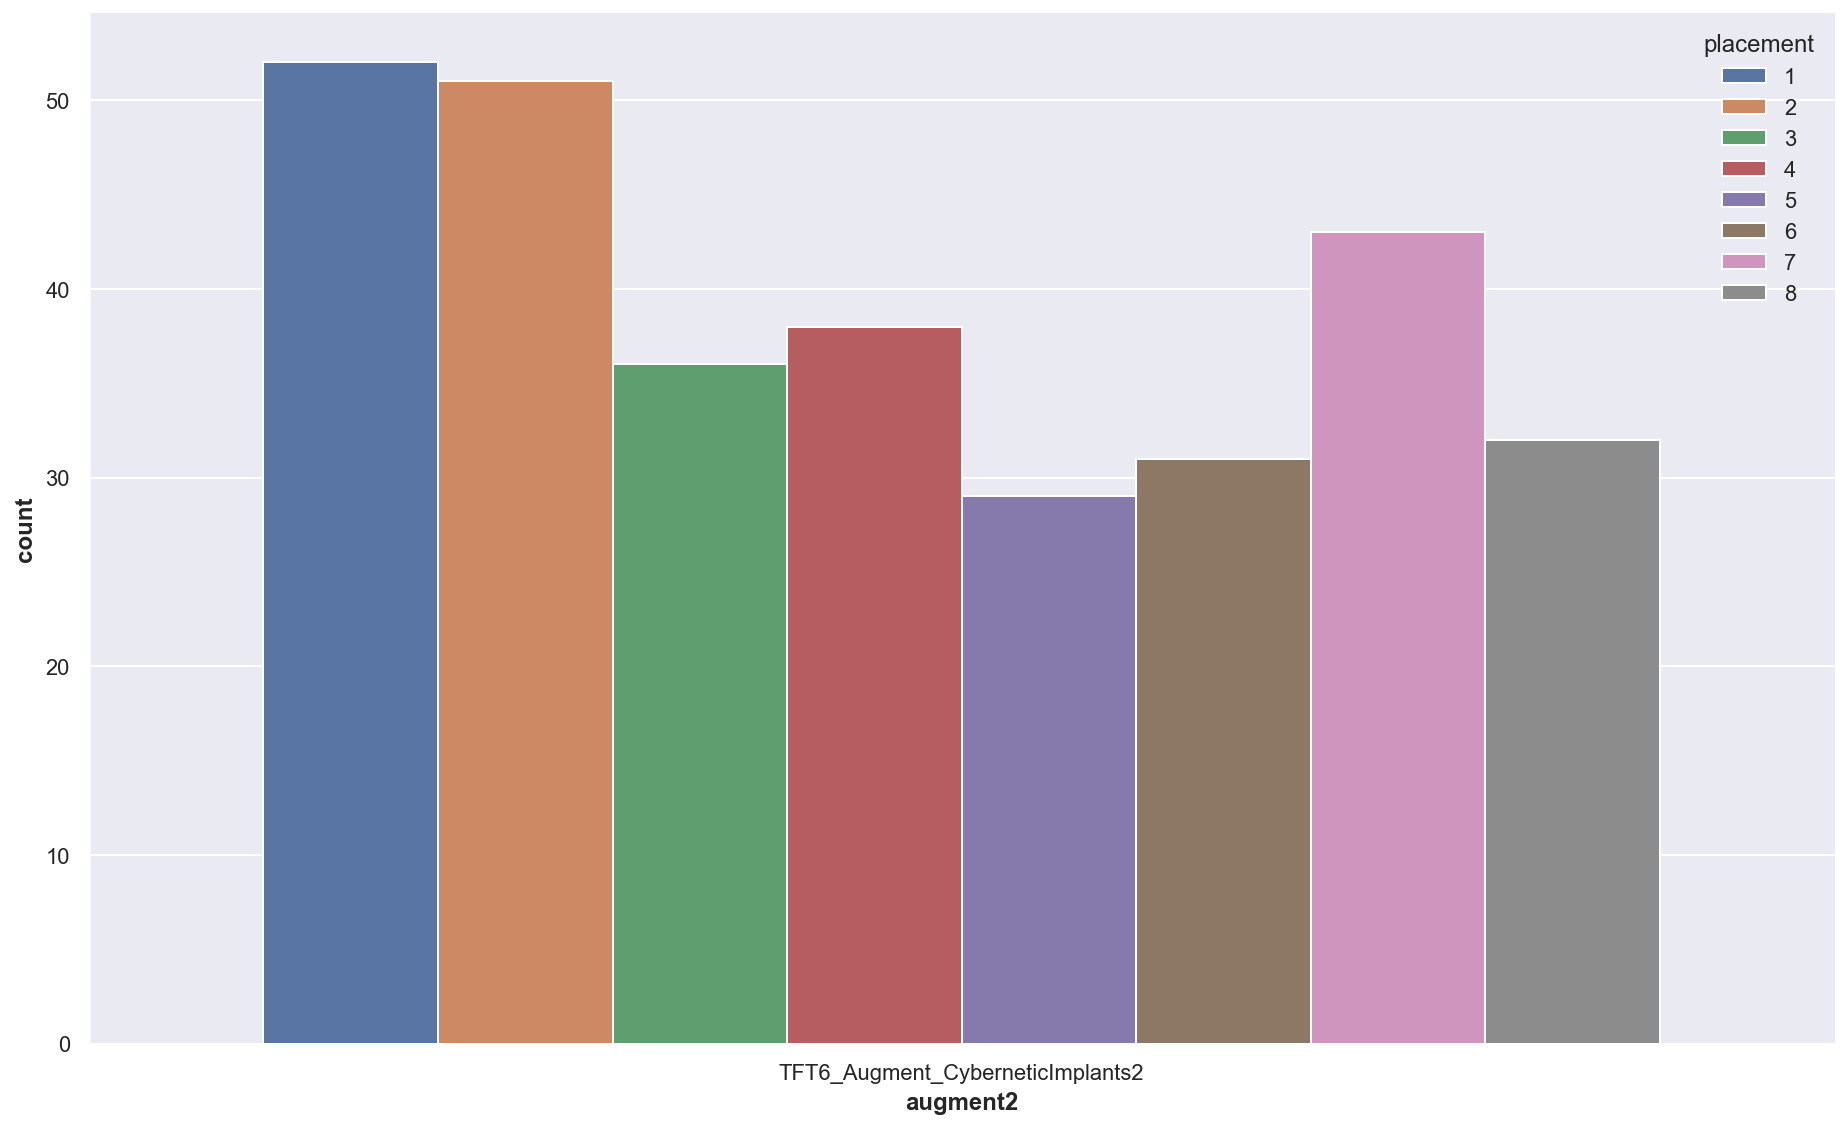

In [754]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_CyberneticImplants2'], x='augment2', hue=TARGETNAME)
sns.despine()

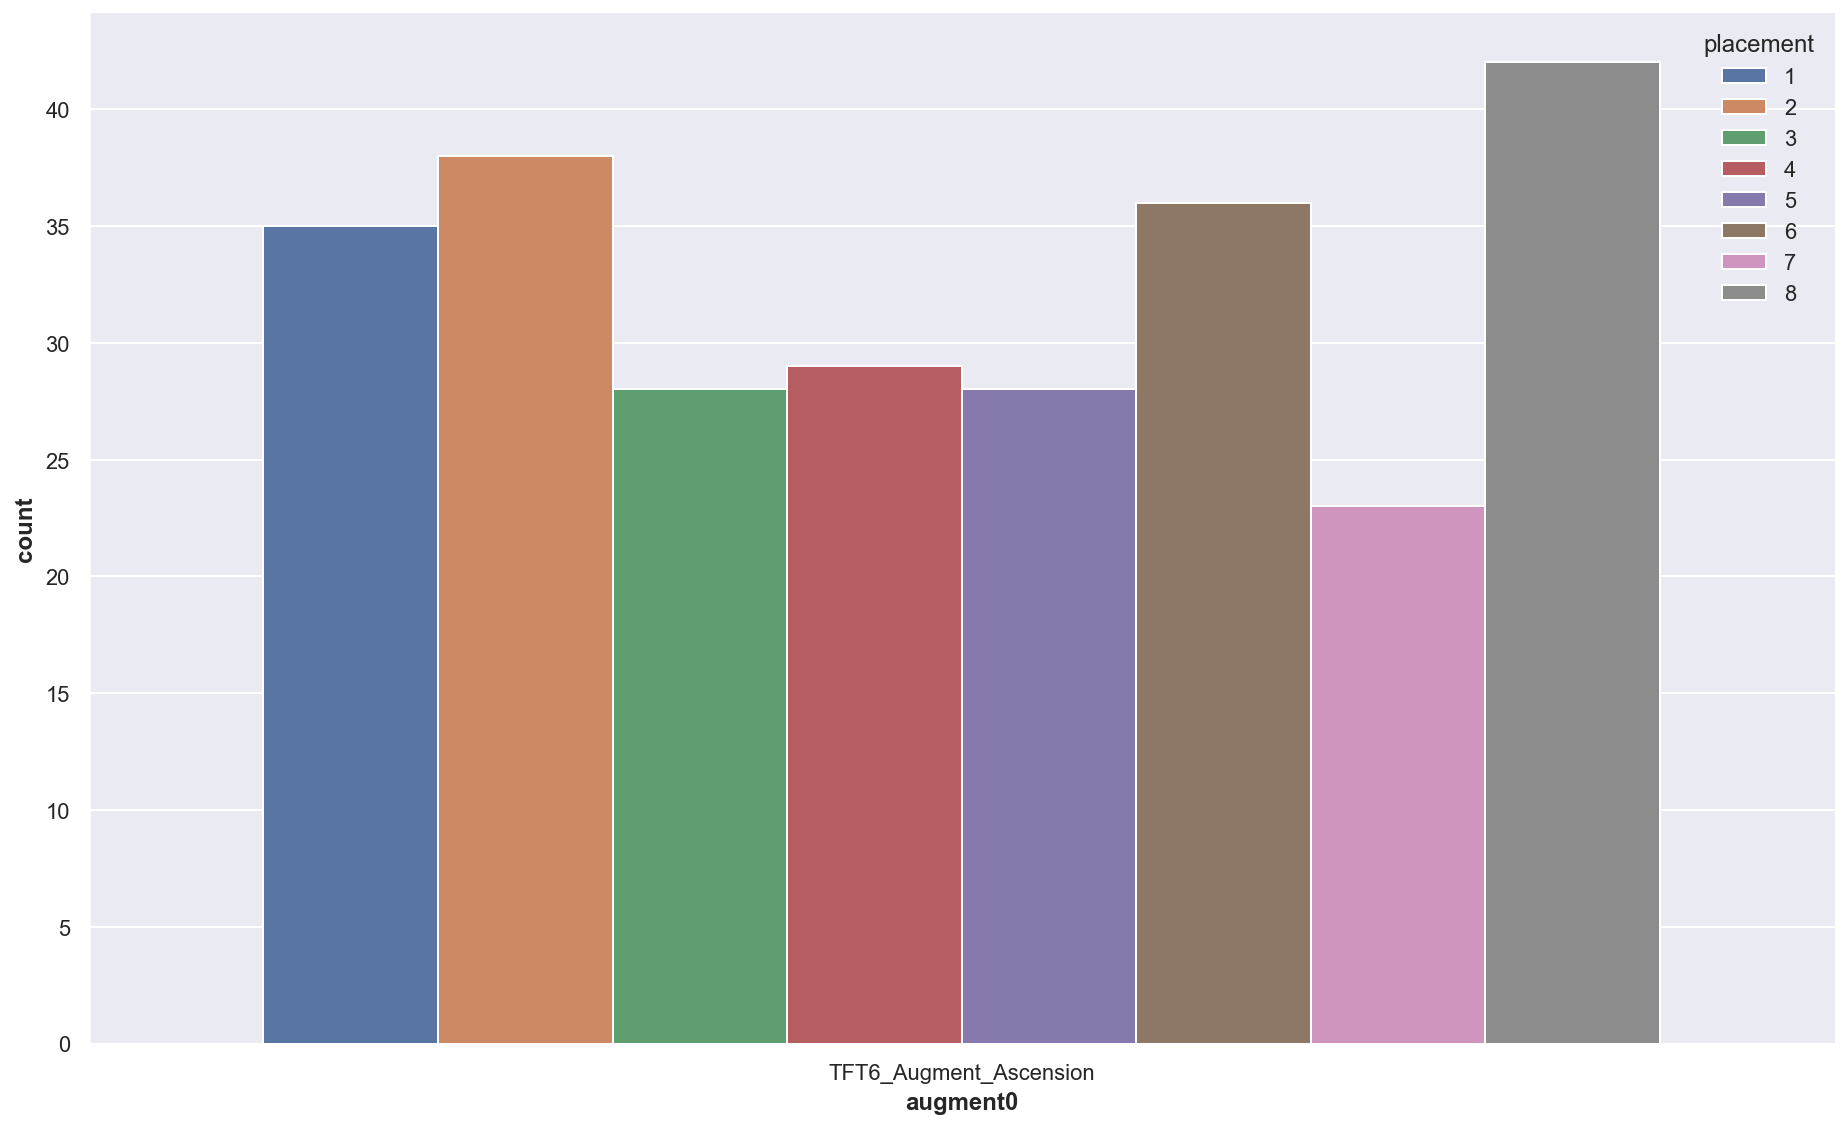

In [755]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Ascension'], x='augment0', hue=TARGETNAME)
sns.despine()

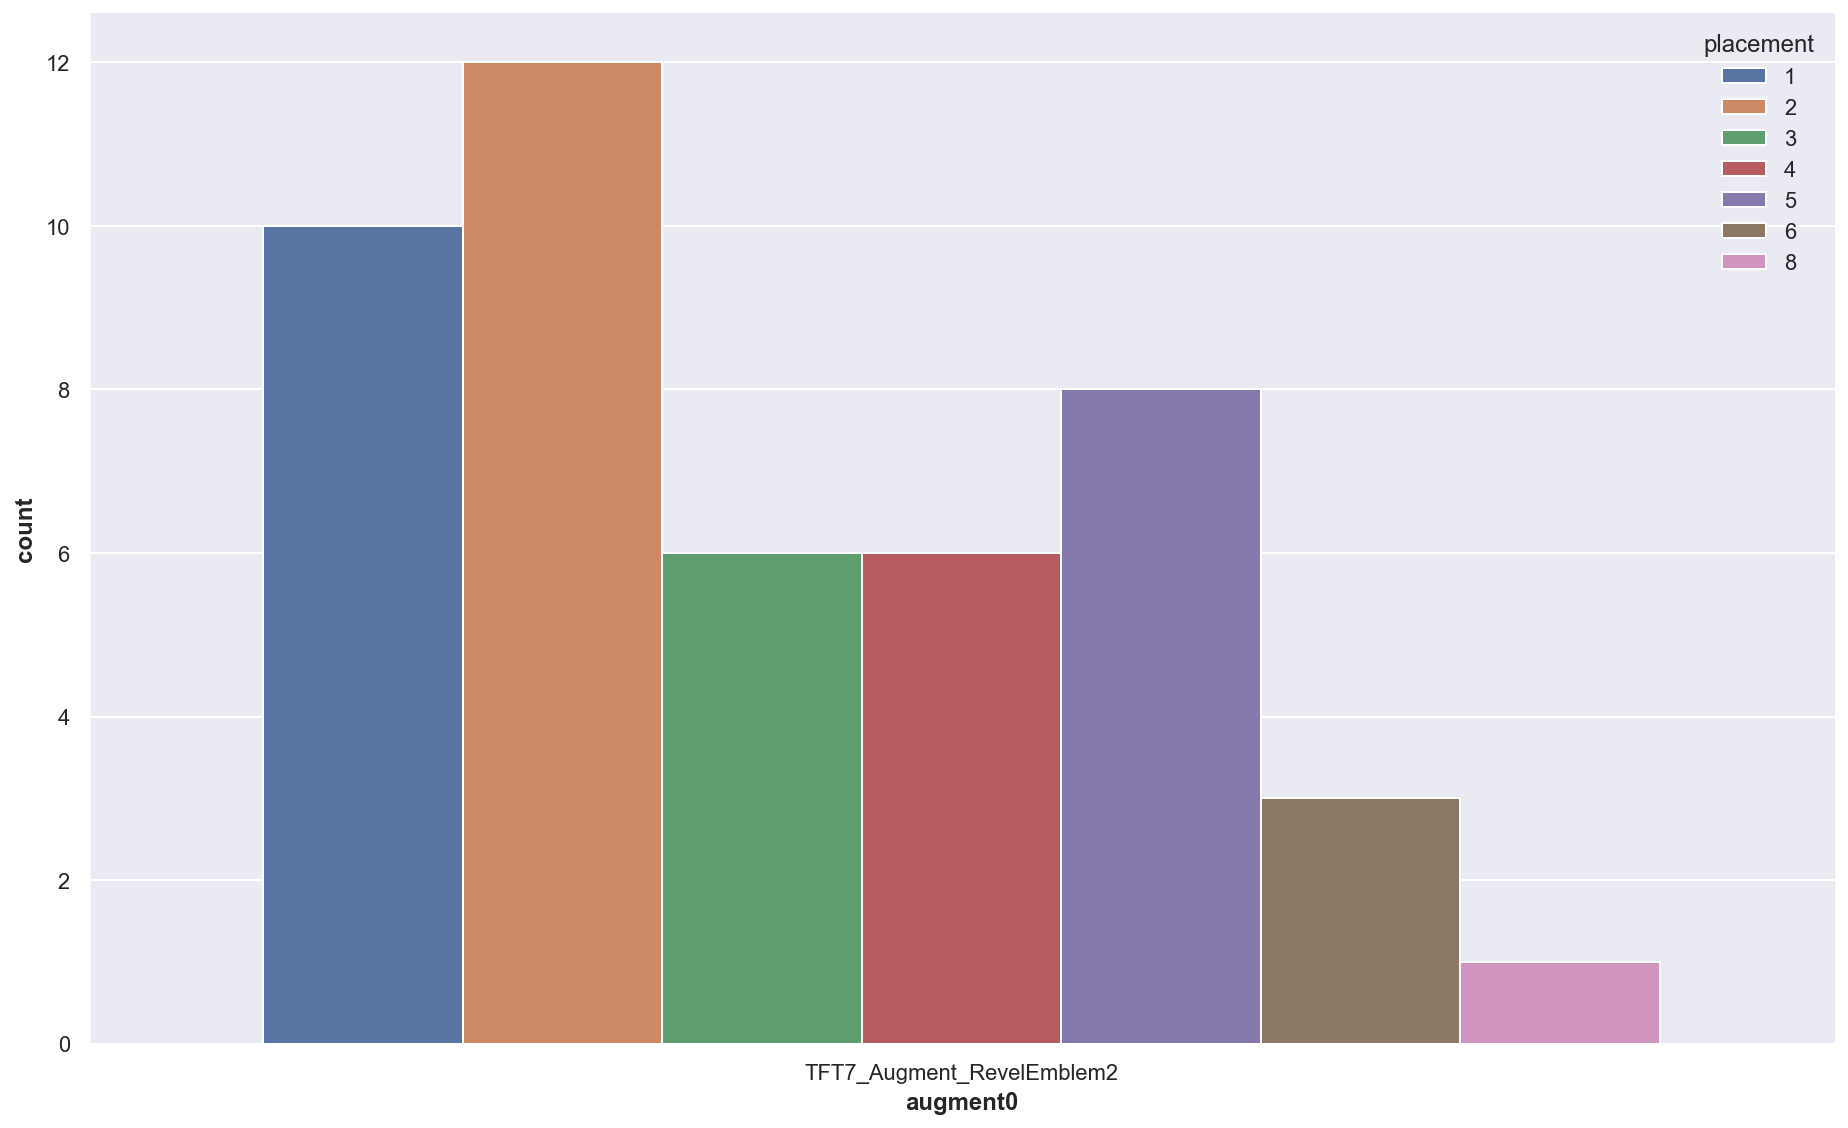

In [756]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_RevelEmblem2'], x='augment0', hue=TARGETNAME)
sns.despine()

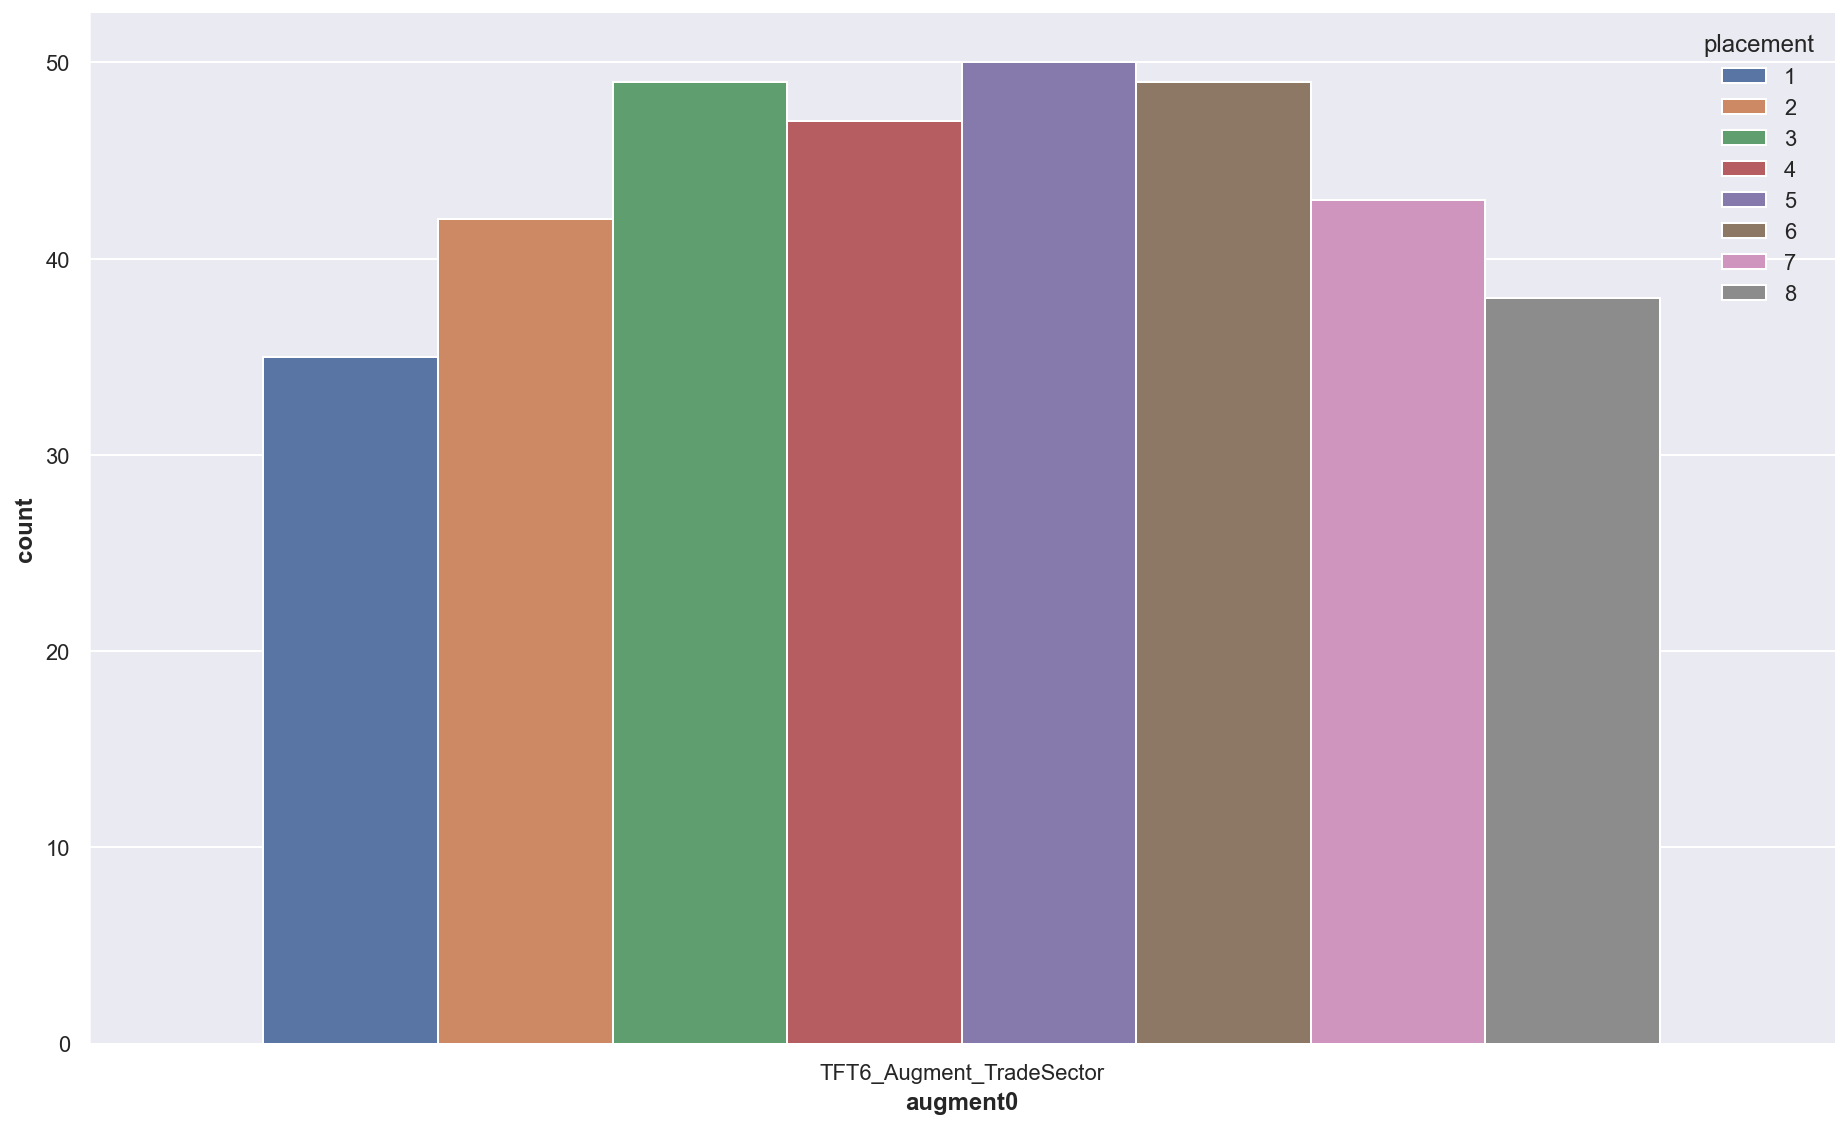

In [757]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_TradeSector'], x='augment0', hue=TARGETNAME)
sns.despine()

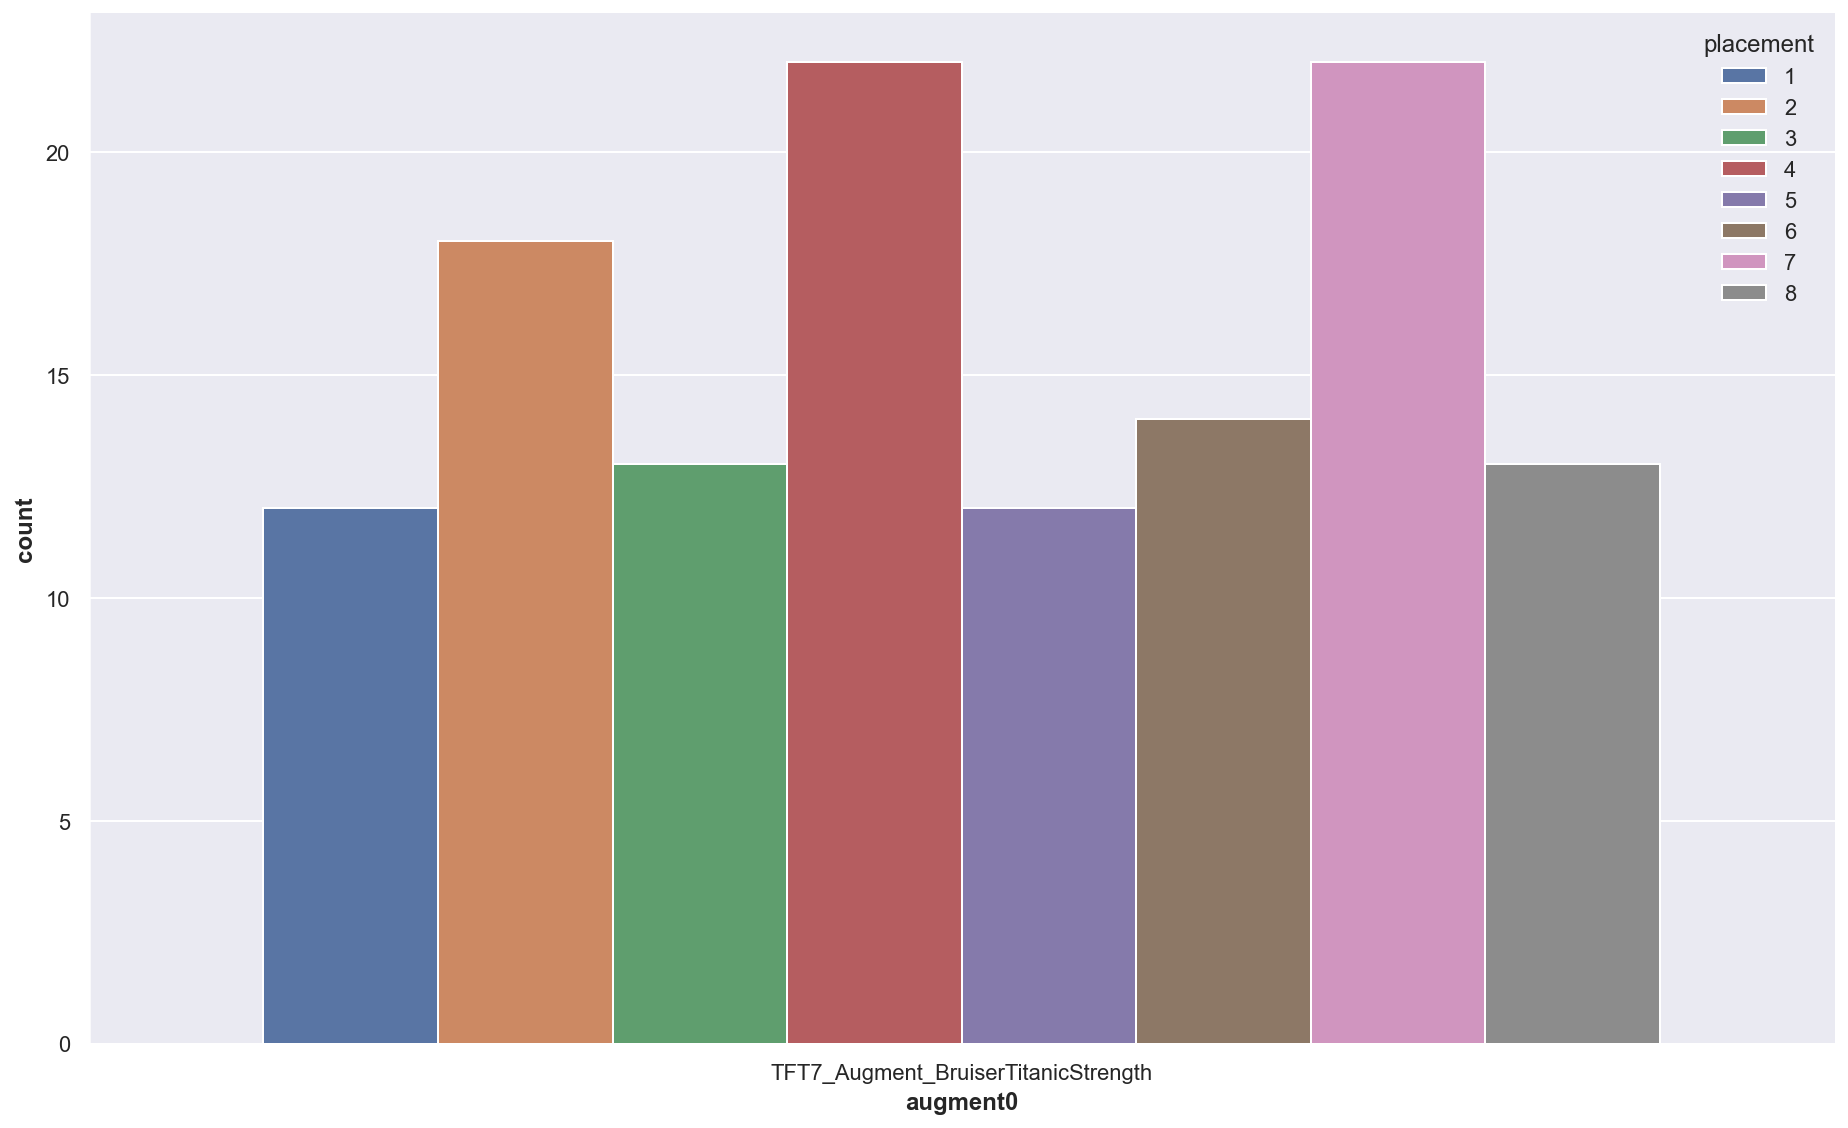

In [758]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserTitanicStrength'], x='augment0', hue=TARGETNAME)
sns.despine()

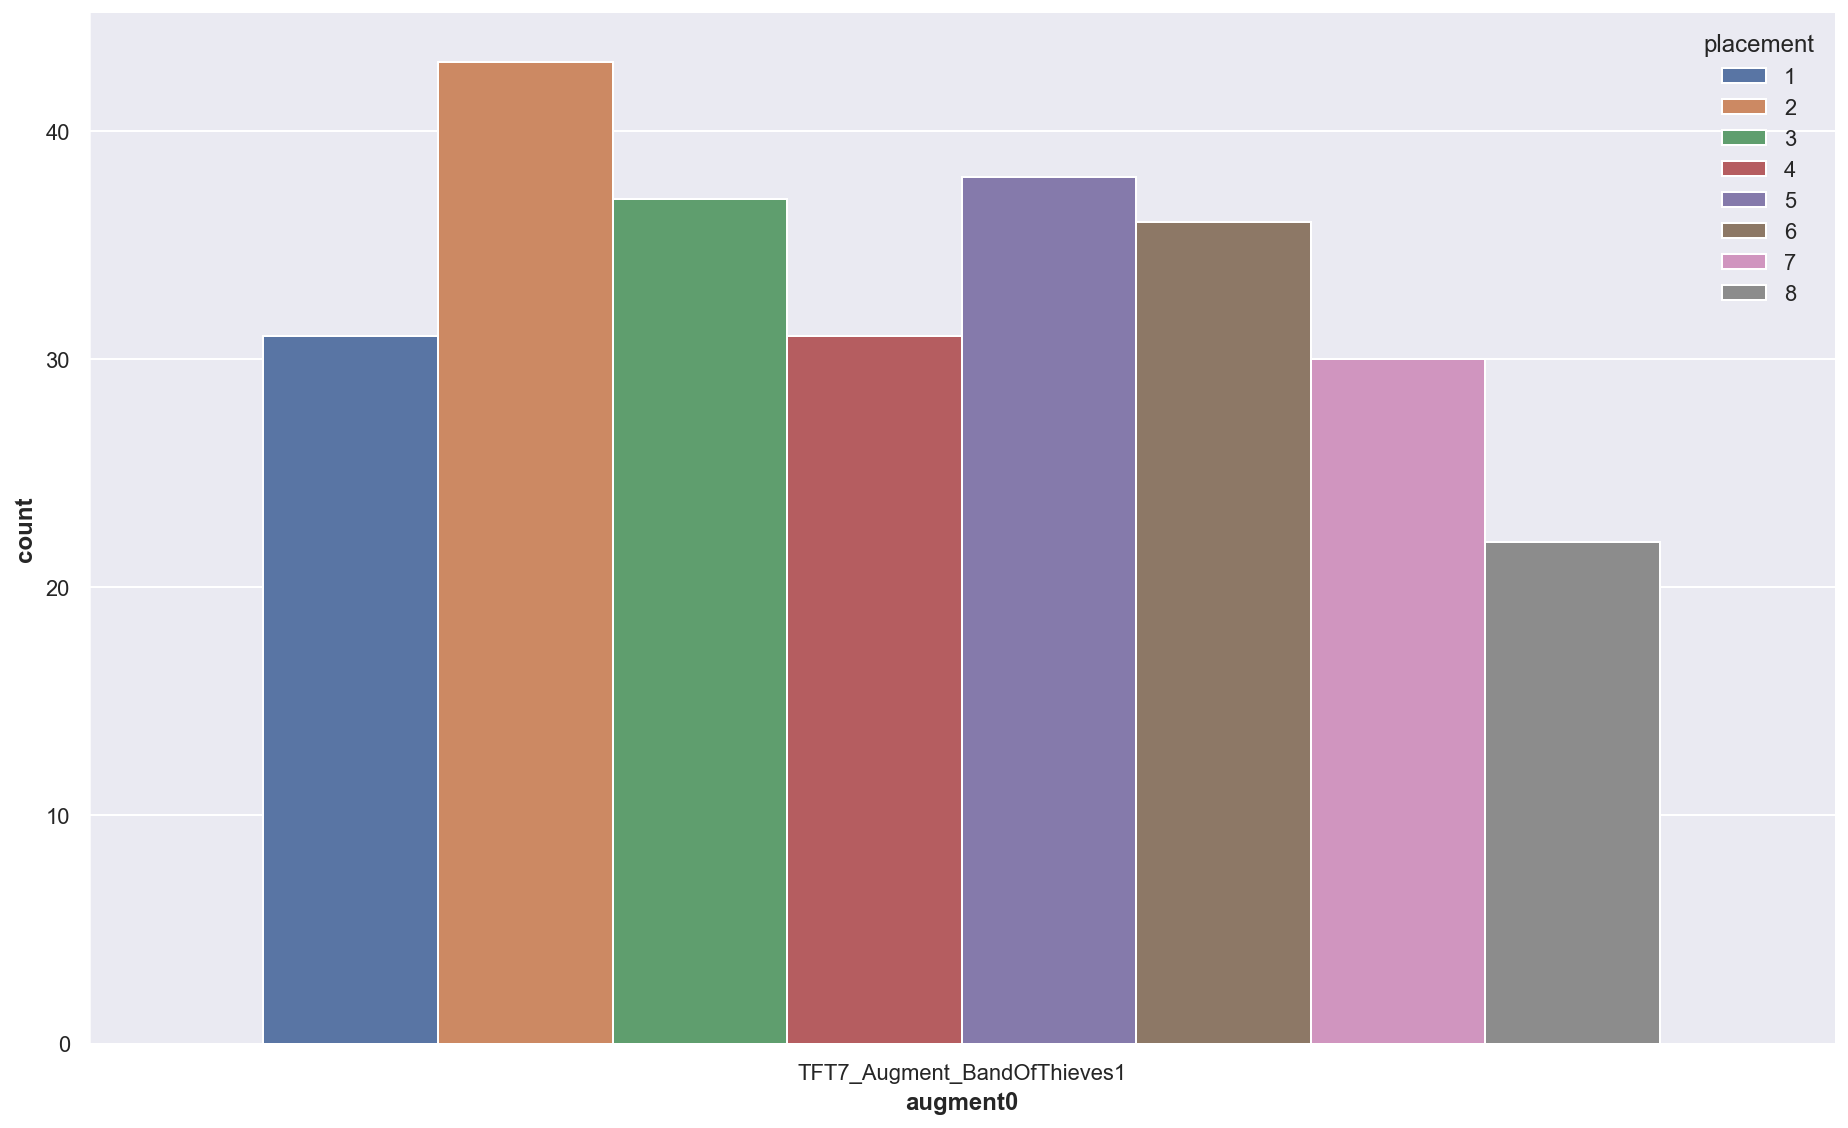

In [759]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BandOfThieves1'], x='augment0', hue=TARGETNAME)
sns.despine()

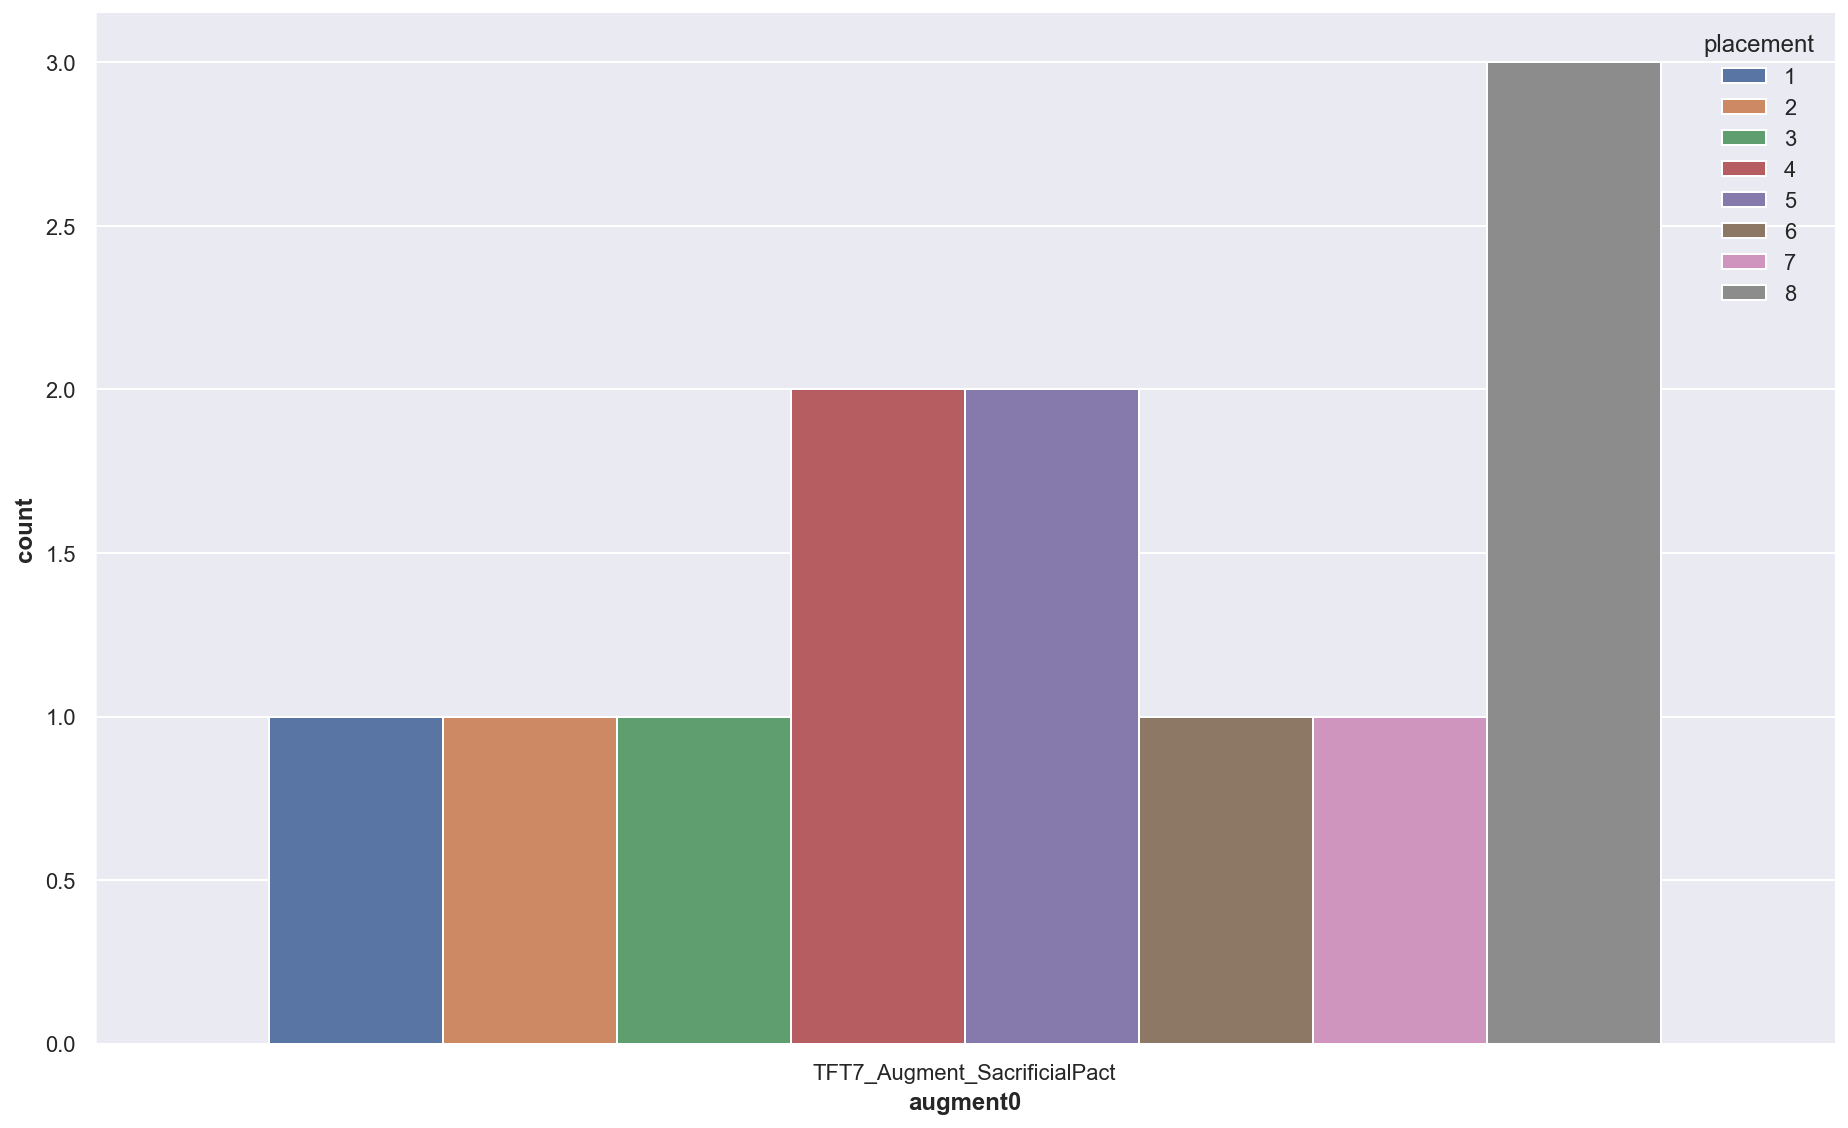

In [760]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_SacrificialPact'], x='augment0', hue=TARGETNAME)
sns.despine()

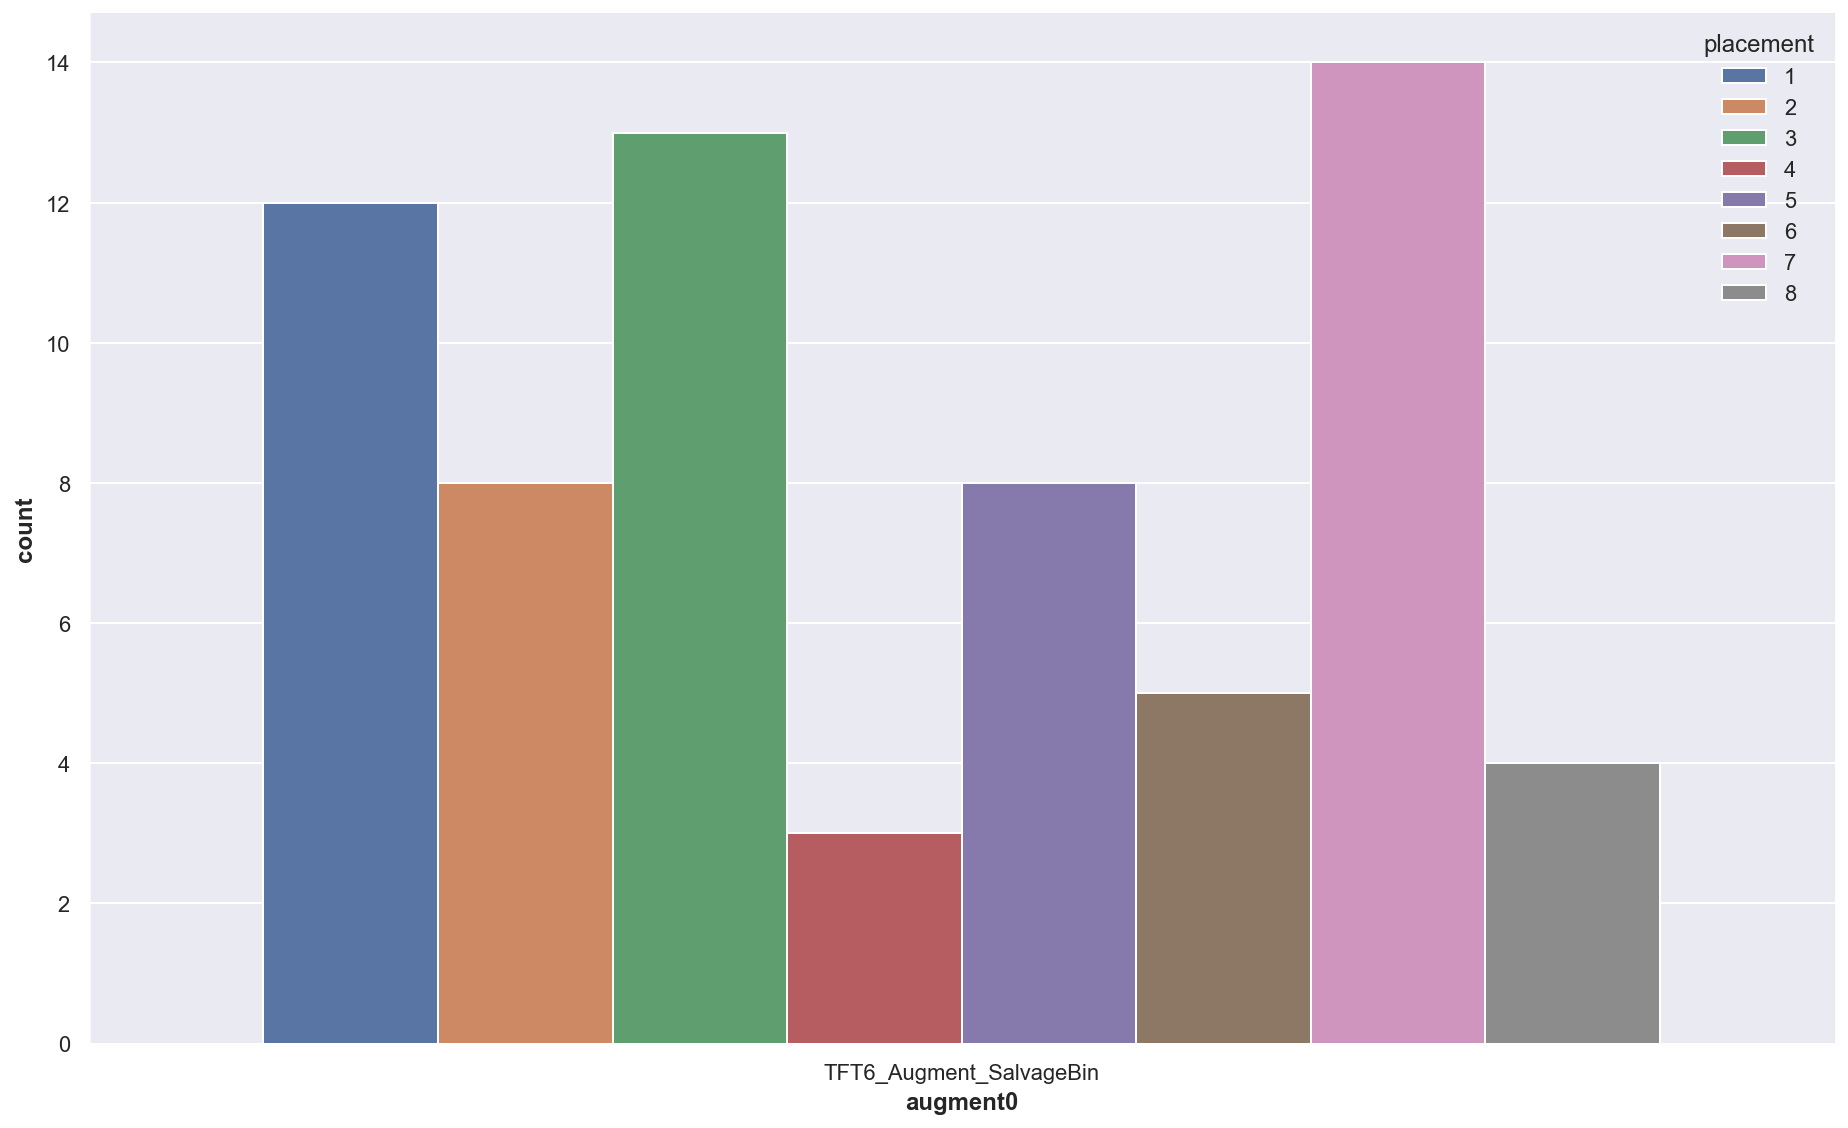

In [761]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_SalvageBin'], x='augment0', hue=TARGETNAME)
sns.despine()

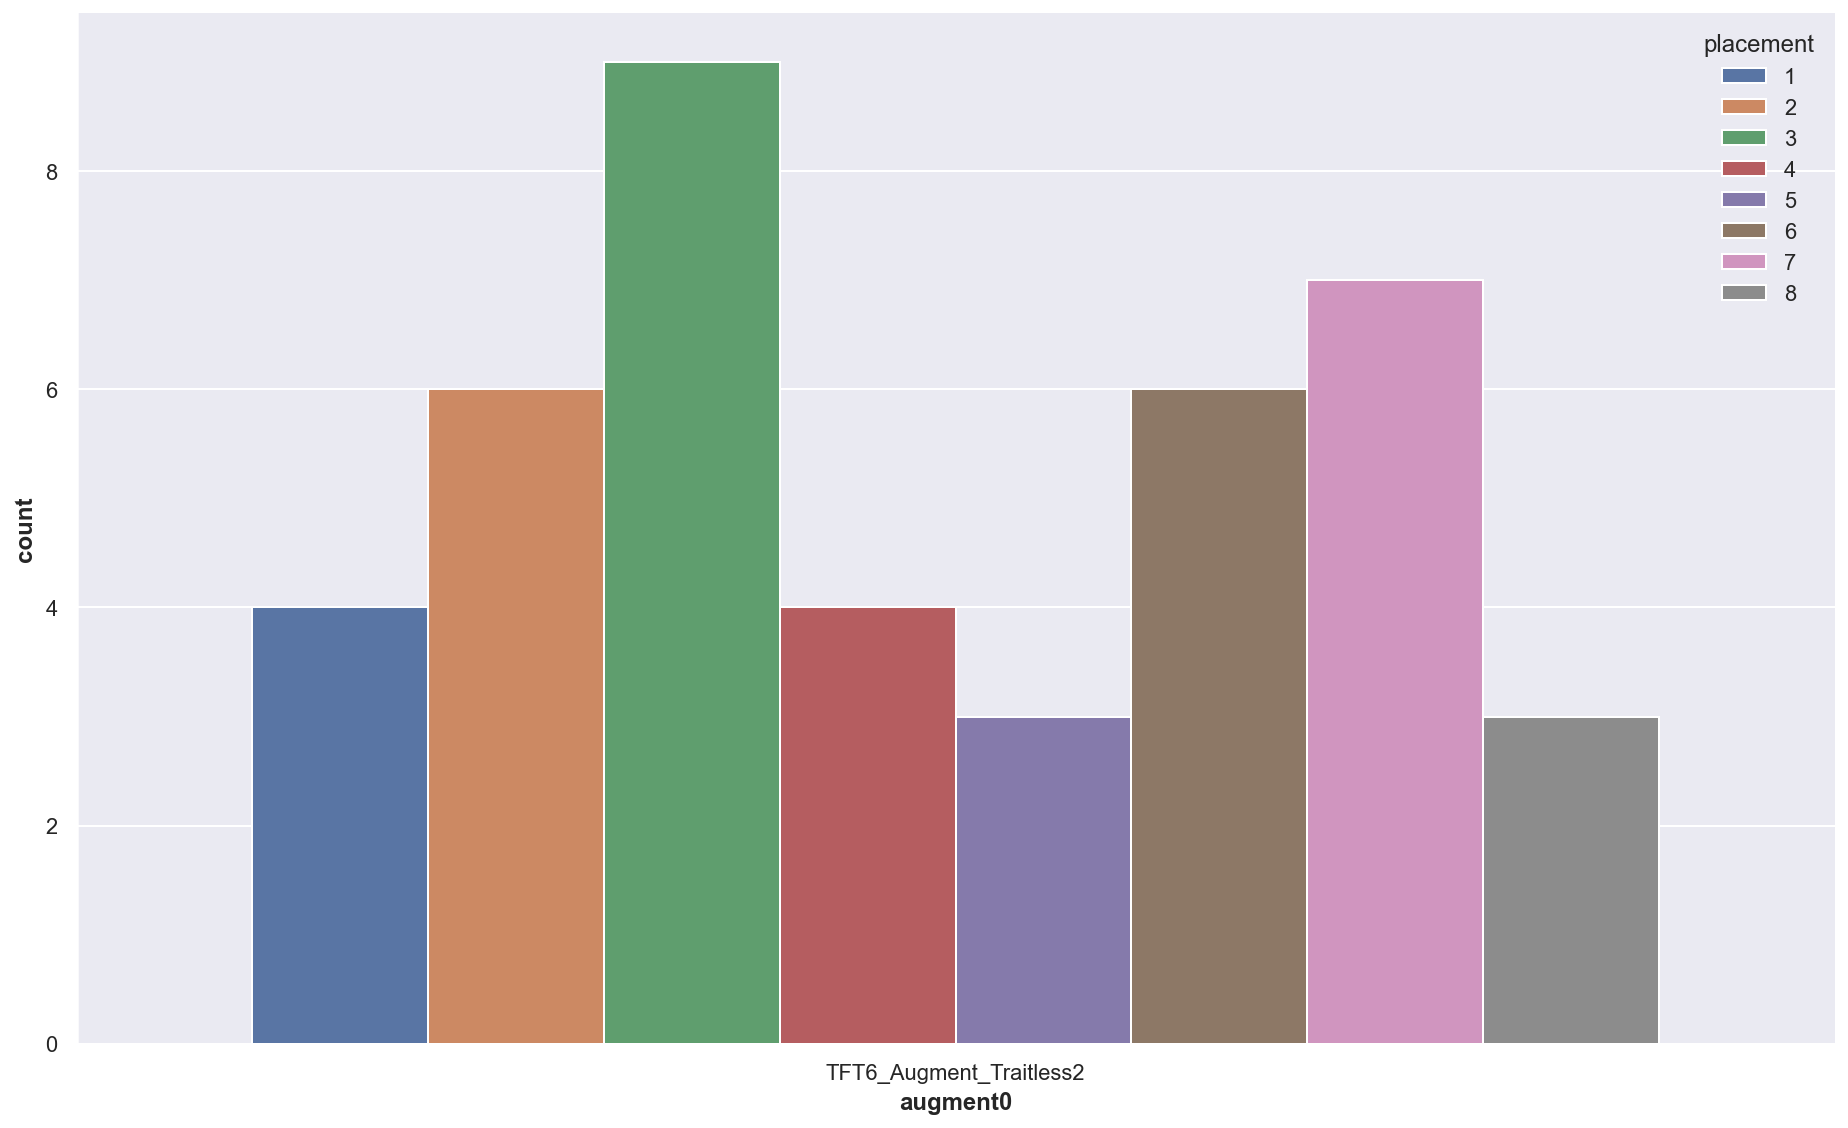

In [762]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Traitless2'], x='augment0', hue=TARGETNAME)
sns.despine()

No Good.

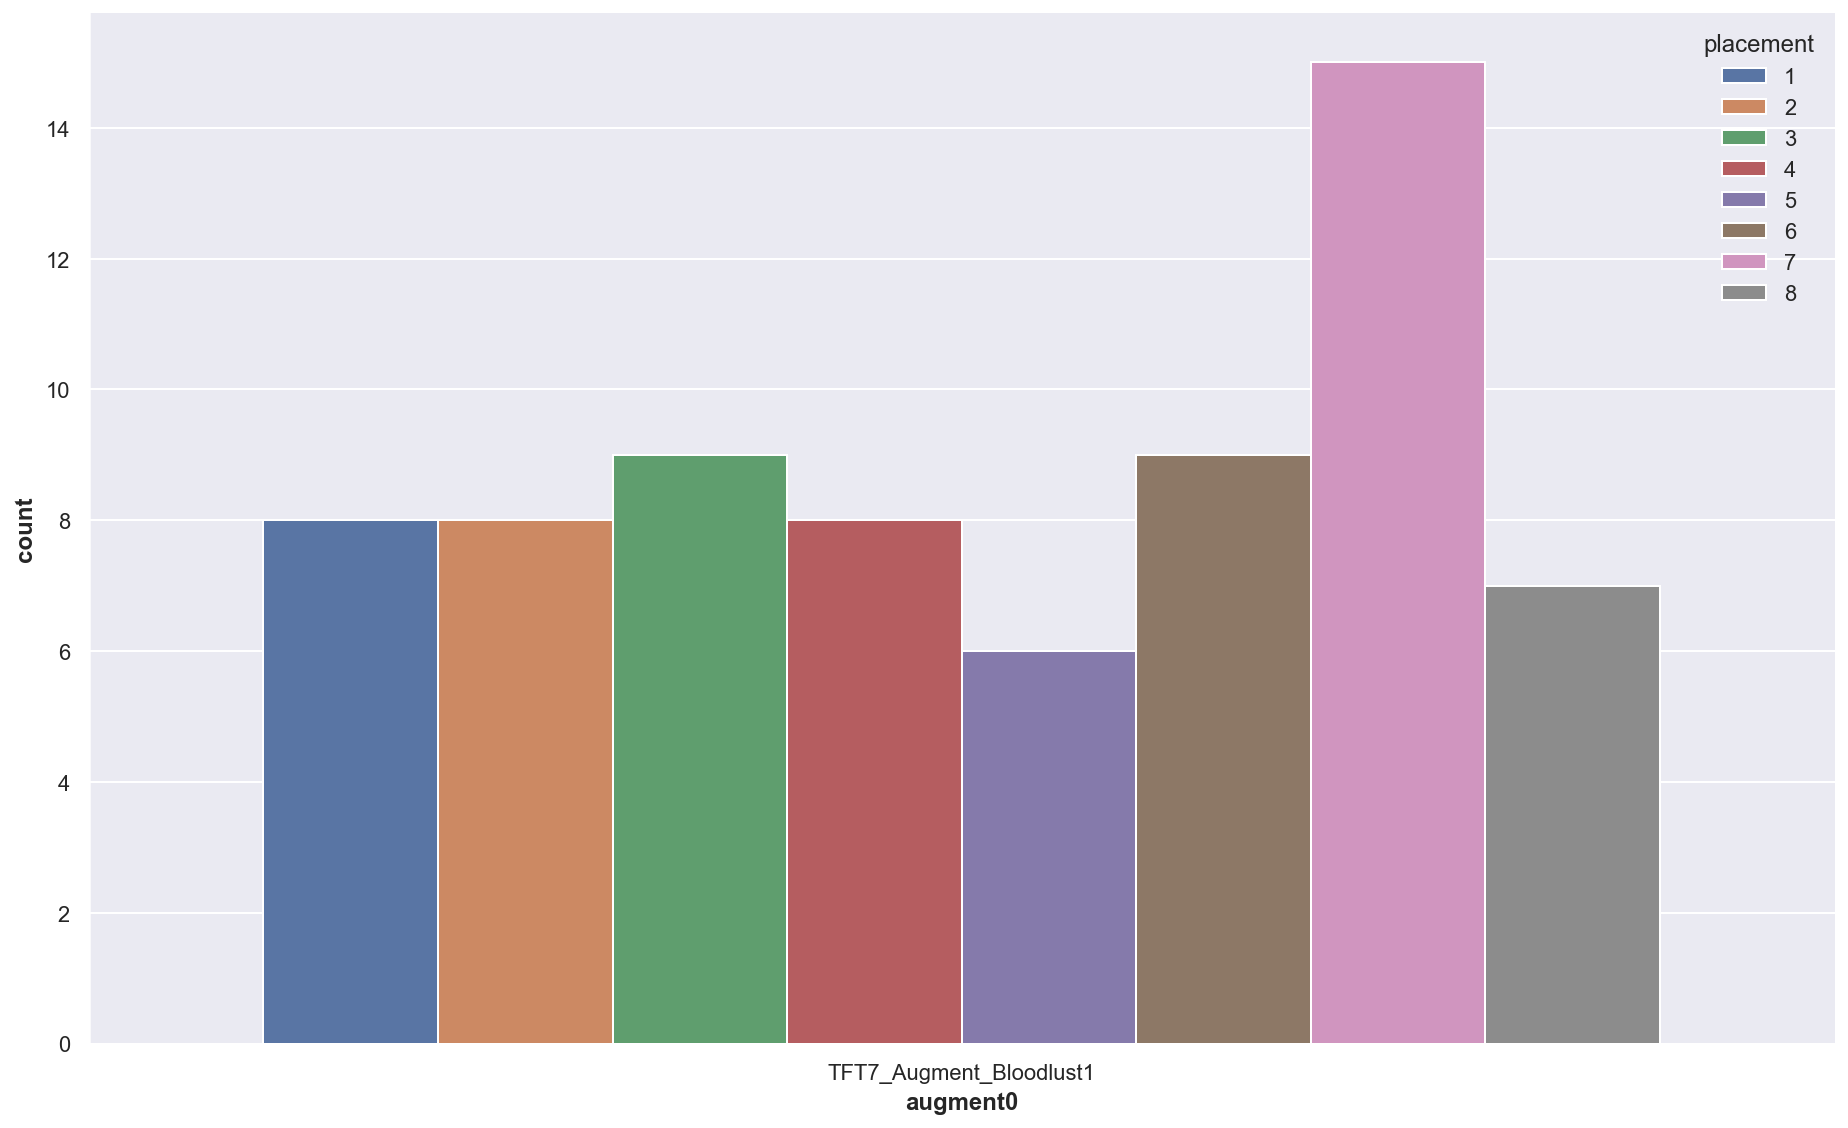

In [763]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_Bloodlust1'], x='augment0', hue=TARGETNAME)
sns.despine()

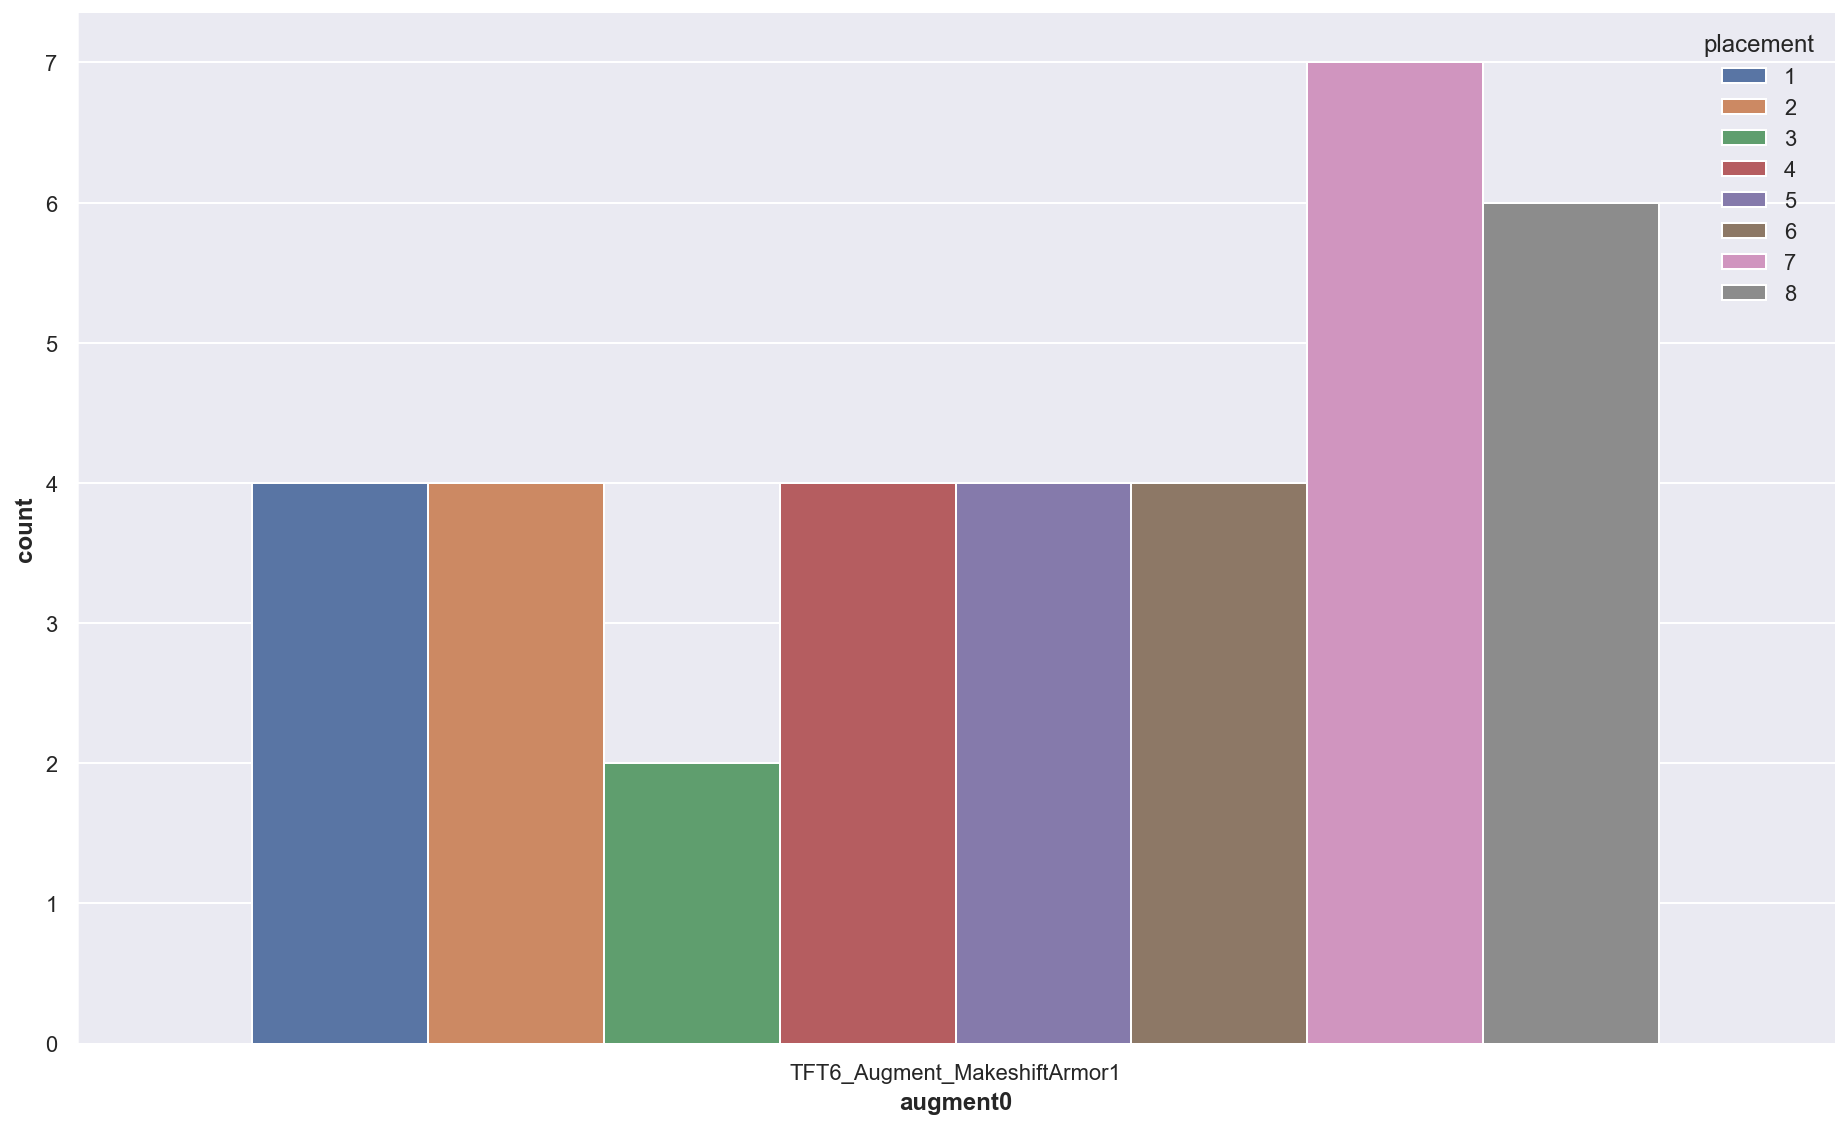

In [764]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor1'], x='augment0', hue=TARGETNAME)
sns.despine()

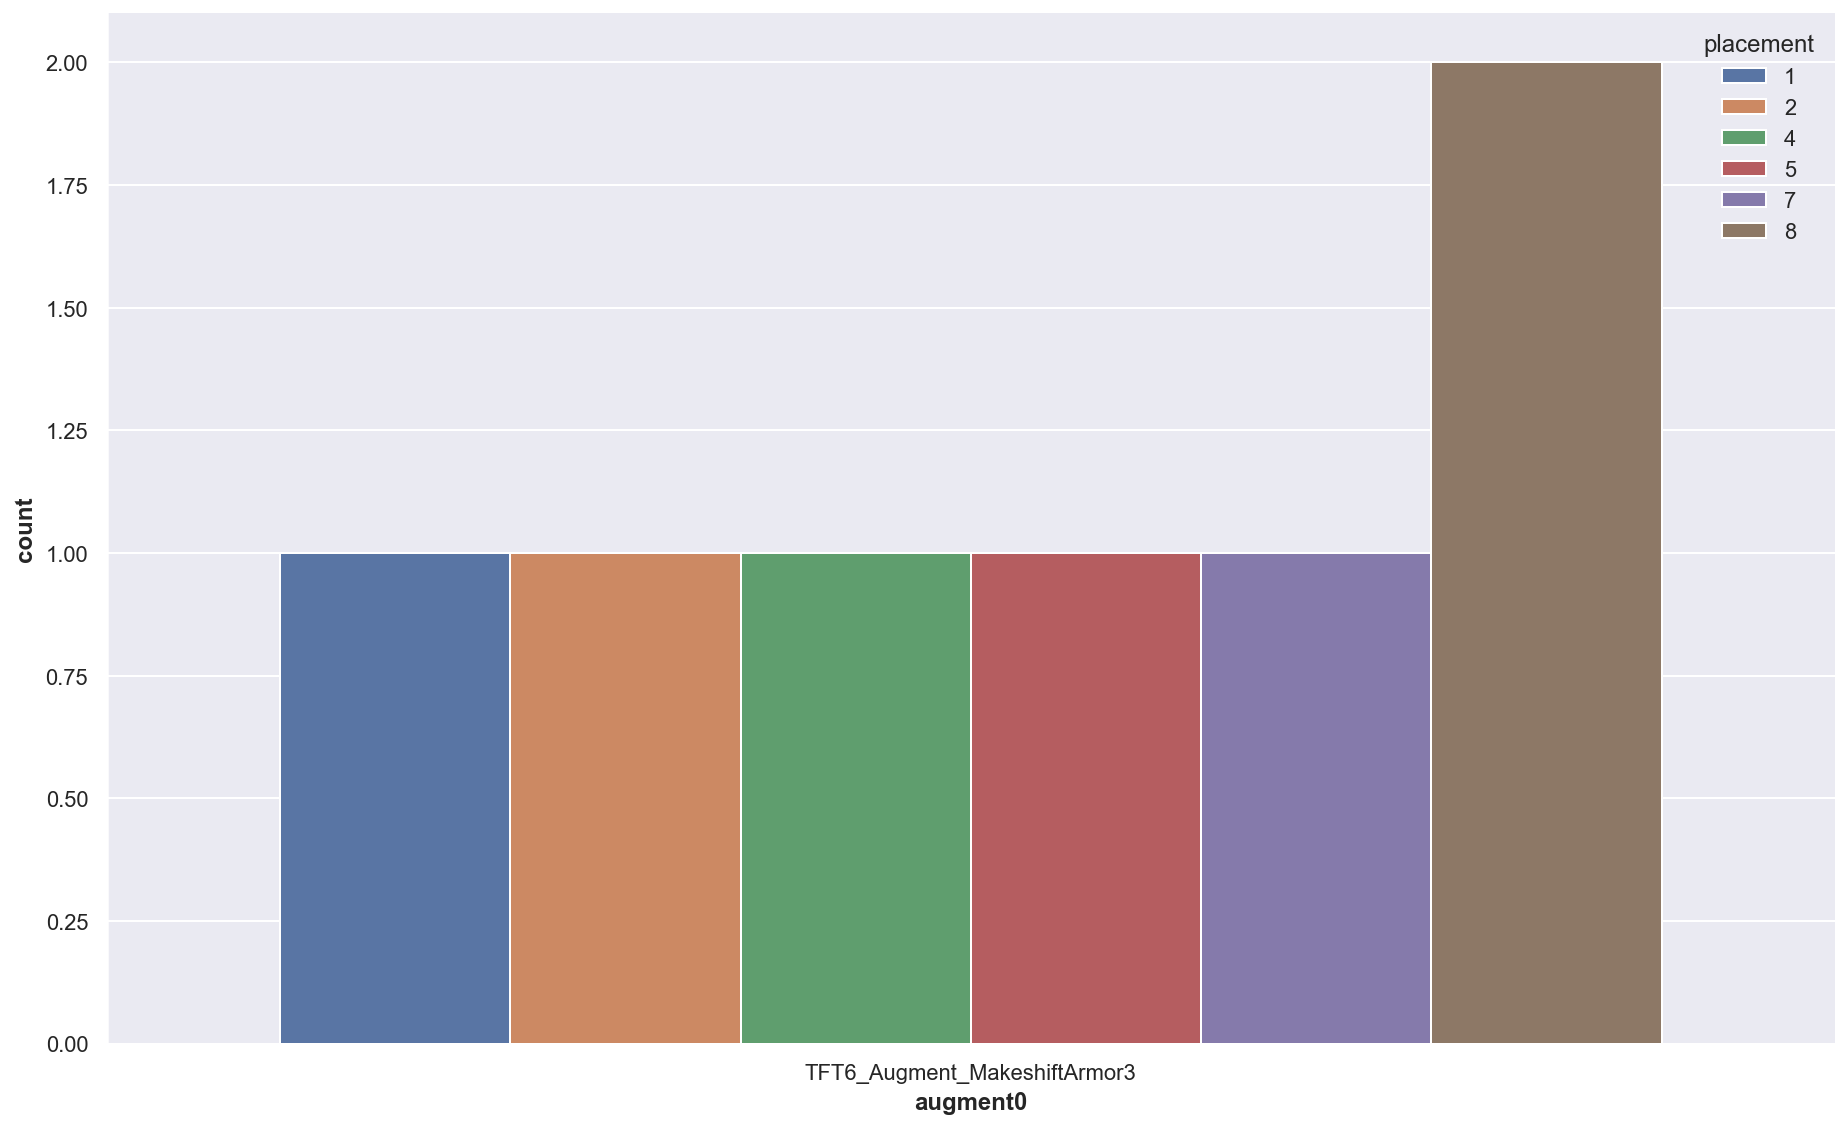

In [765]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor3'], x='augment0', hue=TARGETNAME)
sns.despine()

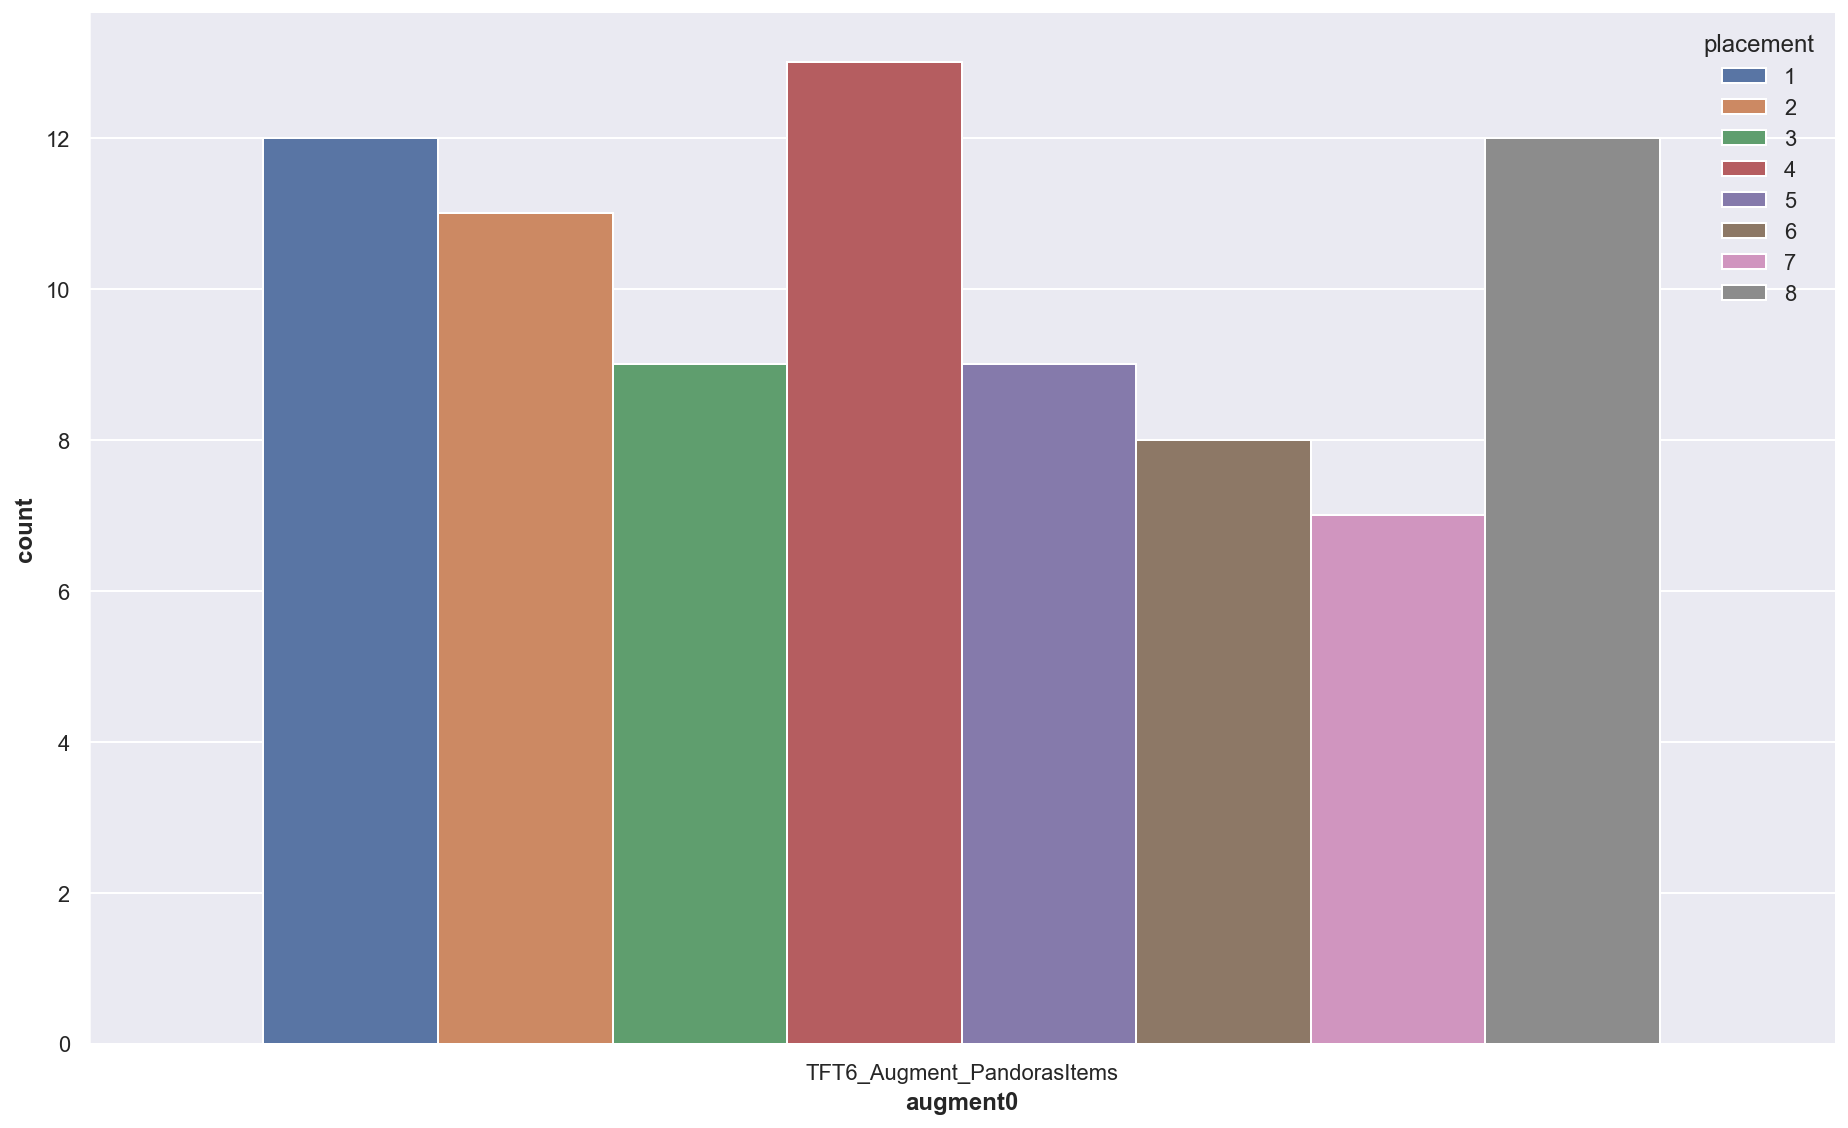

In [766]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_PandorasItems'], x='augment0', hue=TARGETNAME)
sns.despine()

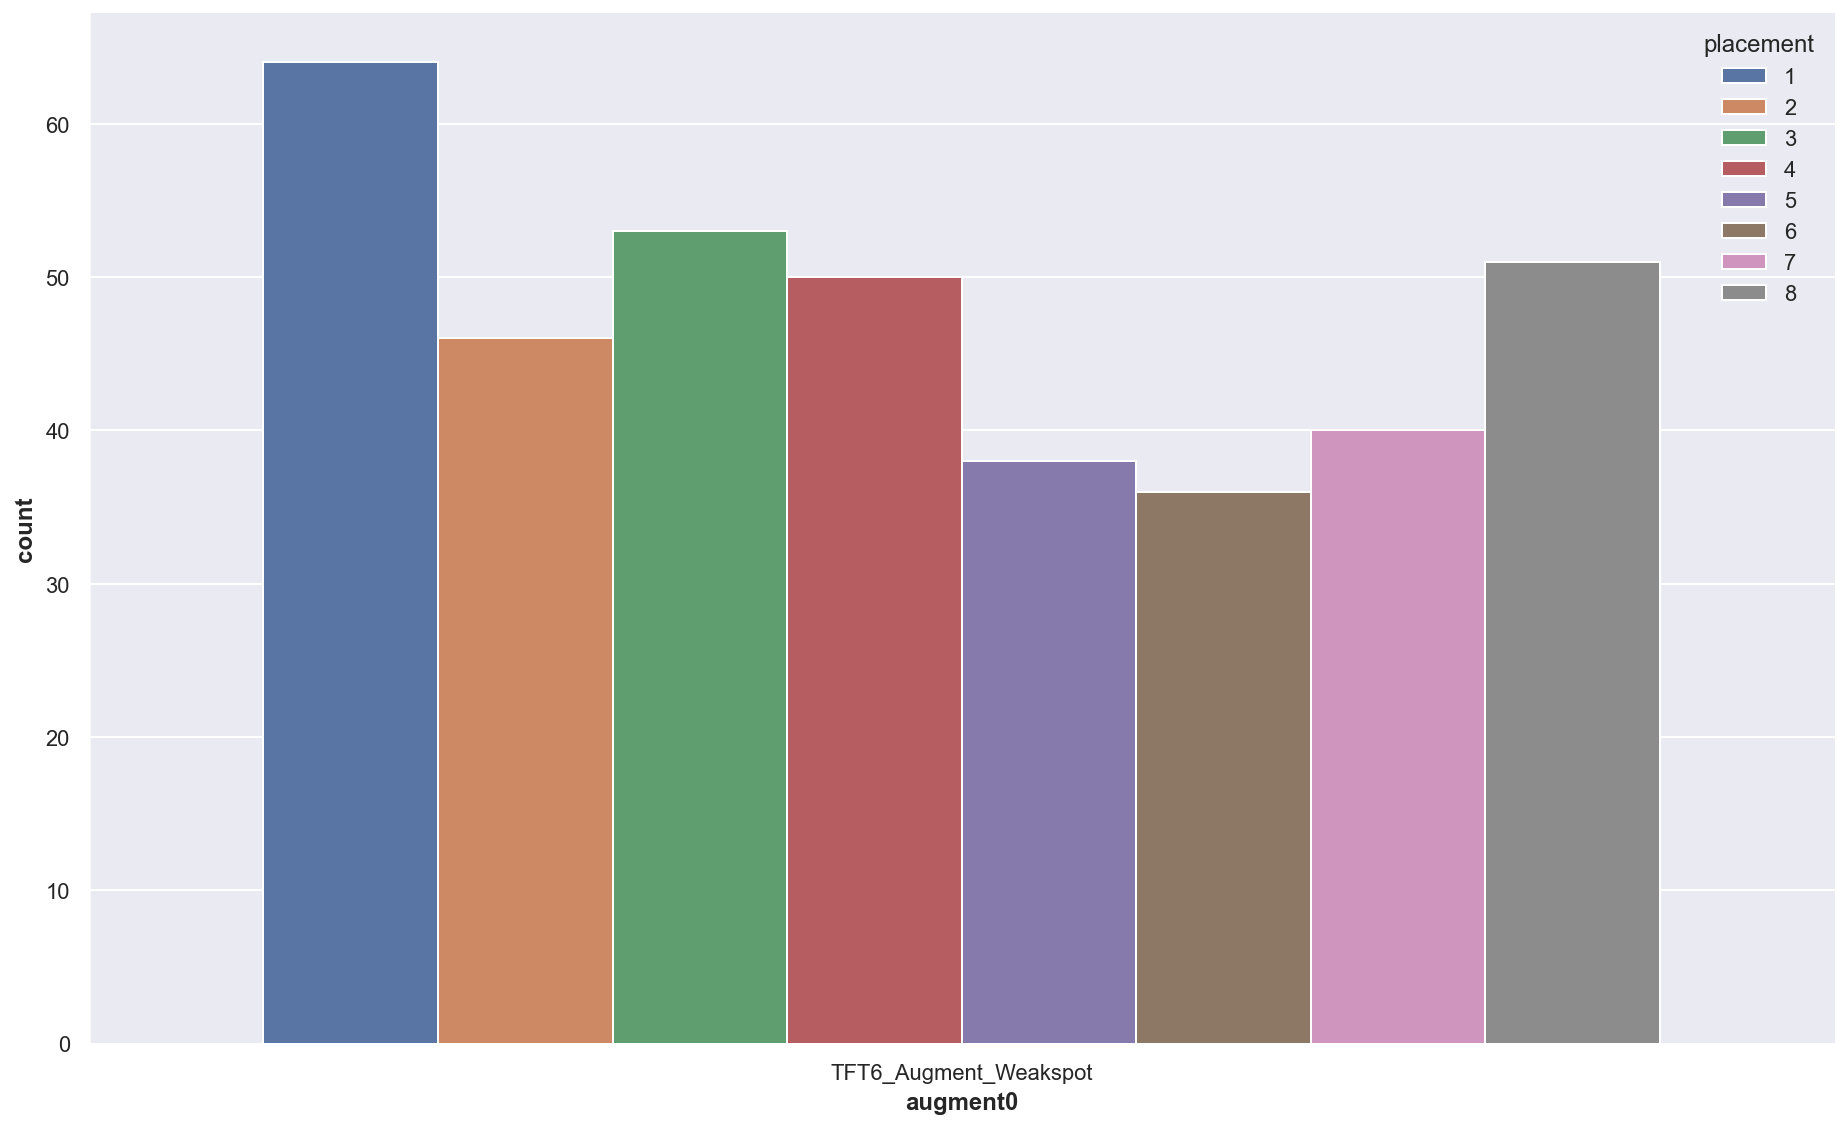

In [767]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Weakspot'], x='augment0', hue=TARGETNAME)
sns.despine()

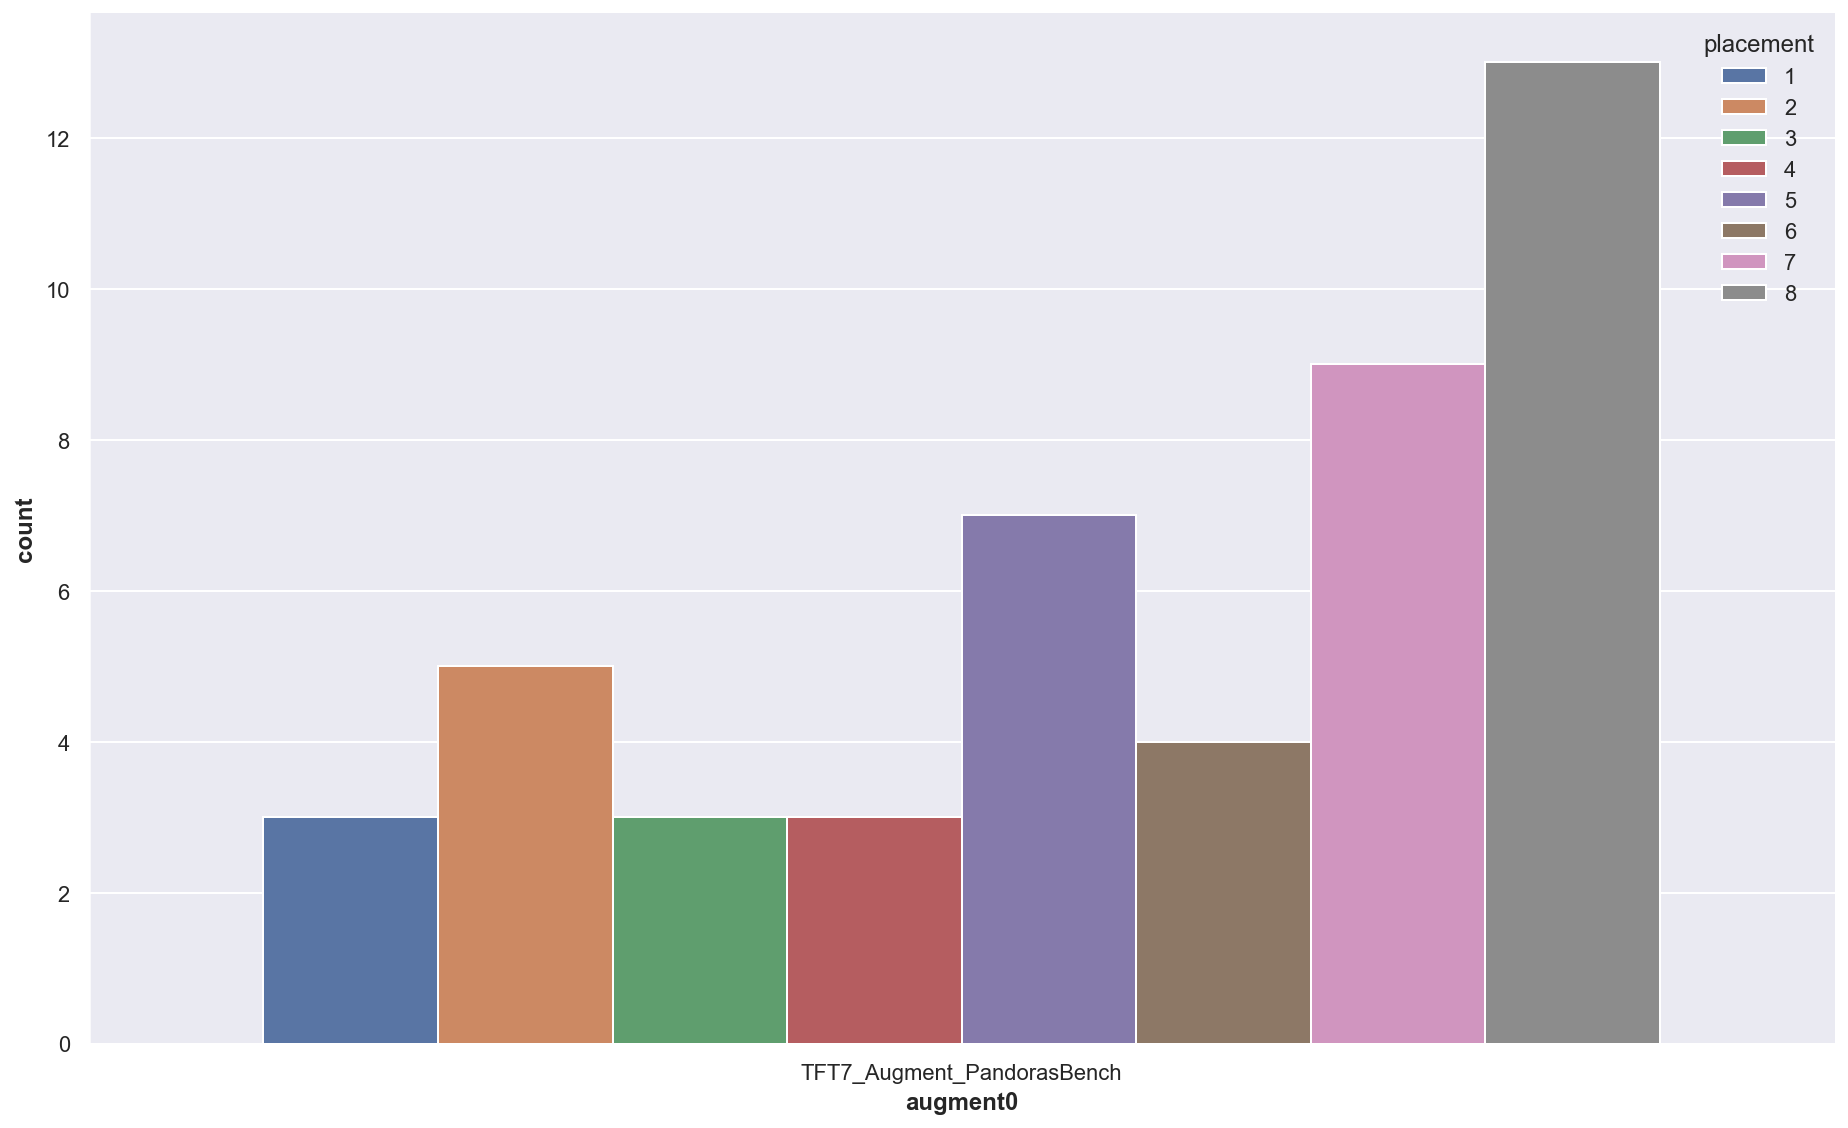

In [768]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_PandorasBench'], x='augment0', hue=TARGETNAME)
sns.despine()

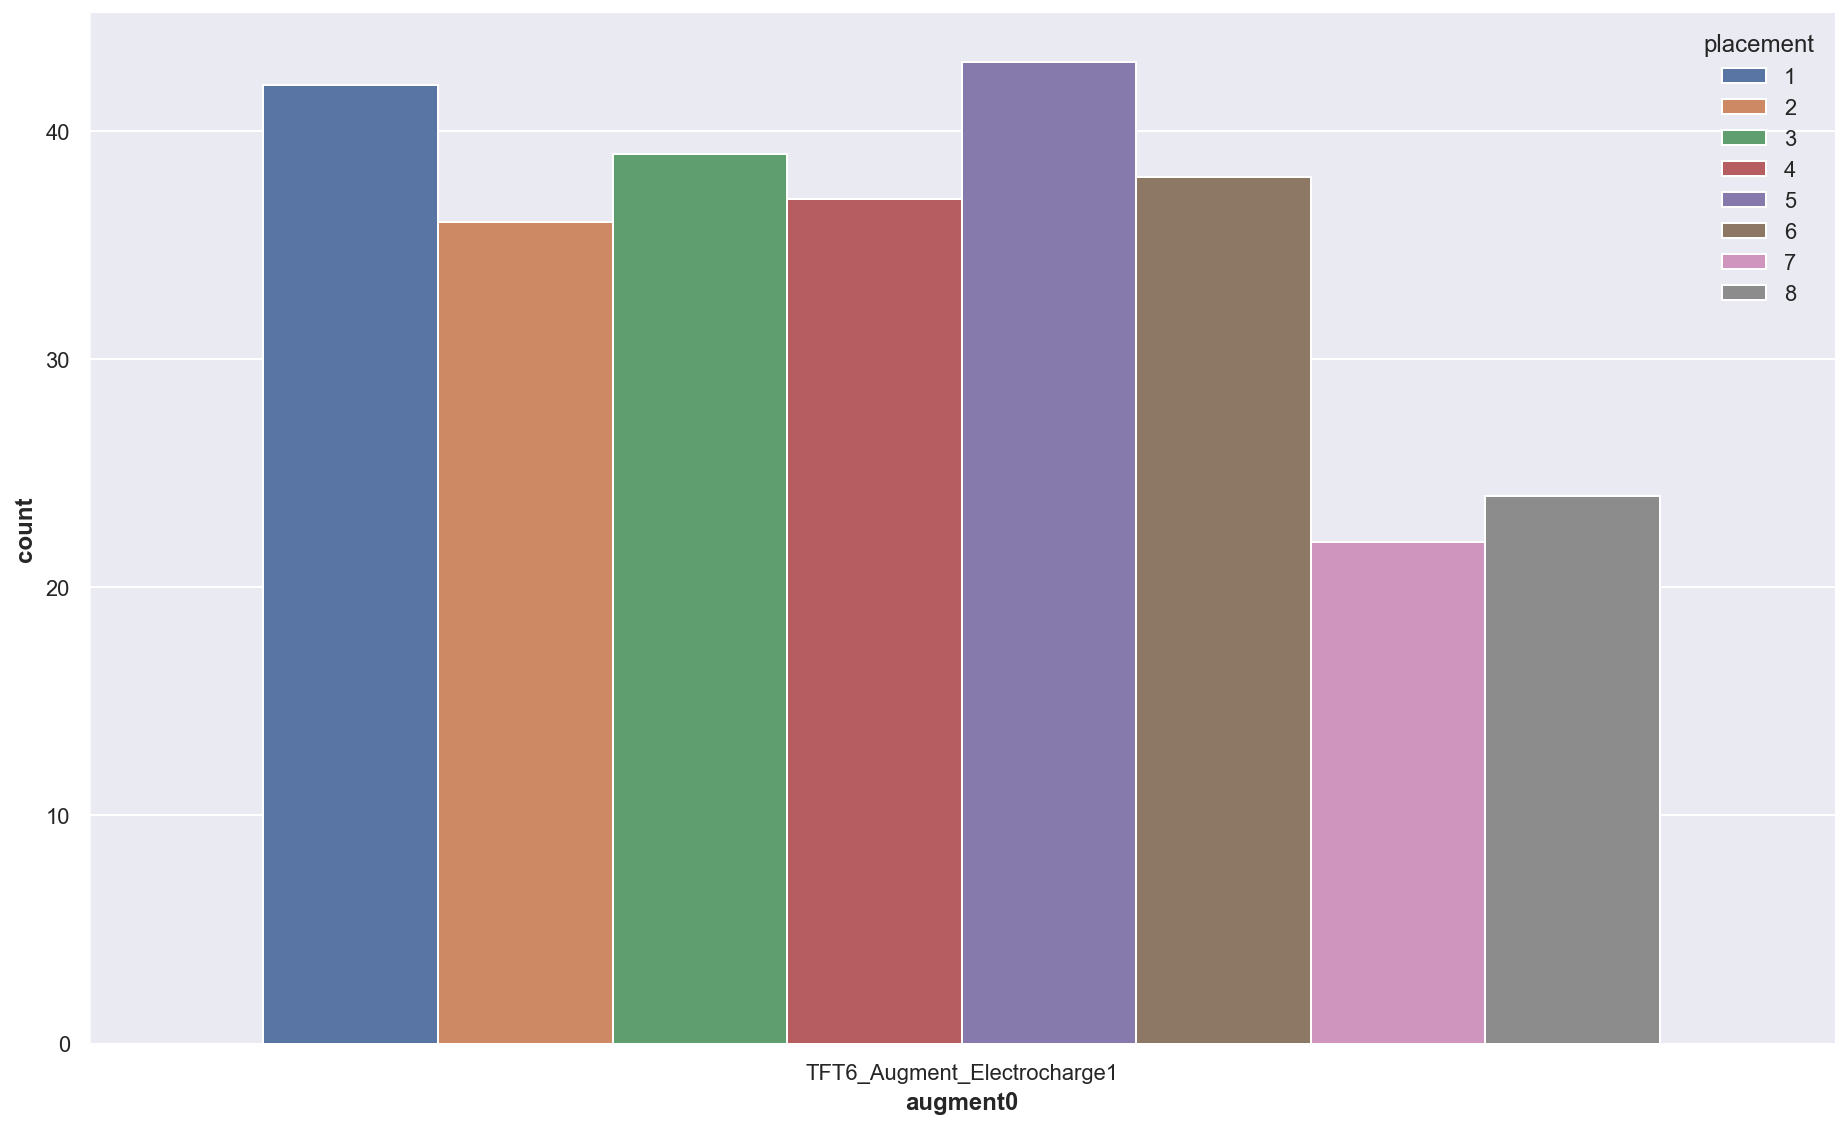

In [769]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Electrocharge1'], x='augment0', hue=TARGETNAME)
sns.despine()

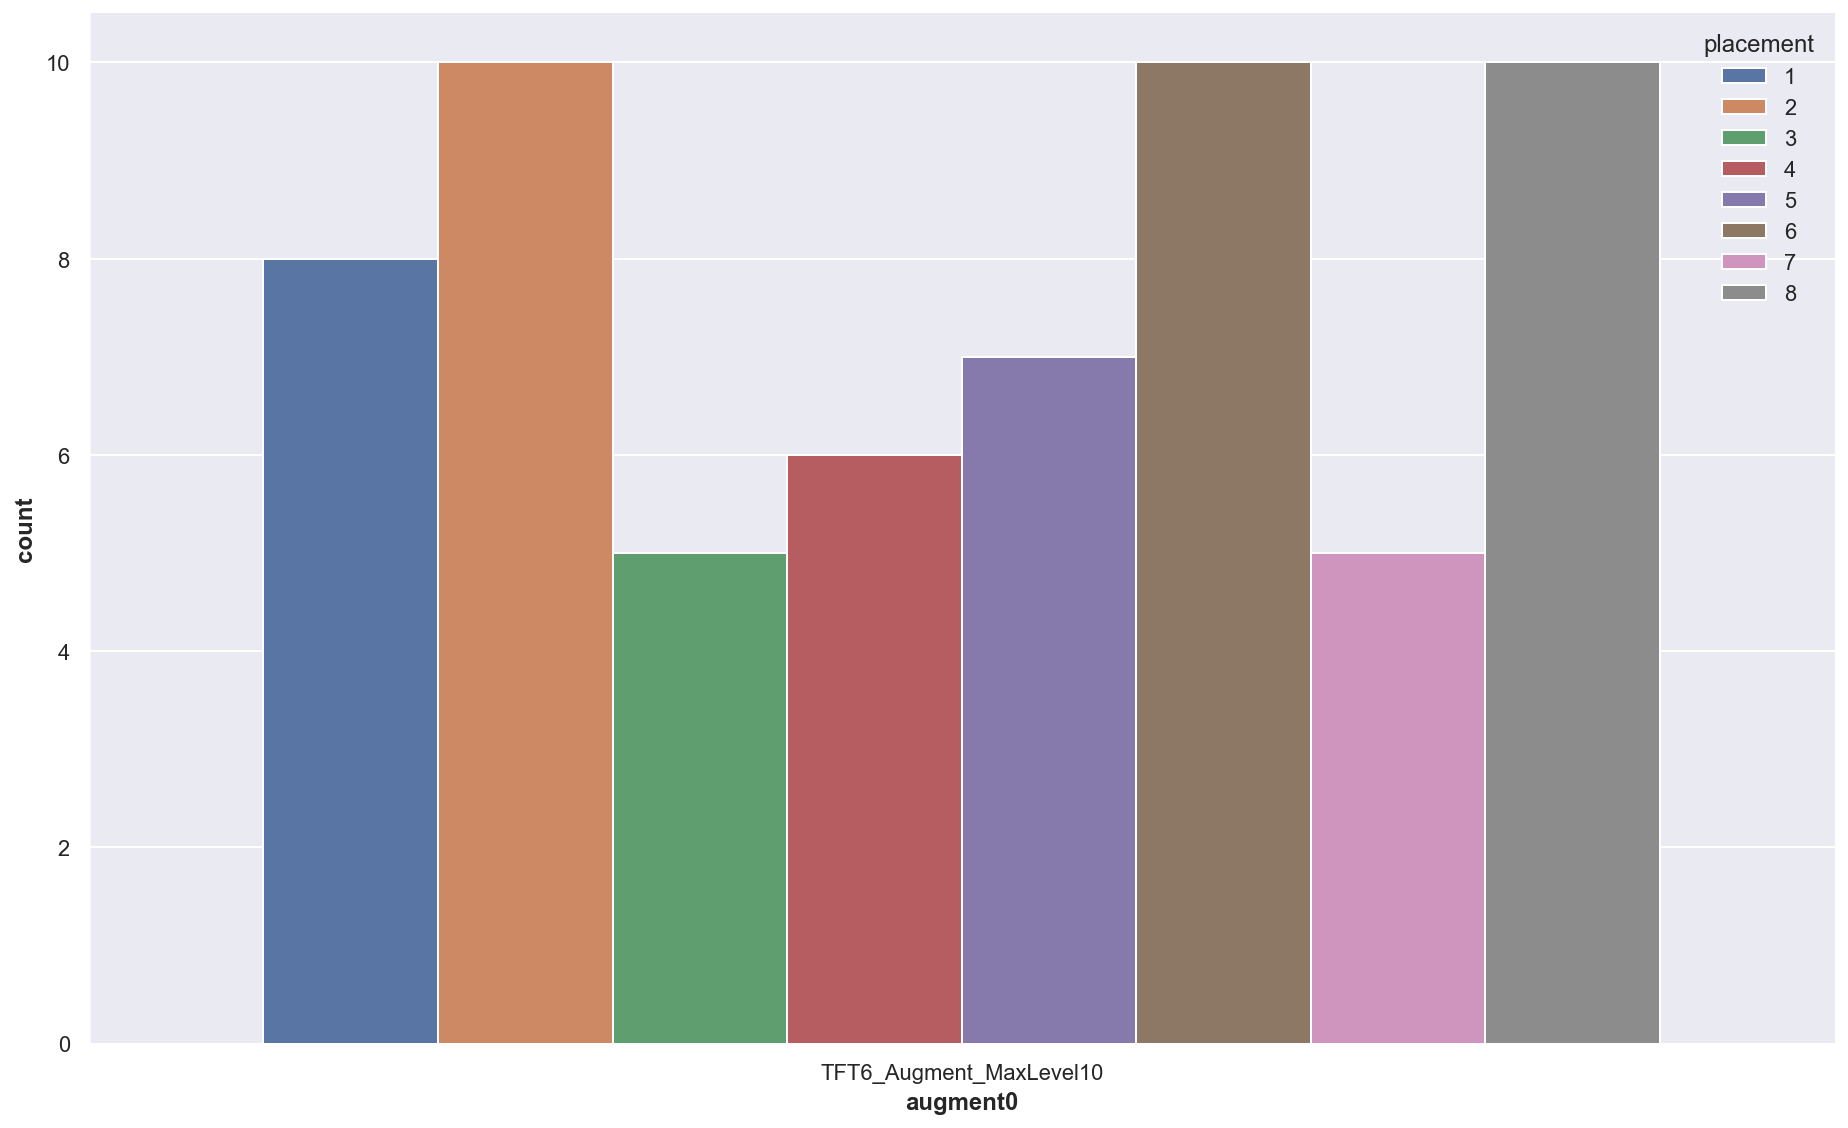

In [770]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MaxLevel10'], x='augment0', hue=TARGETNAME)
sns.despine()

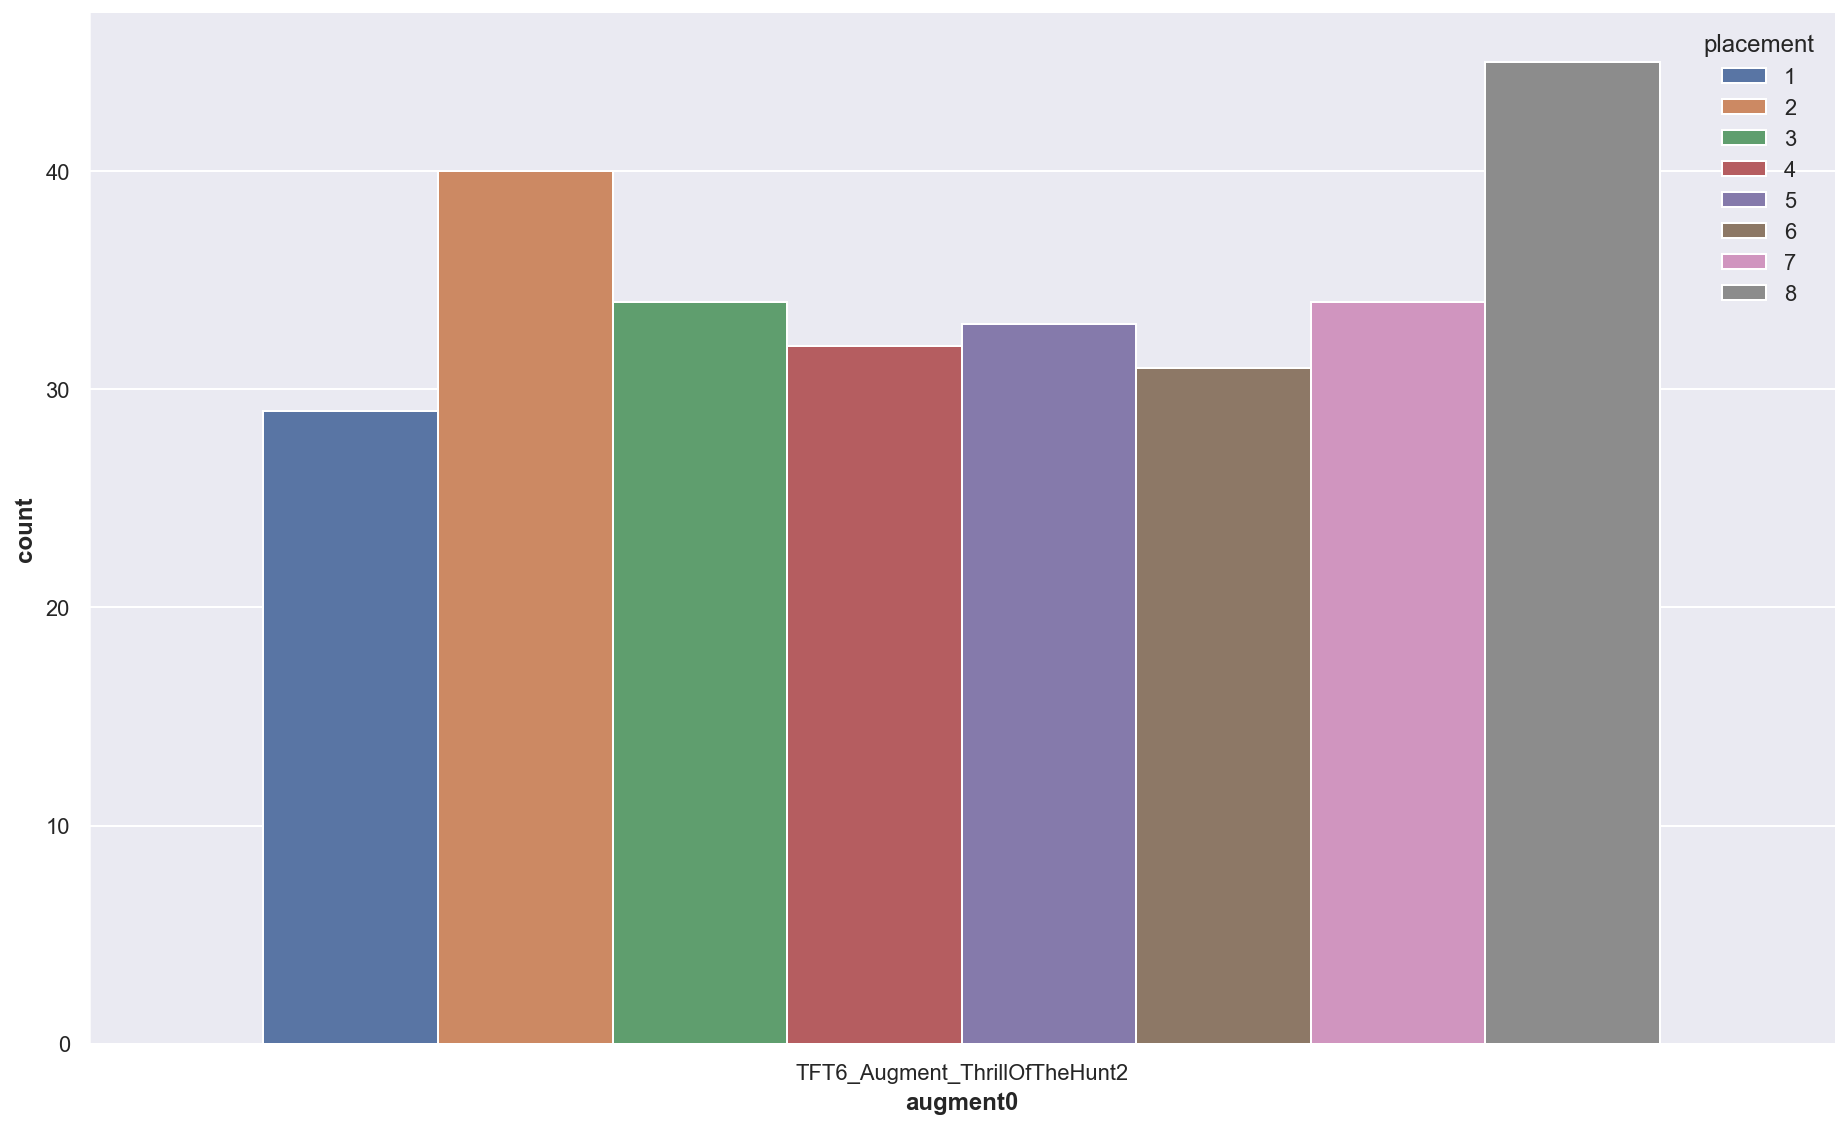

In [771]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_ThrillOfTheHunt2'], x='augment0', hue=TARGETNAME)
sns.despine()

In [772]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')
# group and aggregate mean/median
dct = {'Value_Count': ('augment0', 'count'), 'average_placement': ('placement', 'mean')}
augment0_rank_df = m.groupby('augment0', as_index=False).agg(**dct).sort_values(by='average_placement')
augment0_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_30432\207590299.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')


augment0  Value_Count  average_placement
152               TFT7_Augment_RevelEmblem2           46           3.086957
78           TFT7_Augment_AssassinCutthroat            3           3.333333
178              TFT7_Augment_WarriorEmblem            9           3.555556
73                      TFT6_Augment_Twins2           47           3.574468
146               TFT7_Augment_Preparation3           19           3.684211
79              TFT7_Augment_AssassinEmblem           84           3.714286
116               TFT7_Augment_GadgetExpert          129           3.744186
59                  TFT6_Augment_ThriftShop            8           3.750000
107                TFT7_Augment_CursedCrown            8           3.750000
113         TFT7_Augment_EvokerEssenceTheft           10           3.800000
11         TFT6_Augment_CyberneticImplants3           39           3.820513
119     TFT7_Augment_GuardianHeroicPresence            7           3.857143
101  TFT7_Augment_CavalierDevastatingCharge            7           3.857143
10         TFT6_Augment_CyberneticImplants2          138           3.876812
109        TFT7_Augment_DragonmancerEmblem2           10           3.900000
129                  TFT7_Augment_JadeTrait           61           3.901639
172       TFT7_Augment_TempestEyeOfTheStorm           12           3.916667
130                 TFT7_Augment_JadeTrait2           37           3.972973
168    TFT7_Augment_SwiftshotPressTheAttack           79           4.000000
9          TFT6_Augment_CyberneticImplants1           83           4.000000
88                TFT7_Augment_BestFriends2          143           4.006993
3                 TFT6_Augment_BlueBattery2           82           4.024390
103            TFT7_Augment_CavalierEmblem2           32           4.031250
89                TFT7_Augment_BestFriends3           40           4.050000
174                  TFT7_Augment_ThinkFast           14           4.071429
46                 TFT6_Augment_Meditation3           13           4.076923
121                TFT7_Augment_GuildEmblem          109           4.082569
131                TFT7_Augment_LivingForge          123           4.130081
49               TFT6_Augment_PortableForge          533           4.136961
69                   TFT6_Augment_TriForce2           33           4.151515

In [773]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')
# group and aggregate mean/median
dct = {'Value_Count': ('augment1', 'count'), 'average_placement': ('placement', 'mean')}
augment1_rank_df = m.groupby('augment1', as_index=False).agg(**dct).sort_values(by='average_placement')
augment1_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_30432\1890264867.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')


augment1  Value_Count  average_placement
66             TFT6_Augment_Traitless2            2           1.500000
67             TFT6_Augment_Traitless3            3           1.666667
65             TFT6_Augment_Traitless1            3           2.000000
112          TFT7_Augment_EvokerEmblem            1           3.000000
48            TFT6_Augment_Meditation3           17           3.352941
155        TFT7_Augment_RevelPartyTime            9           3.444444
102       TFT7_Augment_CavalierEmblem2           15           3.466667
113         TFT7_Augment_EvokerEmblem2            2           3.500000
150        TFT7_Augment_RagewingScorch           23           3.521739
130            TFT7_Augment_JadeTrait2           39           3.641026
10    TFT6_Augment_CyberneticImplants2           45           3.711111
71                 TFT6_Augment_Twins2           32           3.718750
152         TFT7_Augment_RagewingTrait            8           3.750000
97       TFT7_Augment_CannoneerHotShot           41           3.780488
81            TFT7_Augment_AstralTrait            5           3.800000
154      TFT7_Augment_RevelPartyFavors           22           3.818182
26         TFT6_Augment_Electrocharge3          102           3.852941
118        TFT7_Augment_GuardianEmblem           14           3.857143
147          TFT7_Augment_Preparation3            7           3.857143
77         TFT7_Augment_AssassinEmblem           22           3.863636
17      TFT6_Augment_CyberneticUplink3           15           3.866667
89             TFT7_Augment_BigFriend2           16           3.875000
123          TFT7_Augment_GuildEmblem2           30           3.900000
126            TFT7_Augment_JadeEmblem          113           3.902655
78        TFT7_Augment_AssassinEmblem2           21           3.904762
72                 TFT6_Augment_Twins3           23           3.913043
27        TFT6_Augment_Featherweights1           19           3.947368
109    TFT7_Augment_DragonmancerEmblem           29           3.965517
47            TFT6_Augment_Meditation2           36           3.972222
173  TFT7_Augment_TempestEyeOfTheStorm            4           4.000000

In [774]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')
# group and aggregate mean/median
dct = {'Value_Count': ('augment2', 'count'), 'average_placement': ('placement', 'mean')}
augment2_rank_df = m.groupby('augment2', as_index=False).agg(**dct).sort_values(by='average_placement')
augment2_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_30432\3922423790.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')


augment2  Value_Count  average_placement
57               TFT6_Augment_Traitless3            1           1.000000
56               TFT6_Augment_Traitless2            2           2.000000
25          TFT6_Augment_Featherweights2            1           2.000000
123            TFT7_Augment_MysticTrait2            2           3.000000
18               TFT6_Augment_Distancing           16           3.250000
64          TFT7_Augment_AssassinEmblem2           19           3.526316
52             TFT6_Augment_TheGoldenEgg           84           3.559524
113              TFT7_Augment_JadeTrait2           42           3.571429
40              TFT6_Augment_Meditation1           22           3.772727
91              TFT7_Augment_DragonHorde          102           3.823529
106            TFT7_Augment_GuildEmblem2           25           3.840000
138   TFT7_Augment_ShapeshifterBeastsDen           92           3.858696
128          TFT7_Augment_RagewingScorch           53           3.867925
60                 TFT6_Augment_Weakspot          108           3.879630
11      TFT6_Augment_CyberneticImplants3           77           3.896104
146        TFT7_Augment_SwiftshotEmblem2           11           3.909091
74               TFT7_Augment_BigFriend2          190           3.921053
155            TFT7_Augment_UrfsGrabBag2           92           3.945652
71             TFT7_Augment_BestFriends2          246           3.979675
125             TFT7_Augment_Preparation            4           4.000000
144      TFT7_Augment_ShimmerscaleTrait2            4           4.000000
7        TFT6_Augment_CelestialBlessing3          123           4.024390
110   TFT7_Augment_JadeEternalProtection           95           4.031579
109              TFT7_Augment_JadeEmblem           30           4.066667
140      TFT7_Augment_ShapeshifterTrait2           14           4.071429
19              TFT6_Augment_Distancing2           97           4.092784
21               TFT6_Augment_Diversify1          118           4.101695
77   TFT7_Augment_BruiserTitanicStrength          145           4.131034
131            TFT7_Augment_RevelEmblem2           14           4.142857
141      TFT7_Augment_ShimmerscaleEmblem            7           4.142857

# Baseline Model

In [1260]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, log_loss, confusion_matrix, roc_curve, precision_recall_curve
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

In [1261]:
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='mae', 
                    n_estimators=150) #, use_label_encoder=False hist tree_method='hist', enable_categorical=True,

In [1262]:
le_target = LabelEncoder()

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
augment_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
item_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
preproc = StandardScaler()

# Encode label.
# y = le_target.fit_transform(y)

In [1263]:
# Encode category columns.
xgb_regressor_pipeline = Pipeline([
    ('preprocess', ColumnTransformer(
        transformers=[
            ("one_hot_time", one_hot_encoder, categorical_cols),
            # ("augment", augment_oe, categorical_cols[:3]),
            # ("item", item_oe, categorical_cols[3:]),
        ],
        remainder=preproc,
        verbose_feature_names_out=False,
    )),
    ('classifier', xgb),]
)

In [1264]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.85, random_state=42, stratify=match_id_df) # , stratify=match_id_df

xgb_regressor_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Ashe_item0',
                                                   'TFT7_Ashe_item1',
                                                   'TFT7_Ashe_item2',
                                                   'TFT7_Anivia_item0',
                                                   'TFT7_Neeko_item0',
                                                   'TFT7_Neeko_item1',
                                                   'TFT7_Neeko_item2',
                                                   'TFT7_DragonGreen_item0',
                                                   'TF...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=150, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [1265]:
y_pred = xgb_regressor_pipeline.predict(X_test)

In [1266]:
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the model
	# evaluate the model
	scores = cross_val_score(xgb_regressor_pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return np.mean(scores), scores.min(), scores.max()

In [1267]:
# # calculate the ideal test condition
# ideal, _, _ = evaluate_model(LeaveOneOut())
# print('Ideal: %.3f' % ideal)
# # define folds to test
# folds = range(2,31)
# # record mean and min/max of each set of results
# means, mins, maxs = list(),list(),list()
# # evaluate each k value
# for k in folds:
# 	# define the test condition
# 	cv = KFold(n_splits=k, shuffle=True, random_state=1)
# 	# evaluate k value
# 	k_mean, k_min, k_max = evaluate_model(cv)
# 	# report performance
# 	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
# 	# store mean accuracy
# 	means.append(k_mean)
# 	# store min and max relative to the mean
# 	mins.append(k_mean - k_min)
# 	maxs.append(k_max - k_mean)
# # line plot of k mean values with min/max error bars
# pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# # plot the ideal case in a separate color
# pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# # show the plot
# pyplot.show()

In [1268]:
def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis = 1 ),
        'precision': cm / cm.sum(axis = 0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout = True, figsize = (20,6))
    ax = ax.flatten()
#     mask = (np.eye(cm.shape[0]) == 0) * 1
    for idx, (name, matrix) in enumerate(metrics.items()):
        ax[idx].set_title(name)
        sns.heatmap(
            data = matrix,
            cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar = False,
#             mask=mask,
            lw = 0.25,
            annot = True,
            fmt = '.2f',
            ax = ax[idx]
        )
#         for tick in ax[idx].get_xticklabels():
#                 tick.set_rotation(60)
                
    sns.despine()
    
def plot_cm_error(cm):
    mask = (np.eye(cm.shape[0]) != 0) * 1
    fig, ax = plt.subplots(tight_layout=True, figsize=(15,8))
    sns.heatmap(
                data = pd.DataFrame(data=cm, index=le_target.classes_, columns = le_target.classes_),
#                 cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
                cbar = False,
                lw = 0.25,
                mask = mask,
                annot = True,
                fmt = '.0f',
                ax = ax
            )
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()

In [1269]:
# create confusion matrix, calculate accuracy,recall & precision
# cm = pd.DataFrame(data = confusion_matrix(le_target.inverse_transform(y_test), y_pred, labels = le_target.classes_), index = le_target.classes_, columns = le_target.classes_)
# plot_cm(cm)

In [1270]:
len(y_test)

1095

In [1271]:
y_pred.shape

(1095,)

In [1272]:
def plot_oof(y_true, y_predict):
    area = (30 * np.random.rand(len(y_predict)))**2 
    # Plot y_true vs. y_pred
    plt.figure(figsize=(10, 10))
    plt.scatter(y_true, y_predict, s=area, color='r', alpha=0.2)
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
    plt.gca().set_aspect('equal')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('OOF Predictions')
    plt.show()

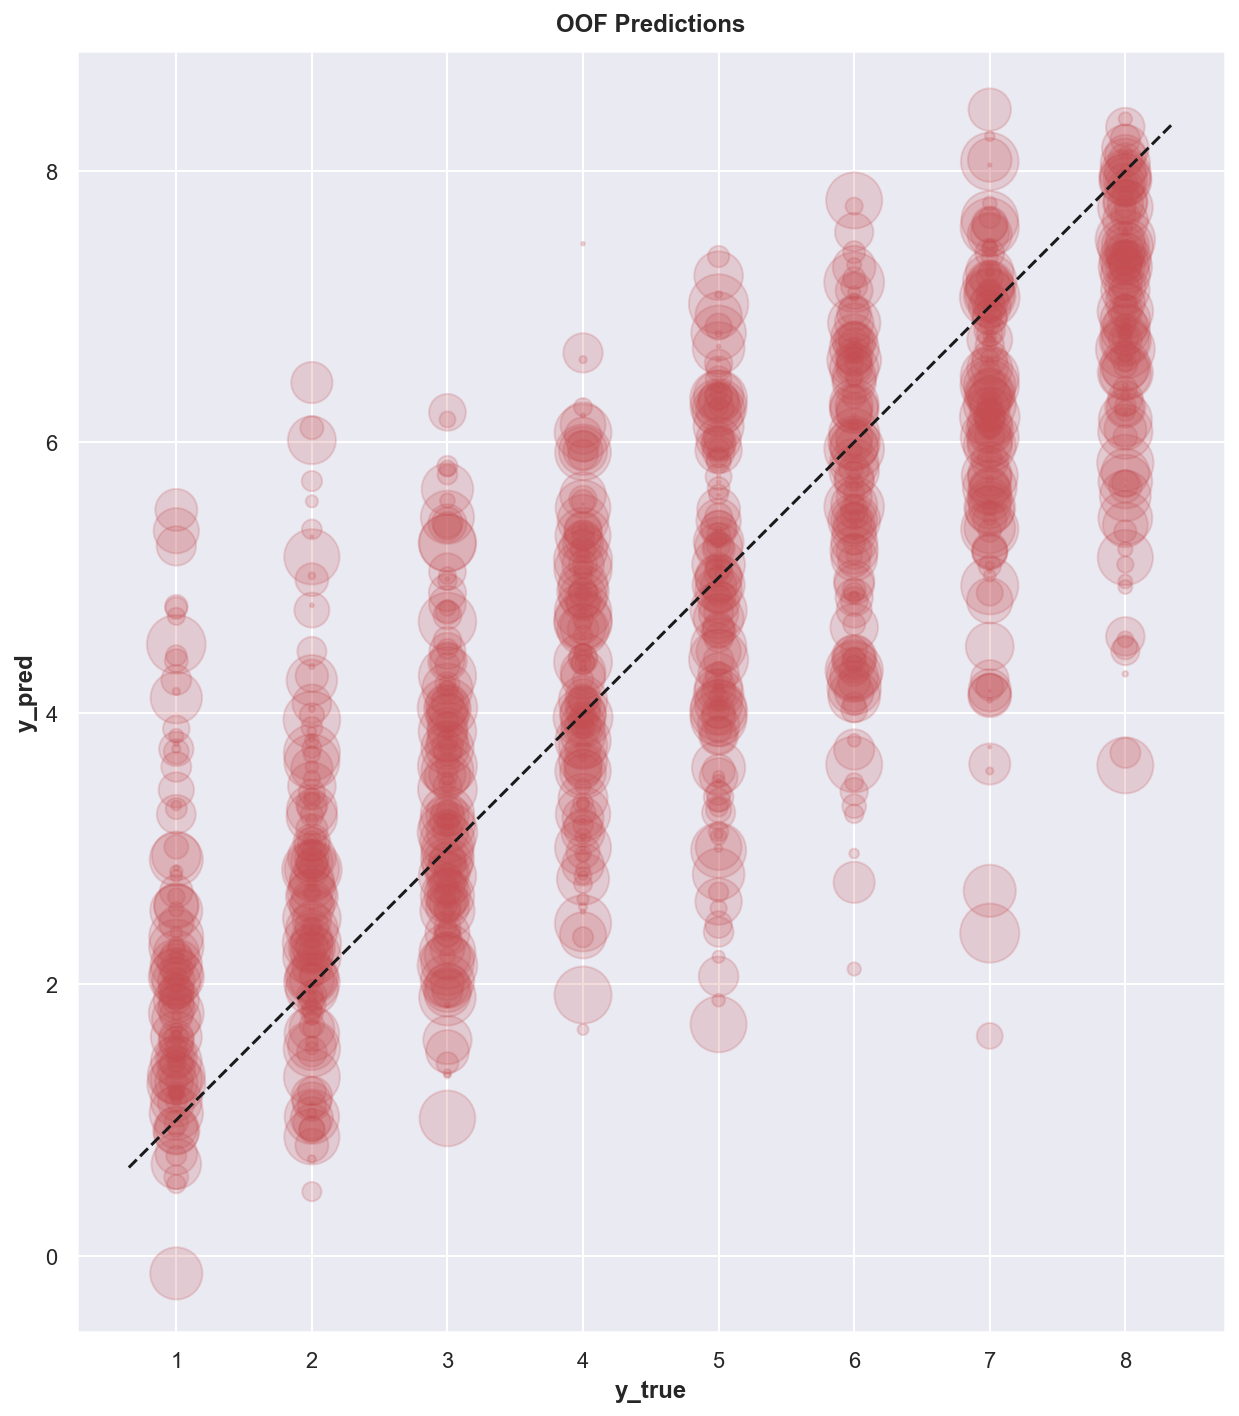

In [1273]:
plot_oof(y_test, y_pred)

In [1274]:
min(y_pred)

-0.13128245

In [1275]:
mean_absolute_error(y_test, y_pred)

1.0388852

In [1276]:
mean_squared_error(y_test, y_pred)

1.8397375

In [1277]:
print(f"XGB train score : {xgb_regressor_pipeline.score(X_train, y_train):.3f}")
print(f"XGB test score: {xgb_regressor_pipeline.score(X_test, y_test):.3f}")

XGB train score : 0.885
XGB test score: 0.634


# mdi_importances

In [1278]:
feature_names = xgb_regressor_pipeline[:-1].get_feature_names_out()
mdi_importances = pd.Series(
    xgb_regressor_pipeline[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

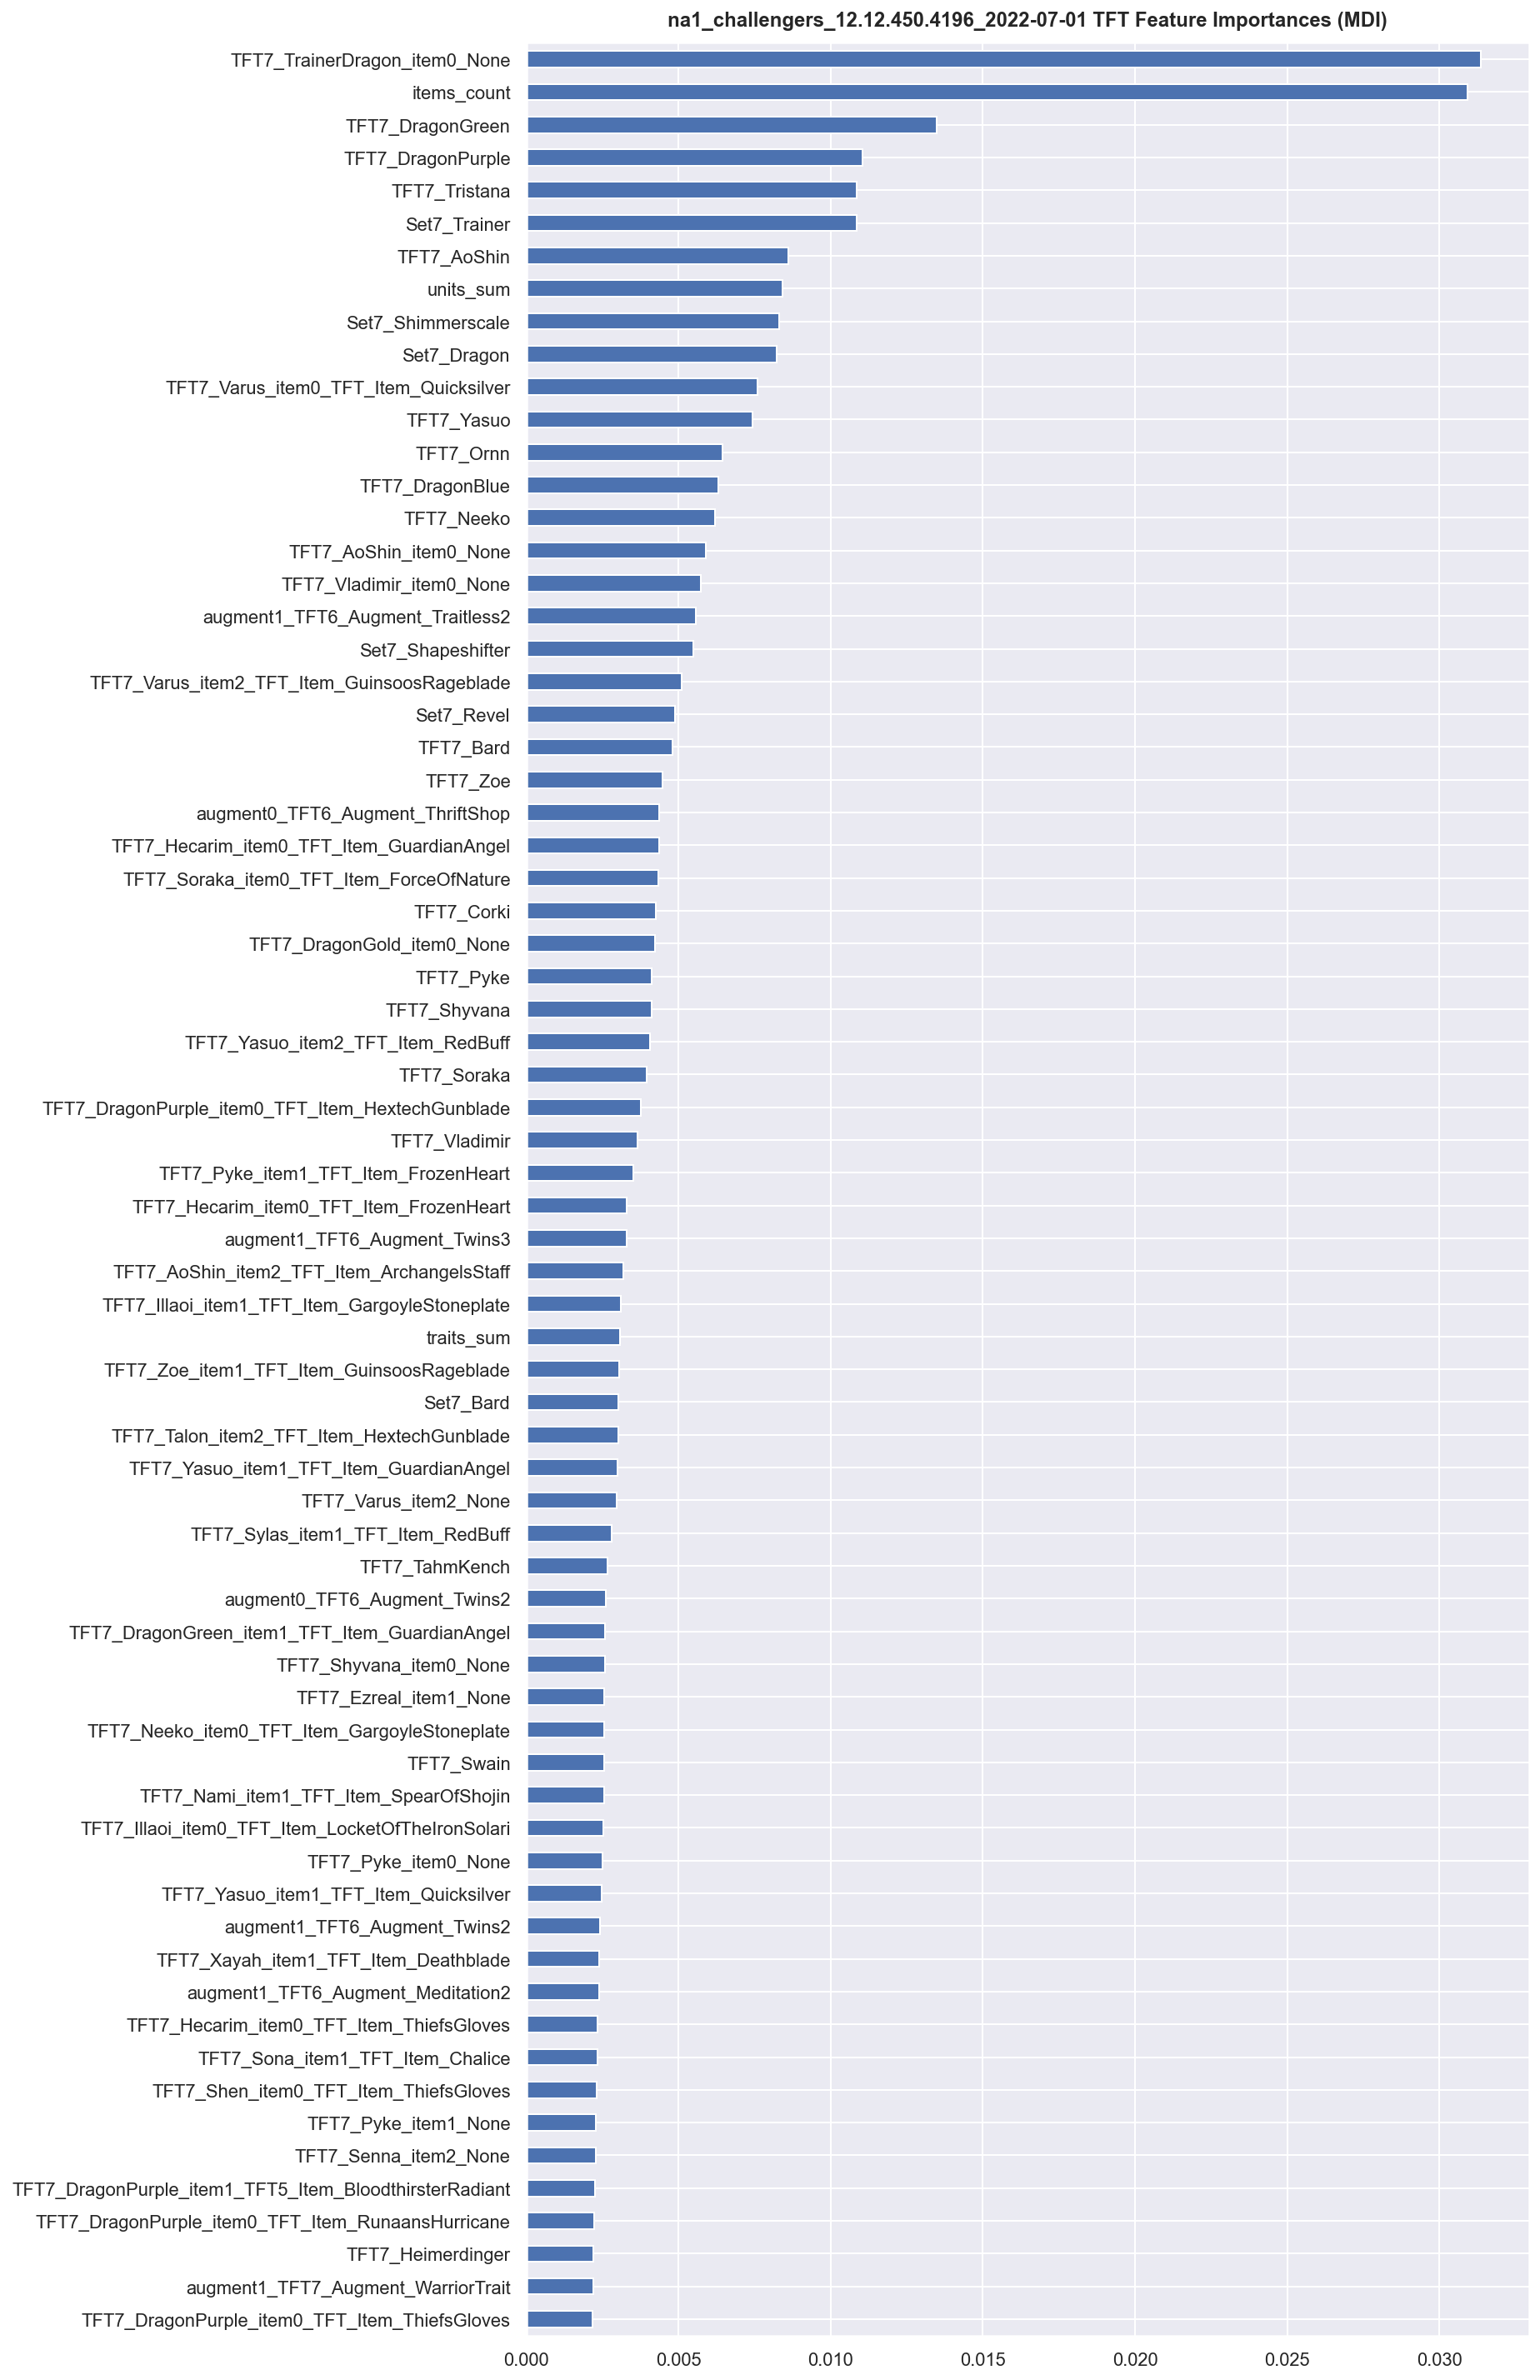

In [1279]:
plt.figure(figsize=(13, 20))
ax = mdi_importances[-70:].plot.barh()
ax.set_title(f"{SERVER}_{LEAGUE}_{LATEST_RELEASE}_{PATCH} TFT Feature Importances (MDI)")
ax.figure.tight_layout()

In [1280]:
mdi_importances.to_csv(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_{PATCH}_mdi_importances.csv'))

In [1281]:
mdi_importances[-60:]

augment1_TFT6_Augment_Meditation2                   0.002377
TFT7_Xayah_item1_TFT_Item_Deathblade                0.002392
augment1_TFT6_Augment_Twins2                        0.002416
TFT7_Yasuo_item1_TFT_Item_Quicksilver               0.002473
TFT7_Pyke_item0_None                                0.002500
TFT7_Illaoi_item0_TFT_Item_LocketOfTheIronSolari    0.002526
TFT7_Nami_item1_TFT_Item_SpearOfShojin              0.002544
TFT7_Swain                                          0.002549
TFT7_Neeko_item0_TFT_Item_GargoyleStoneplate        0.002554
TFT7_Ezreal_item1_None                              0.002560
TFT7_Shyvana_item0_None                             0.002568
TFT7_DragonGreen_item1_TFT_Item_GuardianAngel       0.002574
augment0_TFT6_Augment_Twins2                        0.002610
TFT7_TahmKench                                      0.002669
TFT7_Sylas_item1_TFT_Item_RedBuff                   0.002810
TFT7_Varus_item2_None                               0.002952
TFT7_Yasuo_item1_TFT_Ite

In [1282]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    xgb_regressor_pipeline, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()

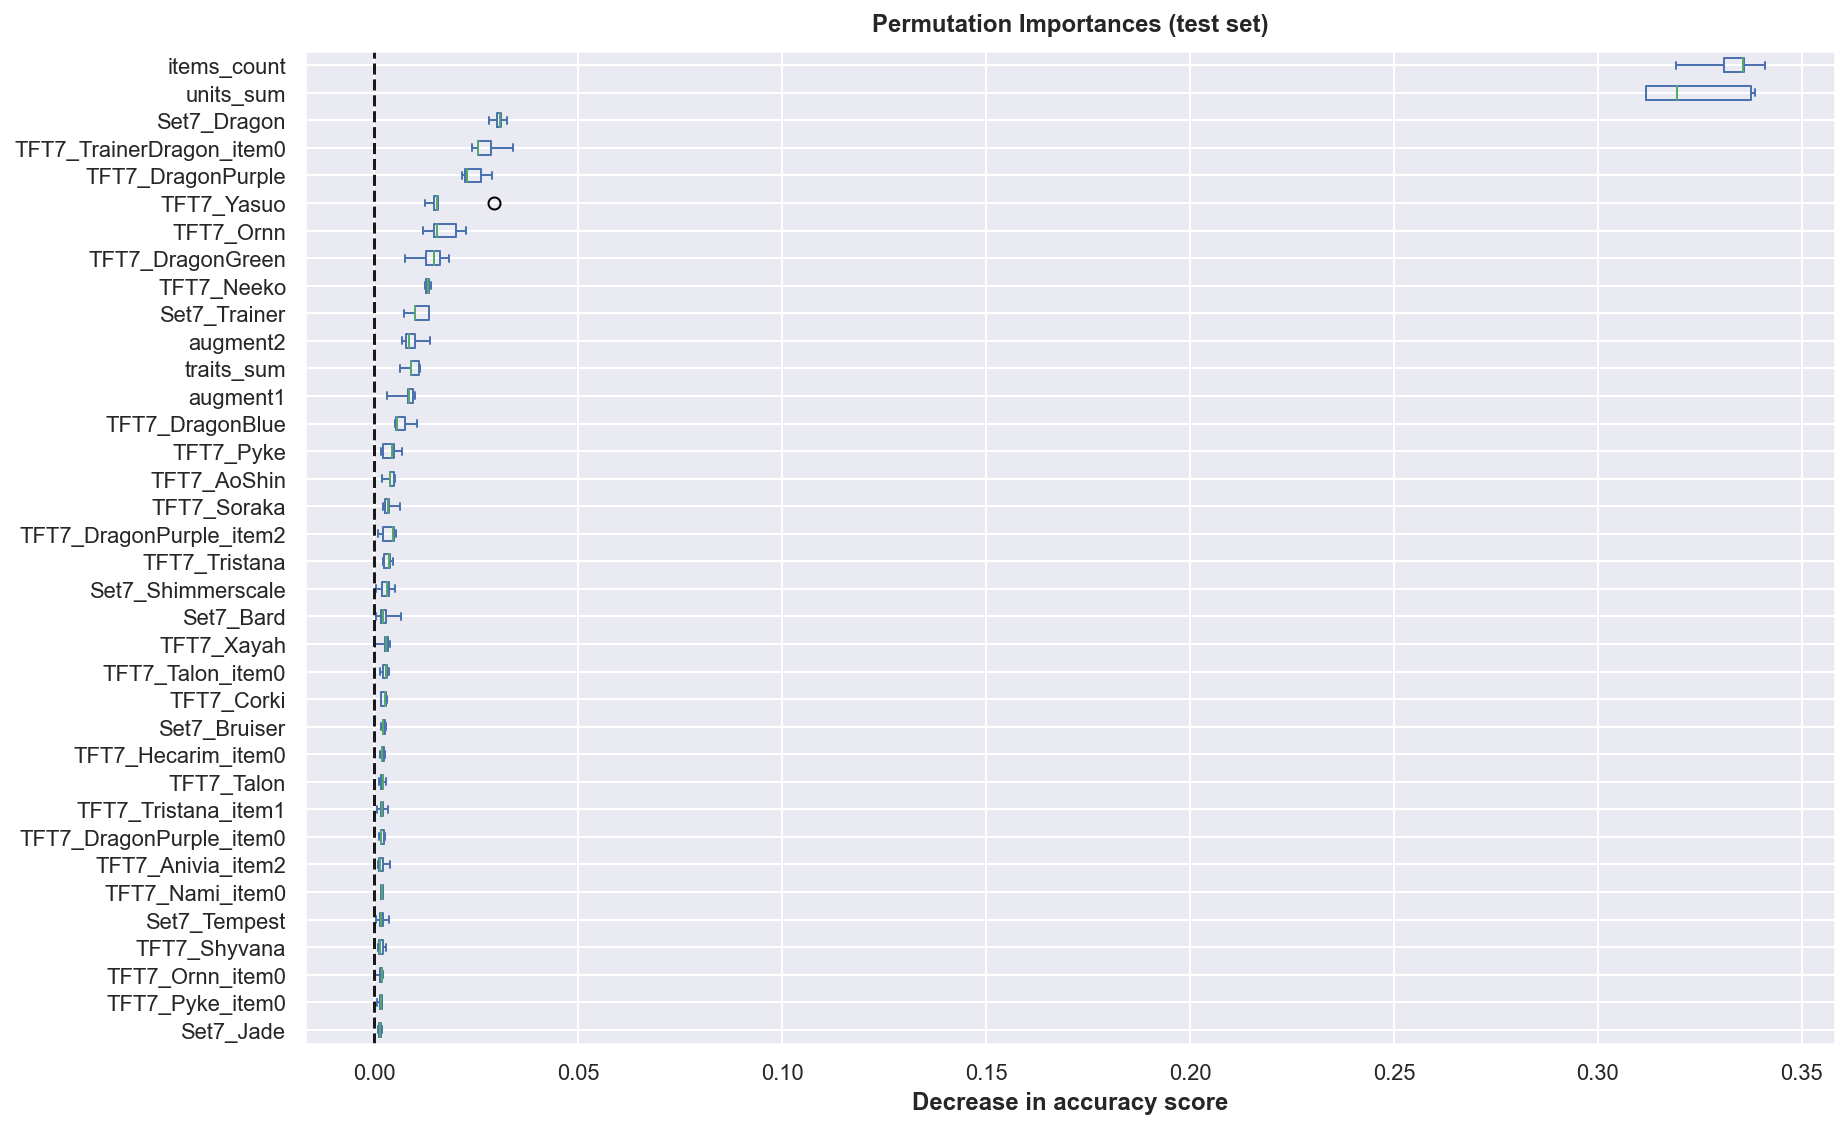

In [1283]:
importances = pd.DataFrame(
    result.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)
# plt.figure(figsize=(15, 30))
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

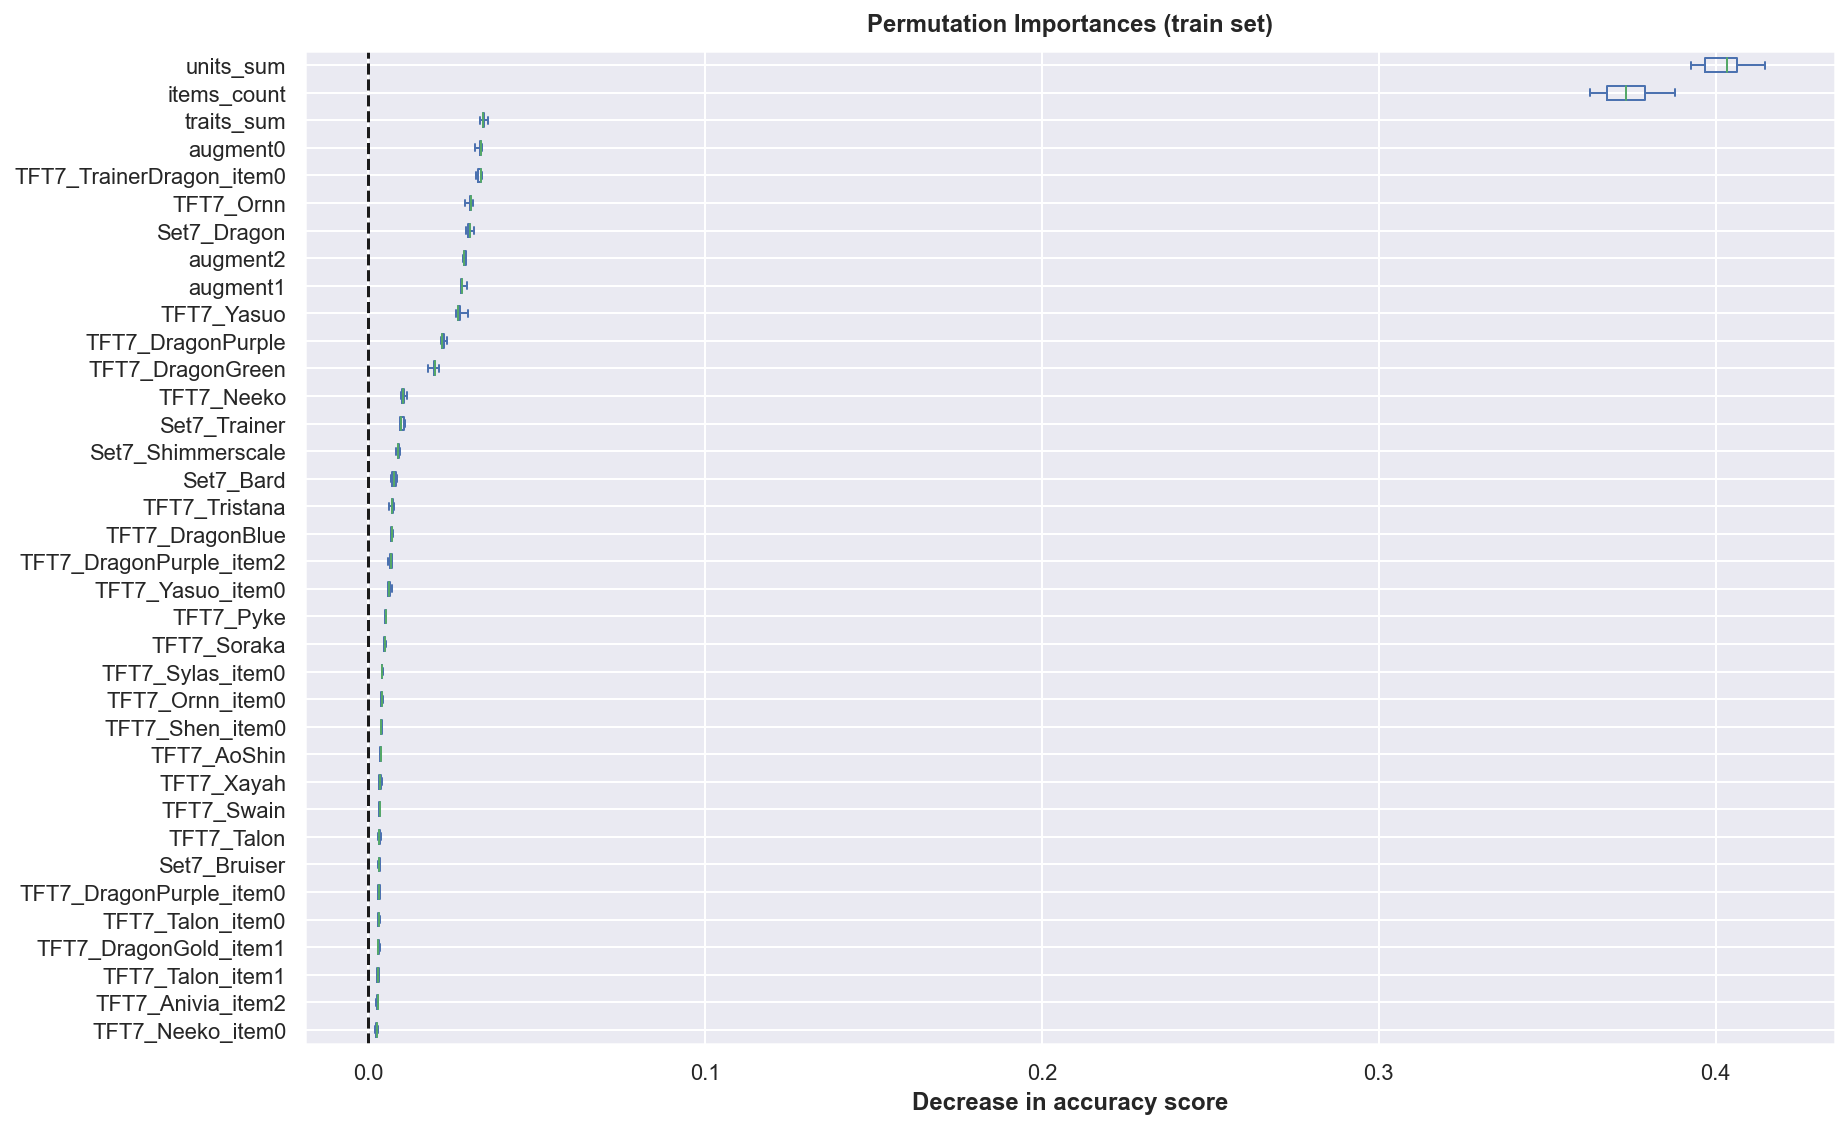

In [1284]:
result = permutation_importance(
    xgb_regressor_pipeline, X_train, y_train, n_repeats=5, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [1285]:
xgb_regressor_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Ashe_item0',
                                                   'TFT7_Ashe_item1',
                                                   'TFT7_Ashe_item2',
                                                   'TFT7_Anivia_item0',
                                                   'TFT7_Neeko_item0',
                                                   'TFT7_Neeko_item1',
                                                   'TFT7_Neeko_item2',
                                                   'TFT7_DragonGreen_item0',
                                                   'TF...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=150, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [1286]:
xgb_regressor_pipeline.set_params(classifier__n_estimators=10).fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Ashe_item0',
                                                   'TFT7_Ashe_item1',
                                                   'TFT7_Ashe_item2',
                                                   'TFT7_Anivia_item0',
                                                   'TFT7_Neeko_item0',
                                                   'TFT7_Neeko_item1',
                                                   'TFT7_Neeko_item2',
                                                   'TFT7_DragonGreen_item0',
                                                   'TF...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=10, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

Observing the accuracy score on the training and testing set, we observe that
the two metrics are very similar now. Therefore, our model is not overfitting
anymore. We can then check the permutation importances with this new model.

In [1287]:
print(f"XGB train score : {xgb_regressor_pipeline.score(X_train, y_train):.3f}")
print(f"XGB test score: {xgb_regressor_pipeline.score(X_test, y_test):.3f}")

XGB train score : 0.725
XGB test score: 0.614


In [1288]:
train_result = permutation_importance(
    xgb_regressor_pipeline, X_train, y_train, n_repeats=5, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    xgb_regressor_pipeline, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)

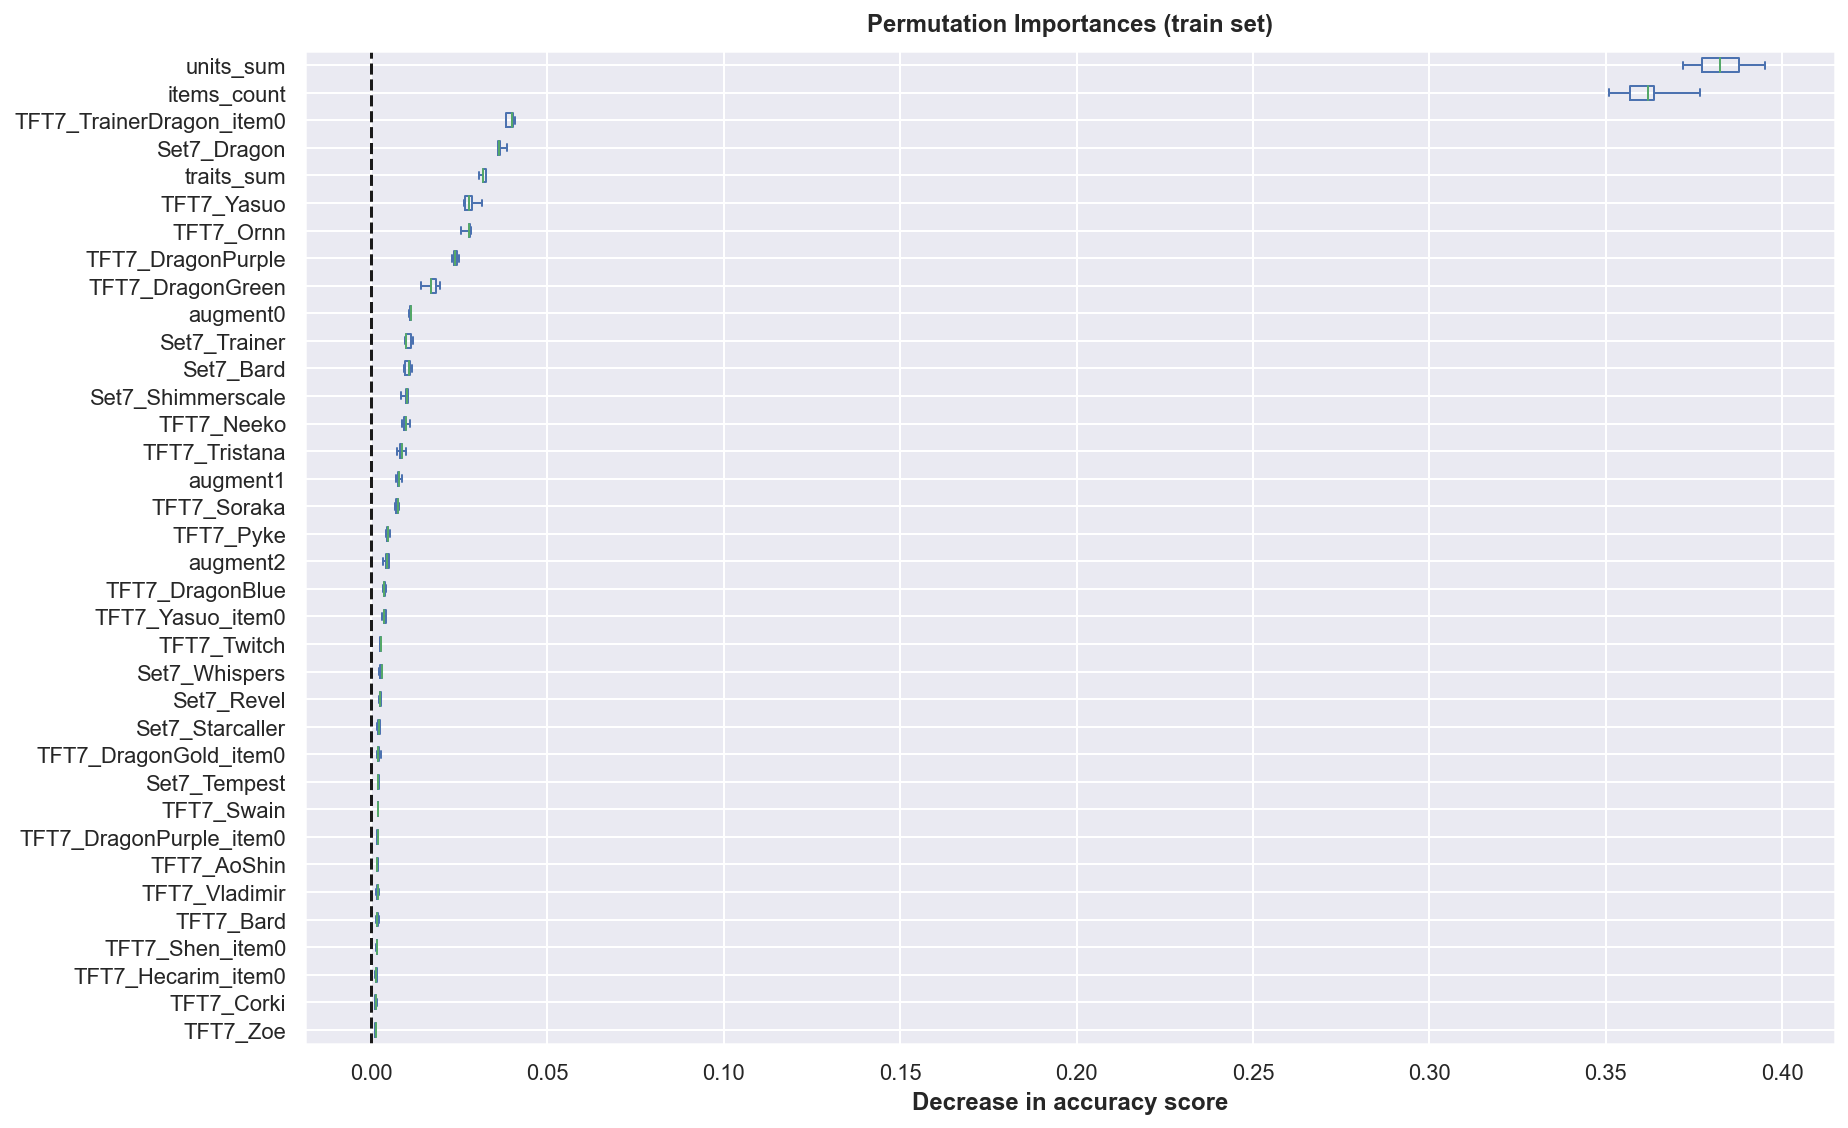

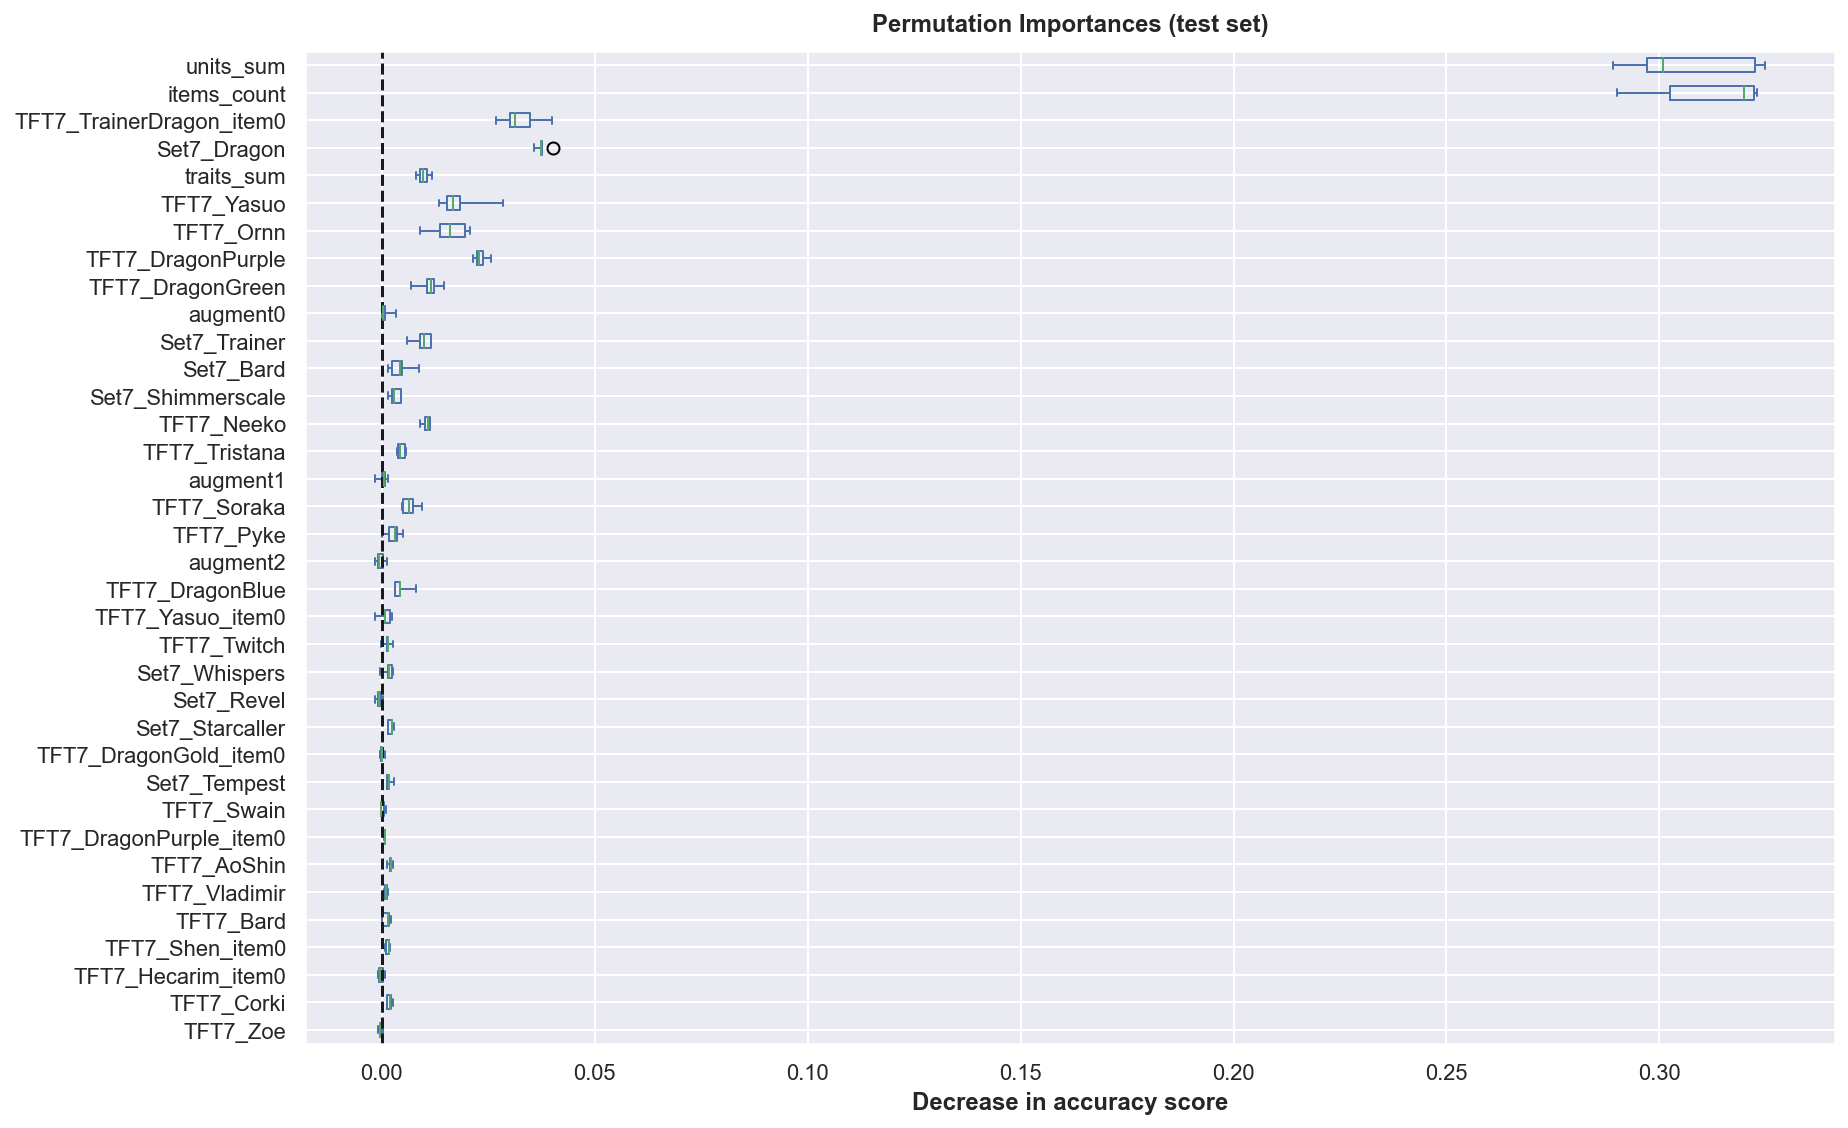

In [1289]:
for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()